In [37]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

<Figure size 432x288 with 0 Axes>

In [38]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 11])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

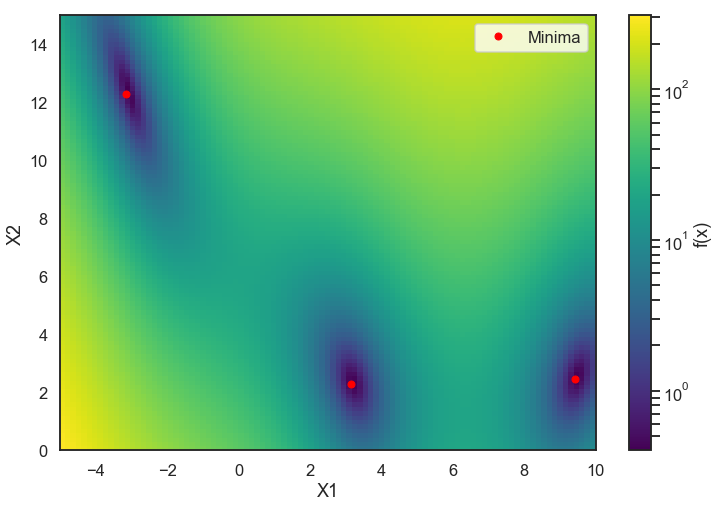

In [39]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [40]:
ntrain = 500 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [41]:
opt = Optimizer(bounds, base_estimator="llbnn", acq_func = 'EI',
                acq_optimizer = 'sampling', random_state = 123)

In [42]:
opt.acq_optimizer

'sampling'

In [43]:
opt.tell(X_train.tolist(), Y_train.tolist())

Epoch 1/3000
500/500 [==============================] - 0s 439us/step - loss: 5600.0858 - mean_squared_error: 5600.0858
Epoch 2/3000
500/500 [==============================] - 0s 31us/step - loss: 5581.7796 - mean_squared_error: 5581.7796
Epoch 3/3000
500/500 [==============================] - 0s 30us/step - loss: 5531.0701 - mean_squared_error: 5531.0701
Epoch 4/3000
500/500 [==============================] - 0s 33us/step - loss: 5414.9066 - mean_squared_error: 5414.9066
Epoch 5/3000
500/500 [==============================] - 0s 32us/step - loss: 5255.8211 - mean_squared_error: 5255.8211
Epoch 6/3000
500/500 [==============================] - 0s 32us/step - loss: 5117.9097 - mean_squared_error: 5117.9097
Epoch 7/3000
500/500 [==============================] - 0s 32us/step - loss: 5021.8384 - mean_squared_error: 5021.8384
Epoch 8/3000
500/500 [==============================] - 0s 31us/step - loss: 4943.0159 - mean_squared_error: 4943.0159
Epoch 9/3000
500/500 [=========================

500/500 [==============================] - 0s 32us/step - loss: 3143.1757 - mean_squared_error: 3143.1757
Epoch 70/3000
500/500 [==============================] - 0s 32us/step - loss: 3130.8497 - mean_squared_error: 3130.8497
Epoch 71/3000
500/500 [==============================] - 0s 31us/step - loss: 3118.7816 - mean_squared_error: 3118.7816
Epoch 72/3000
500/500 [==============================] - 0s 31us/step - loss: 3106.5987 - mean_squared_error: 3106.5987
Epoch 73/3000
500/500 [==============================] - 0s 31us/step - loss: 3095.3753 - mean_squared_error: 3095.3753
Epoch 74/3000
500/500 [==============================] - 0s 30us/step - loss: 3084.5609 - mean_squared_error: 3084.5609
Epoch 75/3000
500/500 [==============================] - 0s 30us/step - loss: 3073.0418 - mean_squared_error: 3073.0418
Epoch 76/3000
500/500 [==============================] - 0s 31us/step - loss: 3063.3537 - mean_squared_error: 3063.3537
Epoch 77/3000
500/500 [==============================]

500/500 [==============================] - 0s 30us/step - loss: 2780.4889 - mean_squared_error: 2780.4889
Epoch 138/3000
500/500 [==============================] - 0s 32us/step - loss: 2778.9355 - mean_squared_error: 2778.9355
Epoch 139/3000
500/500 [==============================] - 0s 32us/step - loss: 2777.9954 - mean_squared_error: 2777.9954
Epoch 140/3000
500/500 [==============================] - 0s 30us/step - loss: 2776.8747 - mean_squared_error: 2776.8747
Epoch 141/3000
500/500 [==============================] - 0s 28us/step - loss: 2775.8008 - mean_squared_error: 2775.8008
Epoch 142/3000
500/500 [==============================] - 0s 28us/step - loss: 2774.5684 - mean_squared_error: 2774.5684
Epoch 143/3000
500/500 [==============================] - 0s 32us/step - loss: 2773.7244 - mean_squared_error: 2773.7244
Epoch 144/3000
500/500 [==============================] - 0s 29us/step - loss: 2772.7008 - mean_squared_error: 2772.7008
Epoch 145/3000
500/500 [=======================

500/500 [==============================] - 0s 29us/step - loss: 2755.1658 - mean_squared_error: 2755.1658
Epoch 205/3000
500/500 [==============================] - 0s 33us/step - loss: 2755.1425 - mean_squared_error: 2755.1425
Epoch 206/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.1755 - mean_squared_error: 2755.1755
Epoch 207/3000
500/500 [==============================] - 0s 27us/step - loss: 2755.1322 - mean_squared_error: 2755.1322
Epoch 208/3000
500/500 [==============================] - 0s 27us/step - loss: 2755.0372 - mean_squared_error: 2755.0372
Epoch 209/3000
500/500 [==============================] - 0s 29us/step - loss: 2755.2380 - mean_squared_error: 2755.2380
Epoch 210/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0946 - mean_squared_error: 2755.0946
Epoch 211/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0104 - mean_squared_error: 2755.0104
Epoch 212/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.7143 - mean_squared_error: 2754.7143
Epoch 272/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6384 - mean_squared_error: 2754.6384
Epoch 273/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.8880 - mean_squared_error: 2754.8880
Epoch 274/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7130 - mean_squared_error: 2754.7130
Epoch 275/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7332 - mean_squared_error: 2754.7332
Epoch 276/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6505 - mean_squared_error: 2754.6505
Epoch 277/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7145 - mean_squared_error: 2754.7145
Epoch 278/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7098 - mean_squared_error: 2754.7098
Epoch 279/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7610 - mean_squared_error: 2754.7610
Epoch 339/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6927 - mean_squared_error: 2754.6927
Epoch 340/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7299 - mean_squared_error: 2754.7299
Epoch 341/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7043 - mean_squared_error: 2754.7043
Epoch 342/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6748 - mean_squared_error: 2754.6748
Epoch 343/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7194 - mean_squared_error: 2754.7194
Epoch 344/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7905 - mean_squared_error: 2754.7905
Epoch 345/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6934 - mean_squared_error: 2754.6934
Epoch 346/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.6823 - mean_squared_error: 2754.6823
Epoch 406/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.8193 - mean_squared_error: 2754.8193
Epoch 407/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7471 - mean_squared_error: 2754.7471
Epoch 408/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7407 - mean_squared_error: 2754.7407
Epoch 409/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7885 - mean_squared_error: 2754.7885
Epoch 410/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.8578 - mean_squared_error: 2754.8578
Epoch 411/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6683 - mean_squared_error: 2754.6683
Epoch 412/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6902 - mean_squared_error: 2754.6902
Epoch 413/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7024 - mean_squared_error: 2754.7024
Epoch 473/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6534 - mean_squared_error: 2754.6534
Epoch 474/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6829 - mean_squared_error: 2754.6829
Epoch 475/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7208 - mean_squared_error: 2754.7208
Epoch 476/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6557 - mean_squared_error: 2754.6557
Epoch 477/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7541 - mean_squared_error: 2754.7541
Epoch 478/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7390 - mean_squared_error: 2754.7390
Epoch 479/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6599 - mean_squared_error: 2754.6599
Epoch 480/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.7139 - mean_squared_error: 2754.7139
Epoch 540/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6898 - mean_squared_error: 2754.6898
Epoch 541/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6521 - mean_squared_error: 2754.6521
Epoch 542/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8390 - mean_squared_error: 2754.8390
Epoch 543/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7094 - mean_squared_error: 2754.7094
Epoch 544/3000
500/500 [==============================] - 0s 33us/step - loss: 2755.0284 - mean_squared_error: 2755.0284
Epoch 545/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.8538 - mean_squared_error: 2754.8538
Epoch 546/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.9417 - mean_squared_error: 2754.9417
Epoch 547/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.6762 - mean_squared_error: 2754.6762
Epoch 607/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6634 - mean_squared_error: 2754.6634
Epoch 608/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6740 - mean_squared_error: 2754.6740
Epoch 609/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8120 - mean_squared_error: 2754.8120
Epoch 610/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0605 - mean_squared_error: 2755.0605
Epoch 611/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6457 - mean_squared_error: 2754.6457
Epoch 612/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6598 - mean_squared_error: 2754.6598
Epoch 613/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7136 - mean_squared_error: 2754.7136
Epoch 614/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7286 - mean_squared_error: 2754.7286
Epoch 674/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7272 - mean_squared_error: 2754.7272
Epoch 675/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7636 - mean_squared_error: 2754.7636
Epoch 676/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7689 - mean_squared_error: 2754.7689
Epoch 677/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8634 - mean_squared_error: 2754.8634
Epoch 678/3000
500/500 [==============================] - 0s 37us/step - loss: 2754.6868 - mean_squared_error: 2754.6868
Epoch 679/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6663 - mean_squared_error: 2754.6663
Epoch 680/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7197 - mean_squared_error: 2754.7197
Epoch 681/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7656 - mean_squared_error: 2754.7656
Epoch 741/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.9845 - mean_squared_error: 2754.9845
Epoch 742/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7998 - mean_squared_error: 2754.7998
Epoch 743/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7045 - mean_squared_error: 2754.7045
Epoch 744/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.8270 - mean_squared_error: 2754.8270
Epoch 745/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7242 - mean_squared_error: 2754.7242
Epoch 746/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6973 - mean_squared_error: 2754.6973
Epoch 747/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7861 - mean_squared_error: 2754.7861
Epoch 748/3000
500/500 [=======================

500/500 [==============================] - 0s 29us/step - loss: 2754.7442 - mean_squared_error: 2754.7442
Epoch 808/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7427 - mean_squared_error: 2754.7427
Epoch 809/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7274 - mean_squared_error: 2754.7274
Epoch 810/3000
500/500 [==============================] - 0s 27us/step - loss: 2754.7150 - mean_squared_error: 2754.7150
Epoch 811/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7053 - mean_squared_error: 2754.7053
Epoch 812/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7441 - mean_squared_error: 2754.7441
Epoch 813/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6486 - mean_squared_error: 2754.6486
Epoch 814/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7098 - mean_squared_error: 2754.7098
Epoch 815/3000
500/500 [=======================

500/500 [==============================] - 0s 34us/step - loss: 2754.7006 - mean_squared_error: 2754.7006
Epoch 875/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6541 - mean_squared_error: 2754.6541
Epoch 876/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6890 - mean_squared_error: 2754.6890
Epoch 877/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6940 - mean_squared_error: 2754.6940
Epoch 878/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7678 - mean_squared_error: 2754.7678
Epoch 879/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6610 - mean_squared_error: 2754.6610
Epoch 880/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6741 - mean_squared_error: 2754.6741
Epoch 881/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7125 - mean_squared_error: 2754.7125
Epoch 882/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.6665 - mean_squared_error: 2754.6665
Epoch 942/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7135 - mean_squared_error: 2754.7135
Epoch 943/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6826 - mean_squared_error: 2754.6826
Epoch 944/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.0387 - mean_squared_error: 2755.0387
Epoch 945/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6608 - mean_squared_error: 2754.6608
Epoch 946/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6972 - mean_squared_error: 2754.6972
Epoch 947/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.0077 - mean_squared_error: 2755.0077
Epoch 948/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7678 - mean_squared_error: 2754.7678
Epoch 949/3000
500/500 [=======================

500/500 [==============================] - 0s 34us/step - loss: 2754.7262 - mean_squared_error: 2754.7262
Epoch 1009/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7936 - mean_squared_error: 2754.7936
Epoch 1010/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.8734 - mean_squared_error: 2754.8734
Epoch 1011/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7162 - mean_squared_error: 2754.7162
Epoch 1012/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.0306 - mean_squared_error: 2755.0306
Epoch 1013/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.1088 - mean_squared_error: 2755.1088
Epoch 1014/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7262 - mean_squared_error: 2754.7262
Epoch 1015/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6683 - mean_squared_error: 2754.6683
Epoch 1016/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 2754.7159 - mean_squared_error: 2754.7159
Epoch 1076/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.0483 - mean_squared_error: 2755.0483
Epoch 1077/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6632 - mean_squared_error: 2754.6632
Epoch 1078/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7179 - mean_squared_error: 2754.7179
Epoch 1079/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6580 - mean_squared_error: 2754.6580
Epoch 1080/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.9619 - mean_squared_error: 2754.9619
Epoch 1081/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7926 - mean_squared_error: 2754.7926
Epoch 1082/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6815 - mean_squared_error: 2754.6815
Epoch 1083/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.7305 - mean_squared_error: 2754.7305
Epoch 1143/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6731 - mean_squared_error: 2754.6731
Epoch 1144/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6746 - mean_squared_error: 2754.6746
Epoch 1145/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7086 - mean_squared_error: 2754.7086
Epoch 1146/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6851 - mean_squared_error: 2754.6851
Epoch 1147/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7132 - mean_squared_error: 2754.7132
Epoch 1148/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7953 - mean_squared_error: 2754.7953
Epoch 1149/3000
500/500 [==============================] - 0s 36us/step - loss: 2755.0078 - mean_squared_error: 2755.0078
Epoch 1150/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.6864 - mean_squared_error: 2754.6864
Epoch 1210/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6924 - mean_squared_error: 2754.6924
Epoch 1211/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6998 - mean_squared_error: 2754.6998
Epoch 1212/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6537 - mean_squared_error: 2754.6537
Epoch 1213/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7808 - mean_squared_error: 2754.7808
Epoch 1214/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6762 - mean_squared_error: 2754.6762
Epoch 1215/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6510 - mean_squared_error: 2754.6510
Epoch 1216/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7426 - mean_squared_error: 2754.7426
Epoch 1217/3000
500/500 [===============

500/500 [==============================] - 0s 27us/step - loss: 2755.4464 - mean_squared_error: 2755.4464
Epoch 1277/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7375 - mean_squared_error: 2754.7375
Epoch 1278/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7257 - mean_squared_error: 2754.7257
Epoch 1279/3000
500/500 [==============================] - 0s 27us/step - loss: 2754.6818 - mean_squared_error: 2754.6818
Epoch 1280/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6972 - mean_squared_error: 2754.6972
Epoch 1281/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7924 - mean_squared_error: 2754.7924
Epoch 1282/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7140 - mean_squared_error: 2754.7140
Epoch 1283/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6848 - mean_squared_error: 2754.6848
Epoch 1284/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.6862 - mean_squared_error: 2754.6862
Epoch 1344/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6652 - mean_squared_error: 2754.6652
Epoch 1345/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7045 - mean_squared_error: 2754.7045
Epoch 1346/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7279 - mean_squared_error: 2754.7279
Epoch 1347/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6547 - mean_squared_error: 2754.6547
Epoch 1348/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7046 - mean_squared_error: 2754.7046
Epoch 1349/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7498 - mean_squared_error: 2754.7498
Epoch 1350/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6768 - mean_squared_error: 2754.6768
Epoch 1351/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 2754.7122 - mean_squared_error: 2754.7122
Epoch 1411/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8687 - mean_squared_error: 2754.8687
Epoch 1412/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6472 - mean_squared_error: 2754.6472
Epoch 1413/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6732 - mean_squared_error: 2754.6732
Epoch 1414/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7656 - mean_squared_error: 2754.7656
Epoch 1415/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0403 - mean_squared_error: 2755.0403
Epoch 1416/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6691 - mean_squared_error: 2754.6691
Epoch 1417/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6929 - mean_squared_error: 2754.6929
Epoch 1418/3000
500/500 [===============

500/500 [==============================] - 0s 33us/step - loss: 2754.6905 - mean_squared_error: 2754.6905
Epoch 1478/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6876 - mean_squared_error: 2754.6876
Epoch 1479/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6611 - mean_squared_error: 2754.6611
Epoch 1480/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7461 - mean_squared_error: 2754.7461
Epoch 1481/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7289 - mean_squared_error: 2754.7289
Epoch 1482/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6628 - mean_squared_error: 2754.6628
Epoch 1483/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7170 - mean_squared_error: 2754.7170
Epoch 1484/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6776 - mean_squared_error: 2754.6776
Epoch 1485/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.6673 - mean_squared_error: 2754.6673
Epoch 1545/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7882 - mean_squared_error: 2754.7882
Epoch 1546/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7380 - mean_squared_error: 2754.7380
Epoch 1547/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8253 - mean_squared_error: 2754.8253
Epoch 1548/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6909 - mean_squared_error: 2754.6909
Epoch 1549/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6830 - mean_squared_error: 2754.6830
Epoch 1550/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6664 - mean_squared_error: 2754.6664
Epoch 1551/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7154 - mean_squared_error: 2754.7154
Epoch 1552/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 2754.6817 - mean_squared_error: 2754.6817
Epoch 1612/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7263 - mean_squared_error: 2754.7263
Epoch 1613/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7244 - mean_squared_error: 2754.7244
Epoch 1614/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7088 - mean_squared_error: 2754.7088
Epoch 1615/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7020 - mean_squared_error: 2754.7020
Epoch 1616/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6758 - mean_squared_error: 2754.6758
Epoch 1617/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8075 - mean_squared_error: 2754.8075
Epoch 1618/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7062 - mean_squared_error: 2754.7062
Epoch 1619/3000
500/500 [===============

500/500 [==============================] - 0s 30us/step - loss: 2449.7161 - mean_squared_error: 2449.7161
Epoch 1679/3000
500/500 [==============================] - 0s 31us/step - loss: 2446.6154 - mean_squared_error: 2446.6154
Epoch 1680/3000
500/500 [==============================] - 0s 30us/step - loss: 2445.4729 - mean_squared_error: 2445.4729
Epoch 1681/3000
500/500 [==============================] - 0s 30us/step - loss: 2439.9306 - mean_squared_error: 2439.9306
Epoch 1682/3000
500/500 [==============================] - 0s 34us/step - loss: 2439.3694 - mean_squared_error: 2439.3694
Epoch 1683/3000
500/500 [==============================] - 0s 35us/step - loss: 2431.5678 - mean_squared_error: 2431.5678
Epoch 1684/3000
500/500 [==============================] - 0s 33us/step - loss: 2427.8203 - mean_squared_error: 2427.8203
Epoch 1685/3000
500/500 [==============================] - 0s 32us/step - loss: 2428.0703 - mean_squared_error: 2428.0703
Epoch 1686/3000
500/500 [===============

500/500 [==============================] - 0s 34us/step - loss: 2386.1920 - mean_squared_error: 2386.1920
Epoch 1746/3000
500/500 [==============================] - 0s 37us/step - loss: 2386.9029 - mean_squared_error: 2386.9029
Epoch 1747/3000
500/500 [==============================] - 0s 32us/step - loss: 2388.1405 - mean_squared_error: 2388.1405
Epoch 1748/3000
500/500 [==============================] - 0s 35us/step - loss: 2386.7688 - mean_squared_error: 2386.7688
Epoch 1749/3000
500/500 [==============================] - 0s 34us/step - loss: 2385.3247 - mean_squared_error: 2385.3247
Epoch 1750/3000
500/500 [==============================] - 0s 34us/step - loss: 2385.9546 - mean_squared_error: 2385.9546
Epoch 1751/3000
500/500 [==============================] - 0s 34us/step - loss: 2385.8924 - mean_squared_error: 2385.8924
Epoch 1752/3000
500/500 [==============================] - 0s 34us/step - loss: 2384.3807 - mean_squared_error: 2384.3807
Epoch 1753/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2143.9026 - mean_squared_error: 2143.9026
Epoch 1813/3000
500/500 [==============================] - 0s 31us/step - loss: 2110.3173 - mean_squared_error: 2110.3173
Epoch 1814/3000
500/500 [==============================] - 0s 33us/step - loss: 2053.1864 - mean_squared_error: 2053.1864
Epoch 1815/3000
500/500 [==============================] - 0s 32us/step - loss: 2025.2838 - mean_squared_error: 2025.2838
Epoch 1816/3000
500/500 [==============================] - 0s 32us/step - loss: 1990.6189 - mean_squared_error: 1990.6189
Epoch 1817/3000
500/500 [==============================] - 0s 32us/step - loss: 1982.5920 - mean_squared_error: 1982.5920
Epoch 1818/3000
500/500 [==============================] - 0s 31us/step - loss: 1959.0341 - mean_squared_error: 1959.0341
Epoch 1819/3000
500/500 [==============================] - 0s 31us/step - loss: 1953.0926 - mean_squared_error: 1953.0926
Epoch 1820/3000
500/500 [===============

500/500 [==============================] - 0s 36us/step - loss: 1726.7056 - mean_squared_error: 1726.7056
Epoch 1880/3000
500/500 [==============================] - 0s 31us/step - loss: 1721.7874 - mean_squared_error: 1721.7874
Epoch 1881/3000
500/500 [==============================] - 0s 30us/step - loss: 1712.6599 - mean_squared_error: 1712.6599
Epoch 1882/3000
500/500 [==============================] - 0s 31us/step - loss: 1698.4034 - mean_squared_error: 1698.4034
Epoch 1883/3000
500/500 [==============================] - 0s 30us/step - loss: 1696.5980 - mean_squared_error: 1696.5980
Epoch 1884/3000
500/500 [==============================] - 0s 31us/step - loss: 1686.8837 - mean_squared_error: 1686.8837
Epoch 1885/3000
500/500 [==============================] - 0s 32us/step - loss: 1669.8665 - mean_squared_error: 1669.8665
Epoch 1886/3000
500/500 [==============================] - 0s 32us/step - loss: 1654.6453 - mean_squared_error: 1654.6453
Epoch 1887/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 558.6883 - mean_squared_error: 558.6883
Epoch 1947/3000
500/500 [==============================] - 0s 30us/step - loss: 551.7742 - mean_squared_error: 551.7742
Epoch 1948/3000
500/500 [==============================] - 0s 30us/step - loss: 549.5300 - mean_squared_error: 549.5300
Epoch 1949/3000
500/500 [==============================] - 0s 32us/step - loss: 539.4143 - mean_squared_error: 539.4143
Epoch 1950/3000
500/500 [==============================] - 0s 31us/step - loss: 534.1678 - mean_squared_error: 534.1678
Epoch 1951/3000
500/500 [==============================] - 0s 31us/step - loss: 527.3326 - mean_squared_error: 527.3326
Epoch 1952/3000
500/500 [==============================] - 0s 31us/step - loss: 521.9379 - mean_squared_error: 521.9379
Epoch 1953/3000
500/500 [==============================] - 0s 31us/step - loss: 516.5456 - mean_squared_error: 516.5456
Epoch 1954/3000
500/500 [==============================]

500/500 [==============================] - 0s 31us/step - loss: 297.6978 - mean_squared_error: 297.6978
Epoch 2015/3000
500/500 [==============================] - 0s 32us/step - loss: 294.5982 - mean_squared_error: 294.5982
Epoch 2016/3000
500/500 [==============================] - 0s 31us/step - loss: 291.2918 - mean_squared_error: 291.2918
Epoch 2017/3000
500/500 [==============================] - 0s 31us/step - loss: 289.9003 - mean_squared_error: 289.9003
Epoch 2018/3000
500/500 [==============================] - 0s 30us/step - loss: 287.8700 - mean_squared_error: 287.8700
Epoch 2019/3000
500/500 [==============================] - 0s 32us/step - loss: 287.4651 - mean_squared_error: 287.4651
Epoch 2020/3000
500/500 [==============================] - 0s 33us/step - loss: 284.1372 - mean_squared_error: 284.1372
Epoch 2021/3000
500/500 [==============================] - 0s 32us/step - loss: 283.7852 - mean_squared_error: 283.7852
Epoch 2022/3000
500/500 [==============================]

500/500 [==============================] - 0s 30us/step - loss: 199.4794 - mean_squared_error: 199.4794
Epoch 2083/3000
500/500 [==============================] - 0s 30us/step - loss: 196.5758 - mean_squared_error: 196.5758
Epoch 2084/3000
500/500 [==============================] - 0s 29us/step - loss: 196.0514 - mean_squared_error: 196.0514
Epoch 2085/3000
500/500 [==============================] - 0s 31us/step - loss: 196.5490 - mean_squared_error: 196.5490
Epoch 2086/3000
500/500 [==============================] - 0s 31us/step - loss: 196.1884 - mean_squared_error: 196.1884
Epoch 2087/3000
500/500 [==============================] - 0s 30us/step - loss: 193.7963 - mean_squared_error: 193.7963
Epoch 2088/3000
500/500 [==============================] - 0s 30us/step - loss: 191.6061 - mean_squared_error: 191.6061
Epoch 2089/3000
500/500 [==============================] - 0s 30us/step - loss: 190.3177 - mean_squared_error: 190.3177
Epoch 2090/3000
500/500 [==============================]

500/500 [==============================] - 0s 30us/step - loss: 128.1370 - mean_squared_error: 128.1370
Epoch 2151/3000
500/500 [==============================] - 0s 31us/step - loss: 126.5748 - mean_squared_error: 126.5748
Epoch 2152/3000
500/500 [==============================] - 0s 29us/step - loss: 123.7741 - mean_squared_error: 123.7741
Epoch 2153/3000
500/500 [==============================] - 0s 30us/step - loss: 123.7216 - mean_squared_error: 123.7216
Epoch 2154/3000
500/500 [==============================] - 0s 31us/step - loss: 124.3710 - mean_squared_error: 124.3710
Epoch 2155/3000
500/500 [==============================] - 0s 30us/step - loss: 122.6767 - mean_squared_error: 122.6767
Epoch 2156/3000
500/500 [==============================] - 0s 33us/step - loss: 121.7829 - mean_squared_error: 121.7829
Epoch 2157/3000
500/500 [==============================] - 0s 32us/step - loss: 120.4715 - mean_squared_error: 120.4715
Epoch 2158/3000
500/500 [==============================]

500/500 [==============================] - 0s 32us/step - loss: 76.1281 - mean_squared_error: 76.1281
Epoch 2220/3000
500/500 [==============================] - 0s 31us/step - loss: 74.4127 - mean_squared_error: 74.4127
Epoch 2221/3000
500/500 [==============================] - 0s 32us/step - loss: 73.6676 - mean_squared_error: 73.6676
Epoch 2222/3000
500/500 [==============================] - 0s 32us/step - loss: 73.2203 - mean_squared_error: 73.2203
Epoch 2223/3000
500/500 [==============================] - 0s 31us/step - loss: 72.7874 - mean_squared_error: 72.7874
Epoch 2224/3000
500/500 [==============================] - 0s 32us/step - loss: 72.3668 - mean_squared_error: 72.3668
Epoch 2225/3000
500/500 [==============================] - 0s 30us/step - loss: 72.0641 - mean_squared_error: 72.0641
Epoch 2226/3000
500/500 [==============================] - 0s 31us/step - loss: 71.6155 - mean_squared_error: 71.6155
Epoch 2227/3000
500/500 [==============================] - 0s 31us/step 

500/500 [==============================] - 0s 31us/step - loss: 49.2288 - mean_squared_error: 49.2288
Epoch 2289/3000
500/500 [==============================] - 0s 29us/step - loss: 49.2374 - mean_squared_error: 49.2374
Epoch 2290/3000
500/500 [==============================] - 0s 30us/step - loss: 48.9484 - mean_squared_error: 48.9484
Epoch 2291/3000
500/500 [==============================] - 0s 30us/step - loss: 49.4186 - mean_squared_error: 49.4186
Epoch 2292/3000
500/500 [==============================] - 0s 29us/step - loss: 50.0358 - mean_squared_error: 50.0358
Epoch 2293/3000
500/500 [==============================] - 0s 29us/step - loss: 49.7198 - mean_squared_error: 49.7198
Epoch 2294/3000
500/500 [==============================] - 0s 30us/step - loss: 48.7954 - mean_squared_error: 48.7954
Epoch 2295/3000
500/500 [==============================] - 0s 30us/step - loss: 47.6383 - mean_squared_error: 47.6383
Epoch 2296/3000
500/500 [==============================] - 0s 30us/step 

500/500 [==============================] - 0s 32us/step - loss: 33.2775 - mean_squared_error: 33.2775
Epoch 2358/3000
500/500 [==============================] - 0s 32us/step - loss: 33.2816 - mean_squared_error: 33.2816
Epoch 2359/3000
500/500 [==============================] - 0s 30us/step - loss: 33.1926 - mean_squared_error: 33.1926
Epoch 2360/3000
500/500 [==============================] - 0s 31us/step - loss: 33.1030 - mean_squared_error: 33.1030
Epoch 2361/3000
500/500 [==============================] - 0s 30us/step - loss: 32.6426 - mean_squared_error: 32.6426
Epoch 2362/3000
500/500 [==============================] - 0s 32us/step - loss: 32.2313 - mean_squared_error: 32.2313
Epoch 2363/3000
500/500 [==============================] - 0s 29us/step - loss: 32.1204 - mean_squared_error: 32.1204
Epoch 2364/3000
500/500 [==============================] - 0s 31us/step - loss: 32.0017 - mean_squared_error: 32.0017
Epoch 2365/3000
500/500 [==============================] - 0s 28us/step 

500/500 [==============================] - 0s 29us/step - loss: 22.0696 - mean_squared_error: 22.0696
Epoch 2427/3000
500/500 [==============================] - 0s 30us/step - loss: 22.0754 - mean_squared_error: 22.0754
Epoch 2428/3000
500/500 [==============================] - 0s 27us/step - loss: 21.9491 - mean_squared_error: 21.9491
Epoch 2429/3000
500/500 [==============================] - 0s 28us/step - loss: 22.0882 - mean_squared_error: 22.0882
Epoch 2430/3000
500/500 [==============================] - 0s 28us/step - loss: 21.8268 - mean_squared_error: 21.8268
Epoch 2431/3000
500/500 [==============================] - 0s 28us/step - loss: 21.6779 - mean_squared_error: 21.6779
Epoch 2432/3000
500/500 [==============================] - 0s 29us/step - loss: 21.3637 - mean_squared_error: 21.3637
Epoch 2433/3000
500/500 [==============================] - 0s 29us/step - loss: 21.2953 - mean_squared_error: 21.2953
Epoch 2434/3000
500/500 [==============================] - 0s 30us/step 

500/500 [==============================] - 0s 31us/step - loss: 15.2456 - mean_squared_error: 15.2456
Epoch 2496/3000
500/500 [==============================] - 0s 34us/step - loss: 15.0837 - mean_squared_error: 15.0837
Epoch 2497/3000
500/500 [==============================] - 0s 30us/step - loss: 14.8833 - mean_squared_error: 14.8833
Epoch 2498/3000
500/500 [==============================] - 0s 29us/step - loss: 14.7593 - mean_squared_error: 14.7593
Epoch 2499/3000
500/500 [==============================] - 0s 31us/step - loss: 14.6013 - mean_squared_error: 14.6013
Epoch 2500/3000
500/500 [==============================] - 0s 29us/step - loss: 14.5959 - mean_squared_error: 14.5959
Epoch 2501/3000
500/500 [==============================] - 0s 31us/step - loss: 14.9368 - mean_squared_error: 14.9368
Epoch 2502/3000
500/500 [==============================] - 0s 31us/step - loss: 14.5564 - mean_squared_error: 14.5564
Epoch 2503/3000
500/500 [==============================] - 0s 31us/step 

500/500 [==============================] - 0s 30us/step - loss: 10.2306 - mean_squared_error: 10.2306
Epoch 2565/3000
500/500 [==============================] - 0s 32us/step - loss: 10.1967 - mean_squared_error: 10.1967
Epoch 2566/3000
500/500 [==============================] - 0s 29us/step - loss: 10.5237 - mean_squared_error: 10.5237
Epoch 2567/3000
500/500 [==============================] - 0s 31us/step - loss: 10.0553 - mean_squared_error: 10.0553
Epoch 2568/3000
500/500 [==============================] - 0s 29us/step - loss: 9.8699 - mean_squared_error: 9.8699
Epoch 2569/3000
500/500 [==============================] - 0s 27us/step - loss: 9.9811 - mean_squared_error: 9.9811
Epoch 2570/3000
500/500 [==============================] - 0s 30us/step - loss: 9.6541 - mean_squared_error: 9.6541
Epoch 2571/3000
500/500 [==============================] - 0s 29us/step - loss: 9.8436 - mean_squared_error: 9.8436
Epoch 2572/3000
500/500 [==============================] - 0s 28us/step - loss: 

500/500 [==============================] - 0s 31us/step - loss: 6.8768 - mean_squared_error: 6.8768
Epoch 2635/3000
500/500 [==============================] - 0s 28us/step - loss: 6.8960 - mean_squared_error: 6.8960
Epoch 2636/3000
500/500 [==============================] - 0s 26us/step - loss: 6.6149 - mean_squared_error: 6.6149
Epoch 2637/3000
500/500 [==============================] - 0s 29us/step - loss: 6.4838 - mean_squared_error: 6.4838
Epoch 2638/3000
500/500 [==============================] - 0s 30us/step - loss: 6.3986 - mean_squared_error: 6.3986
Epoch 2639/3000
500/500 [==============================] - 0s 29us/step - loss: 6.4121 - mean_squared_error: 6.4121
Epoch 2640/3000
500/500 [==============================] - 0s 32us/step - loss: 6.4921 - mean_squared_error: 6.4921
Epoch 2641/3000
500/500 [==============================] - 0s 31us/step - loss: 6.5402 - mean_squared_error: 6.5402
Epoch 2642/3000
500/500 [==============================] - 0s 32us/step - loss: 6.5338 -

500/500 [==============================] - 0s 30us/step - loss: 4.8259 - mean_squared_error: 4.8259
Epoch 2705/3000
500/500 [==============================] - 0s 32us/step - loss: 4.6589 - mean_squared_error: 4.6589
Epoch 2706/3000
500/500 [==============================] - 0s 30us/step - loss: 4.8588 - mean_squared_error: 4.8588
Epoch 2707/3000
500/500 [==============================] - 0s 31us/step - loss: 4.8234 - mean_squared_error: 4.8234
Epoch 2708/3000
500/500 [==============================] - 0s 31us/step - loss: 4.7344 - mean_squared_error: 4.7344
Epoch 2709/3000
500/500 [==============================] - 0s 29us/step - loss: 4.5040 - mean_squared_error: 4.5040
Epoch 2710/3000
500/500 [==============================] - 0s 29us/step - loss: 4.3838 - mean_squared_error: 4.3838
Epoch 2711/3000
500/500 [==============================] - 0s 29us/step - loss: 4.4057 - mean_squared_error: 4.4057
Epoch 2712/3000
500/500 [==============================] - 0s 30us/step - loss: 4.3734 -

500/500 [==============================] - 0s 31us/step - loss: 3.2610 - mean_squared_error: 3.2610
Epoch 2775/3000
500/500 [==============================] - 0s 31us/step - loss: 3.3377 - mean_squared_error: 3.3377
Epoch 2776/3000
500/500 [==============================] - 0s 29us/step - loss: 3.2850 - mean_squared_error: 3.2850
Epoch 2777/3000
500/500 [==============================] - 0s 29us/step - loss: 3.2918 - mean_squared_error: 3.2918
Epoch 2778/3000
500/500 [==============================] - 0s 28us/step - loss: 3.1810 - mean_squared_error: 3.1810
Epoch 2779/3000
500/500 [==============================] - 0s 28us/step - loss: 3.2728 - mean_squared_error: 3.2728
Epoch 2780/3000
500/500 [==============================] - 0s 28us/step - loss: 3.4436 - mean_squared_error: 3.4436
Epoch 2781/3000
500/500 [==============================] - 0s 30us/step - loss: 3.3398 - mean_squared_error: 3.3398
Epoch 2782/3000
500/500 [==============================] - 0s 30us/step - loss: 3.2789 -

500/500 [==============================] - 0s 29us/step - loss: 2.9031 - mean_squared_error: 2.9031
Epoch 2845/3000
500/500 [==============================] - 0s 30us/step - loss: 2.6797 - mean_squared_error: 2.6797
Epoch 2846/3000
500/500 [==============================] - 0s 27us/step - loss: 2.5066 - mean_squared_error: 2.5066
Epoch 2847/3000
500/500 [==============================] - 0s 25us/step - loss: 2.4409 - mean_squared_error: 2.4409
Epoch 2848/3000
500/500 [==============================] - 0s 28us/step - loss: 2.4449 - mean_squared_error: 2.4449
Epoch 2849/3000
500/500 [==============================] - 0s 28us/step - loss: 2.6312 - mean_squared_error: 2.6312
Epoch 2850/3000
500/500 [==============================] - 0s 27us/step - loss: 2.3983 - mean_squared_error: 2.3983
Epoch 2851/3000
500/500 [==============================] - 0s 29us/step - loss: 2.6209 - mean_squared_error: 2.6209
Epoch 2852/3000
500/500 [==============================] - 0s 28us/step - loss: 2.6788 -

500/500 [==============================] - 0s 32us/step - loss: 2.2575 - mean_squared_error: 2.2575
Epoch 2915/3000
500/500 [==============================] - 0s 30us/step - loss: 2.0138 - mean_squared_error: 2.0138
Epoch 2916/3000
500/500 [==============================] - 0s 29us/step - loss: 1.9266 - mean_squared_error: 1.9266
Epoch 2917/3000
500/500 [==============================] - 0s 29us/step - loss: 1.8482 - mean_squared_error: 1.8482
Epoch 2918/3000
500/500 [==============================] - 0s 28us/step - loss: 1.7898 - mean_squared_error: 1.7898
Epoch 2919/3000
500/500 [==============================] - 0s 28us/step - loss: 1.7698 - mean_squared_error: 1.7698
Epoch 2920/3000
500/500 [==============================] - 0s 28us/step - loss: 1.8516 - mean_squared_error: 1.8516
Epoch 2921/3000
500/500 [==============================] - 0s 26us/step - loss: 1.9113 - mean_squared_error: 1.9113
Epoch 2922/3000
500/500 [==============================] - 0s 26us/step - loss: 1.8716 -

500/500 [==============================] - 0s 29us/step - loss: 1.4337 - mean_squared_error: 1.4337
Epoch 2985/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3767 - mean_squared_error: 1.3767
Epoch 2986/3000
500/500 [==============================] - 0s 25us/step - loss: 1.3440 - mean_squared_error: 1.3440
Epoch 2987/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3614 - mean_squared_error: 1.3614
Epoch 2988/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3561 - mean_squared_error: 1.3561
Epoch 2989/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3294 - mean_squared_error: 1.3294
Epoch 2990/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3453 - mean_squared_error: 1.3453
Epoch 2991/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3477 - mean_squared_error: 1.3477
Epoch 2992/3000
500/500 [==============================] - 0s 31us/step - loss: 1.2824 -

          fun: 0.5041852448099746
    func_vals: array([ 71.42801526,   6.5590623 ,  21.35667714,  47.21753534,
       102.06699278,  28.18045155,  10.78563773,  47.87856911,
        50.82292568, 132.71480002,  23.57686332,  30.59904501,
        10.3626141 ,  63.23861349,  24.03202862,  11.49840998,
       143.12931299,  61.81806261,  10.80135053,  28.44401395,
        28.42213382,   1.12069151, 146.3223977 ,  54.57847719,
       179.38922602,  26.60363624,  29.70975575, 104.40012407,
       110.89348513,  52.71813616,  18.87412247,  68.07632418,
        89.02260203,  15.2631475 ,  11.83011193, 165.10252008,
        49.70074359,  17.52459929, 107.33913329,  24.7049005 ,
        37.05278824,  83.25938969,  22.74347587,  19.21010399,
       143.81773492,  46.68308626,   1.56638671,   1.05411363,
       131.46639775,   0.86661859,  46.986303  ,  10.70777203,
         7.39117035,   2.43787794, 106.36099249,   1.97717826,
        18.66745157, 222.30683188,  29.98208337,  13.31067664,
      

In [44]:
qei_args_dict = {'num_sampled_points': 3,
               'num_batches_eval' : 4000,
               'strategy_batch_selection' : 'random'}

rui_ei_args_dict = {'num_sampled_points': 5}

In [57]:
r = opt.ask(n_points= 15)

Epoch 1/3000
500/500 [==============================] - 0s 828us/step - loss: 5601.6215 - mean_squared_error: 5601.6215
Epoch 2/3000
500/500 [==============================] - 0s 35us/step - loss: 5587.7734 - mean_squared_error: 5587.7734
Epoch 3/3000
500/500 [==============================] - 0s 31us/step - loss: 5545.0868 - mean_squared_error: 5545.0868
Epoch 4/3000
500/500 [==============================] - 0s 33us/step - loss: 5438.3962 - mean_squared_error: 5438.3962
Epoch 5/3000
500/500 [==============================] - 0s 33us/step - loss: 5276.8371 - mean_squared_error: 5276.8371
Epoch 6/3000
500/500 [==============================] - 0s 33us/step - loss: 5126.2637 - mean_squared_error: 5126.2637
Epoch 7/3000
500/500 [==============================] - 0s 34us/step - loss: 5024.2049 - mean_squared_error: 5024.2049
Epoch 8/3000
500/500 [==============================] - 0s 33us/step - loss: 4944.4336 - mean_squared_error: 4944.4336
Epoch 9/3000
500/500 [=========================

500/500 [==============================] - 0s 33us/step - loss: 3139.9961 - mean_squared_error: 3139.9961
Epoch 70/3000
500/500 [==============================] - 0s 34us/step - loss: 3127.9661 - mean_squared_error: 3127.9661
Epoch 71/3000
500/500 [==============================] - 0s 31us/step - loss: 3115.3051 - mean_squared_error: 3115.3051
Epoch 72/3000
500/500 [==============================] - 0s 30us/step - loss: 3103.7924 - mean_squared_error: 3103.7924
Epoch 73/3000
500/500 [==============================] - 0s 31us/step - loss: 3091.9578 - mean_squared_error: 3091.9578
Epoch 74/3000
500/500 [==============================] - 0s 29us/step - loss: 3081.2555 - mean_squared_error: 3081.2555
Epoch 75/3000
500/500 [==============================] - 0s 32us/step - loss: 3070.7716 - mean_squared_error: 3070.7716
Epoch 76/3000
500/500 [==============================] - 0s 30us/step - loss: 3060.0247 - mean_squared_error: 3060.0247
Epoch 77/3000
500/500 [==============================]

500/500 [==============================] - 0s 32us/step - loss: 2780.1218 - mean_squared_error: 2780.1218
Epoch 138/3000
500/500 [==============================] - 0s 33us/step - loss: 2778.5647 - mean_squared_error: 2778.5647
Epoch 139/3000
500/500 [==============================] - 0s 33us/step - loss: 2777.4776 - mean_squared_error: 2777.4776
Epoch 140/3000
500/500 [==============================] - 0s 32us/step - loss: 2776.2696 - mean_squared_error: 2776.2696
Epoch 141/3000
500/500 [==============================] - 0s 31us/step - loss: 2775.4269 - mean_squared_error: 2775.4269
Epoch 142/3000
500/500 [==============================] - 0s 32us/step - loss: 2774.3947 - mean_squared_error: 2774.3947
Epoch 143/3000
500/500 [==============================] - 0s 32us/step - loss: 2773.3105 - mean_squared_error: 2773.3105
Epoch 144/3000
500/500 [==============================] - 0s 32us/step - loss: 2772.3007 - mean_squared_error: 2772.3007
Epoch 145/3000
500/500 [=======================

500/500 [==============================] - 0s 34us/step - loss: 2755.1380 - mean_squared_error: 2755.1380
Epoch 205/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.1197 - mean_squared_error: 2755.1197
Epoch 206/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.1175 - mean_squared_error: 2755.1175
Epoch 207/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.0704 - mean_squared_error: 2755.0704
Epoch 208/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.0355 - mean_squared_error: 2755.0355
Epoch 209/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0710 - mean_squared_error: 2755.0710
Epoch 210/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.9828 - mean_squared_error: 2754.9828
Epoch 211/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.9542 - mean_squared_error: 2754.9542
Epoch 212/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.6642 - mean_squared_error: 2754.6642
Epoch 272/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6636 - mean_squared_error: 2754.6636
Epoch 273/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7016 - mean_squared_error: 2754.7016
Epoch 274/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6696 - mean_squared_error: 2754.6696
Epoch 275/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7109 - mean_squared_error: 2754.7109
Epoch 276/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6802 - mean_squared_error: 2754.6802
Epoch 277/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6694 - mean_squared_error: 2754.6694
Epoch 278/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7336 - mean_squared_error: 2754.7336
Epoch 279/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.6699 - mean_squared_error: 2754.6699
Epoch 339/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6822 - mean_squared_error: 2754.6822
Epoch 340/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7224 - mean_squared_error: 2754.7224
Epoch 341/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7289 - mean_squared_error: 2754.7289
Epoch 342/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6452 - mean_squared_error: 2754.6452
Epoch 343/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6907 - mean_squared_error: 2754.6907
Epoch 344/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7296 - mean_squared_error: 2754.7296
Epoch 345/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7106 - mean_squared_error: 2754.7106
Epoch 346/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.7166 - mean_squared_error: 2754.7166
Epoch 406/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6711 - mean_squared_error: 2754.6711
Epoch 407/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6731 - mean_squared_error: 2754.6731
Epoch 408/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7035 - mean_squared_error: 2754.7035
Epoch 409/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6724 - mean_squared_error: 2754.6724
Epoch 410/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7540 - mean_squared_error: 2754.7540
Epoch 411/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6553 - mean_squared_error: 2754.6553
Epoch 412/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7871 - mean_squared_error: 2754.7871
Epoch 413/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.7168 - mean_squared_error: 2754.7168
Epoch 473/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7524 - mean_squared_error: 2754.7524
Epoch 474/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7083 - mean_squared_error: 2754.7083
Epoch 475/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7083 - mean_squared_error: 2754.7083
Epoch 476/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8961 - mean_squared_error: 2754.8961
Epoch 477/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7059 - mean_squared_error: 2754.7059
Epoch 478/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7082 - mean_squared_error: 2754.7082
Epoch 479/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8146 - mean_squared_error: 2754.8146
Epoch 480/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.6938 - mean_squared_error: 2754.6938
Epoch 540/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6958 - mean_squared_error: 2754.6958
Epoch 541/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7275 - mean_squared_error: 2754.7275
Epoch 542/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6912 - mean_squared_error: 2754.6912
Epoch 543/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6518 - mean_squared_error: 2754.6518
Epoch 544/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6571 - mean_squared_error: 2754.6571
Epoch 545/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7279 - mean_squared_error: 2754.7279
Epoch 546/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6656 - mean_squared_error: 2754.6656
Epoch 547/3000
500/500 [=======================

500/500 [==============================] - 0s 33us/step - loss: 2755.0327 - mean_squared_error: 2755.0327
Epoch 607/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6941 - mean_squared_error: 2754.6941
Epoch 608/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7299 - mean_squared_error: 2754.7299
Epoch 609/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6990 - mean_squared_error: 2754.6990
Epoch 610/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6790 - mean_squared_error: 2754.6790
Epoch 611/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6813 - mean_squared_error: 2754.6813
Epoch 612/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6770 - mean_squared_error: 2754.6770
Epoch 613/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6872 - mean_squared_error: 2754.6872
Epoch 614/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.6471 - mean_squared_error: 2754.6471
Epoch 674/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8890 - mean_squared_error: 2754.8890
Epoch 675/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6778 - mean_squared_error: 2754.6778
Epoch 676/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7249 - mean_squared_error: 2754.7249
Epoch 677/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7835 - mean_squared_error: 2754.7835
Epoch 678/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7186 - mean_squared_error: 2754.7186
Epoch 679/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.0181 - mean_squared_error: 2755.0181
Epoch 680/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6500 - mean_squared_error: 2754.6500
Epoch 681/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.7606 - mean_squared_error: 2754.7606
Epoch 741/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7835 - mean_squared_error: 2754.7835
Epoch 742/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6522 - mean_squared_error: 2754.6522
Epoch 743/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6795 - mean_squared_error: 2754.6795
Epoch 744/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6641 - mean_squared_error: 2754.6641
Epoch 745/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7372 - mean_squared_error: 2754.7372
Epoch 746/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6626 - mean_squared_error: 2754.6626
Epoch 747/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7413 - mean_squared_error: 2754.7413
Epoch 748/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.6640 - mean_squared_error: 2754.6640
Epoch 808/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7130 - mean_squared_error: 2754.7130
Epoch 809/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6962 - mean_squared_error: 2754.6962
Epoch 810/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7408 - mean_squared_error: 2754.7408
Epoch 811/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6538 - mean_squared_error: 2754.6538
Epoch 812/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7150 - mean_squared_error: 2754.7150
Epoch 813/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6764 - mean_squared_error: 2754.6764
Epoch 814/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7994 - mean_squared_error: 2754.7994
Epoch 815/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.6988 - mean_squared_error: 2754.6988
Epoch 875/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7348 - mean_squared_error: 2754.7348
Epoch 876/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6513 - mean_squared_error: 2754.6513
Epoch 877/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7435 - mean_squared_error: 2754.7435
Epoch 878/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7651 - mean_squared_error: 2754.7651
Epoch 879/3000
500/500 [==============================] - 0s 35us/step - loss: 2754.6895 - mean_squared_error: 2754.6895
Epoch 880/3000
500/500 [==============================] - 0s 35us/step - loss: 2754.6558 - mean_squared_error: 2754.6558
Epoch 881/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7174 - mean_squared_error: 2754.7174
Epoch 882/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.6654 - mean_squared_error: 2754.6654
Epoch 942/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7651 - mean_squared_error: 2754.7651
Epoch 943/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7496 - mean_squared_error: 2754.7496
Epoch 944/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6590 - mean_squared_error: 2754.6590
Epoch 945/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7175 - mean_squared_error: 2754.7175
Epoch 946/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8105 - mean_squared_error: 2754.8105
Epoch 947/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6655 - mean_squared_error: 2754.6655
Epoch 948/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7174 - mean_squared_error: 2754.7174
Epoch 949/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7232 - mean_squared_error: 2754.7232
Epoch 1009/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6920 - mean_squared_error: 2754.6920
Epoch 1010/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8513 - mean_squared_error: 2754.8513
Epoch 1011/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.0936 - mean_squared_error: 2755.0936
Epoch 1012/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7585 - mean_squared_error: 2754.7585
Epoch 1013/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7673 - mean_squared_error: 2754.7673
Epoch 1014/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7186 - mean_squared_error: 2754.7186
Epoch 1015/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8725 - mean_squared_error: 2754.8725
Epoch 1016/3000
500/500 [===============

500/500 [==============================] - 0s 29us/step - loss: 2754.6676 - mean_squared_error: 2754.6676
Epoch 1076/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.8098 - mean_squared_error: 2754.8098
Epoch 1077/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7468 - mean_squared_error: 2754.7468
Epoch 1078/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6595 - mean_squared_error: 2754.6595
Epoch 1079/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7039 - mean_squared_error: 2754.7039
Epoch 1080/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0605 - mean_squared_error: 2755.0605
Epoch 1081/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6521 - mean_squared_error: 2754.6521
Epoch 1082/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8469 - mean_squared_error: 2754.8469
Epoch 1083/3000
500/500 [===============

500/500 [==============================] - 0s 29us/step - loss: 2754.6603 - mean_squared_error: 2754.6603
Epoch 1143/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6723 - mean_squared_error: 2754.6723
Epoch 1144/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7516 - mean_squared_error: 2754.7516
Epoch 1145/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7544 - mean_squared_error: 2754.7544
Epoch 1146/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8521 - mean_squared_error: 2754.8521
Epoch 1147/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6917 - mean_squared_error: 2754.6917
Epoch 1148/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7069 - mean_squared_error: 2754.7069
Epoch 1149/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7357 - mean_squared_error: 2754.7357
Epoch 1150/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.7764 - mean_squared_error: 2754.7764
Epoch 1210/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7821 - mean_squared_error: 2754.7821
Epoch 1211/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.0799 - mean_squared_error: 2755.0799
Epoch 1212/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6886 - mean_squared_error: 2754.6886
Epoch 1213/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7952 - mean_squared_error: 2754.7952
Epoch 1214/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7532 - mean_squared_error: 2754.7532
Epoch 1215/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7865 - mean_squared_error: 2754.7865
Epoch 1216/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7136 - mean_squared_error: 2754.7136
Epoch 1217/3000
500/500 [===============

500/500 [==============================] - 0s 37us/step - loss: 2755.0096 - mean_squared_error: 2755.0096
Epoch 1277/3000
500/500 [==============================] - 0s 39us/step - loss: 2754.6886 - mean_squared_error: 2754.6886
Epoch 1278/3000
500/500 [==============================] - 0s 36us/step - loss: 2754.6702 - mean_squared_error: 2754.6702
Epoch 1279/3000
500/500 [==============================] - 0s 35us/step - loss: 2754.7261 - mean_squared_error: 2754.7261
Epoch 1280/3000
500/500 [==============================] - 0s 36us/step - loss: 2754.6921 - mean_squared_error: 2754.6921
Epoch 1281/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.8268 - mean_squared_error: 2754.8268
Epoch 1282/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.8173 - mean_squared_error: 2754.8173
Epoch 1283/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7044 - mean_squared_error: 2754.7044
Epoch 1284/3000
500/500 [===============

500/500 [==============================] - 0s 35us/step - loss: 2754.6929 - mean_squared_error: 2754.6929
Epoch 1344/3000
500/500 [==============================] - 0s 36us/step - loss: 2754.7038 - mean_squared_error: 2754.7038
Epoch 1345/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6835 - mean_squared_error: 2754.6835
Epoch 1346/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6687 - mean_squared_error: 2754.6687
Epoch 1347/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.9671 - mean_squared_error: 2754.9671
Epoch 1348/3000
500/500 [==============================] - 0s 33us/step - loss: 2755.1906 - mean_squared_error: 2755.1906
Epoch 1349/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7832 - mean_squared_error: 2754.7832
Epoch 1350/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.8259 - mean_squared_error: 2754.8259
Epoch 1351/3000
500/500 [===============

500/500 [==============================] - 0s 40us/step - loss: 2754.6993 - mean_squared_error: 2754.6993
Epoch 1411/3000
500/500 [==============================] - 0s 37us/step - loss: 2754.6742 - mean_squared_error: 2754.6742
Epoch 1412/3000
500/500 [==============================] - 0s 35us/step - loss: 2754.6523 - mean_squared_error: 2754.6523
Epoch 1413/3000
500/500 [==============================] - 0s 39us/step - loss: 2754.7158 - mean_squared_error: 2754.7158
Epoch 1414/3000
500/500 [==============================] - 0s 37us/step - loss: 2754.8920 - mean_squared_error: 2754.8920
Epoch 1415/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7999 - mean_squared_error: 2754.7999
Epoch 1416/3000
500/500 [==============================] - 0s 35us/step - loss: 2754.7368 - mean_squared_error: 2754.7368
Epoch 1417/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6762 - mean_squared_error: 2754.6762
Epoch 1418/3000
500/500 [===============

500/500 [==============================] - 0s 36us/step - loss: 2394.0499 - mean_squared_error: 2394.0499
Epoch 1478/3000
500/500 [==============================] - 0s 33us/step - loss: 2394.3026 - mean_squared_error: 2394.3026
Epoch 1479/3000
500/500 [==============================] - 0s 33us/step - loss: 2390.4911 - mean_squared_error: 2390.4911
Epoch 1480/3000
500/500 [==============================] - 0s 33us/step - loss: 2399.1427 - mean_squared_error: 2399.1427
Epoch 1481/3000
500/500 [==============================] - 0s 33us/step - loss: 2409.9644 - mean_squared_error: 2409.9644
Epoch 1482/3000
500/500 [==============================] - 0s 33us/step - loss: 2389.1287 - mean_squared_error: 2389.1287
Epoch 1483/3000
500/500 [==============================] - 0s 32us/step - loss: 2391.3659 - mean_squared_error: 2391.3659
Epoch 1484/3000
500/500 [==============================] - 0s 33us/step - loss: 2394.4896 - mean_squared_error: 2394.4896
Epoch 1485/3000
500/500 [===============

500/500 [==============================] - 0s 36us/step - loss: 2381.0615 - mean_squared_error: 2381.0615
Epoch 1545/3000
500/500 [==============================] - 0s 36us/step - loss: 2384.7375 - mean_squared_error: 2384.7375
Epoch 1546/3000
500/500 [==============================] - 0s 36us/step - loss: 2381.8702 - mean_squared_error: 2381.8702
Epoch 1547/3000
500/500 [==============================] - 0s 33us/step - loss: 2380.4197 - mean_squared_error: 2380.4197
Epoch 1548/3000
500/500 [==============================] - 0s 33us/step - loss: 2381.0483 - mean_squared_error: 2381.0483
Epoch 1549/3000
500/500 [==============================] - 0s 34us/step - loss: 2382.1285 - mean_squared_error: 2382.1285
Epoch 1550/3000
500/500 [==============================] - 0s 31us/step - loss: 2381.6221 - mean_squared_error: 2381.6221
Epoch 1551/3000
500/500 [==============================] - 0s 31us/step - loss: 2380.7003 - mean_squared_error: 2380.7003
Epoch 1552/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 1875.0281 - mean_squared_error: 1875.0281
Epoch 1612/3000
500/500 [==============================] - 0s 31us/step - loss: 1870.5205 - mean_squared_error: 1870.5205
Epoch 1613/3000
500/500 [==============================] - 0s 32us/step - loss: 1871.8891 - mean_squared_error: 1871.8891
Epoch 1614/3000
500/500 [==============================] - 0s 31us/step - loss: 1866.0825 - mean_squared_error: 1866.0825
Epoch 1615/3000
500/500 [==============================] - 0s 32us/step - loss: 1869.1742 - mean_squared_error: 1869.1742
Epoch 1616/3000
500/500 [==============================] - 0s 31us/step - loss: 1859.5469 - mean_squared_error: 1859.5469
Epoch 1617/3000
500/500 [==============================] - 0s 32us/step - loss: 1862.0981 - mean_squared_error: 1862.0981
Epoch 1618/3000
500/500 [==============================] - 0s 32us/step - loss: 1856.9706 - mean_squared_error: 1856.9706
Epoch 1619/3000
500/500 [===============

500/500 [==============================] - 0s 37us/step - loss: 1646.0045 - mean_squared_error: 1646.0045
Epoch 1679/3000
500/500 [==============================] - 0s 37us/step - loss: 1633.3464 - mean_squared_error: 1633.3464
Epoch 1680/3000
500/500 [==============================] - 0s 37us/step - loss: 1616.1314 - mean_squared_error: 1616.1314
Epoch 1681/3000
500/500 [==============================] - 0s 34us/step - loss: 1592.9134 - mean_squared_error: 1592.9134
Epoch 1682/3000
500/500 [==============================] - 0s 32us/step - loss: 1583.3486 - mean_squared_error: 1583.3486
Epoch 1683/3000
500/500 [==============================] - 0s 33us/step - loss: 1561.5088 - mean_squared_error: 1561.5088
Epoch 1684/3000
500/500 [==============================] - 0s 33us/step - loss: 1545.0079 - mean_squared_error: 1545.0079
Epoch 1685/3000
500/500 [==============================] - 0s 31us/step - loss: 1512.0345 - mean_squared_error: 1512.0345
Epoch 1686/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 478.3323 - mean_squared_error: 478.3323
Epoch 1747/3000
500/500 [==============================] - 0s 32us/step - loss: 473.6686 - mean_squared_error: 473.6686
Epoch 1748/3000
500/500 [==============================] - 0s 34us/step - loss: 468.8596 - mean_squared_error: 468.8596
Epoch 1749/3000
500/500 [==============================] - 0s 36us/step - loss: 462.7412 - mean_squared_error: 462.7412
Epoch 1750/3000
500/500 [==============================] - 0s 34us/step - loss: 460.7339 - mean_squared_error: 460.7339
Epoch 1751/3000
500/500 [==============================] - 0s 32us/step - loss: 454.5673 - mean_squared_error: 454.5673
Epoch 1752/3000
500/500 [==============================] - 0s 33us/step - loss: 449.2156 - mean_squared_error: 449.2156
Epoch 1753/3000
500/500 [==============================] - 0s 32us/step - loss: 443.3571 - mean_squared_error: 443.3571
Epoch 1754/3000
500/500 [==============================]

500/500 [==============================] - 0s 30us/step - loss: 276.0851 - mean_squared_error: 276.0851
Epoch 1815/3000
500/500 [==============================] - 0s 31us/step - loss: 272.3647 - mean_squared_error: 272.3647
Epoch 1816/3000
500/500 [==============================] - 0s 33us/step - loss: 276.4415 - mean_squared_error: 276.4415
Epoch 1817/3000
500/500 [==============================] - 0s 32us/step - loss: 272.1891 - mean_squared_error: 272.1891
Epoch 1818/3000
500/500 [==============================] - 0s 31us/step - loss: 274.8826 - mean_squared_error: 274.8826
Epoch 1819/3000
500/500 [==============================] - 0s 29us/step - loss: 268.1049 - mean_squared_error: 268.1049
Epoch 1820/3000
500/500 [==============================] - 0s 30us/step - loss: 265.8093 - mean_squared_error: 265.8093
Epoch 1821/3000
500/500 [==============================] - 0s 31us/step - loss: 264.4242 - mean_squared_error: 264.4242
Epoch 1822/3000
500/500 [==============================]

500/500 [==============================] - 0s 32us/step - loss: 192.2524 - mean_squared_error: 192.2524
Epoch 1883/3000
500/500 [==============================] - 0s 31us/step - loss: 191.8976 - mean_squared_error: 191.8976
Epoch 1884/3000
500/500 [==============================] - 0s 29us/step - loss: 189.9890 - mean_squared_error: 189.9890
Epoch 1885/3000
500/500 [==============================] - 0s 31us/step - loss: 188.3282 - mean_squared_error: 188.3282
Epoch 1886/3000
500/500 [==============================] - 0s 30us/step - loss: 191.9566 - mean_squared_error: 191.9566
Epoch 1887/3000
500/500 [==============================] - 0s 29us/step - loss: 185.6920 - mean_squared_error: 185.6920
Epoch 1888/3000
500/500 [==============================] - 0s 31us/step - loss: 186.0134 - mean_squared_error: 186.0134
Epoch 1889/3000
500/500 [==============================] - 0s 30us/step - loss: 185.0425 - mean_squared_error: 185.0425
Epoch 1890/3000
500/500 [==============================]

500/500 [==============================] - 0s 31us/step - loss: 132.5579 - mean_squared_error: 132.5579
Epoch 1951/3000
500/500 [==============================] - 0s 33us/step - loss: 133.5350 - mean_squared_error: 133.5350
Epoch 1952/3000
500/500 [==============================] - 0s 32us/step - loss: 131.7500 - mean_squared_error: 131.7500
Epoch 1953/3000
500/500 [==============================] - 0s 28us/step - loss: 130.4702 - mean_squared_error: 130.4702
Epoch 1954/3000
500/500 [==============================] - 0s 30us/step - loss: 129.0247 - mean_squared_error: 129.0247
Epoch 1955/3000
500/500 [==============================] - 0s 31us/step - loss: 128.6396 - mean_squared_error: 128.6396
Epoch 1956/3000
500/500 [==============================] - 0s 30us/step - loss: 129.1849 - mean_squared_error: 129.1849
Epoch 1957/3000
500/500 [==============================] - 0s 29us/step - loss: 127.3104 - mean_squared_error: 127.3104
Epoch 1958/3000
500/500 [==============================]

500/500 [==============================] - 0s 33us/step - loss: 84.8833 - mean_squared_error: 84.8833
Epoch 2019/3000
500/500 [==============================] - 0s 31us/step - loss: 83.9830 - mean_squared_error: 83.9830
Epoch 2020/3000
500/500 [==============================] - 0s 33us/step - loss: 83.4461 - mean_squared_error: 83.4461
Epoch 2021/3000
500/500 [==============================] - 0s 31us/step - loss: 83.4045 - mean_squared_error: 83.4045
Epoch 2022/3000
500/500 [==============================] - 0s 28us/step - loss: 81.6364 - mean_squared_error: 81.6364
Epoch 2023/3000
500/500 [==============================] - 0s 29us/step - loss: 81.8376 - mean_squared_error: 81.8376
Epoch 2024/3000
500/500 [==============================] - 0s 29us/step - loss: 81.8710 - mean_squared_error: 81.8710
Epoch 2025/3000
500/500 [==============================] - 0s 30us/step - loss: 81.1100 - mean_squared_error: 81.1100
Epoch 2026/3000
500/500 [==============================] - 0s 30us/step 

500/500 [==============================] - 0s 34us/step - loss: 53.9393 - mean_squared_error: 53.9393
Epoch 2088/3000
500/500 [==============================] - 0s 31us/step - loss: 53.5778 - mean_squared_error: 53.5778
Epoch 2089/3000
500/500 [==============================] - 0s 29us/step - loss: 51.5277 - mean_squared_error: 51.5277
Epoch 2090/3000
500/500 [==============================] - 0s 29us/step - loss: 50.6829 - mean_squared_error: 50.6829
Epoch 2091/3000
500/500 [==============================] - 0s 27us/step - loss: 50.2411 - mean_squared_error: 50.2411
Epoch 2092/3000
500/500 [==============================] - 0s 30us/step - loss: 50.0671 - mean_squared_error: 50.0671
Epoch 2093/3000
500/500 [==============================] - 0s 29us/step - loss: 50.0059 - mean_squared_error: 50.0059
Epoch 2094/3000
500/500 [==============================] - 0s 36us/step - loss: 49.6930 - mean_squared_error: 49.6930
Epoch 2095/3000
500/500 [==============================] - 0s 28us/step 

500/500 [==============================] - 0s 32us/step - loss: 34.1548 - mean_squared_error: 34.1548
Epoch 2157/3000
500/500 [==============================] - 0s 32us/step - loss: 34.0159 - mean_squared_error: 34.0159
Epoch 2158/3000
500/500 [==============================] - 0s 28us/step - loss: 33.6369 - mean_squared_error: 33.6369
Epoch 2159/3000
500/500 [==============================] - 0s 27us/step - loss: 33.3786 - mean_squared_error: 33.3786
Epoch 2160/3000
500/500 [==============================] - 0s 30us/step - loss: 32.9826 - mean_squared_error: 32.9826
Epoch 2161/3000
500/500 [==============================] - 0s 31us/step - loss: 33.2637 - mean_squared_error: 33.2637
Epoch 2162/3000
500/500 [==============================] - 0s 33us/step - loss: 32.6775 - mean_squared_error: 32.6775
Epoch 2163/3000
500/500 [==============================] - 0s 30us/step - loss: 32.4933 - mean_squared_error: 32.4933
Epoch 2164/3000
500/500 [==============================] - 0s 31us/step 

500/500 [==============================] - 0s 32us/step - loss: 22.7972 - mean_squared_error: 22.7972
Epoch 2226/3000
500/500 [==============================] - 0s 31us/step - loss: 22.6839 - mean_squared_error: 22.6839
Epoch 2227/3000
500/500 [==============================] - 0s 29us/step - loss: 23.0978 - mean_squared_error: 23.0978
Epoch 2228/3000
500/500 [==============================] - 0s 29us/step - loss: 22.7340 - mean_squared_error: 22.7340
Epoch 2229/3000
500/500 [==============================] - 0s 30us/step - loss: 22.4301 - mean_squared_error: 22.4301
Epoch 2230/3000
500/500 [==============================] - 0s 29us/step - loss: 22.3497 - mean_squared_error: 22.3497
Epoch 2231/3000
500/500 [==============================] - 0s 30us/step - loss: 22.4814 - mean_squared_error: 22.4814
Epoch 2232/3000
500/500 [==============================] - 0s 30us/step - loss: 22.0558 - mean_squared_error: 22.0558
Epoch 2233/3000
500/500 [==============================] - 0s 30us/step 

500/500 [==============================] - 0s 31us/step - loss: 16.2586 - mean_squared_error: 16.2586
Epoch 2295/3000
500/500 [==============================] - 0s 31us/step - loss: 16.5548 - mean_squared_error: 16.5548
Epoch 2296/3000
500/500 [==============================] - 0s 30us/step - loss: 15.5472 - mean_squared_error: 15.5472
Epoch 2297/3000
500/500 [==============================] - 0s 31us/step - loss: 15.4280 - mean_squared_error: 15.4280
Epoch 2298/3000
500/500 [==============================] - 0s 31us/step - loss: 15.2639 - mean_squared_error: 15.2639
Epoch 2299/3000
500/500 [==============================] - 0s 29us/step - loss: 15.2132 - mean_squared_error: 15.2132
Epoch 2300/3000
500/500 [==============================] - 0s 27us/step - loss: 15.2022 - mean_squared_error: 15.2022
Epoch 2301/3000
500/500 [==============================] - 0s 30us/step - loss: 15.2105 - mean_squared_error: 15.2105
Epoch 2302/3000
500/500 [==============================] - 0s 30us/step 

500/500 [==============================] - 0s 31us/step - loss: 11.0114 - mean_squared_error: 11.0114
Epoch 2364/3000
500/500 [==============================] - 0s 29us/step - loss: 10.8293 - mean_squared_error: 10.8293
Epoch 2365/3000
500/500 [==============================] - 0s 27us/step - loss: 10.7276 - mean_squared_error: 10.7276
Epoch 2366/3000
500/500 [==============================] - 0s 29us/step - loss: 10.7906 - mean_squared_error: 10.7906
Epoch 2367/3000
500/500 [==============================] - 0s 31us/step - loss: 10.8883 - mean_squared_error: 10.8883
Epoch 2368/3000
500/500 [==============================] - 0s 31us/step - loss: 10.9705 - mean_squared_error: 10.9705
Epoch 2369/3000
500/500 [==============================] - 0s 30us/step - loss: 11.0220 - mean_squared_error: 11.0220
Epoch 2370/3000
500/500 [==============================] - 0s 33us/step - loss: 11.0593 - mean_squared_error: 11.0593
Epoch 2371/3000
500/500 [==============================] - 0s 29us/step 

500/500 [==============================] - 0s 32us/step - loss: 7.7731 - mean_squared_error: 7.7731
Epoch 2434/3000
500/500 [==============================] - 0s 32us/step - loss: 7.8274 - mean_squared_error: 7.8274
Epoch 2435/3000
500/500 [==============================] - 0s 33us/step - loss: 7.5252 - mean_squared_error: 7.5252
Epoch 2436/3000
500/500 [==============================] - 0s 31us/step - loss: 7.4819 - mean_squared_error: 7.4819
Epoch 2437/3000
500/500 [==============================] - 0s 30us/step - loss: 7.6533 - mean_squared_error: 7.6533
Epoch 2438/3000
500/500 [==============================] - 0s 29us/step - loss: 7.5759 - mean_squared_error: 7.5759
Epoch 2439/3000
500/500 [==============================] - 0s 31us/step - loss: 7.5393 - mean_squared_error: 7.5393
Epoch 2440/3000
500/500 [==============================] - 0s 29us/step - loss: 7.3928 - mean_squared_error: 7.3928
Epoch 2441/3000
500/500 [==============================] - 0s 31us/step - loss: 7.5181 -

500/500 [==============================] - 0s 36us/step - loss: 5.0374 - mean_squared_error: 5.0374
Epoch 2504/3000
500/500 [==============================] - 0s 31us/step - loss: 5.1051 - mean_squared_error: 5.1051
Epoch 2505/3000
500/500 [==============================] - 0s 32us/step - loss: 5.0021 - mean_squared_error: 5.0021
Epoch 2506/3000
500/500 [==============================] - 0s 32us/step - loss: 5.2996 - mean_squared_error: 5.2996
Epoch 2507/3000
500/500 [==============================] - 0s 30us/step - loss: 5.5267 - mean_squared_error: 5.5267
Epoch 2508/3000
500/500 [==============================] - 0s 33us/step - loss: 5.7562 - mean_squared_error: 5.7562
Epoch 2509/3000
500/500 [==============================] - 0s 32us/step - loss: 5.2560 - mean_squared_error: 5.2560
Epoch 2510/3000
500/500 [==============================] - 0s 31us/step - loss: 5.0934 - mean_squared_error: 5.0934
Epoch 2511/3000
500/500 [==============================] - 0s 29us/step - loss: 5.1476 -

500/500 [==============================] - 0s 32us/step - loss: 3.7453 - mean_squared_error: 3.7453
Epoch 2574/3000
500/500 [==============================] - 0s 31us/step - loss: 3.9619 - mean_squared_error: 3.9619
Epoch 2575/3000
500/500 [==============================] - 0s 29us/step - loss: 3.9440 - mean_squared_error: 3.9440
Epoch 2576/3000
500/500 [==============================] - 0s 30us/step - loss: 3.6803 - mean_squared_error: 3.6803
Epoch 2577/3000
500/500 [==============================] - 0s 31us/step - loss: 3.6841 - mean_squared_error: 3.6841
Epoch 2578/3000
500/500 [==============================] - 0s 30us/step - loss: 3.5457 - mean_squared_error: 3.5457
Epoch 2579/3000
500/500 [==============================] - 0s 31us/step - loss: 3.5428 - mean_squared_error: 3.5428
Epoch 2580/3000
500/500 [==============================] - 0s 30us/step - loss: 3.5099 - mean_squared_error: 3.5099
Epoch 2581/3000
500/500 [==============================] - 0s 30us/step - loss: 3.5617 -

500/500 [==============================] - 0s 27us/step - loss: 3.0459 - mean_squared_error: 3.0459
Epoch 2644/3000
500/500 [==============================] - 0s 30us/step - loss: 2.9962 - mean_squared_error: 2.9962
Epoch 2645/3000
500/500 [==============================] - 0s 29us/step - loss: 2.8075 - mean_squared_error: 2.8075
Epoch 2646/3000
500/500 [==============================] - 0s 30us/step - loss: 2.7742 - mean_squared_error: 2.7742
Epoch 2647/3000
500/500 [==============================] - 0s 30us/step - loss: 2.8031 - mean_squared_error: 2.8031
Epoch 2648/3000
500/500 [==============================] - 0s 31us/step - loss: 2.7149 - mean_squared_error: 2.7149
Epoch 2649/3000
500/500 [==============================] - 0s 28us/step - loss: 2.9765 - mean_squared_error: 2.9765
Epoch 2650/3000
500/500 [==============================] - 0s 29us/step - loss: 2.9821 - mean_squared_error: 2.9821
Epoch 2651/3000
500/500 [==============================] - 0s 31us/step - loss: 2.8836 -

500/500 [==============================] - 0s 32us/step - loss: 2.1963 - mean_squared_error: 2.1963
Epoch 2714/3000
500/500 [==============================] - 0s 34us/step - loss: 2.3617 - mean_squared_error: 2.3617
Epoch 2715/3000
500/500 [==============================] - 0s 31us/step - loss: 2.2055 - mean_squared_error: 2.2055
Epoch 2716/3000
500/500 [==============================] - 0s 35us/step - loss: 2.3100 - mean_squared_error: 2.3100
Epoch 2717/3000
500/500 [==============================] - 0s 32us/step - loss: 2.2117 - mean_squared_error: 2.2117
Epoch 2718/3000
500/500 [==============================] - 0s 33us/step - loss: 2.2912 - mean_squared_error: 2.2912
Epoch 2719/3000
500/500 [==============================] - 0s 37us/step - loss: 2.1981 - mean_squared_error: 2.1981
Epoch 2720/3000
500/500 [==============================] - 0s 31us/step - loss: 2.6815 - mean_squared_error: 2.6815
Epoch 2721/3000
500/500 [==============================] - 0s 30us/step - loss: 2.7734 -

500/500 [==============================] - 0s 33us/step - loss: 1.8734 - mean_squared_error: 1.8734
Epoch 2784/3000
500/500 [==============================] - 0s 34us/step - loss: 1.8130 - mean_squared_error: 1.8130
Epoch 2785/3000
500/500 [==============================] - 0s 32us/step - loss: 2.0122 - mean_squared_error: 2.0122
Epoch 2786/3000
500/500 [==============================] - 0s 31us/step - loss: 2.1956 - mean_squared_error: 2.1956
Epoch 2787/3000
500/500 [==============================] - 0s 29us/step - loss: 2.1718 - mean_squared_error: 2.1718
Epoch 2788/3000
500/500 [==============================] - 0s 30us/step - loss: 1.7986 - mean_squared_error: 1.7986
Epoch 2789/3000
500/500 [==============================] - 0s 29us/step - loss: 1.7673 - mean_squared_error: 1.7673
Epoch 2790/3000
500/500 [==============================] - 0s 27us/step - loss: 1.6666 - mean_squared_error: 1.6666
Epoch 2791/3000
500/500 [==============================] - 0s 29us/step - loss: 1.6256 -

500/500 [==============================] - 0s 31us/step - loss: 1.3992 - mean_squared_error: 1.3992
Epoch 2854/3000
500/500 [==============================] - 0s 31us/step - loss: 1.4123 - mean_squared_error: 1.4123
Epoch 2855/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3624 - mean_squared_error: 1.3624
Epoch 2856/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3971 - mean_squared_error: 1.3971
Epoch 2857/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3966 - mean_squared_error: 1.3966
Epoch 2858/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3149 - mean_squared_error: 1.3149
Epoch 2859/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3994 - mean_squared_error: 1.3994
Epoch 2860/3000
500/500 [==============================] - 0s 31us/step - loss: 1.3293 - mean_squared_error: 1.3293
Epoch 2861/3000
500/500 [==============================] - 0s 30us/step - loss: 1.4023 -

500/500 [==============================] - 0s 31us/step - loss: 1.2519 - mean_squared_error: 1.2519
Epoch 2924/3000
500/500 [==============================] - 0s 31us/step - loss: 1.2016 - mean_squared_error: 1.2016
Epoch 2925/3000
500/500 [==============================] - 0s 29us/step - loss: 1.2172 - mean_squared_error: 1.2172
Epoch 2926/3000
500/500 [==============================] - 0s 28us/step - loss: 1.1503 - mean_squared_error: 1.1503
Epoch 2927/3000
500/500 [==============================] - 0s 31us/step - loss: 1.1629 - mean_squared_error: 1.1629
Epoch 2928/3000
500/500 [==============================] - 0s 30us/step - loss: 1.0957 - mean_squared_error: 1.0957
Epoch 2929/3000
500/500 [==============================] - 0s 29us/step - loss: 1.1111 - mean_squared_error: 1.1111
Epoch 2930/3000
500/500 [==============================] - 0s 30us/step - loss: 1.1362 - mean_squared_error: 1.1362
Epoch 2931/3000
500/500 [==============================] - 0s 30us/step - loss: 1.0983 -

500/500 [==============================] - 0s 29us/step - loss: 0.9585 - mean_squared_error: 0.9585
Epoch 2994/3000
500/500 [==============================] - 0s 30us/step - loss: 0.9666 - mean_squared_error: 0.9666
Epoch 2995/3000
500/500 [==============================] - 0s 30us/step - loss: 0.9297 - mean_squared_error: 0.9297
Epoch 2996/3000
500/500 [==============================] - 0s 29us/step - loss: 0.9909 - mean_squared_error: 0.9909
Epoch 2997/3000
500/500 [==============================] - 0s 30us/step - loss: 0.9832 - mean_squared_error: 0.9832
Epoch 2998/3000
500/500 [==============================] - 0s 30us/step - loss: 1.1237 - mean_squared_error: 1.1237
Epoch 2999/3000
500/500 [==============================] - 0s 27us/step - loss: 1.0230 - mean_squared_error: 1.0230
Epoch 3000/3000
500/500 [==============================] - 0s 29us/step - loss: 1.0100 - mean_squared_error: 1.0100
we are here :: other Acq than qEI
Epoch 1/3000
501/501 [==============================] 

501/501 [==============================] - 0s 32us/step - loss: 3295.5903 - mean_squared_error: 3295.5903
Epoch 62/3000
501/501 [==============================] - 0s 32us/step - loss: 3281.4938 - mean_squared_error: 3281.4938
Epoch 63/3000
501/501 [==============================] - 0s 31us/step - loss: 3264.2550 - mean_squared_error: 3264.2550
Epoch 64/3000
501/501 [==============================] - 0s 32us/step - loss: 3246.6607 - mean_squared_error: 3246.6607
Epoch 65/3000
501/501 [==============================] - 0s 31us/step - loss: 3228.6717 - mean_squared_error: 3228.6717
Epoch 66/3000
501/501 [==============================] - 0s 33us/step - loss: 3210.7800 - mean_squared_error: 3210.7800
Epoch 67/3000
501/501 [==============================] - 0s 31us/step - loss: 3197.9314 - mean_squared_error: 3197.9314
Epoch 68/3000
501/501 [==============================] - 0s 30us/step - loss: 3185.7377 - mean_squared_error: 3185.7377
Epoch 69/3000
501/501 [==============================]

501/501 [==============================] - 0s 33us/step - loss: 2802.5054 - mean_squared_error: 2802.5054
Epoch 130/3000
501/501 [==============================] - 0s 33us/step - loss: 2801.1506 - mean_squared_error: 2801.1506
Epoch 131/3000
501/501 [==============================] - 0s 33us/step - loss: 2799.5448 - mean_squared_error: 2799.5448
Epoch 132/3000
501/501 [==============================] - 0s 35us/step - loss: 2797.4868 - mean_squared_error: 2797.4868
Epoch 133/3000
501/501 [==============================] - 0s 30us/step - loss: 2795.5256 - mean_squared_error: 2795.5256
Epoch 134/3000
501/501 [==============================] - 0s 36us/step - loss: 2794.2980 - mean_squared_error: 2794.2980
Epoch 135/3000
501/501 [==============================] - 0s 31us/step - loss: 2793.2239 - mean_squared_error: 2793.2239
Epoch 136/3000
501/501 [==============================] - 0s 32us/step - loss: 2792.2773 - mean_squared_error: 2792.2773
Epoch 137/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2757.4845 - mean_squared_error: 2757.4845
Epoch 197/3000
501/501 [==============================] - 0s 31us/step - loss: 2757.0043 - mean_squared_error: 2757.0043
Epoch 198/3000
501/501 [==============================] - 0s 31us/step - loss: 2756.9793 - mean_squared_error: 2756.9793
Epoch 199/3000
501/501 [==============================] - 0s 32us/step - loss: 2756.7888 - mean_squared_error: 2756.7888
Epoch 200/3000
501/501 [==============================] - 0s 31us/step - loss: 2756.8582 - mean_squared_error: 2756.8582
Epoch 201/3000
501/501 [==============================] - 0s 31us/step - loss: 2756.9400 - mean_squared_error: 2756.9400
Epoch 202/3000
501/501 [==============================] - 0s 30us/step - loss: 2756.8638 - mean_squared_error: 2756.8638
Epoch 203/3000
501/501 [==============================] - 0s 35us/step - loss: 2756.7159 - mean_squared_error: 2756.7159
Epoch 204/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2754.6592 - mean_squared_error: 2754.6592
Epoch 264/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8583 - mean_squared_error: 2754.8583
Epoch 265/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7669 - mean_squared_error: 2754.7669
Epoch 266/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.7806 - mean_squared_error: 2754.7806
Epoch 267/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8780 - mean_squared_error: 2754.8780
Epoch 268/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.9496 - mean_squared_error: 2754.9496
Epoch 269/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.1706 - mean_squared_error: 2755.1706
Epoch 270/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.0902 - mean_squared_error: 2755.0902
Epoch 271/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2754.6959 - mean_squared_error: 2754.6959
Epoch 331/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.6368 - mean_squared_error: 2754.6368
Epoch 332/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7757 - mean_squared_error: 2754.7757
Epoch 333/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8083 - mean_squared_error: 2754.8083
Epoch 334/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.6441 - mean_squared_error: 2754.6441
Epoch 335/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7206 - mean_squared_error: 2754.7206
Epoch 336/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.6236 - mean_squared_error: 2754.6236
Epoch 337/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8452 - mean_squared_error: 2754.8452
Epoch 338/3000
501/501 [=======================

501/501 [==============================] - 0s 31us/step - loss: 2754.5885 - mean_squared_error: 2754.5885
Epoch 398/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7017 - mean_squared_error: 2754.7017
Epoch 399/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.5903 - mean_squared_error: 2754.5903
Epoch 400/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.9101 - mean_squared_error: 2754.9101
Epoch 401/3000
501/501 [==============================] - 0s 29us/step - loss: 2754.9419 - mean_squared_error: 2754.9419
Epoch 402/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8684 - mean_squared_error: 2754.8684
Epoch 403/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.9163 - mean_squared_error: 2754.9163
Epoch 404/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.6727 - mean_squared_error: 2754.6727
Epoch 405/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2755.1088 - mean_squared_error: 2755.1088
Epoch 465/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.9532 - mean_squared_error: 2754.9532
Epoch 466/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8052 - mean_squared_error: 2754.8052
Epoch 467/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8619 - mean_squared_error: 2754.8619
Epoch 468/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.9510 - mean_squared_error: 2754.9510
Epoch 469/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.1002 - mean_squared_error: 2755.1002
Epoch 470/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.1096 - mean_squared_error: 2755.1096
Epoch 471/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.1600 - mean_squared_error: 2755.1600
Epoch 472/3000
501/501 [=======================

501/501 [==============================] - 0s 33us/step - loss: 2754.8048 - mean_squared_error: 2754.8048
Epoch 532/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.2314 - mean_squared_error: 2755.2314
Epoch 533/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.0904 - mean_squared_error: 2755.0904
Epoch 534/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.6591 - mean_squared_error: 2754.6591
Epoch 535/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7017 - mean_squared_error: 2754.7017
Epoch 536/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.8771 - mean_squared_error: 2754.8771
Epoch 537/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.9819 - mean_squared_error: 2754.9819
Epoch 538/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.6844 - mean_squared_error: 2754.6844
Epoch 539/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2754.8750 - mean_squared_error: 2754.8750
Epoch 599/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7217 - mean_squared_error: 2754.7217
Epoch 600/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.4083 - mean_squared_error: 2755.4083
Epoch 601/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.1374 - mean_squared_error: 2755.1374
Epoch 602/3000
501/501 [==============================] - 0s 35us/step - loss: 2755.2590 - mean_squared_error: 2755.2590
Epoch 603/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.9653 - mean_squared_error: 2754.9653
Epoch 604/3000
501/501 [==============================] - 0s 44us/step - loss: 2754.6225 - mean_squared_error: 2754.6225
Epoch 605/3000
501/501 [==============================] - 0s 44us/step - loss: 2754.5865 - mean_squared_error: 2754.5865
Epoch 606/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2755.1347 - mean_squared_error: 2755.1347
Epoch 666/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.1337 - mean_squared_error: 2755.1337
Epoch 667/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.1813 - mean_squared_error: 2755.1813
Epoch 668/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.3859 - mean_squared_error: 2755.3859
Epoch 669/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.6972 - mean_squared_error: 2755.6972
Epoch 670/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.7897 - mean_squared_error: 2755.7897
Epoch 671/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.6701 - mean_squared_error: 2755.6701
Epoch 672/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.6875 - mean_squared_error: 2755.6875
Epoch 673/3000
501/501 [=======================

501/501 [==============================] - 0s 35us/step - loss: 2754.6583 - mean_squared_error: 2754.6583
Epoch 733/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.7621 - mean_squared_error: 2754.7621
Epoch 734/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.8704 - mean_squared_error: 2754.8704
Epoch 735/3000
501/501 [==============================] - 0s 35us/step - loss: 2754.8778 - mean_squared_error: 2754.8778
Epoch 736/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.9214 - mean_squared_error: 2754.9214
Epoch 737/3000
501/501 [==============================] - 0s 31us/step - loss: 2755.0166 - mean_squared_error: 2755.0166
Epoch 738/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8873 - mean_squared_error: 2754.8873
Epoch 739/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.8937 - mean_squared_error: 2754.8937
Epoch 740/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2757.8233 - mean_squared_error: 2757.8233
Epoch 800/3000
501/501 [==============================] - 0s 33us/step - loss: 2758.1729 - mean_squared_error: 2758.1729
Epoch 801/3000
501/501 [==============================] - 0s 34us/step - loss: 2758.4858 - mean_squared_error: 2758.4858
Epoch 802/3000
501/501 [==============================] - 0s 33us/step - loss: 2758.2636 - mean_squared_error: 2758.2636
Epoch 803/3000
501/501 [==============================] - 0s 33us/step - loss: 2757.9439 - mean_squared_error: 2757.9439
Epoch 804/3000
501/501 [==============================] - 0s 32us/step - loss: 2758.0308 - mean_squared_error: 2758.0308
Epoch 805/3000
501/501 [==============================] - 0s 33us/step - loss: 2758.0281 - mean_squared_error: 2758.0281
Epoch 806/3000
501/501 [==============================] - 0s 31us/step - loss: 2758.4615 - mean_squared_error: 2758.4615
Epoch 807/3000
501/501 [=======================

501/501 [==============================] - 0s 34us/step - loss: 2755.6815 - mean_squared_error: 2755.6815
Epoch 867/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.6141 - mean_squared_error: 2755.6141
Epoch 868/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.4033 - mean_squared_error: 2755.4033
Epoch 869/3000
501/501 [==============================] - 0s 31us/step - loss: 2755.3054 - mean_squared_error: 2755.3054
Epoch 870/3000
501/501 [==============================] - 0s 34us/step - loss: 2756.0963 - mean_squared_error: 2756.0963
Epoch 871/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.6292 - mean_squared_error: 2755.6292
Epoch 872/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.5608 - mean_squared_error: 2755.5608
Epoch 873/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.5764 - mean_squared_error: 2755.5764
Epoch 874/3000
501/501 [=======================

501/501 [==============================] - 0s 33us/step - loss: 2754.8680 - mean_squared_error: 2754.8680
Epoch 934/3000
501/501 [==============================] - 0s 97us/step - loss: 2754.8049 - mean_squared_error: 2754.8049
Epoch 935/3000
501/501 [==============================] - 0s 69us/step - loss: 2754.7269 - mean_squared_error: 2754.7269
Epoch 936/3000
501/501 [==============================] - 0s 53us/step - loss: 2754.8061 - mean_squared_error: 2754.8061
Epoch 937/3000
501/501 [==============================] - 0s 47us/step - loss: 2754.8211 - mean_squared_error: 2754.8211
Epoch 938/3000
501/501 [==============================] - 0s 43us/step - loss: 2755.0965 - mean_squared_error: 2755.0965
Epoch 939/3000
501/501 [==============================] - 0s 36us/step - loss: 2755.1418 - mean_squared_error: 2755.1418
Epoch 940/3000
501/501 [==============================] - 0s 35us/step - loss: 2754.9533 - mean_squared_error: 2754.9533
Epoch 941/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2754.8168 - mean_squared_error: 2754.8168
Epoch 1001/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8619 - mean_squared_error: 2754.8619
Epoch 1002/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.8774 - mean_squared_error: 2754.8774
Epoch 1003/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.7970 - mean_squared_error: 2754.7970
Epoch 1004/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7937 - mean_squared_error: 2754.7937
Epoch 1005/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.8318 - mean_squared_error: 2754.8318
Epoch 1006/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8788 - mean_squared_error: 2754.8788
Epoch 1007/3000
501/501 [==============================] - 0s 36us/step - loss: 2754.9807 - mean_squared_error: 2754.9807
Epoch 1008/3000
501/501 [===============

501/501 [==============================] - 0s 33us/step - loss: 2754.8960 - mean_squared_error: 2754.8960
Epoch 1068/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7970 - mean_squared_error: 2754.7970
Epoch 1069/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.9876 - mean_squared_error: 2754.9876
Epoch 1070/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.0193 - mean_squared_error: 2755.0193
Epoch 1071/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.9650 - mean_squared_error: 2754.9650
Epoch 1072/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8711 - mean_squared_error: 2754.8711
Epoch 1073/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.0454 - mean_squared_error: 2755.0454
Epoch 1074/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8484 - mean_squared_error: 2754.8484
Epoch 1075/3000
501/501 [===============

501/501 [==============================] - 0s 33us/step - loss: 2755.0865 - mean_squared_error: 2755.0865
Epoch 1135/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.1695 - mean_squared_error: 2755.1695
Epoch 1136/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.2154 - mean_squared_error: 2755.2154
Epoch 1137/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8168 - mean_squared_error: 2754.8168
Epoch 1138/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.9856 - mean_squared_error: 2754.9856
Epoch 1139/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7106 - mean_squared_error: 2754.7106
Epoch 1140/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.8267 - mean_squared_error: 2754.8267
Epoch 1141/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.0472 - mean_squared_error: 2755.0472
Epoch 1142/3000
501/501 [===============

501/501 [==============================] - 0s 33us/step - loss: 2755.5782 - mean_squared_error: 2755.5782
Epoch 1202/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.4538 - mean_squared_error: 2755.4538
Epoch 1203/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.4003 - mean_squared_error: 2755.4003
Epoch 1204/3000
501/501 [==============================] - 0s 31us/step - loss: 2755.1896 - mean_squared_error: 2755.1896
Epoch 1205/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.4378 - mean_squared_error: 2755.4378
Epoch 1206/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.2865 - mean_squared_error: 2755.2865
Epoch 1207/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.1992 - mean_squared_error: 2755.1992
Epoch 1208/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.0662 - mean_squared_error: 2755.0662
Epoch 1209/3000
501/501 [===============

501/501 [==============================] - 0s 31us/step - loss: 2411.6901 - mean_squared_error: 2411.6901
Epoch 1269/3000
501/501 [==============================] - 0s 33us/step - loss: 2409.7415 - mean_squared_error: 2409.7415
Epoch 1270/3000
501/501 [==============================] - 0s 32us/step - loss: 2414.0445 - mean_squared_error: 2414.0445
Epoch 1271/3000
501/501 [==============================] - 0s 32us/step - loss: 2410.8552 - mean_squared_error: 2410.8552
Epoch 1272/3000
501/501 [==============================] - 0s 33us/step - loss: 2408.4371 - mean_squared_error: 2408.4371
Epoch 1273/3000
501/501 [==============================] - 0s 34us/step - loss: 2409.0650 - mean_squared_error: 2409.0650
Epoch 1274/3000
501/501 [==============================] - 0s 33us/step - loss: 2415.6200 - mean_squared_error: 2415.6200
Epoch 1275/3000
501/501 [==============================] - 0s 31us/step - loss: 2409.5070 - mean_squared_error: 2409.5070
Epoch 1276/3000
501/501 [===============

501/501 [==============================] - 0s 32us/step - loss: 2367.6521 - mean_squared_error: 2367.6521
Epoch 1336/3000
501/501 [==============================] - 0s 32us/step - loss: 2379.6101 - mean_squared_error: 2379.6101
Epoch 1337/3000
501/501 [==============================] - 0s 32us/step - loss: 2371.9158 - mean_squared_error: 2371.9158
Epoch 1338/3000
501/501 [==============================] - 0s 33us/step - loss: 2377.7721 - mean_squared_error: 2377.7721
Epoch 1339/3000
501/501 [==============================] - 0s 33us/step - loss: 2366.3037 - mean_squared_error: 2366.3037
Epoch 1340/3000
501/501 [==============================] - 0s 30us/step - loss: 2368.4836 - mean_squared_error: 2368.4836
Epoch 1341/3000
501/501 [==============================] - 0s 34us/step - loss: 2370.8600 - mean_squared_error: 2370.8600
Epoch 1342/3000
501/501 [==============================] - 0s 33us/step - loss: 2368.7162 - mean_squared_error: 2368.7162
Epoch 1343/3000
501/501 [===============

501/501 [==============================] - 0s 31us/step - loss: 2311.4351 - mean_squared_error: 2311.4351
Epoch 1403/3000
501/501 [==============================] - 0s 32us/step - loss: 2308.1498 - mean_squared_error: 2308.1498
Epoch 1404/3000
501/501 [==============================] - 0s 31us/step - loss: 2305.7570 - mean_squared_error: 2305.7570
Epoch 1405/3000
501/501 [==============================] - 0s 30us/step - loss: 2302.3694 - mean_squared_error: 2302.3694
Epoch 1406/3000
501/501 [==============================] - 0s 30us/step - loss: 2297.8567 - mean_squared_error: 2297.8567
Epoch 1407/3000
501/501 [==============================] - 0s 33us/step - loss: 2297.1434 - mean_squared_error: 2297.1434
Epoch 1408/3000
501/501 [==============================] - 0s 33us/step - loss: 2294.4763 - mean_squared_error: 2294.4763
Epoch 1409/3000
501/501 [==============================] - 0s 31us/step - loss: 2290.9260 - mean_squared_error: 2290.9260
Epoch 1410/3000
501/501 [===============

501/501 [==============================] - 0s 32us/step - loss: 1772.4492 - mean_squared_error: 1772.4492
Epoch 1470/3000
501/501 [==============================] - 0s 32us/step - loss: 1766.5831 - mean_squared_error: 1766.5831
Epoch 1471/3000
501/501 [==============================] - 0s 35us/step - loss: 1749.0737 - mean_squared_error: 1749.0737
Epoch 1472/3000
501/501 [==============================] - 0s 34us/step - loss: 1731.3890 - mean_squared_error: 1731.3890
Epoch 1473/3000
501/501 [==============================] - 0s 32us/step - loss: 1729.1783 - mean_squared_error: 1729.1783
Epoch 1474/3000
501/501 [==============================] - 0s 32us/step - loss: 1712.7544 - mean_squared_error: 1712.7544
Epoch 1475/3000
501/501 [==============================] - 0s 32us/step - loss: 1703.5101 - mean_squared_error: 1703.5101
Epoch 1476/3000
501/501 [==============================] - 0s 32us/step - loss: 1696.2919 - mean_squared_error: 1696.2919
Epoch 1477/3000
501/501 [===============

501/501 [==============================] - 0s 33us/step - loss: 881.8936 - mean_squared_error: 881.8936
Epoch 1537/3000
501/501 [==============================] - 0s 33us/step - loss: 900.8948 - mean_squared_error: 900.8948
Epoch 1538/3000
501/501 [==============================] - 0s 32us/step - loss: 879.6477 - mean_squared_error: 879.6477
Epoch 1539/3000
501/501 [==============================] - 0s 41us/step - loss: 867.7154 - mean_squared_error: 867.7154
Epoch 1540/3000
501/501 [==============================] - 0s 36us/step - loss: 867.9309 - mean_squared_error: 867.9309
Epoch 1541/3000
501/501 [==============================] - 0s 38us/step - loss: 1014.5820 - mean_squared_error: 1014.5820
Epoch 1542/3000
501/501 [==============================] - 0s 41us/step - loss: 919.0745 - mean_squared_error: 919.0745
Epoch 1543/3000
501/501 [==============================] - 0s 37us/step - loss: 839.9166 - mean_squared_error: 839.9166
Epoch 1544/3000
501/501 [=============================

501/501 [==============================] - 0s 39us/step - loss: 522.8670 - mean_squared_error: 522.8670
Epoch 1605/3000
501/501 [==============================] - 0s 34us/step - loss: 501.4954 - mean_squared_error: 501.4954
Epoch 1606/3000
501/501 [==============================] - 0s 39us/step - loss: 501.2100 - mean_squared_error: 501.2100
Epoch 1607/3000
501/501 [==============================] - 0s 36us/step - loss: 493.3298 - mean_squared_error: 493.3298
Epoch 1608/3000
501/501 [==============================] - 0s 36us/step - loss: 490.8420 - mean_squared_error: 490.8420
Epoch 1609/3000
501/501 [==============================] - 0s 35us/step - loss: 509.2527 - mean_squared_error: 509.2527
Epoch 1610/3000
501/501 [==============================] - 0s 34us/step - loss: 479.5577 - mean_squared_error: 479.5577
Epoch 1611/3000
501/501 [==============================] - 0s 35us/step - loss: 484.1322 - mean_squared_error: 484.1322
Epoch 1612/3000
501/501 [==============================]

501/501 [==============================] - 0s 33us/step - loss: 344.8634 - mean_squared_error: 344.8634
Epoch 1673/3000
501/501 [==============================] - 0s 34us/step - loss: 353.8662 - mean_squared_error: 353.8662
Epoch 1674/3000
501/501 [==============================] - 0s 35us/step - loss: 346.4998 - mean_squared_error: 346.4998
Epoch 1675/3000
501/501 [==============================] - 0s 36us/step - loss: 337.7098 - mean_squared_error: 337.7098
Epoch 1676/3000
501/501 [==============================] - 0s 32us/step - loss: 357.8485 - mean_squared_error: 357.8485
Epoch 1677/3000
501/501 [==============================] - 0s 35us/step - loss: 342.9188 - mean_squared_error: 342.9188
Epoch 1678/3000
501/501 [==============================] - 0s 33us/step - loss: 330.1700 - mean_squared_error: 330.1700
Epoch 1679/3000
501/501 [==============================] - 0s 32us/step - loss: 323.6373 - mean_squared_error: 323.6373
Epoch 1680/3000
501/501 [==============================]

501/501 [==============================] - 0s 31us/step - loss: 269.5377 - mean_squared_error: 269.5377
Epoch 1741/3000
501/501 [==============================] - 0s 33us/step - loss: 264.7025 - mean_squared_error: 264.7025
Epoch 1742/3000
501/501 [==============================] - 0s 31us/step - loss: 282.2865 - mean_squared_error: 282.2865
Epoch 1743/3000
501/501 [==============================] - 0s 33us/step - loss: 269.0512 - mean_squared_error: 269.0512
Epoch 1744/3000
501/501 [==============================] - 0s 32us/step - loss: 331.7515 - mean_squared_error: 331.7515
Epoch 1745/3000
501/501 [==============================] - 0s 34us/step - loss: 266.7022 - mean_squared_error: 266.7022
Epoch 1746/3000
501/501 [==============================] - 0s 32us/step - loss: 264.6412 - mean_squared_error: 264.6412
Epoch 1747/3000
501/501 [==============================] - 0s 33us/step - loss: 346.7994 - mean_squared_error: 346.7994
Epoch 1748/3000
501/501 [==============================]

501/501 [==============================] - 0s 34us/step - loss: 220.4372 - mean_squared_error: 220.4372
Epoch 1809/3000
501/501 [==============================] - 0s 33us/step - loss: 220.9283 - mean_squared_error: 220.9283
Epoch 1810/3000
501/501 [==============================] - 0s 34us/step - loss: 223.4391 - mean_squared_error: 223.4391
Epoch 1811/3000
501/501 [==============================] - 0s 34us/step - loss: 319.2250 - mean_squared_error: 319.2250
Epoch 1812/3000
501/501 [==============================] - 0s 33us/step - loss: 246.6897 - mean_squared_error: 246.6897
Epoch 1813/3000
501/501 [==============================] - 0s 33us/step - loss: 233.7892 - mean_squared_error: 233.7892
Epoch 1814/3000
501/501 [==============================] - 0s 34us/step - loss: 218.0131 - mean_squared_error: 218.0131
Epoch 1815/3000
501/501 [==============================] - 0s 32us/step - loss: 220.3856 - mean_squared_error: 220.3856
Epoch 1816/3000
501/501 [==============================]

501/501 [==============================] - 0s 35us/step - loss: 185.7201 - mean_squared_error: 185.7201
Epoch 1877/3000
501/501 [==============================] - 0s 34us/step - loss: 197.0064 - mean_squared_error: 197.0064
Epoch 1878/3000
501/501 [==============================] - 0s 32us/step - loss: 185.2267 - mean_squared_error: 185.2267
Epoch 1879/3000
501/501 [==============================] - 0s 31us/step - loss: 181.2082 - mean_squared_error: 181.2082
Epoch 1880/3000
501/501 [==============================] - 0s 33us/step - loss: 214.5469 - mean_squared_error: 214.5469
Epoch 1881/3000
501/501 [==============================] - 0s 32us/step - loss: 185.7094 - mean_squared_error: 185.7094
Epoch 1882/3000
501/501 [==============================] - 0s 31us/step - loss: 196.2253 - mean_squared_error: 196.2253
Epoch 1883/3000
501/501 [==============================] - 0s 33us/step - loss: 184.6329 - mean_squared_error: 184.6329
Epoch 1884/3000
501/501 [==============================]

501/501 [==============================] - 0s 33us/step - loss: 153.3534 - mean_squared_error: 153.3534
Epoch 1945/3000
501/501 [==============================] - 0s 32us/step - loss: 150.4860 - mean_squared_error: 150.4860
Epoch 1946/3000
501/501 [==============================] - 0s 32us/step - loss: 154.1494 - mean_squared_error: 154.1494
Epoch 1947/3000
501/501 [==============================] - 0s 32us/step - loss: 155.2554 - mean_squared_error: 155.2554
Epoch 1948/3000
501/501 [==============================] - 0s 30us/step - loss: 148.5616 - mean_squared_error: 148.5616
Epoch 1949/3000
501/501 [==============================] - 0s 35us/step - loss: 177.7925 - mean_squared_error: 177.7925
Epoch 1950/3000
501/501 [==============================] - 0s 32us/step - loss: 160.9046 - mean_squared_error: 160.9046
Epoch 1951/3000
501/501 [==============================] - 0s 32us/step - loss: 158.7103 - mean_squared_error: 158.7103
Epoch 1952/3000
501/501 [==============================]

501/501 [==============================] - 0s 33us/step - loss: 130.4626 - mean_squared_error: 130.4626
Epoch 2013/3000
501/501 [==============================] - 0s 33us/step - loss: 141.1041 - mean_squared_error: 141.1041
Epoch 2014/3000
501/501 [==============================] - 0s 32us/step - loss: 134.6899 - mean_squared_error: 134.6899
Epoch 2015/3000
501/501 [==============================] - 0s 35us/step - loss: 129.3192 - mean_squared_error: 129.3192
Epoch 2016/3000
501/501 [==============================] - 0s 34us/step - loss: 124.6680 - mean_squared_error: 124.6680
Epoch 2017/3000
501/501 [==============================] - 0s 36us/step - loss: 130.2814 - mean_squared_error: 130.2814
Epoch 2018/3000
501/501 [==============================] - 0s 34us/step - loss: 124.6756 - mean_squared_error: 124.6756
Epoch 2019/3000
501/501 [==============================] - 0s 33us/step - loss: 140.0339 - mean_squared_error: 140.0339
Epoch 2020/3000
501/501 [==============================]

501/501 [==============================] - 0s 38us/step - loss: 129.6356 - mean_squared_error: 129.6356
Epoch 2081/3000
501/501 [==============================] - 0s 35us/step - loss: 149.0902 - mean_squared_error: 149.0902
Epoch 2082/3000
501/501 [==============================] - 0s 35us/step - loss: 155.5052 - mean_squared_error: 155.5052
Epoch 2083/3000
501/501 [==============================] - 0s 34us/step - loss: 128.1871 - mean_squared_error: 128.1871
Epoch 2084/3000
501/501 [==============================] - 0s 34us/step - loss: 115.5066 - mean_squared_error: 115.5066
Epoch 2085/3000
501/501 [==============================] - 0s 34us/step - loss: 108.6882 - mean_squared_error: 108.6882
Epoch 2086/3000
501/501 [==============================] - 0s 37us/step - loss: 108.3350 - mean_squared_error: 108.3350
Epoch 2087/3000
501/501 [==============================] - 0s 37us/step - loss: 122.7607 - mean_squared_error: 122.7607
Epoch 2088/3000
501/501 [==============================]

501/501 [==============================] - 0s 38us/step - loss: 93.5394 - mean_squared_error: 93.5394
Epoch 2149/3000
501/501 [==============================] - 0s 36us/step - loss: 91.7584 - mean_squared_error: 91.7584
Epoch 2150/3000
501/501 [==============================] - 0s 36us/step - loss: 93.3244 - mean_squared_error: 93.3244
Epoch 2151/3000
501/501 [==============================] - 0s 34us/step - loss: 190.9436 - mean_squared_error: 190.9436
Epoch 2152/3000
501/501 [==============================] - 0s 36us/step - loss: 119.6843 - mean_squared_error: 119.6843
Epoch 2153/3000
501/501 [==============================] - 0s 34us/step - loss: 102.0265 - mean_squared_error: 102.0265
Epoch 2154/3000
501/501 [==============================] - 0s 34us/step - loss: 102.7451 - mean_squared_error: 102.7451
Epoch 2155/3000
501/501 [==============================] - 0s 34us/step - loss: 92.5754 - mean_squared_error: 92.5754
Epoch 2156/3000
501/501 [==============================] - 0s 35

501/501 [==============================] - 0s 33us/step - loss: 93.9046 - mean_squared_error: 93.9046
Epoch 2218/3000
501/501 [==============================] - 0s 33us/step - loss: 86.8826 - mean_squared_error: 86.8826
Epoch 2219/3000
501/501 [==============================] - 0s 32us/step - loss: 81.4081 - mean_squared_error: 81.4081
Epoch 2220/3000
501/501 [==============================] - 0s 33us/step - loss: 92.7643 - mean_squared_error: 92.7643
Epoch 2221/3000
501/501 [==============================] - 0s 34us/step - loss: 89.3175 - mean_squared_error: 89.3175
Epoch 2222/3000
501/501 [==============================] - 0s 34us/step - loss: 82.3954 - mean_squared_error: 82.3954
Epoch 2223/3000
501/501 [==============================] - 0s 31us/step - loss: 78.6225 - mean_squared_error: 78.6225
Epoch 2224/3000
501/501 [==============================] - 0s 34us/step - loss: 91.5413 - mean_squared_error: 91.5413
Epoch 2225/3000
501/501 [==============================] - 0s 33us/step 

501/501 [==============================] - 0s 63us/step - loss: 70.5622 - mean_squared_error: 70.5622
Epoch 2287/3000
501/501 [==============================] - 0s 53us/step - loss: 72.6855 - mean_squared_error: 72.6855
Epoch 2288/3000
501/501 [==============================] - 0s 42us/step - loss: 76.2343 - mean_squared_error: 76.2343
Epoch 2289/3000
501/501 [==============================] - 0s 38us/step - loss: 72.8354 - mean_squared_error: 72.8354
Epoch 2290/3000
501/501 [==============================] - 0s 37us/step - loss: 72.4175 - mean_squared_error: 72.4175
Epoch 2291/3000
501/501 [==============================] - 0s 41us/step - loss: 67.3471 - mean_squared_error: 67.3471
Epoch 2292/3000
501/501 [==============================] - 0s 36us/step - loss: 67.3427 - mean_squared_error: 67.3427
Epoch 2293/3000
501/501 [==============================] - 0s 35us/step - loss: 68.4753 - mean_squared_error: 68.4753
Epoch 2294/3000
501/501 [==============================] - 0s 32us/step 

501/501 [==============================] - 0s 34us/step - loss: 64.2466 - mean_squared_error: 64.2466
Epoch 2356/3000
501/501 [==============================] - 0s 32us/step - loss: 63.0417 - mean_squared_error: 63.0417
Epoch 2357/3000
501/501 [==============================] - 0s 32us/step - loss: 60.3145 - mean_squared_error: 60.3145
Epoch 2358/3000
501/501 [==============================] - 0s 34us/step - loss: 64.1188 - mean_squared_error: 64.1188
Epoch 2359/3000
501/501 [==============================] - 0s 34us/step - loss: 75.2293 - mean_squared_error: 75.2293
Epoch 2360/3000
501/501 [==============================] - 0s 33us/step - loss: 71.8443 - mean_squared_error: 71.8443
Epoch 2361/3000
501/501 [==============================] - 0s 29us/step - loss: 62.4180 - mean_squared_error: 62.4180
Epoch 2362/3000
501/501 [==============================] - 0s 32us/step - loss: 59.7810 - mean_squared_error: 59.7810
Epoch 2363/3000
501/501 [==============================] - 0s 32us/step 

501/501 [==============================] - 0s 34us/step - loss: 58.1194 - mean_squared_error: 58.1194
Epoch 2425/3000
501/501 [==============================] - 0s 32us/step - loss: 54.0424 - mean_squared_error: 54.0424
Epoch 2426/3000
501/501 [==============================] - 0s 32us/step - loss: 54.1938 - mean_squared_error: 54.1938
Epoch 2427/3000
501/501 [==============================] - 0s 31us/step - loss: 59.0277 - mean_squared_error: 59.0277
Epoch 2428/3000
501/501 [==============================] - 0s 33us/step - loss: 56.7792 - mean_squared_error: 56.7792
Epoch 2429/3000
501/501 [==============================] - 0s 33us/step - loss: 53.9725 - mean_squared_error: 53.9725
Epoch 2430/3000
501/501 [==============================] - 0s 32us/step - loss: 53.3829 - mean_squared_error: 53.3829
Epoch 2431/3000
501/501 [==============================] - 0s 33us/step - loss: 54.1219 - mean_squared_error: 54.1219
Epoch 2432/3000
501/501 [==============================] - 0s 30us/step 

501/501 [==============================] - 0s 31us/step - loss: 56.5555 - mean_squared_error: 56.5555
Epoch 2494/3000
501/501 [==============================] - 0s 33us/step - loss: 52.3359 - mean_squared_error: 52.3359
Epoch 2495/3000
501/501 [==============================] - 0s 32us/step - loss: 51.0813 - mean_squared_error: 51.0813
Epoch 2496/3000
501/501 [==============================] - 0s 34us/step - loss: 49.6186 - mean_squared_error: 49.6186
Epoch 2497/3000
501/501 [==============================] - 0s 36us/step - loss: 59.5990 - mean_squared_error: 59.5990
Epoch 2498/3000
501/501 [==============================] - 0s 33us/step - loss: 53.4492 - mean_squared_error: 53.4492
Epoch 2499/3000
501/501 [==============================] - 0s 33us/step - loss: 55.7711 - mean_squared_error: 55.7711
Epoch 2500/3000
501/501 [==============================] - 0s 32us/step - loss: 77.8518 - mean_squared_error: 77.8518
Epoch 2501/3000
501/501 [==============================] - 0s 31us/step 

501/501 [==============================] - 0s 31us/step - loss: 49.9581 - mean_squared_error: 49.9581
Epoch 2563/3000
501/501 [==============================] - 0s 33us/step - loss: 49.0063 - mean_squared_error: 49.0063
Epoch 2564/3000
501/501 [==============================] - 0s 32us/step - loss: 52.9230 - mean_squared_error: 52.9230
Epoch 2565/3000
501/501 [==============================] - 0s 32us/step - loss: 65.7267 - mean_squared_error: 65.7267
Epoch 2566/3000
501/501 [==============================] - 0s 34us/step - loss: 59.4208 - mean_squared_error: 59.4208
Epoch 2567/3000
501/501 [==============================] - 0s 34us/step - loss: 57.7704 - mean_squared_error: 57.7704
Epoch 2568/3000
501/501 [==============================] - 0s 33us/step - loss: 56.4943 - mean_squared_error: 56.4943
Epoch 2569/3000
501/501 [==============================] - 0s 33us/step - loss: 49.2552 - mean_squared_error: 49.2552
Epoch 2570/3000
501/501 [==============================] - 0s 33us/step 

501/501 [==============================] - 0s 32us/step - loss: 44.1959 - mean_squared_error: 44.1959
Epoch 2632/3000
501/501 [==============================] - 0s 33us/step - loss: 44.0051 - mean_squared_error: 44.0051
Epoch 2633/3000
501/501 [==============================] - 0s 35us/step - loss: 44.0573 - mean_squared_error: 44.0573
Epoch 2634/3000
501/501 [==============================] - 0s 33us/step - loss: 84.2994 - mean_squared_error: 84.2994
Epoch 2635/3000
501/501 [==============================] - 0s 32us/step - loss: 63.4606 - mean_squared_error: 63.4606
Epoch 2636/3000
501/501 [==============================] - 0s 32us/step - loss: 53.6621 - mean_squared_error: 53.6621
Epoch 2637/3000
501/501 [==============================] - 0s 32us/step - loss: 49.9941 - mean_squared_error: 49.9941
Epoch 2638/3000
501/501 [==============================] - 0s 32us/step - loss: 52.6646 - mean_squared_error: 52.6646
Epoch 2639/3000
501/501 [==============================] - 0s 32us/step 

501/501 [==============================] - 0s 32us/step - loss: 42.6712 - mean_squared_error: 42.6712
Epoch 2701/3000
501/501 [==============================] - 0s 31us/step - loss: 41.9661 - mean_squared_error: 41.9661
Epoch 2702/3000
501/501 [==============================] - 0s 31us/step - loss: 47.0955 - mean_squared_error: 47.0955
Epoch 2703/3000
501/501 [==============================] - 0s 31us/step - loss: 41.1160 - mean_squared_error: 41.1160
Epoch 2704/3000
501/501 [==============================] - 0s 31us/step - loss: 46.8580 - mean_squared_error: 46.8580
Epoch 2705/3000
501/501 [==============================] - 0s 31us/step - loss: 54.7086 - mean_squared_error: 54.7086
Epoch 2706/3000
501/501 [==============================] - 0s 31us/step - loss: 55.7487 - mean_squared_error: 55.7487
Epoch 2707/3000
501/501 [==============================] - 0s 32us/step - loss: 48.6588 - mean_squared_error: 48.6588
Epoch 2708/3000
501/501 [==============================] - 0s 32us/step 

501/501 [==============================] - 0s 31us/step - loss: 47.9356 - mean_squared_error: 47.9356
Epoch 2770/3000
501/501 [==============================] - 0s 34us/step - loss: 43.5147 - mean_squared_error: 43.5147
Epoch 2771/3000
501/501 [==============================] - 0s 34us/step - loss: 44.4404 - mean_squared_error: 44.4404
Epoch 2772/3000
501/501 [==============================] - 0s 34us/step - loss: 49.0700 - mean_squared_error: 49.0700
Epoch 2773/3000
501/501 [==============================] - 0s 32us/step - loss: 41.4423 - mean_squared_error: 41.4423
Epoch 2774/3000
501/501 [==============================] - 0s 34us/step - loss: 43.2723 - mean_squared_error: 43.2723
Epoch 2775/3000
501/501 [==============================] - 0s 34us/step - loss: 38.3427 - mean_squared_error: 38.3427
Epoch 2776/3000
501/501 [==============================] - 0s 34us/step - loss: 38.3844 - mean_squared_error: 38.3844
Epoch 2777/3000
501/501 [==============================] - 0s 32us/step 

501/501 [==============================] - 0s 30us/step - loss: 44.7386 - mean_squared_error: 44.7386
Epoch 2839/3000
501/501 [==============================] - 0s 31us/step - loss: 42.2969 - mean_squared_error: 42.2969
Epoch 2840/3000
501/501 [==============================] - 0s 34us/step - loss: 39.7121 - mean_squared_error: 39.7121
Epoch 2841/3000
501/501 [==============================] - 0s 35us/step - loss: 110.5891 - mean_squared_error: 110.5891
Epoch 2842/3000
501/501 [==============================] - 0s 33us/step - loss: 65.4338 - mean_squared_error: 65.4338
Epoch 2843/3000
501/501 [==============================] - 0s 34us/step - loss: 53.6913 - mean_squared_error: 53.6913
Epoch 2844/3000
501/501 [==============================] - 0s 34us/step - loss: 42.4678 - mean_squared_error: 42.4678
Epoch 2845/3000
501/501 [==============================] - 0s 35us/step - loss: 42.0817 - mean_squared_error: 42.0817
Epoch 2846/3000
501/501 [==============================] - 0s 33us/ste

501/501 [==============================] - 0s 33us/step - loss: 33.1868 - mean_squared_error: 33.1868
Epoch 2908/3000
501/501 [==============================] - 0s 33us/step - loss: 33.3119 - mean_squared_error: 33.3119
Epoch 2909/3000
501/501 [==============================] - 0s 34us/step - loss: 31.7275 - mean_squared_error: 31.7275
Epoch 2910/3000
501/501 [==============================] - 0s 34us/step - loss: 32.2417 - mean_squared_error: 32.2417
Epoch 2911/3000
501/501 [==============================] - 0s 32us/step - loss: 35.1822 - mean_squared_error: 35.1822
Epoch 2912/3000
501/501 [==============================] - 0s 34us/step - loss: 34.5547 - mean_squared_error: 34.5547
Epoch 2913/3000
501/501 [==============================] - 0s 33us/step - loss: 35.9406 - mean_squared_error: 35.9406
Epoch 2914/3000
501/501 [==============================] - 0s 37us/step - loss: 35.2902 - mean_squared_error: 35.2902
Epoch 2915/3000
501/501 [==============================] - 0s 37us/step 

501/501 [==============================] - 0s 32us/step - loss: 32.7103 - mean_squared_error: 32.7103
Epoch 2977/3000
501/501 [==============================] - 0s 34us/step - loss: 31.9926 - mean_squared_error: 31.9926
Epoch 2978/3000
501/501 [==============================] - 0s 32us/step - loss: 33.7219 - mean_squared_error: 33.7219
Epoch 2979/3000
501/501 [==============================] - 0s 33us/step - loss: 33.6061 - mean_squared_error: 33.6061
Epoch 2980/3000
501/501 [==============================] - 0s 34us/step - loss: 31.7552 - mean_squared_error: 31.7552
Epoch 2981/3000
501/501 [==============================] - 0s 34us/step - loss: 29.4404 - mean_squared_error: 29.4404
Epoch 2982/3000
501/501 [==============================] - 0s 35us/step - loss: 31.0002 - mean_squared_error: 31.0002
Epoch 2983/3000
501/501 [==============================] - 0s 34us/step - loss: 31.1242 - mean_squared_error: 31.1242
Epoch 2984/3000
501/501 [==============================] - 0s 33us/step 

502/502 [==============================] - 0s 35us/step - loss: 3481.7795 - mean_squared_error: 3481.7795
Epoch 45/3000
502/502 [==============================] - 0s 33us/step - loss: 3458.6195 - mean_squared_error: 3458.6195
Epoch 46/3000
502/502 [==============================] - 0s 33us/step - loss: 3435.6053 - mean_squared_error: 3435.6053
Epoch 47/3000
502/502 [==============================] - 0s 34us/step - loss: 3413.3438 - mean_squared_error: 3413.3438
Epoch 48/3000
502/502 [==============================] - 0s 32us/step - loss: 3390.4810 - mean_squared_error: 3390.4810
Epoch 49/3000
502/502 [==============================] - 0s 32us/step - loss: 3367.8219 - mean_squared_error: 3367.8219
Epoch 50/3000
502/502 [==============================] - 0s 32us/step - loss: 3347.0032 - mean_squared_error: 3347.0032
Epoch 51/3000
502/502 [==============================] - 0s 34us/step - loss: 3326.7949 - mean_squared_error: 3326.7949
Epoch 52/3000
502/502 [==============================]

502/502 [==============================] - 0s 36us/step - loss: 2808.6118 - mean_squared_error: 2808.6118
Epoch 113/3000
502/502 [==============================] - 0s 35us/step - loss: 2807.1214 - mean_squared_error: 2807.1214
Epoch 114/3000
502/502 [==============================] - 0s 34us/step - loss: 2805.5171 - mean_squared_error: 2805.5171
Epoch 115/3000
502/502 [==============================] - 0s 37us/step - loss: 2803.6982 - mean_squared_error: 2803.6982
Epoch 116/3000
502/502 [==============================] - 0s 33us/step - loss: 2801.7500 - mean_squared_error: 2801.7500
Epoch 117/3000
502/502 [==============================] - 0s 34us/step - loss: 2799.9020 - mean_squared_error: 2799.9020
Epoch 118/3000
502/502 [==============================] - 0s 35us/step - loss: 2798.6260 - mean_squared_error: 2798.6260
Epoch 119/3000
502/502 [==============================] - 0s 35us/step - loss: 2797.4170 - mean_squared_error: 2797.4170
Epoch 120/3000
502/502 [=======================

502/502 [==============================] - 0s 36us/step - loss: 2757.1134 - mean_squared_error: 2757.1134
Epoch 180/3000
502/502 [==============================] - 0s 36us/step - loss: 2756.9488 - mean_squared_error: 2756.9488
Epoch 181/3000
502/502 [==============================] - 0s 37us/step - loss: 2757.0380 - mean_squared_error: 2757.0380
Epoch 182/3000
502/502 [==============================] - 0s 37us/step - loss: 2757.0266 - mean_squared_error: 2757.0266
Epoch 183/3000
502/502 [==============================] - 0s 37us/step - loss: 2757.0769 - mean_squared_error: 2757.0769
Epoch 184/3000
502/502 [==============================] - 0s 32us/step - loss: 2756.7602 - mean_squared_error: 2756.7602
Epoch 185/3000
502/502 [==============================] - 0s 34us/step - loss: 2756.8427 - mean_squared_error: 2756.8427
Epoch 186/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.9289 - mean_squared_error: 2755.9289
Epoch 187/3000
502/502 [=======================

502/502 [==============================] - 0s 34us/step - loss: 2754.8064 - mean_squared_error: 2754.8064
Epoch 247/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.0314 - mean_squared_error: 2755.0314
Epoch 248/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.9466 - mean_squared_error: 2754.9466
Epoch 249/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8277 - mean_squared_error: 2754.8277
Epoch 250/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8245 - mean_squared_error: 2754.8245
Epoch 251/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8547 - mean_squared_error: 2754.8547
Epoch 252/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.9083 - mean_squared_error: 2754.9083
Epoch 253/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8708 - mean_squared_error: 2754.8708
Epoch 254/3000
502/502 [=======================

502/502 [==============================] - 0s 34us/step - loss: 2754.7815 - mean_squared_error: 2754.7815
Epoch 314/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.7401 - mean_squared_error: 2754.7401
Epoch 315/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8502 - mean_squared_error: 2754.8502
Epoch 316/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8306 - mean_squared_error: 2754.8306
Epoch 317/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8362 - mean_squared_error: 2754.8362
Epoch 318/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.7193 - mean_squared_error: 2754.7193
Epoch 319/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.9601 - mean_squared_error: 2754.9601
Epoch 320/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.7293 - mean_squared_error: 2754.7293
Epoch 321/3000
502/502 [=======================

502/502 [==============================] - 0s 33us/step - loss: 2754.9529 - mean_squared_error: 2754.9529
Epoch 381/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8944 - mean_squared_error: 2754.8944
Epoch 382/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8206 - mean_squared_error: 2754.8206
Epoch 383/3000
502/502 [==============================] - 0s 42us/step - loss: 2754.8291 - mean_squared_error: 2754.8291
Epoch 384/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8265 - mean_squared_error: 2754.8265
Epoch 385/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.7398 - mean_squared_error: 2754.7398
Epoch 386/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.0057 - mean_squared_error: 2755.0057
Epoch 387/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.7291 - mean_squared_error: 2754.7291
Epoch 388/3000
502/502 [=======================

502/502 [==============================] - 0s 35us/step - loss: 2754.8270 - mean_squared_error: 2754.8270
Epoch 448/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.7784 - mean_squared_error: 2754.7784
Epoch 449/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.7689 - mean_squared_error: 2754.7689
Epoch 450/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.7937 - mean_squared_error: 2754.7937
Epoch 451/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7259 - mean_squared_error: 2754.7259
Epoch 452/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8639 - mean_squared_error: 2754.8639
Epoch 453/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8152 - mean_squared_error: 2754.8152
Epoch 454/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8600 - mean_squared_error: 2754.8600
Epoch 455/3000
502/502 [=======================

502/502 [==============================] - 0s 35us/step - loss: 2754.8277 - mean_squared_error: 2754.8277
Epoch 515/3000
502/502 [==============================] - 0s 38us/step - loss: 2754.9833 - mean_squared_error: 2754.9833
Epoch 516/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.0773 - mean_squared_error: 2755.0773
Epoch 517/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.9868 - mean_squared_error: 2754.9868
Epoch 518/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.9802 - mean_squared_error: 2754.9802
Epoch 519/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.0942 - mean_squared_error: 2755.0942
Epoch 520/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.9305 - mean_squared_error: 2754.9305
Epoch 521/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.3276 - mean_squared_error: 2755.3276
Epoch 522/3000
502/502 [=======================

502/502 [==============================] - 0s 38us/step - loss: 2754.7890 - mean_squared_error: 2754.7890
Epoch 582/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8455 - mean_squared_error: 2754.8455
Epoch 583/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8871 - mean_squared_error: 2754.8871
Epoch 584/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.7430 - mean_squared_error: 2754.7430
Epoch 585/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8259 - mean_squared_error: 2754.8259
Epoch 586/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8567 - mean_squared_error: 2754.8567
Epoch 587/3000
502/502 [==============================] - 0s 41us/step - loss: 2754.9229 - mean_squared_error: 2754.9229
Epoch 588/3000
502/502 [==============================] - 0s 40us/step - loss: 2754.9327 - mean_squared_error: 2754.9327
Epoch 589/3000
502/502 [=======================

502/502 [==============================] - 0s 36us/step - loss: 2754.7484 - mean_squared_error: 2754.7484
Epoch 649/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8931 - mean_squared_error: 2754.8931
Epoch 650/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8593 - mean_squared_error: 2754.8593
Epoch 651/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8695 - mean_squared_error: 2754.8695
Epoch 652/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.0037 - mean_squared_error: 2755.0037
Epoch 653/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.9132 - mean_squared_error: 2754.9132
Epoch 654/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8038 - mean_squared_error: 2754.8038
Epoch 655/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.7759 - mean_squared_error: 2754.7759
Epoch 656/3000
502/502 [=======================

502/502 [==============================] - 0s 32us/step - loss: 2754.6926 - mean_squared_error: 2754.6926
Epoch 716/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.6642 - mean_squared_error: 2754.6642
Epoch 717/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.9984 - mean_squared_error: 2754.9984
Epoch 718/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8215 - mean_squared_error: 2754.8215
Epoch 719/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.2426 - mean_squared_error: 2755.2426
Epoch 720/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8161 - mean_squared_error: 2754.8161
Epoch 721/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8314 - mean_squared_error: 2754.8314
Epoch 722/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.6972 - mean_squared_error: 2754.6972
Epoch 723/3000
502/502 [=======================

502/502 [==============================] - 0s 39us/step - loss: 2755.1964 - mean_squared_error: 2755.1964
Epoch 783/3000
502/502 [==============================] - 0s 37us/step - loss: 2755.1536 - mean_squared_error: 2755.1536
Epoch 784/3000
502/502 [==============================] - 0s 38us/step - loss: 2755.6461 - mean_squared_error: 2755.6461
Epoch 785/3000
502/502 [==============================] - 0s 35us/step - loss: 2755.4693 - mean_squared_error: 2755.4693
Epoch 786/3000
502/502 [==============================] - 0s 36us/step - loss: 2755.4691 - mean_squared_error: 2755.4691
Epoch 787/3000
502/502 [==============================] - 0s 38us/step - loss: 2755.1999 - mean_squared_error: 2755.1999
Epoch 788/3000
502/502 [==============================] - 0s 37us/step - loss: 2755.5165 - mean_squared_error: 2755.5165
Epoch 789/3000
502/502 [==============================] - 0s 39us/step - loss: 2755.7156 - mean_squared_error: 2755.7156
Epoch 790/3000
502/502 [=======================

502/502 [==============================] - 0s 33us/step - loss: 2755.0932 - mean_squared_error: 2755.0932
Epoch 850/3000
502/502 [==============================] - 0s 37us/step - loss: 2755.0340 - mean_squared_error: 2755.0340
Epoch 851/3000
502/502 [==============================] - 0s 37us/step - loss: 2754.8801 - mean_squared_error: 2754.8801
Epoch 852/3000
502/502 [==============================] - 0s 37us/step - loss: 2755.0048 - mean_squared_error: 2755.0048
Epoch 853/3000
502/502 [==============================] - 0s 36us/step - loss: 2755.1134 - mean_squared_error: 2755.1134
Epoch 854/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8963 - mean_squared_error: 2754.8963
Epoch 855/3000
502/502 [==============================] - 0s 37us/step - loss: 2754.8528 - mean_squared_error: 2754.8528
Epoch 856/3000
502/502 [==============================] - 0s 40us/step - loss: 2754.8458 - mean_squared_error: 2754.8458
Epoch 857/3000
502/502 [=======================

502/502 [==============================] - 0s 43us/step - loss: 2754.7159 - mean_squared_error: 2754.7159
Epoch 917/3000
502/502 [==============================] - 0s 37us/step - loss: 2754.9437 - mean_squared_error: 2754.9437
Epoch 918/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.0196 - mean_squared_error: 2755.0196
Epoch 919/3000
502/502 [==============================] - 0s 39us/step - loss: 2754.9730 - mean_squared_error: 2754.9730
Epoch 920/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.9720 - mean_squared_error: 2754.9720
Epoch 921/3000
502/502 [==============================] - 0s 37us/step - loss: 2754.9466 - mean_squared_error: 2754.9466
Epoch 922/3000
502/502 [==============================] - 0s 37us/step - loss: 2755.0903 - mean_squared_error: 2755.0903
Epoch 923/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.0936 - mean_squared_error: 2755.0936
Epoch 924/3000
502/502 [=======================

502/502 [==============================] - 0s 32us/step - loss: 2754.8030 - mean_squared_error: 2754.8030
Epoch 984/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.1324 - mean_squared_error: 2755.1324
Epoch 985/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.4192 - mean_squared_error: 2754.4192
Epoch 986/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.0372 - mean_squared_error: 2755.0372
Epoch 987/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8645 - mean_squared_error: 2754.8645
Epoch 988/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.1945 - mean_squared_error: 2755.1945
Epoch 989/3000
502/502 [==============================] - 0s 37us/step - loss: 2754.9505 - mean_squared_error: 2754.9505
Epoch 990/3000
502/502 [==============================] - 0s 38us/step - loss: 2755.0875 - mean_squared_error: 2755.0875
Epoch 991/3000
502/502 [=======================

502/502 [==============================] - 0s 34us/step - loss: 2754.8383 - mean_squared_error: 2754.8383
Epoch 1051/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.7573 - mean_squared_error: 2754.7573
Epoch 1052/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8511 - mean_squared_error: 2754.8511
Epoch 1053/3000
502/502 [==============================] - 0s 37us/step - loss: 2754.9409 - mean_squared_error: 2754.9409
Epoch 1054/3000
502/502 [==============================] - 0s 38us/step - loss: 2754.7567 - mean_squared_error: 2754.7567
Epoch 1055/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8596 - mean_squared_error: 2754.8596
Epoch 1056/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.7586 - mean_squared_error: 2754.7586
Epoch 1057/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8359 - mean_squared_error: 2754.8359
Epoch 1058/3000
502/502 [===============

502/502 [==============================] - 0s 34us/step - loss: 2754.7539 - mean_squared_error: 2754.7539
Epoch 1118/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8788 - mean_squared_error: 2754.8788
Epoch 1119/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7939 - mean_squared_error: 2754.7939
Epoch 1120/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8004 - mean_squared_error: 2754.8004
Epoch 1121/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8388 - mean_squared_error: 2754.8388
Epoch 1122/3000
502/502 [==============================] - 0s 38us/step - loss: 2755.0581 - mean_squared_error: 2755.0581
Epoch 1123/3000
502/502 [==============================] - 0s 36us/step - loss: 2755.0632 - mean_squared_error: 2755.0632
Epoch 1124/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8057 - mean_squared_error: 2754.8057
Epoch 1125/3000
502/502 [===============

502/502 [==============================] - 0s 27us/step - loss: 2754.9687 - mean_squared_error: 2754.9687
Epoch 1185/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.9874 - mean_squared_error: 2754.9874
Epoch 1186/3000
502/502 [==============================] - 0s 27us/step - loss: 2754.8551 - mean_squared_error: 2754.8551
Epoch 1187/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7820 - mean_squared_error: 2754.7820
Epoch 1188/3000
502/502 [==============================] - 0s 28us/step - loss: 2754.8797 - mean_squared_error: 2754.8797
Epoch 1189/3000
502/502 [==============================] - 0s 29us/step - loss: 2754.7615 - mean_squared_error: 2754.7615
Epoch 1190/3000
502/502 [==============================] - 0s 28us/step - loss: 2755.0231 - mean_squared_error: 2755.0231
Epoch 1191/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.7457 - mean_squared_error: 2754.7457
Epoch 1192/3000
502/502 [===============

502/502 [==============================] - 0s 40us/step - loss: 2755.3964 - mean_squared_error: 2755.3964
Epoch 1252/3000
502/502 [==============================] - 0s 40us/step - loss: 2755.4537 - mean_squared_error: 2755.4537
Epoch 1253/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.3568 - mean_squared_error: 2755.3568
Epoch 1254/3000
502/502 [==============================] - 0s 36us/step - loss: 2755.3022 - mean_squared_error: 2755.3022
Epoch 1255/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.3896 - mean_squared_error: 2755.3896
Epoch 1256/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.4822 - mean_squared_error: 2755.4822
Epoch 1257/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.4247 - mean_squared_error: 2755.4247
Epoch 1258/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.2168 - mean_squared_error: 2755.2168
Epoch 1259/3000
502/502 [===============

502/502 [==============================] - 0s 33us/step - loss: 2754.7676 - mean_squared_error: 2754.7676
Epoch 1319/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8400 - mean_squared_error: 2754.8400
Epoch 1320/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8336 - mean_squared_error: 2754.8336
Epoch 1321/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8564 - mean_squared_error: 2754.8564
Epoch 1322/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.0231 - mean_squared_error: 2755.0231
Epoch 1323/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8899 - mean_squared_error: 2754.8899
Epoch 1324/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.9743 - mean_squared_error: 2754.9743
Epoch 1325/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.0961 - mean_squared_error: 2755.0961
Epoch 1326/3000
502/502 [===============

502/502 [==============================] - 0s 34us/step - loss: 2403.0343 - mean_squared_error: 2403.0343
Epoch 1386/3000
502/502 [==============================] - 0s 37us/step - loss: 2407.0819 - mean_squared_error: 2407.0819
Epoch 1387/3000
502/502 [==============================] - 0s 36us/step - loss: 2420.2646 - mean_squared_error: 2420.2646
Epoch 1388/3000
502/502 [==============================] - 0s 32us/step - loss: 2404.2795 - mean_squared_error: 2404.2795
Epoch 1389/3000
502/502 [==============================] - 0s 35us/step - loss: 2401.5710 - mean_squared_error: 2401.5710
Epoch 1390/3000
502/502 [==============================] - 0s 32us/step - loss: 2397.9454 - mean_squared_error: 2397.9454
Epoch 1391/3000
502/502 [==============================] - 0s 34us/step - loss: 2402.0513 - mean_squared_error: 2402.0513
Epoch 1392/3000
502/502 [==============================] - 0s 37us/step - loss: 2408.4194 - mean_squared_error: 2408.4194
Epoch 1393/3000
502/502 [===============

502/502 [==============================] - 0s 34us/step - loss: 2384.8598 - mean_squared_error: 2384.8598
Epoch 1453/3000
502/502 [==============================] - 0s 35us/step - loss: 2388.7192 - mean_squared_error: 2388.7192
Epoch 1454/3000
502/502 [==============================] - 0s 36us/step - loss: 2385.0417 - mean_squared_error: 2385.0417
Epoch 1455/3000
502/502 [==============================] - 0s 37us/step - loss: 2384.8521 - mean_squared_error: 2384.8521
Epoch 1456/3000
502/502 [==============================] - 0s 36us/step - loss: 2385.0956 - mean_squared_error: 2385.0956
Epoch 1457/3000
502/502 [==============================] - 0s 37us/step - loss: 2395.2797 - mean_squared_error: 2395.2797
Epoch 1458/3000
502/502 [==============================] - 0s 37us/step - loss: 2386.8115 - mean_squared_error: 2386.8115
Epoch 1459/3000
502/502 [==============================] - 0s 35us/step - loss: 2390.7252 - mean_squared_error: 2390.7252
Epoch 1460/3000
502/502 [===============

502/502 [==============================] - 0s 35us/step - loss: 2383.9421 - mean_squared_error: 2383.9421
Epoch 1520/3000
502/502 [==============================] - 0s 34us/step - loss: 2382.4942 - mean_squared_error: 2382.4942
Epoch 1521/3000
502/502 [==============================] - 0s 34us/step - loss: 2388.8731 - mean_squared_error: 2388.8731
Epoch 1522/3000
502/502 [==============================] - 0s 34us/step - loss: 2390.9843 - mean_squared_error: 2390.9843
Epoch 1523/3000
502/502 [==============================] - 0s 34us/step - loss: 2386.1218 - mean_squared_error: 2386.1218
Epoch 1524/3000
502/502 [==============================] - 0s 36us/step - loss: 2380.5755 - mean_squared_error: 2380.5755
Epoch 1525/3000
502/502 [==============================] - 0s 37us/step - loss: 2380.4524 - mean_squared_error: 2380.4524
Epoch 1526/3000
502/502 [==============================] - 0s 34us/step - loss: 2405.7080 - mean_squared_error: 2405.7080
Epoch 1527/3000
502/502 [===============

502/502 [==============================] - 0s 34us/step - loss: 2370.9566 - mean_squared_error: 2370.9566
Epoch 1587/3000
502/502 [==============================] - 0s 34us/step - loss: 2371.0000 - mean_squared_error: 2371.0000
Epoch 1588/3000
502/502 [==============================] - 0s 36us/step - loss: 2367.9095 - mean_squared_error: 2367.9095
Epoch 1589/3000
502/502 [==============================] - 0s 34us/step - loss: 2364.5799 - mean_squared_error: 2364.5799
Epoch 1590/3000
502/502 [==============================] - 0s 36us/step - loss: 2365.7682 - mean_squared_error: 2365.7682
Epoch 1591/3000
502/502 [==============================] - 0s 37us/step - loss: 2364.7519 - mean_squared_error: 2364.7519
Epoch 1592/3000
502/502 [==============================] - 0s 36us/step - loss: 2363.4334 - mean_squared_error: 2363.4334
Epoch 1593/3000
502/502 [==============================] - 0s 34us/step - loss: 2369.1546 - mean_squared_error: 2369.1546
Epoch 1594/3000
502/502 [===============

502/502 [==============================] - 0s 37us/step - loss: 2022.3979 - mean_squared_error: 2022.3979
Epoch 1654/3000
502/502 [==============================] - 0s 34us/step - loss: 2006.0289 - mean_squared_error: 2006.0289
Epoch 1655/3000
502/502 [==============================] - 0s 34us/step - loss: 2003.2953 - mean_squared_error: 2003.2953
Epoch 1656/3000
502/502 [==============================] - 0s 34us/step - loss: 1996.5541 - mean_squared_error: 1996.5541
Epoch 1657/3000
502/502 [==============================] - 0s 37us/step - loss: 1974.0057 - mean_squared_error: 1974.0057
Epoch 1658/3000
502/502 [==============================] - 0s 36us/step - loss: 1987.3427 - mean_squared_error: 1987.3427
Epoch 1659/3000
502/502 [==============================] - 0s 36us/step - loss: 1960.9906 - mean_squared_error: 1960.9906
Epoch 1660/3000
502/502 [==============================] - 0s 33us/step - loss: 1959.1991 - mean_squared_error: 1959.1991
Epoch 1661/3000
502/502 [===============

502/502 [==============================] - 0s 33us/step - loss: 1774.9312 - mean_squared_error: 1774.9312
Epoch 1721/3000
502/502 [==============================] - 0s 36us/step - loss: 1730.8741 - mean_squared_error: 1730.8741
Epoch 1722/3000
502/502 [==============================] - 0s 35us/step - loss: 1761.5057 - mean_squared_error: 1761.5057
Epoch 1723/3000
502/502 [==============================] - 0s 36us/step - loss: 1725.1663 - mean_squared_error: 1725.1663
Epoch 1724/3000
502/502 [==============================] - 0s 36us/step - loss: 1718.9522 - mean_squared_error: 1718.9522
Epoch 1725/3000
502/502 [==============================] - 0s 34us/step - loss: 1717.7188 - mean_squared_error: 1717.7188
Epoch 1726/3000
502/502 [==============================] - 0s 35us/step - loss: 1704.7000 - mean_squared_error: 1704.7000
Epoch 1727/3000
502/502 [==============================] - 0s 38us/step - loss: 1741.0856 - mean_squared_error: 1741.0856
Epoch 1728/3000
502/502 [===============

502/502 [==============================] - 0s 31us/step - loss: 864.8378 - mean_squared_error: 864.8378
Epoch 1788/3000
502/502 [==============================] - 0s 32us/step - loss: 883.4115 - mean_squared_error: 883.4115
Epoch 1789/3000
502/502 [==============================] - 0s 32us/step - loss: 844.3558 - mean_squared_error: 844.3558
Epoch 1790/3000
502/502 [==============================] - 0s 35us/step - loss: 838.1620 - mean_squared_error: 838.1620
Epoch 1791/3000
502/502 [==============================] - 0s 33us/step - loss: 970.1728 - mean_squared_error: 970.1728
Epoch 1792/3000
502/502 [==============================] - 0s 36us/step - loss: 906.3138 - mean_squared_error: 906.3138
Epoch 1793/3000
502/502 [==============================] - 0s 31us/step - loss: 800.0849 - mean_squared_error: 800.0849
Epoch 1794/3000
502/502 [==============================] - 0s 33us/step - loss: 865.9455 - mean_squared_error: 865.9455
Epoch 1795/3000
502/502 [==============================]

502/502 [==============================] - 0s 36us/step - loss: 428.7796 - mean_squared_error: 428.7796
Epoch 1856/3000
502/502 [==============================] - 0s 39us/step - loss: 424.7591 - mean_squared_error: 424.7591
Epoch 1857/3000
502/502 [==============================] - 0s 41us/step - loss: 428.7371 - mean_squared_error: 428.7371
Epoch 1858/3000
502/502 [==============================] - 0s 40us/step - loss: 424.7801 - mean_squared_error: 424.7801
Epoch 1859/3000
502/502 [==============================] - 0s 39us/step - loss: 424.6726 - mean_squared_error: 424.6726
Epoch 1860/3000
502/502 [==============================] - 0s 36us/step - loss: 413.5556 - mean_squared_error: 413.5556
Epoch 1861/3000
502/502 [==============================] - 0s 35us/step - loss: 411.2144 - mean_squared_error: 411.2144
Epoch 1862/3000
502/502 [==============================] - 0s 33us/step - loss: 421.1778 - mean_squared_error: 421.1778
Epoch 1863/3000
502/502 [==============================]

502/502 [==============================] - 0s 33us/step - loss: 291.1741 - mean_squared_error: 291.1741
Epoch 1924/3000
502/502 [==============================] - 0s 31us/step - loss: 279.7308 - mean_squared_error: 279.7308
Epoch 1925/3000
502/502 [==============================] - 0s 34us/step - loss: 281.5279 - mean_squared_error: 281.5279
Epoch 1926/3000
502/502 [==============================] - 0s 32us/step - loss: 282.3861 - mean_squared_error: 282.3861
Epoch 1927/3000
502/502 [==============================] - 0s 32us/step - loss: 281.9129 - mean_squared_error: 281.9129
Epoch 1928/3000
502/502 [==============================] - 0s 36us/step - loss: 277.0603 - mean_squared_error: 277.0603
Epoch 1929/3000
502/502 [==============================] - 0s 33us/step - loss: 277.7649 - mean_squared_error: 277.7649
Epoch 1930/3000
502/502 [==============================] - 0s 30us/step - loss: 277.9056 - mean_squared_error: 277.9056
Epoch 1931/3000
502/502 [==============================]

502/502 [==============================] - 0s 43us/step - loss: 230.2179 - mean_squared_error: 230.2179
Epoch 1992/3000
502/502 [==============================] - 0s 32us/step - loss: 254.0524 - mean_squared_error: 254.0524
Epoch 1993/3000
502/502 [==============================] - 0s 37us/step - loss: 240.0650 - mean_squared_error: 240.0650
Epoch 1994/3000
502/502 [==============================] - 0s 38us/step - loss: 220.3702 - mean_squared_error: 220.3702
Epoch 1995/3000
502/502 [==============================] - 0s 37us/step - loss: 215.5835 - mean_squared_error: 215.5835
Epoch 1996/3000
502/502 [==============================] - 0s 36us/step - loss: 214.3057 - mean_squared_error: 214.3057
Epoch 1997/3000
502/502 [==============================] - 0s 33us/step - loss: 225.3427 - mean_squared_error: 225.3427
Epoch 1998/3000
502/502 [==============================] - 0s 38us/step - loss: 218.1454 - mean_squared_error: 218.1454
Epoch 1999/3000
502/502 [==============================]

502/502 [==============================] - 0s 38us/step - loss: 196.3337 - mean_squared_error: 196.3337
Epoch 2060/3000
502/502 [==============================] - 0s 38us/step - loss: 175.1556 - mean_squared_error: 175.1556
Epoch 2061/3000
502/502 [==============================] - 0s 38us/step - loss: 173.3155 - mean_squared_error: 173.3155
Epoch 2062/3000
502/502 [==============================] - 0s 37us/step - loss: 177.5525 - mean_squared_error: 177.5525
Epoch 2063/3000
502/502 [==============================] - 0s 36us/step - loss: 173.4794 - mean_squared_error: 173.4794
Epoch 2064/3000
502/502 [==============================] - 0s 37us/step - loss: 174.6395 - mean_squared_error: 174.6395
Epoch 2065/3000
502/502 [==============================] - 0s 37us/step - loss: 188.0743 - mean_squared_error: 188.0743
Epoch 2066/3000
502/502 [==============================] - 0s 37us/step - loss: 171.8333 - mean_squared_error: 171.8333
Epoch 2067/3000
502/502 [==============================]

502/502 [==============================] - 0s 39us/step - loss: 145.1770 - mean_squared_error: 145.1770
Epoch 2128/3000
502/502 [==============================] - 0s 35us/step - loss: 144.5935 - mean_squared_error: 144.5935
Epoch 2129/3000
502/502 [==============================] - 0s 34us/step - loss: 139.5970 - mean_squared_error: 139.5970
Epoch 2130/3000
502/502 [==============================] - 0s 37us/step - loss: 141.6348 - mean_squared_error: 141.6348
Epoch 2131/3000
502/502 [==============================] - 0s 35us/step - loss: 143.4451 - mean_squared_error: 143.4451
Epoch 2132/3000
502/502 [==============================] - 0s 35us/step - loss: 139.5910 - mean_squared_error: 139.5910
Epoch 2133/3000
502/502 [==============================] - 0s 35us/step - loss: 136.9106 - mean_squared_error: 136.9106
Epoch 2134/3000
502/502 [==============================] - 0s 35us/step - loss: 137.1838 - mean_squared_error: 137.1838
Epoch 2135/3000
502/502 [==============================]

502/502 [==============================] - 0s 36us/step - loss: 124.5855 - mean_squared_error: 124.5855
Epoch 2196/3000
502/502 [==============================] - 0s 37us/step - loss: 122.0470 - mean_squared_error: 122.0470
Epoch 2197/3000
502/502 [==============================] - 0s 35us/step - loss: 115.7980 - mean_squared_error: 115.7980
Epoch 2198/3000
502/502 [==============================] - 0s 35us/step - loss: 124.5915 - mean_squared_error: 124.5915
Epoch 2199/3000
502/502 [==============================] - 0s 36us/step - loss: 132.0048 - mean_squared_error: 132.0048
Epoch 2200/3000
502/502 [==============================] - 0s 36us/step - loss: 120.2939 - mean_squared_error: 120.2939
Epoch 2201/3000
502/502 [==============================] - 0s 34us/step - loss: 118.4311 - mean_squared_error: 118.4311
Epoch 2202/3000
502/502 [==============================] - 0s 37us/step - loss: 115.2058 - mean_squared_error: 115.2058
Epoch 2203/3000
502/502 [==============================]

502/502 [==============================] - 0s 31us/step - loss: 101.7093 - mean_squared_error: 101.7093
Epoch 2264/3000
502/502 [==============================] - 0s 32us/step - loss: 98.4745 - mean_squared_error: 98.4745
Epoch 2265/3000
502/502 [==============================] - 0s 35us/step - loss: 96.3533 - mean_squared_error: 96.3533
Epoch 2266/3000
502/502 [==============================] - 0s 33us/step - loss: 95.6673 - mean_squared_error: 95.6673
Epoch 2267/3000
502/502 [==============================] - 0s 30us/step - loss: 94.3866 - mean_squared_error: 94.3866
Epoch 2268/3000
502/502 [==============================] - 0s 35us/step - loss: 98.0623 - mean_squared_error: 98.0623
Epoch 2269/3000
502/502 [==============================] - 0s 32us/step - loss: 109.9827 - mean_squared_error: 109.9827
Epoch 2270/3000
502/502 [==============================] - 0s 34us/step - loss: 106.2328 - mean_squared_error: 106.2328
Epoch 2271/3000
502/502 [==============================] - 0s 35us

502/502 [==============================] - 0s 33us/step - loss: 78.6097 - mean_squared_error: 78.6097
Epoch 2333/3000
502/502 [==============================] - 0s 30us/step - loss: 77.9954 - mean_squared_error: 77.9954
Epoch 2334/3000
502/502 [==============================] - 0s 34us/step - loss: 80.4742 - mean_squared_error: 80.4742
Epoch 2335/3000
502/502 [==============================] - 0s 33us/step - loss: 76.9054 - mean_squared_error: 76.9054
Epoch 2336/3000
502/502 [==============================] - 0s 31us/step - loss: 77.2313 - mean_squared_error: 77.2313
Epoch 2337/3000
502/502 [==============================] - 0s 33us/step - loss: 87.3723 - mean_squared_error: 87.3723
Epoch 2338/3000
502/502 [==============================] - 0s 33us/step - loss: 84.7463 - mean_squared_error: 84.7463
Epoch 2339/3000
502/502 [==============================] - 0s 33us/step - loss: 90.1988 - mean_squared_error: 90.1988
Epoch 2340/3000
502/502 [==============================] - 0s 31us/step 

502/502 [==============================] - 0s 34us/step - loss: 67.9512 - mean_squared_error: 67.9512
Epoch 2402/3000
502/502 [==============================] - 0s 34us/step - loss: 67.5837 - mean_squared_error: 67.5837
Epoch 2403/3000
502/502 [==============================] - 0s 33us/step - loss: 73.7131 - mean_squared_error: 73.7131
Epoch 2404/3000
502/502 [==============================] - 0s 32us/step - loss: 64.2847 - mean_squared_error: 64.2847
Epoch 2405/3000
502/502 [==============================] - 0s 31us/step - loss: 63.0072 - mean_squared_error: 63.0072
Epoch 2406/3000
502/502 [==============================] - 0s 32us/step - loss: 62.2289 - mean_squared_error: 62.2289
Epoch 2407/3000
502/502 [==============================] - 0s 32us/step - loss: 62.9463 - mean_squared_error: 62.9463
Epoch 2408/3000
502/502 [==============================] - 0s 31us/step - loss: 64.7208 - mean_squared_error: 64.7208
Epoch 2409/3000
502/502 [==============================] - 0s 33us/step 

502/502 [==============================] - 0s 33us/step - loss: 58.8278 - mean_squared_error: 58.8278
Epoch 2471/3000
502/502 [==============================] - 0s 31us/step - loss: 56.2516 - mean_squared_error: 56.2516
Epoch 2472/3000
502/502 [==============================] - 0s 35us/step - loss: 52.0835 - mean_squared_error: 52.0835
Epoch 2473/3000
502/502 [==============================] - 0s 33us/step - loss: 52.4885 - mean_squared_error: 52.4885
Epoch 2474/3000
502/502 [==============================] - 0s 31us/step - loss: 56.5496 - mean_squared_error: 56.5496
Epoch 2475/3000
502/502 [==============================] - 0s 31us/step - loss: 56.2616 - mean_squared_error: 56.2616
Epoch 2476/3000
502/502 [==============================] - 0s 32us/step - loss: 52.4329 - mean_squared_error: 52.4329
Epoch 2477/3000
502/502 [==============================] - 0s 35us/step - loss: 54.2953 - mean_squared_error: 54.2953
Epoch 2478/3000
502/502 [==============================] - 0s 34us/step 

502/502 [==============================] - 0s 31us/step - loss: 45.7069 - mean_squared_error: 45.7069
Epoch 2540/3000
502/502 [==============================] - 0s 32us/step - loss: 44.3629 - mean_squared_error: 44.3629
Epoch 2541/3000
502/502 [==============================] - 0s 33us/step - loss: 45.4197 - mean_squared_error: 45.4197
Epoch 2542/3000
502/502 [==============================] - 0s 34us/step - loss: 45.5932 - mean_squared_error: 45.5932
Epoch 2543/3000
502/502 [==============================] - 0s 33us/step - loss: 47.6294 - mean_squared_error: 47.6294
Epoch 2544/3000
502/502 [==============================] - 0s 31us/step - loss: 47.1513 - mean_squared_error: 47.1513
Epoch 2545/3000
502/502 [==============================] - 0s 32us/step - loss: 47.7259 - mean_squared_error: 47.7259
Epoch 2546/3000
502/502 [==============================] - 0s 31us/step - loss: 42.9888 - mean_squared_error: 42.9888
Epoch 2547/3000
502/502 [==============================] - 0s 32us/step 

502/502 [==============================] - 0s 31us/step - loss: 42.2440 - mean_squared_error: 42.2440
Epoch 2609/3000
502/502 [==============================] - 0s 34us/step - loss: 37.4376 - mean_squared_error: 37.4376
Epoch 2610/3000
502/502 [==============================] - 0s 33us/step - loss: 34.9657 - mean_squared_error: 34.9657
Epoch 2611/3000
502/502 [==============================] - 0s 31us/step - loss: 37.8984 - mean_squared_error: 37.8984
Epoch 2612/3000
502/502 [==============================] - 0s 33us/step - loss: 37.8104 - mean_squared_error: 37.8104
Epoch 2613/3000
502/502 [==============================] - 0s 32us/step - loss: 33.0467 - mean_squared_error: 33.0467
Epoch 2614/3000
502/502 [==============================] - 0s 34us/step - loss: 36.2624 - mean_squared_error: 36.2624
Epoch 2615/3000
502/502 [==============================] - 0s 31us/step - loss: 37.7432 - mean_squared_error: 37.7432
Epoch 2616/3000
502/502 [==============================] - 0s 32us/step 

502/502 [==============================] - 0s 36us/step - loss: 26.0923 - mean_squared_error: 26.0923
Epoch 2678/3000
502/502 [==============================] - 0s 37us/step - loss: 26.4337 - mean_squared_error: 26.4337
Epoch 2679/3000
502/502 [==============================] - 0s 35us/step - loss: 26.2951 - mean_squared_error: 26.2951
Epoch 2680/3000
502/502 [==============================] - 0s 35us/step - loss: 27.0340 - mean_squared_error: 27.0340
Epoch 2681/3000
502/502 [==============================] - 0s 38us/step - loss: 25.7650 - mean_squared_error: 25.7650
Epoch 2682/3000
502/502 [==============================] - 0s 39us/step - loss: 26.1239 - mean_squared_error: 26.1239
Epoch 2683/3000
502/502 [==============================] - 0s 34us/step - loss: 27.3373 - mean_squared_error: 27.3373
Epoch 2684/3000
502/502 [==============================] - 0s 35us/step - loss: 25.8078 - mean_squared_error: 25.8078
Epoch 2685/3000
502/502 [==============================] - 0s 33us/step 

502/502 [==============================] - 0s 37us/step - loss: 19.9129 - mean_squared_error: 19.9129
Epoch 2747/3000
502/502 [==============================] - 0s 36us/step - loss: 19.2507 - mean_squared_error: 19.2507
Epoch 2748/3000
502/502 [==============================] - 0s 36us/step - loss: 19.2168 - mean_squared_error: 19.2168
Epoch 2749/3000
502/502 [==============================] - 0s 36us/step - loss: 22.4878 - mean_squared_error: 22.4878
Epoch 2750/3000
502/502 [==============================] - 0s 37us/step - loss: 21.9791 - mean_squared_error: 21.9791
Epoch 2751/3000
502/502 [==============================] - 0s 39us/step - loss: 19.5312 - mean_squared_error: 19.5312
Epoch 2752/3000
502/502 [==============================] - 0s 36us/step - loss: 19.2366 - mean_squared_error: 19.2366
Epoch 2753/3000
502/502 [==============================] - 0s 33us/step - loss: 18.9388 - mean_squared_error: 18.9388
Epoch 2754/3000
502/502 [==============================] - 0s 31us/step 

502/502 [==============================] - 0s 34us/step - loss: 14.7381 - mean_squared_error: 14.7381
Epoch 2816/3000
502/502 [==============================] - 0s 32us/step - loss: 13.9138 - mean_squared_error: 13.9138
Epoch 2817/3000
502/502 [==============================] - 0s 32us/step - loss: 16.4514 - mean_squared_error: 16.4514
Epoch 2818/3000
502/502 [==============================] - 0s 31us/step - loss: 18.4103 - mean_squared_error: 18.4103
Epoch 2819/3000
502/502 [==============================] - 0s 32us/step - loss: 19.7049 - mean_squared_error: 19.7049
Epoch 2820/3000
502/502 [==============================] - 0s 31us/step - loss: 16.0619 - mean_squared_error: 16.0619
Epoch 2821/3000
502/502 [==============================] - 0s 31us/step - loss: 14.7617 - mean_squared_error: 14.7617
Epoch 2822/3000
502/502 [==============================] - 0s 34us/step - loss: 14.8445 - mean_squared_error: 14.8445
Epoch 2823/3000
502/502 [==============================] - 0s 32us/step 

502/502 [==============================] - 0s 33us/step - loss: 11.3392 - mean_squared_error: 11.3392
Epoch 2885/3000
502/502 [==============================] - 0s 33us/step - loss: 12.9920 - mean_squared_error: 12.9920
Epoch 2886/3000
502/502 [==============================] - 0s 33us/step - loss: 11.8094 - mean_squared_error: 11.8094
Epoch 2887/3000
502/502 [==============================] - 0s 36us/step - loss: 10.9948 - mean_squared_error: 10.9948
Epoch 2888/3000
502/502 [==============================] - 0s 32us/step - loss: 10.8886 - mean_squared_error: 10.8886
Epoch 2889/3000
502/502 [==============================] - 0s 32us/step - loss: 10.1079 - mean_squared_error: 10.1079
Epoch 2890/3000
502/502 [==============================] - 0s 33us/step - loss: 11.4860 - mean_squared_error: 11.4860
Epoch 2891/3000
502/502 [==============================] - 0s 32us/step - loss: 11.7931 - mean_squared_error: 11.7931
Epoch 2892/3000
502/502 [==============================] - 0s 33us/step 

502/502 [==============================] - 0s 32us/step - loss: 11.3174 - mean_squared_error: 11.3174
Epoch 2955/3000
502/502 [==============================] - 0s 33us/step - loss: 9.8065 - mean_squared_error: 9.8065
Epoch 2956/3000
502/502 [==============================] - 0s 32us/step - loss: 11.1694 - mean_squared_error: 11.1694
Epoch 2957/3000
502/502 [==============================] - 0s 34us/step - loss: 13.4120 - mean_squared_error: 13.4120
Epoch 2958/3000
502/502 [==============================] - 0s 34us/step - loss: 18.1581 - mean_squared_error: 18.1581
Epoch 2959/3000
502/502 [==============================] - 0s 33us/step - loss: 13.2605 - mean_squared_error: 13.2605
Epoch 2960/3000
502/502 [==============================] - 0s 31us/step - loss: 9.8615 - mean_squared_error: 9.8615
Epoch 2961/3000
502/502 [==============================] - 0s 33us/step - loss: 8.8381 - mean_squared_error: 8.8381
Epoch 2962/3000
502/502 [==============================] - 0s 33us/step - loss

503/503 [==============================] - 0s 31us/step - loss: 4121.2589 - mean_squared_error: 4121.2589
Epoch 24/3000
503/503 [==============================] - 0s 31us/step - loss: 4084.9732 - mean_squared_error: 4084.9732
Epoch 25/3000
503/503 [==============================] - 0s 34us/step - loss: 4049.1574 - mean_squared_error: 4049.1574
Epoch 26/3000
503/503 [==============================] - 0s 35us/step - loss: 4014.5049 - mean_squared_error: 4014.5049
Epoch 27/3000
503/503 [==============================] - 0s 33us/step - loss: 3980.9458 - mean_squared_error: 3980.9458
Epoch 28/3000
503/503 [==============================] - 0s 34us/step - loss: 3948.5376 - mean_squared_error: 3948.5376
Epoch 29/3000
503/503 [==============================] - 0s 33us/step - loss: 3916.4595 - mean_squared_error: 3916.4595
Epoch 30/3000
503/503 [==============================] - 0s 32us/step - loss: 3884.3656 - mean_squared_error: 3884.3656
Epoch 31/3000
503/503 [==============================]

503/503 [==============================] - 0s 34us/step - loss: 2904.4605 - mean_squared_error: 2904.4605
Epoch 92/3000
503/503 [==============================] - 0s 35us/step - loss: 2899.5640 - mean_squared_error: 2899.5640
Epoch 93/3000
503/503 [==============================] - 0s 34us/step - loss: 2893.9797 - mean_squared_error: 2893.9797
Epoch 94/3000
503/503 [==============================] - 0s 34us/step - loss: 2888.8894 - mean_squared_error: 2888.8894
Epoch 95/3000
503/503 [==============================] - 0s 34us/step - loss: 2883.8302 - mean_squared_error: 2883.8302
Epoch 96/3000
503/503 [==============================] - 0s 34us/step - loss: 2878.7311 - mean_squared_error: 2878.7311
Epoch 97/3000
503/503 [==============================] - 0s 34us/step - loss: 2873.8563 - mean_squared_error: 2873.8563
Epoch 98/3000
503/503 [==============================] - 0s 35us/step - loss: 2868.9686 - mean_squared_error: 2868.9686
Epoch 99/3000
503/503 [==============================]

503/503 [==============================] - 0s 32us/step - loss: 2761.9503 - mean_squared_error: 2761.9503
Epoch 159/3000
503/503 [==============================] - 0s 32us/step - loss: 2761.8571 - mean_squared_error: 2761.8571
Epoch 160/3000
503/503 [==============================] - 0s 35us/step - loss: 2761.6770 - mean_squared_error: 2761.6770
Epoch 161/3000
503/503 [==============================] - 0s 33us/step - loss: 2761.4257 - mean_squared_error: 2761.4257
Epoch 162/3000
503/503 [==============================] - 0s 31us/step - loss: 2761.3918 - mean_squared_error: 2761.3918
Epoch 163/3000
503/503 [==============================] - 0s 33us/step - loss: 2761.3058 - mean_squared_error: 2761.3058
Epoch 164/3000
503/503 [==============================] - 0s 33us/step - loss: 2761.2462 - mean_squared_error: 2761.2462
Epoch 165/3000
503/503 [==============================] - 0s 33us/step - loss: 2760.9196 - mean_squared_error: 2760.9196
Epoch 166/3000
503/503 [=======================

503/503 [==============================] - 0s 33us/step - loss: 2755.0885 - mean_squared_error: 2755.0885
Epoch 226/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.0220 - mean_squared_error: 2755.0220
Epoch 227/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8988 - mean_squared_error: 2754.8988
Epoch 228/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.9606 - mean_squared_error: 2754.9606
Epoch 229/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.9029 - mean_squared_error: 2754.9029
Epoch 230/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8835 - mean_squared_error: 2754.8835
Epoch 231/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.2196 - mean_squared_error: 2755.2196
Epoch 232/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.0004 - mean_squared_error: 2755.0004
Epoch 233/3000
503/503 [=======================

503/503 [==============================] - 0s 34us/step - loss: 2754.8895 - mean_squared_error: 2754.8895
Epoch 293/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.0378 - mean_squared_error: 2755.0378
Epoch 294/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.8363 - mean_squared_error: 2754.8363
Epoch 295/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9611 - mean_squared_error: 2754.9611
Epoch 296/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.0580 - mean_squared_error: 2755.0580
Epoch 297/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.9711 - mean_squared_error: 2754.9711
Epoch 298/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8629 - mean_squared_error: 2754.8629
Epoch 299/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.8172 - mean_squared_error: 2754.8172
Epoch 300/3000
503/503 [=======================

503/503 [==============================] - 0s 31us/step - loss: 2755.2486 - mean_squared_error: 2755.2486
Epoch 360/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.2019 - mean_squared_error: 2755.2019
Epoch 361/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.2261 - mean_squared_error: 2755.2261
Epoch 362/3000
503/503 [==============================] - 0s 35us/step - loss: 2755.2335 - mean_squared_error: 2755.2335
Epoch 363/3000
503/503 [==============================] - 0s 36us/step - loss: 2755.0248 - mean_squared_error: 2755.0248
Epoch 364/3000
503/503 [==============================] - 0s 40us/step - loss: 2755.0541 - mean_squared_error: 2755.0541
Epoch 365/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.0969 - mean_squared_error: 2755.0969
Epoch 366/3000
503/503 [==============================] - 0s 36us/step - loss: 2754.9731 - mean_squared_error: 2754.9731
Epoch 367/3000
503/503 [=======================

503/503 [==============================] - 0s 32us/step - loss: 2755.3185 - mean_squared_error: 2755.3185
Epoch 427/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.2681 - mean_squared_error: 2755.2681
Epoch 428/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.1588 - mean_squared_error: 2755.1588
Epoch 429/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.7970 - mean_squared_error: 2755.7970
Epoch 430/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.4973 - mean_squared_error: 2755.4973
Epoch 431/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.5680 - mean_squared_error: 2755.5680
Epoch 432/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.5907 - mean_squared_error: 2755.5907
Epoch 433/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.5843 - mean_squared_error: 2755.5843
Epoch 434/3000
503/503 [=======================

503/503 [==============================] - 0s 33us/step - loss: 2754.8019 - mean_squared_error: 2754.8019
Epoch 494/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.9656 - mean_squared_error: 2754.9656
Epoch 495/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.9400 - mean_squared_error: 2754.9400
Epoch 496/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9180 - mean_squared_error: 2754.9180
Epoch 497/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.9947 - mean_squared_error: 2754.9947
Epoch 498/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9867 - mean_squared_error: 2754.9867
Epoch 499/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.1020 - mean_squared_error: 2755.1020
Epoch 500/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.0005 - mean_squared_error: 2755.0005
Epoch 501/3000
503/503 [=======================

503/503 [==============================] - 0s 34us/step - loss: 2754.7783 - mean_squared_error: 2754.7783
Epoch 561/3000
503/503 [==============================] - 0s 35us/step - loss: 2754.7982 - mean_squared_error: 2754.7982
Epoch 562/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.1867 - mean_squared_error: 2755.1867
Epoch 563/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9638 - mean_squared_error: 2754.9638
Epoch 564/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9331 - mean_squared_error: 2754.9331
Epoch 565/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8822 - mean_squared_error: 2754.8822
Epoch 566/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.8543 - mean_squared_error: 2754.8543
Epoch 567/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.1360 - mean_squared_error: 2755.1360
Epoch 568/3000
503/503 [=======================

503/503 [==============================] - 0s 33us/step - loss: 2754.8224 - mean_squared_error: 2754.8224
Epoch 628/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.9146 - mean_squared_error: 2754.9146
Epoch 629/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8633 - mean_squared_error: 2754.8633
Epoch 630/3000
503/503 [==============================] - 0s 35us/step - loss: 2754.9594 - mean_squared_error: 2754.9594
Epoch 631/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.1182 - mean_squared_error: 2755.1182
Epoch 632/3000
503/503 [==============================] - 0s 38us/step - loss: 2755.0015 - mean_squared_error: 2755.0015
Epoch 633/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.0991 - mean_squared_error: 2755.0991
Epoch 634/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.9225 - mean_squared_error: 2754.9225
Epoch 635/3000
503/503 [=======================

503/503 [==============================] - 0s 34us/step - loss: 2756.0782 - mean_squared_error: 2756.0782
Epoch 695/3000
503/503 [==============================] - 0s 34us/step - loss: 2756.0771 - mean_squared_error: 2756.0771
Epoch 696/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.8167 - mean_squared_error: 2755.8167
Epoch 697/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.9232 - mean_squared_error: 2755.9232
Epoch 698/3000
503/503 [==============================] - 0s 30us/step - loss: 2756.0826 - mean_squared_error: 2756.0826
Epoch 699/3000
503/503 [==============================] - 0s 32us/step - loss: 2756.1482 - mean_squared_error: 2756.1482
Epoch 700/3000
503/503 [==============================] - 0s 31us/step - loss: 2755.8100 - mean_squared_error: 2755.8100
Epoch 701/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.7455 - mean_squared_error: 2755.7455
Epoch 702/3000
503/503 [=======================

503/503 [==============================] - 0s 32us/step - loss: 2755.2813 - mean_squared_error: 2755.2813
Epoch 762/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.2670 - mean_squared_error: 2755.2670
Epoch 763/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.4044 - mean_squared_error: 2755.4044
Epoch 764/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.4733 - mean_squared_error: 2755.4733
Epoch 765/3000
503/503 [==============================] - 0s 31us/step - loss: 2755.8019 - mean_squared_error: 2755.8019
Epoch 766/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.8517 - mean_squared_error: 2755.8517
Epoch 767/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.8737 - mean_squared_error: 2755.8737
Epoch 768/3000
503/503 [==============================] - 0s 37us/step - loss: 2755.5411 - mean_squared_error: 2755.5411
Epoch 769/3000
503/503 [=======================

503/503 [==============================] - 0s 34us/step - loss: 2754.5870 - mean_squared_error: 2754.5870
Epoch 829/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8466 - mean_squared_error: 2754.8466
Epoch 830/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.7840 - mean_squared_error: 2754.7840
Epoch 831/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.7944 - mean_squared_error: 2754.7944
Epoch 832/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.6996 - mean_squared_error: 2754.6996
Epoch 833/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.9803 - mean_squared_error: 2754.9803
Epoch 834/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.7507 - mean_squared_error: 2754.7507
Epoch 835/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.8495 - mean_squared_error: 2754.8495
Epoch 836/3000
503/503 [=======================

503/503 [==============================] - 0s 33us/step - loss: 2754.7742 - mean_squared_error: 2754.7742
Epoch 896/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.9346 - mean_squared_error: 2754.9346
Epoch 897/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8349 - mean_squared_error: 2754.8349
Epoch 898/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.0822 - mean_squared_error: 2755.0822
Epoch 899/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.7957 - mean_squared_error: 2754.7957
Epoch 900/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8053 - mean_squared_error: 2754.8053
Epoch 901/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8003 - mean_squared_error: 2754.8003
Epoch 902/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.6924 - mean_squared_error: 2754.6924
Epoch 903/3000
503/503 [=======================

503/503 [==============================] - 0s 35us/step - loss: 2754.7851 - mean_squared_error: 2754.7851
Epoch 963/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.7987 - mean_squared_error: 2754.7987
Epoch 964/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8466 - mean_squared_error: 2754.8466
Epoch 965/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.8658 - mean_squared_error: 2754.8658
Epoch 966/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.9366 - mean_squared_error: 2754.9366
Epoch 967/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.9371 - mean_squared_error: 2754.9371
Epoch 968/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.9057 - mean_squared_error: 2754.9057
Epoch 969/3000
503/503 [==============================] - 0s 29us/step - loss: 2754.9759 - mean_squared_error: 2754.9759
Epoch 970/3000
503/503 [=======================

503/503 [==============================] - 0s 32us/step - loss: 2755.2362 - mean_squared_error: 2755.2362
Epoch 1030/3000
503/503 [==============================] - 0s 36us/step - loss: 2755.3071 - mean_squared_error: 2755.3071
Epoch 1031/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.0071 - mean_squared_error: 2755.0071
Epoch 1032/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.7095 - mean_squared_error: 2754.7095
Epoch 1033/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.8052 - mean_squared_error: 2754.8052
Epoch 1034/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.6865 - mean_squared_error: 2754.6865
Epoch 1035/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.7924 - mean_squared_error: 2754.7924
Epoch 1036/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.5069 - mean_squared_error: 2754.5069
Epoch 1037/3000
503/503 [===============

503/503 [==============================] - 0s 33us/step - loss: 2754.7612 - mean_squared_error: 2754.7612
Epoch 1097/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.0888 - mean_squared_error: 2755.0888
Epoch 1098/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.8543 - mean_squared_error: 2754.8543
Epoch 1099/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8453 - mean_squared_error: 2754.8453
Epoch 1100/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.7849 - mean_squared_error: 2754.7849
Epoch 1101/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8083 - mean_squared_error: 2754.8083
Epoch 1102/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8167 - mean_squared_error: 2754.8167
Epoch 1103/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.7512 - mean_squared_error: 2754.7512
Epoch 1104/3000
503/503 [===============

503/503 [==============================] - 0s 32us/step - loss: 2754.8420 - mean_squared_error: 2754.8420
Epoch 1164/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.7983 - mean_squared_error: 2754.7983
Epoch 1165/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8454 - mean_squared_error: 2754.8454
Epoch 1166/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.8052 - mean_squared_error: 2754.8052
Epoch 1167/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.6505 - mean_squared_error: 2754.6505
Epoch 1168/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.7889 - mean_squared_error: 2754.7889
Epoch 1169/3000
503/503 [==============================] - 0s 29us/step - loss: 2754.8861 - mean_squared_error: 2754.8861
Epoch 1170/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8747 - mean_squared_error: 2754.8747
Epoch 1171/3000
503/503 [===============

503/503 [==============================] - 0s 33us/step - loss: 2754.8888 - mean_squared_error: 2754.8888
Epoch 1231/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.9022 - mean_squared_error: 2754.9022
Epoch 1232/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8900 - mean_squared_error: 2754.8900
Epoch 1233/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.9045 - mean_squared_error: 2754.9045
Epoch 1234/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8458 - mean_squared_error: 2754.8458
Epoch 1235/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9365 - mean_squared_error: 2754.9365
Epoch 1236/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.7919 - mean_squared_error: 2754.7919
Epoch 1237/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8222 - mean_squared_error: 2754.8222
Epoch 1238/3000
503/503 [===============

503/503 [==============================] - 0s 34us/step - loss: 2426.0534 - mean_squared_error: 2426.0534
Epoch 1298/3000
503/503 [==============================] - 0s 34us/step - loss: 2422.7678 - mean_squared_error: 2422.7678
Epoch 1299/3000
503/503 [==============================] - 0s 32us/step - loss: 2425.0268 - mean_squared_error: 2425.0268
Epoch 1300/3000
503/503 [==============================] - 0s 33us/step - loss: 2433.9287 - mean_squared_error: 2433.9287
Epoch 1301/3000
503/503 [==============================] - 0s 31us/step - loss: 2441.2373 - mean_squared_error: 2441.2373
Epoch 1302/3000
503/503 [==============================] - 0s 32us/step - loss: 2422.6471 - mean_squared_error: 2422.6471
Epoch 1303/3000
503/503 [==============================] - 0s 33us/step - loss: 2417.1849 - mean_squared_error: 2417.1849
Epoch 1304/3000
503/503 [==============================] - 0s 34us/step - loss: 2410.0981 - mean_squared_error: 2410.0981
Epoch 1305/3000
503/503 [===============

503/503 [==============================] - 0s 33us/step - loss: 2392.3143 - mean_squared_error: 2392.3143
Epoch 1365/3000
503/503 [==============================] - 0s 32us/step - loss: 2390.1912 - mean_squared_error: 2390.1912
Epoch 1366/3000
503/503 [==============================] - 0s 39us/step - loss: 2397.7233 - mean_squared_error: 2397.7233
Epoch 1367/3000
503/503 [==============================] - 0s 32us/step - loss: 2393.9650 - mean_squared_error: 2393.9650
Epoch 1368/3000
503/503 [==============================] - 0s 35us/step - loss: 2396.5405 - mean_squared_error: 2396.5405
Epoch 1369/3000
503/503 [==============================] - 0s 32us/step - loss: 2394.6346 - mean_squared_error: 2394.6346
Epoch 1370/3000
503/503 [==============================] - 0s 34us/step - loss: 2417.4343 - mean_squared_error: 2417.4343
Epoch 1371/3000
503/503 [==============================] - 0s 33us/step - loss: 2399.5269 - mean_squared_error: 2399.5269
Epoch 1372/3000
503/503 [===============

503/503 [==============================] - 0s 33us/step - loss: 2394.1218 - mean_squared_error: 2394.1218
Epoch 1432/3000
503/503 [==============================] - 0s 33us/step - loss: 2391.0473 - mean_squared_error: 2391.0473
Epoch 1433/3000
503/503 [==============================] - 0s 32us/step - loss: 2389.8735 - mean_squared_error: 2389.8735
Epoch 1434/3000
503/503 [==============================] - 0s 33us/step - loss: 2387.7357 - mean_squared_error: 2387.7357
Epoch 1435/3000
503/503 [==============================] - 0s 34us/step - loss: 2388.9317 - mean_squared_error: 2388.9317
Epoch 1436/3000
503/503 [==============================] - 0s 34us/step - loss: 2388.2421 - mean_squared_error: 2388.2421
Epoch 1437/3000
503/503 [==============================] - 0s 33us/step - loss: 2388.2524 - mean_squared_error: 2388.2524
Epoch 1438/3000
503/503 [==============================] - 0s 32us/step - loss: 2389.1888 - mean_squared_error: 2389.1888
Epoch 1439/3000
503/503 [===============

503/503 [==============================] - 0s 33us/step - loss: 2360.0847 - mean_squared_error: 2360.0847
Epoch 1499/3000
503/503 [==============================] - 0s 33us/step - loss: 2356.2488 - mean_squared_error: 2356.2488
Epoch 1500/3000
503/503 [==============================] - 0s 31us/step - loss: 2355.3638 - mean_squared_error: 2355.3638
Epoch 1501/3000
503/503 [==============================] - 0s 32us/step - loss: 2348.6446 - mean_squared_error: 2348.6446
Epoch 1502/3000
503/503 [==============================] - 0s 32us/step - loss: 2341.9035 - mean_squared_error: 2341.9035
Epoch 1503/3000
503/503 [==============================] - 0s 34us/step - loss: 2342.0413 - mean_squared_error: 2342.0413
Epoch 1504/3000
503/503 [==============================] - 0s 31us/step - loss: 2331.5083 - mean_squared_error: 2331.5083
Epoch 1505/3000
503/503 [==============================] - 0s 34us/step - loss: 2328.8494 - mean_squared_error: 2328.8494
Epoch 1506/3000
503/503 [===============

503/503 [==============================] - 0s 33us/step - loss: 1847.6987 - mean_squared_error: 1847.6987
Epoch 1566/3000
503/503 [==============================] - 0s 33us/step - loss: 1848.2344 - mean_squared_error: 1848.2344
Epoch 1567/3000
503/503 [==============================] - 0s 34us/step - loss: 1843.9963 - mean_squared_error: 1843.9963
Epoch 1568/3000
503/503 [==============================] - 0s 33us/step - loss: 1843.4521 - mean_squared_error: 1843.4521
Epoch 1569/3000
503/503 [==============================] - 0s 32us/step - loss: 1849.3992 - mean_squared_error: 1849.3992
Epoch 1570/3000
503/503 [==============================] - 0s 32us/step - loss: 1838.8742 - mean_squared_error: 1838.8742
Epoch 1571/3000
503/503 [==============================] - 0s 34us/step - loss: 1841.5323 - mean_squared_error: 1841.5323
Epoch 1572/3000
503/503 [==============================] - 0s 33us/step - loss: 1852.1026 - mean_squared_error: 1852.1026
Epoch 1573/3000
503/503 [===============

503/503 [==============================] - 0s 34us/step - loss: 1705.4221 - mean_squared_error: 1705.4221
Epoch 1633/3000
503/503 [==============================] - 0s 33us/step - loss: 1714.9670 - mean_squared_error: 1714.9670
Epoch 1634/3000
503/503 [==============================] - 0s 32us/step - loss: 1714.5480 - mean_squared_error: 1714.5480
Epoch 1635/3000
503/503 [==============================] - 0s 34us/step - loss: 1699.3599 - mean_squared_error: 1699.3599
Epoch 1636/3000
503/503 [==============================] - 0s 33us/step - loss: 1690.2386 - mean_squared_error: 1690.2386
Epoch 1637/3000
503/503 [==============================] - 0s 34us/step - loss: 1680.5943 - mean_squared_error: 1680.5943
Epoch 1638/3000
503/503 [==============================] - 0s 33us/step - loss: 1687.0745 - mean_squared_error: 1687.0745
Epoch 1639/3000
503/503 [==============================] - 0s 34us/step - loss: 1669.1317 - mean_squared_error: 1669.1317
Epoch 1640/3000
503/503 [===============

503/503 [==============================] - 0s 33us/step - loss: 655.3547 - mean_squared_error: 655.3547
Epoch 1700/3000
503/503 [==============================] - 0s 34us/step - loss: 654.4644 - mean_squared_error: 654.4644
Epoch 1701/3000
503/503 [==============================] - 0s 32us/step - loss: 646.4666 - mean_squared_error: 646.4666
Epoch 1702/3000
503/503 [==============================] - 0s 31us/step - loss: 643.1212 - mean_squared_error: 643.1212
Epoch 1703/3000
503/503 [==============================] - 0s 33us/step - loss: 636.1805 - mean_squared_error: 636.1805
Epoch 1704/3000
503/503 [==============================] - 0s 39us/step - loss: 627.7877 - mean_squared_error: 627.7877
Epoch 1705/3000
503/503 [==============================] - 0s 31us/step - loss: 625.1143 - mean_squared_error: 625.1143
Epoch 1706/3000
503/503 [==============================] - 0s 32us/step - loss: 618.8529 - mean_squared_error: 618.8529
Epoch 1707/3000
503/503 [==============================]

503/503 [==============================] - 0s 31us/step - loss: 377.4681 - mean_squared_error: 377.4681
Epoch 1768/3000
503/503 [==============================] - 0s 34us/step - loss: 372.4544 - mean_squared_error: 372.4544
Epoch 1769/3000
503/503 [==============================] - 0s 33us/step - loss: 368.4727 - mean_squared_error: 368.4727
Epoch 1770/3000
503/503 [==============================] - 0s 31us/step - loss: 370.7353 - mean_squared_error: 370.7353
Epoch 1771/3000
503/503 [==============================] - 0s 33us/step - loss: 365.2691 - mean_squared_error: 365.2691
Epoch 1772/3000
503/503 [==============================] - 0s 32us/step - loss: 362.2138 - mean_squared_error: 362.2138
Epoch 1773/3000
503/503 [==============================] - 0s 34us/step - loss: 358.9192 - mean_squared_error: 358.9192
Epoch 1774/3000
503/503 [==============================] - 0s 32us/step - loss: 356.5903 - mean_squared_error: 356.5903
Epoch 1775/3000
503/503 [==============================]

503/503 [==============================] - 0s 31us/step - loss: 254.5146 - mean_squared_error: 254.5146
Epoch 1836/3000
503/503 [==============================] - 0s 32us/step - loss: 252.5003 - mean_squared_error: 252.5003
Epoch 1837/3000
503/503 [==============================] - 0s 32us/step - loss: 253.2048 - mean_squared_error: 253.2048
Epoch 1838/3000
503/503 [==============================] - 0s 31us/step - loss: 251.5017 - mean_squared_error: 251.5017
Epoch 1839/3000
503/503 [==============================] - 0s 32us/step - loss: 248.3832 - mean_squared_error: 248.3832
Epoch 1840/3000
503/503 [==============================] - 0s 32us/step - loss: 254.7361 - mean_squared_error: 254.7361
Epoch 1841/3000
503/503 [==============================] - 0s 31us/step - loss: 247.6142 - mean_squared_error: 247.6142
Epoch 1842/3000
503/503 [==============================] - 0s 35us/step - loss: 246.7736 - mean_squared_error: 246.7736
Epoch 1843/3000
503/503 [==============================]

503/503 [==============================] - 0s 35us/step - loss: 199.3716 - mean_squared_error: 199.3716
Epoch 1904/3000
503/503 [==============================] - 0s 36us/step - loss: 190.7552 - mean_squared_error: 190.7552
Epoch 1905/3000
503/503 [==============================] - 0s 37us/step - loss: 192.9177 - mean_squared_error: 192.9177
Epoch 1906/3000
503/503 [==============================] - 0s 36us/step - loss: 191.8904 - mean_squared_error: 191.8904
Epoch 1907/3000
503/503 [==============================] - 0s 37us/step - loss: 188.1236 - mean_squared_error: 188.1236
Epoch 1908/3000
503/503 [==============================] - 0s 37us/step - loss: 190.4707 - mean_squared_error: 190.4707
Epoch 1909/3000
503/503 [==============================] - 0s 36us/step - loss: 188.7025 - mean_squared_error: 188.7025
Epoch 1910/3000
503/503 [==============================] - 0s 37us/step - loss: 189.3158 - mean_squared_error: 189.3158
Epoch 1911/3000
503/503 [==============================]

503/503 [==============================] - 0s 36us/step - loss: 140.7093 - mean_squared_error: 140.7093
Epoch 1972/3000
503/503 [==============================] - 0s 35us/step - loss: 137.9286 - mean_squared_error: 137.9286
Epoch 1973/3000
503/503 [==============================] - 0s 36us/step - loss: 137.7837 - mean_squared_error: 137.7837
Epoch 1974/3000
503/503 [==============================] - 0s 35us/step - loss: 137.0983 - mean_squared_error: 137.0983
Epoch 1975/3000
503/503 [==============================] - 0s 35us/step - loss: 142.2241 - mean_squared_error: 142.2241
Epoch 1976/3000
503/503 [==============================] - 0s 36us/step - loss: 154.0321 - mean_squared_error: 154.0321
Epoch 1977/3000
503/503 [==============================] - 0s 38us/step - loss: 141.6073 - mean_squared_error: 141.6073
Epoch 1978/3000
503/503 [==============================] - 0s 33us/step - loss: 135.4455 - mean_squared_error: 135.4455
Epoch 1979/3000
503/503 [==============================]

503/503 [==============================] - 0s 34us/step - loss: 103.7230 - mean_squared_error: 103.7230
Epoch 2040/3000
503/503 [==============================] - 0s 32us/step - loss: 102.6382 - mean_squared_error: 102.6382
Epoch 2041/3000
503/503 [==============================] - 0s 34us/step - loss: 99.8957 - mean_squared_error: 99.8957
Epoch 2042/3000
503/503 [==============================] - 0s 33us/step - loss: 98.9296 - mean_squared_error: 98.9296
Epoch 2043/3000
503/503 [==============================] - 0s 35us/step - loss: 97.9113 - mean_squared_error: 97.9113
Epoch 2044/3000
503/503 [==============================] - 0s 33us/step - loss: 96.0478 - mean_squared_error: 96.0478
Epoch 2045/3000
503/503 [==============================] - 0s 36us/step - loss: 96.0152 - mean_squared_error: 96.0152
Epoch 2046/3000
503/503 [==============================] - 0s 35us/step - loss: 99.7395 - mean_squared_error: 99.7395
Epoch 2047/3000
503/503 [==============================] - 0s 36us/s

503/503 [==============================] - 0s 31us/step - loss: 66.3277 - mean_squared_error: 66.3277
Epoch 2109/3000
503/503 [==============================] - 0s 33us/step - loss: 63.7290 - mean_squared_error: 63.7290
Epoch 2110/3000
503/503 [==============================] - 0s 33us/step - loss: 63.9687 - mean_squared_error: 63.9687
Epoch 2111/3000
503/503 [==============================] - 0s 33us/step - loss: 64.4815 - mean_squared_error: 64.4815
Epoch 2112/3000
503/503 [==============================] - 0s 32us/step - loss: 63.8897 - mean_squared_error: 63.8897
Epoch 2113/3000
503/503 [==============================] - 0s 32us/step - loss: 62.3587 - mean_squared_error: 62.3587
Epoch 2114/3000
503/503 [==============================] - 0s 31us/step - loss: 62.2385 - mean_squared_error: 62.2385
Epoch 2115/3000
503/503 [==============================] - 0s 32us/step - loss: 61.8874 - mean_squared_error: 61.8874
Epoch 2116/3000
503/503 [==============================] - 0s 31us/step 

503/503 [==============================] - 0s 32us/step - loss: 39.9257 - mean_squared_error: 39.9257
Epoch 2178/3000
503/503 [==============================] - 0s 34us/step - loss: 38.6465 - mean_squared_error: 38.6465
Epoch 2179/3000
503/503 [==============================] - 0s 36us/step - loss: 38.7930 - mean_squared_error: 38.7930
Epoch 2180/3000
503/503 [==============================] - 0s 35us/step - loss: 38.0490 - mean_squared_error: 38.0490
Epoch 2181/3000
503/503 [==============================] - 0s 34us/step - loss: 37.9690 - mean_squared_error: 37.9690
Epoch 2182/3000
503/503 [==============================] - 0s 34us/step - loss: 37.9162 - mean_squared_error: 37.9162
Epoch 2183/3000
503/503 [==============================] - 0s 36us/step - loss: 37.5539 - mean_squared_error: 37.5539
Epoch 2184/3000
503/503 [==============================] - 0s 33us/step - loss: 37.1957 - mean_squared_error: 37.1957
Epoch 2185/3000
503/503 [==============================] - 0s 34us/step 

503/503 [==============================] - 0s 34us/step - loss: 26.9797 - mean_squared_error: 26.9797
Epoch 2247/3000
503/503 [==============================] - 0s 31us/step - loss: 27.3637 - mean_squared_error: 27.3637
Epoch 2248/3000
503/503 [==============================] - 0s 33us/step - loss: 27.3980 - mean_squared_error: 27.3980
Epoch 2249/3000
503/503 [==============================] - 0s 31us/step - loss: 26.5160 - mean_squared_error: 26.5160
Epoch 2250/3000
503/503 [==============================] - 0s 33us/step - loss: 25.8626 - mean_squared_error: 25.8626
Epoch 2251/3000
503/503 [==============================] - 0s 34us/step - loss: 25.7481 - mean_squared_error: 25.7481
Epoch 2252/3000
503/503 [==============================] - 0s 33us/step - loss: 26.4190 - mean_squared_error: 26.4190
Epoch 2253/3000
503/503 [==============================] - 0s 33us/step - loss: 24.8440 - mean_squared_error: 24.8440
Epoch 2254/3000
503/503 [==============================] - 0s 31us/step 

503/503 [==============================] - 0s 35us/step - loss: 18.5810 - mean_squared_error: 18.5810
Epoch 2316/3000
503/503 [==============================] - 0s 34us/step - loss: 17.7680 - mean_squared_error: 17.7680
Epoch 2317/3000
503/503 [==============================] - 0s 35us/step - loss: 17.4951 - mean_squared_error: 17.4951
Epoch 2318/3000
503/503 [==============================] - 0s 35us/step - loss: 17.8820 - mean_squared_error: 17.8820
Epoch 2319/3000
503/503 [==============================] - 0s 34us/step - loss: 17.8584 - mean_squared_error: 17.8584
Epoch 2320/3000
503/503 [==============================] - 0s 32us/step - loss: 17.5933 - mean_squared_error: 17.5933
Epoch 2321/3000
503/503 [==============================] - 0s 36us/step - loss: 17.4015 - mean_squared_error: 17.4015
Epoch 2322/3000
503/503 [==============================] - 0s 35us/step - loss: 16.9102 - mean_squared_error: 16.9102
Epoch 2323/3000
503/503 [==============================] - 0s 34us/step 

503/503 [==============================] - 0s 35us/step - loss: 12.3811 - mean_squared_error: 12.3811
Epoch 2385/3000
503/503 [==============================] - 0s 34us/step - loss: 12.5765 - mean_squared_error: 12.5765
Epoch 2386/3000
503/503 [==============================] - 0s 31us/step - loss: 12.6899 - mean_squared_error: 12.6899
Epoch 2387/3000
503/503 [==============================] - 0s 32us/step - loss: 12.3522 - mean_squared_error: 12.3522
Epoch 2388/3000
503/503 [==============================] - 0s 33us/step - loss: 12.7564 - mean_squared_error: 12.7564
Epoch 2389/3000
503/503 [==============================] - 0s 33us/step - loss: 12.3861 - mean_squared_error: 12.3861
Epoch 2390/3000
503/503 [==============================] - 0s 34us/step - loss: 12.0749 - mean_squared_error: 12.0749
Epoch 2391/3000
503/503 [==============================] - 0s 32us/step - loss: 12.3695 - mean_squared_error: 12.3695
Epoch 2392/3000
503/503 [==============================] - 0s 31us/step 

Epoch 2454/3000
503/503 [==============================] - 0s 34us/step - loss: 8.8061 - mean_squared_error: 8.8061
Epoch 2455/3000
503/503 [==============================] - 0s 35us/step - loss: 11.2588 - mean_squared_error: 11.2588
Epoch 2456/3000
503/503 [==============================] - 0s 31us/step - loss: 10.3005 - mean_squared_error: 10.3005
Epoch 2457/3000
503/503 [==============================] - 0s 36us/step - loss: 9.6797 - mean_squared_error: 9.6797
Epoch 2458/3000
503/503 [==============================] - 0s 36us/step - loss: 9.2251 - mean_squared_error: 9.2251
Epoch 2459/3000
503/503 [==============================] - 0s 41us/step - loss: 8.6033 - mean_squared_error: 8.6033
Epoch 2460/3000
503/503 [==============================] - 0s 37us/step - loss: 8.6386 - mean_squared_error: 8.6386
Epoch 2461/3000
503/503 [==============================] - 0s 37us/step - loss: 8.6838 - mean_squared_error: 8.6838
Epoch 2462/3000
503/503 [==============================] - 0s 34us/s

503/503 [==============================] - 0s 32us/step - loss: 6.1443 - mean_squared_error: 6.1443
Epoch 2525/3000
503/503 [==============================] - 0s 33us/step - loss: 5.9791 - mean_squared_error: 5.9791
Epoch 2526/3000
503/503 [==============================] - 0s 31us/step - loss: 6.0780 - mean_squared_error: 6.0780
Epoch 2527/3000
503/503 [==============================] - 0s 35us/step - loss: 6.6172 - mean_squared_error: 6.6172
Epoch 2528/3000
503/503 [==============================] - 0s 35us/step - loss: 7.5769 - mean_squared_error: 7.5769
Epoch 2529/3000
503/503 [==============================] - 0s 32us/step - loss: 7.6941 - mean_squared_error: 7.6941
Epoch 2530/3000
503/503 [==============================] - 0s 31us/step - loss: 6.6542 - mean_squared_error: 6.6542
Epoch 2531/3000
503/503 [==============================] - 0s 31us/step - loss: 6.3304 - mean_squared_error: 6.3304
Epoch 2532/3000
503/503 [==============================] - 0s 33us/step - loss: 6.3791 -

503/503 [==============================] - 0s 34us/step - loss: 9.1631 - mean_squared_error: 9.1631
Epoch 2595/3000
503/503 [==============================] - 0s 35us/step - loss: 9.3546 - mean_squared_error: 9.3546
Epoch 2596/3000
503/503 [==============================] - 0s 32us/step - loss: 8.7359 - mean_squared_error: 8.7359
Epoch 2597/3000
503/503 [==============================] - 0s 34us/step - loss: 7.3274 - mean_squared_error: 7.3274
Epoch 2598/3000
503/503 [==============================] - 0s 35us/step - loss: 5.6636 - mean_squared_error: 5.6636
Epoch 2599/3000
503/503 [==============================] - 0s 35us/step - loss: 4.6377 - mean_squared_error: 4.6377
Epoch 2600/3000
503/503 [==============================] - 0s 34us/step - loss: 4.4350 - mean_squared_error: 4.4350
Epoch 2601/3000
503/503 [==============================] - 0s 35us/step - loss: 4.4053 - mean_squared_error: 4.4053
Epoch 2602/3000
503/503 [==============================] - 0s 35us/step - loss: 4.5708 -

503/503 [==============================] - 0s 35us/step - loss: 3.8874 - mean_squared_error: 3.8874
Epoch 2665/3000
503/503 [==============================] - 0s 35us/step - loss: 3.6256 - mean_squared_error: 3.6256
Epoch 2666/3000
503/503 [==============================] - 0s 34us/step - loss: 3.6967 - mean_squared_error: 3.6967
Epoch 2667/3000
503/503 [==============================] - 0s 34us/step - loss: 3.6566 - mean_squared_error: 3.6566
Epoch 2668/3000
503/503 [==============================] - 0s 34us/step - loss: 3.8546 - mean_squared_error: 3.8546
Epoch 2669/3000
503/503 [==============================] - 0s 35us/step - loss: 3.8232 - mean_squared_error: 3.8232
Epoch 2670/3000
503/503 [==============================] - 0s 32us/step - loss: 3.8227 - mean_squared_error: 3.8227
Epoch 2671/3000
503/503 [==============================] - 0s 33us/step - loss: 3.6861 - mean_squared_error: 3.6861
Epoch 2672/3000
503/503 [==============================] - 0s 32us/step - loss: 7.0310 -

503/503 [==============================] - 0s 35us/step - loss: 3.3526 - mean_squared_error: 3.3526
Epoch 2735/3000
503/503 [==============================] - 0s 34us/step - loss: 2.8536 - mean_squared_error: 2.8536
Epoch 2736/3000
503/503 [==============================] - 0s 33us/step - loss: 3.3200 - mean_squared_error: 3.3200
Epoch 2737/3000
503/503 [==============================] - 0s 34us/step - loss: 3.3702 - mean_squared_error: 3.3702
Epoch 2738/3000
503/503 [==============================] - 0s 32us/step - loss: 3.5832 - mean_squared_error: 3.5832
Epoch 2739/3000
503/503 [==============================] - 0s 32us/step - loss: 3.6356 - mean_squared_error: 3.6356
Epoch 2740/3000
503/503 [==============================] - 0s 33us/step - loss: 3.3842 - mean_squared_error: 3.3842
Epoch 2741/3000
503/503 [==============================] - 0s 35us/step - loss: 3.2683 - mean_squared_error: 3.2683
Epoch 2742/3000
503/503 [==============================] - 0s 35us/step - loss: 3.1345 -

503/503 [==============================] - 0s 34us/step - loss: 2.3626 - mean_squared_error: 2.3626
Epoch 2805/3000
503/503 [==============================] - 0s 33us/step - loss: 2.3606 - mean_squared_error: 2.3606
Epoch 2806/3000
503/503 [==============================] - 0s 36us/step - loss: 2.2292 - mean_squared_error: 2.2292
Epoch 2807/3000
503/503 [==============================] - 0s 33us/step - loss: 2.4586 - mean_squared_error: 2.4586
Epoch 2808/3000
503/503 [==============================] - 0s 34us/step - loss: 2.5163 - mean_squared_error: 2.5163
Epoch 2809/3000
503/503 [==============================] - 0s 36us/step - loss: 2.4745 - mean_squared_error: 2.4745
Epoch 2810/3000
503/503 [==============================] - 0s 32us/step - loss: 2.2849 - mean_squared_error: 2.2849
Epoch 2811/3000
503/503 [==============================] - 0s 32us/step - loss: 2.2146 - mean_squared_error: 2.2146
Epoch 2812/3000
503/503 [==============================] - 0s 34us/step - loss: 2.2809 -

503/503 [==============================] - 0s 36us/step - loss: 2.7620 - mean_squared_error: 2.7620
Epoch 2875/3000
503/503 [==============================] - 0s 34us/step - loss: 2.3040 - mean_squared_error: 2.3040
Epoch 2876/3000
503/503 [==============================] - 0s 36us/step - loss: 2.0742 - mean_squared_error: 2.0742
Epoch 2877/3000
503/503 [==============================] - 0s 38us/step - loss: 1.8763 - mean_squared_error: 1.8763
Epoch 2878/3000
503/503 [==============================] - 0s 37us/step - loss: 1.8884 - mean_squared_error: 1.8884
Epoch 2879/3000
503/503 [==============================] - 0s 36us/step - loss: 1.9689 - mean_squared_error: 1.9689
Epoch 2880/3000
503/503 [==============================] - 0s 34us/step - loss: 2.0700 - mean_squared_error: 2.0700
Epoch 2881/3000
503/503 [==============================] - 0s 35us/step - loss: 2.3100 - mean_squared_error: 2.3100
Epoch 2882/3000
503/503 [==============================] - 0s 31us/step - loss: 2.3643 -

503/503 [==============================] - 0s 38us/step - loss: 1.6609 - mean_squared_error: 1.6609
Epoch 2945/3000
503/503 [==============================] - 0s 37us/step - loss: 1.7648 - mean_squared_error: 1.7648
Epoch 2946/3000
503/503 [==============================] - 0s 36us/step - loss: 1.7829 - mean_squared_error: 1.7829
Epoch 2947/3000
503/503 [==============================] - 0s 38us/step - loss: 1.6814 - mean_squared_error: 1.6814
Epoch 2948/3000
503/503 [==============================] - 0s 36us/step - loss: 2.0107 - mean_squared_error: 2.0107
Epoch 2949/3000
503/503 [==============================] - 0s 31us/step - loss: 2.1474 - mean_squared_error: 2.1474
Epoch 2950/3000
503/503 [==============================] - 0s 33us/step - loss: 2.1165 - mean_squared_error: 2.1165
Epoch 2951/3000
503/503 [==============================] - 0s 30us/step - loss: 1.8994 - mean_squared_error: 1.8994
Epoch 2952/3000
503/503 [==============================] - 0s 33us/step - loss: 1.7532 -

504/504 [==============================] - 0s 33us/step - loss: 4484.8365 - mean_squared_error: 4484.8365
Epoch 15/3000
504/504 [==============================] - 0s 33us/step - loss: 4437.3621 - mean_squared_error: 4437.3621
Epoch 16/3000
504/504 [==============================] - 0s 34us/step - loss: 4391.6240 - mean_squared_error: 4391.6240
Epoch 17/3000
504/504 [==============================] - 0s 34us/step - loss: 4346.1810 - mean_squared_error: 4346.1810
Epoch 18/3000
504/504 [==============================] - 0s 32us/step - loss: 4302.4956 - mean_squared_error: 4302.4956
Epoch 19/3000
504/504 [==============================] - 0s 32us/step - loss: 4258.0353 - mean_squared_error: 4258.0353
Epoch 20/3000
504/504 [==============================] - 0s 31us/step - loss: 4215.1074 - mean_squared_error: 4215.1074
Epoch 21/3000
504/504 [==============================] - 0s 32us/step - loss: 4173.3341 - mean_squared_error: 4173.3341
Epoch 22/3000
504/504 [==============================]

504/504 [==============================] - 0s 33us/step - loss: 2945.2079 - mean_squared_error: 2945.2079
Epoch 83/3000
504/504 [==============================] - 0s 32us/step - loss: 2939.1355 - mean_squared_error: 2939.1355
Epoch 84/3000
504/504 [==============================] - 0s 33us/step - loss: 2932.0914 - mean_squared_error: 2932.0914
Epoch 85/3000
504/504 [==============================] - 0s 32us/step - loss: 2926.5247 - mean_squared_error: 2926.5247
Epoch 86/3000
504/504 [==============================] - 0s 32us/step - loss: 2920.4877 - mean_squared_error: 2920.4877
Epoch 87/3000
504/504 [==============================] - 0s 33us/step - loss: 2913.6858 - mean_squared_error: 2913.6858
Epoch 88/3000
504/504 [==============================] - 0s 33us/step - loss: 2907.4934 - mean_squared_error: 2907.4934
Epoch 89/3000
504/504 [==============================] - 0s 31us/step - loss: 2901.4718 - mean_squared_error: 2901.4718
Epoch 90/3000
504/504 [==============================]

Epoch 150/3000
504/504 [==============================] - 0s 33us/step - loss: 2762.0551 - mean_squared_error: 2762.0551
Epoch 151/3000
504/504 [==============================] - 0s 33us/step - loss: 2761.4587 - mean_squared_error: 2761.4587
Epoch 152/3000
504/504 [==============================] - 0s 33us/step - loss: 2760.4554 - mean_squared_error: 2760.4554
Epoch 153/3000
504/504 [==============================] - 0s 33us/step - loss: 2760.1050 - mean_squared_error: 2760.1050
Epoch 154/3000
504/504 [==============================] - 0s 35us/step - loss: 2759.8315 - mean_squared_error: 2759.8315
Epoch 155/3000
504/504 [==============================] - 0s 36us/step - loss: 2759.6292 - mean_squared_error: 2759.6292
Epoch 156/3000
504/504 [==============================] - 0s 36us/step - loss: 2759.4352 - mean_squared_error: 2759.4352
Epoch 157/3000
504/504 [==============================] - 0s 36us/step - loss: 2759.0172 - mean_squared_error: 2759.0172
Epoch 158/3000
504/504 [========

504/504 [==============================] - 0s 37us/step - loss: 2754.9421 - mean_squared_error: 2754.9421
Epoch 218/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8600 - mean_squared_error: 2754.8600
Epoch 219/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8309 - mean_squared_error: 2754.8309
Epoch 220/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8452 - mean_squared_error: 2754.8452
Epoch 221/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.7646 - mean_squared_error: 2754.7646
Epoch 222/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9273 - mean_squared_error: 2754.9273
Epoch 223/3000
504/504 [==============================] - 0s 37us/step - loss: 2754.8512 - mean_squared_error: 2754.8512
Epoch 224/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.1250 - mean_squared_error: 2755.1250
Epoch 225/3000
504/504 [=======================

504/504 [==============================] - 0s 35us/step - loss: 2755.4089 - mean_squared_error: 2755.4089
Epoch 285/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.5507 - mean_squared_error: 2755.5507
Epoch 286/3000
504/504 [==============================] - 0s 36us/step - loss: 2755.2427 - mean_squared_error: 2755.2427
Epoch 287/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.1754 - mean_squared_error: 2755.1754
Epoch 288/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.1631 - mean_squared_error: 2755.1631
Epoch 289/3000
504/504 [==============================] - 0s 31us/step - loss: 2755.1753 - mean_squared_error: 2755.1753
Epoch 290/3000
504/504 [==============================] - 0s 31us/step - loss: 2755.0351 - mean_squared_error: 2755.0351
Epoch 291/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.1733 - mean_squared_error: 2755.1733
Epoch 292/3000
504/504 [=======================

504/504 [==============================] - 0s 32us/step - loss: 2754.7296 - mean_squared_error: 2754.7296
Epoch 352/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.6831 - mean_squared_error: 2754.6831
Epoch 353/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.9048 - mean_squared_error: 2754.9048
Epoch 354/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.0584 - mean_squared_error: 2755.0584
Epoch 355/3000
504/504 [==============================] - 0s 37us/step - loss: 2755.0278 - mean_squared_error: 2755.0278
Epoch 356/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.1691 - mean_squared_error: 2755.1691
Epoch 357/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.1174 - mean_squared_error: 2755.1174
Epoch 358/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.0441 - mean_squared_error: 2755.0441
Epoch 359/3000
504/504 [=======================

504/504 [==============================] - 0s 35us/step - loss: 2755.5539 - mean_squared_error: 2755.5539
Epoch 419/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.2928 - mean_squared_error: 2755.2928
Epoch 420/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.9426 - mean_squared_error: 2754.9426
Epoch 421/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.8352 - mean_squared_error: 2754.8352
Epoch 422/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9563 - mean_squared_error: 2754.9563
Epoch 423/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9343 - mean_squared_error: 2754.9343
Epoch 424/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9670 - mean_squared_error: 2754.9670
Epoch 425/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9617 - mean_squared_error: 2754.9617
Epoch 426/3000
504/504 [=======================

504/504 [==============================] - 0s 35us/step - loss: 2754.9351 - mean_squared_error: 2754.9351
Epoch 486/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.7602 - mean_squared_error: 2754.7602
Epoch 487/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8052 - mean_squared_error: 2754.8052
Epoch 488/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8754 - mean_squared_error: 2754.8754
Epoch 489/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.8468 - mean_squared_error: 2754.8468
Epoch 490/3000
504/504 [==============================] - 0s 36us/step - loss: 2755.2278 - mean_squared_error: 2755.2278
Epoch 491/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8101 - mean_squared_error: 2754.8101
Epoch 492/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8802 - mean_squared_error: 2754.8802
Epoch 493/3000
504/504 [=======================

504/504 [==============================] - 0s 35us/step - loss: 2754.9254 - mean_squared_error: 2754.9254
Epoch 553/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8358 - mean_squared_error: 2754.8358
Epoch 554/3000
504/504 [==============================] - 0s 36us/step - loss: 2755.2156 - mean_squared_error: 2755.2156
Epoch 555/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.1889 - mean_squared_error: 2755.1889
Epoch 556/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.0700 - mean_squared_error: 2755.0700
Epoch 557/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.0316 - mean_squared_error: 2755.0316
Epoch 558/3000
504/504 [==============================] - 0s 36us/step - loss: 2755.0312 - mean_squared_error: 2755.0312
Epoch 559/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9850 - mean_squared_error: 2754.9850
Epoch 560/3000
504/504 [=======================

504/504 [==============================] - 0s 34us/step - loss: 2755.1966 - mean_squared_error: 2755.1966
Epoch 620/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.7640 - mean_squared_error: 2754.7640
Epoch 621/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8429 - mean_squared_error: 2754.8429
Epoch 622/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.8668 - mean_squared_error: 2754.8668
Epoch 623/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.8014 - mean_squared_error: 2754.8014
Epoch 624/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8585 - mean_squared_error: 2754.8585
Epoch 625/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8304 - mean_squared_error: 2754.8304
Epoch 626/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.7611 - mean_squared_error: 2754.7611
Epoch 627/3000
504/504 [=======================

504/504 [==============================] - 0s 34us/step - loss: 2754.8948 - mean_squared_error: 2754.8948
Epoch 687/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9269 - mean_squared_error: 2754.9269
Epoch 688/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.8218 - mean_squared_error: 2754.8218
Epoch 689/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8192 - mean_squared_error: 2754.8192
Epoch 690/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.3589 - mean_squared_error: 2755.3589
Epoch 691/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.9801 - mean_squared_error: 2754.9801
Epoch 692/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.8321 - mean_squared_error: 2754.8321
Epoch 693/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.7780 - mean_squared_error: 2754.7780
Epoch 694/3000
504/504 [=======================

504/504 [==============================] - 0s 31us/step - loss: 2754.8096 - mean_squared_error: 2754.8096
Epoch 754/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.8131 - mean_squared_error: 2754.8131
Epoch 755/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.0065 - mean_squared_error: 2755.0065
Epoch 756/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.7466 - mean_squared_error: 2754.7466
Epoch 757/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8408 - mean_squared_error: 2754.8408
Epoch 758/3000
504/504 [==============================] - 0s 36us/step - loss: 2754.8642 - mean_squared_error: 2754.8642
Epoch 759/3000
504/504 [==============================] - 0s 39us/step - loss: 2754.9162 - mean_squared_error: 2754.9162
Epoch 760/3000
504/504 [==============================] - 0s 42us/step - loss: 2754.8610 - mean_squared_error: 2754.8610
Epoch 761/3000
504/504 [=======================

504/504 [==============================] - 0s 35us/step - loss: 2754.9037 - mean_squared_error: 2754.9037
Epoch 821/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.9500 - mean_squared_error: 2754.9500
Epoch 822/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.9560 - mean_squared_error: 2754.9560
Epoch 823/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.8988 - mean_squared_error: 2754.8988
Epoch 824/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.0294 - mean_squared_error: 2755.0294
Epoch 825/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.3016 - mean_squared_error: 2755.3016
Epoch 826/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.3073 - mean_squared_error: 2755.3073
Epoch 827/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.2062 - mean_squared_error: 2755.2062
Epoch 828/3000
504/504 [=======================

504/504 [==============================] - 0s 39us/step - loss: 2754.6834 - mean_squared_error: 2754.6834
Epoch 888/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.7782 - mean_squared_error: 2754.7782
Epoch 889/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.1115 - mean_squared_error: 2755.1115
Epoch 890/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8800 - mean_squared_error: 2754.8800
Epoch 891/3000
504/504 [==============================] - 0s 41us/step - loss: 2754.9202 - mean_squared_error: 2754.9202
Epoch 892/3000
504/504 [==============================] - 0s 39us/step - loss: 2755.2126 - mean_squared_error: 2755.2126
Epoch 893/3000
504/504 [==============================] - 0s 39us/step - loss: 2754.8821 - mean_squared_error: 2754.8821
Epoch 894/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.9711 - mean_squared_error: 2754.9711
Epoch 895/3000
504/504 [=======================

504/504 [==============================] - 0s 35us/step - loss: 2755.1760 - mean_squared_error: 2755.1760
Epoch 955/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.7783 - mean_squared_error: 2754.7783
Epoch 956/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8092 - mean_squared_error: 2754.8092
Epoch 957/3000
504/504 [==============================] - 0s 40us/step - loss: 2754.8124 - mean_squared_error: 2754.8124
Epoch 958/3000
504/504 [==============================] - 0s 38us/step - loss: 2754.9571 - mean_squared_error: 2754.9571
Epoch 959/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8192 - mean_squared_error: 2754.8192
Epoch 960/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8496 - mean_squared_error: 2754.8496
Epoch 961/3000
504/504 [==============================] - 0s 39us/step - loss: 2754.8107 - mean_squared_error: 2754.8107
Epoch 962/3000
504/504 [=======================

504/504 [==============================] - 0s 31us/step - loss: 2755.3206 - mean_squared_error: 2755.3206
Epoch 1022/3000
504/504 [==============================] - 0s 30us/step - loss: 2755.3482 - mean_squared_error: 2755.3482
Epoch 1023/3000
504/504 [==============================] - 0s 30us/step - loss: 2755.1626 - mean_squared_error: 2755.1626
Epoch 1024/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.2245 - mean_squared_error: 2755.2245
Epoch 1025/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.0642 - mean_squared_error: 2755.0642
Epoch 1026/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.0353 - mean_squared_error: 2755.0353
Epoch 1027/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9513 - mean_squared_error: 2754.9513
Epoch 1028/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.2006 - mean_squared_error: 2755.2006
Epoch 1029/3000
504/504 [===============

504/504 [==============================] - 0s 34us/step - loss: 2754.8265 - mean_squared_error: 2754.8265
Epoch 1089/3000
504/504 [==============================] - 0s 39us/step - loss: 2754.7915 - mean_squared_error: 2754.7915
Epoch 1090/3000
504/504 [==============================] - 0s 48us/step - loss: 2755.1297 - mean_squared_error: 2755.1297
Epoch 1091/3000
504/504 [==============================] - 0s 36us/step - loss: 2754.7239 - mean_squared_error: 2754.7239
Epoch 1092/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8163 - mean_squared_error: 2754.8163
Epoch 1093/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.7555 - mean_squared_error: 2754.7555
Epoch 1094/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8737 - mean_squared_error: 2754.8737
Epoch 1095/3000
504/504 [==============================] - 0s 39us/step - loss: 2755.0339 - mean_squared_error: 2755.0339
Epoch 1096/3000
504/504 [===============

504/504 [==============================] - 0s 38us/step - loss: 2754.8808 - mean_squared_error: 2754.8808
Epoch 1155/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8481 - mean_squared_error: 2754.8481
Epoch 1156/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.0465 - mean_squared_error: 2755.0465
Epoch 1157/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.7686 - mean_squared_error: 2754.7686
Epoch 1158/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8046 - mean_squared_error: 2754.8046
Epoch 1159/3000
504/504 [==============================] - 0s 38us/step - loss: 2754.8578 - mean_squared_error: 2754.8578
Epoch 1160/3000
504/504 [==============================] - 0s 38us/step - loss: 2754.8043 - mean_squared_error: 2754.8043
Epoch 1161/3000
504/504 [==============================] - 0s 37us/step - loss: 2754.8222 - mean_squared_error: 2754.8222
Epoch 1162/3000
504/504 [===============

504/504 [==============================] - 0s 39us/step - loss: 2424.2088 - mean_squared_error: 2424.2088
Epoch 1222/3000
504/504 [==============================] - 0s 36us/step - loss: 2409.7686 - mean_squared_error: 2409.7686
Epoch 1223/3000
504/504 [==============================] - 0s 34us/step - loss: 2395.3993 - mean_squared_error: 2395.3993
Epoch 1224/3000
504/504 [==============================] - 0s 33us/step - loss: 2395.8436 - mean_squared_error: 2395.8436
Epoch 1225/3000
504/504 [==============================] - 0s 34us/step - loss: 2395.7847 - mean_squared_error: 2395.7847
Epoch 1226/3000
504/504 [==============================] - 0s 39us/step - loss: 2409.0674 - mean_squared_error: 2409.0674
Epoch 1227/3000
504/504 [==============================] - 0s 43us/step - loss: 2406.6174 - mean_squared_error: 2406.6174
Epoch 1228/3000
504/504 [==============================] - 0s 35us/step - loss: 2394.2950 - mean_squared_error: 2394.2950
Epoch 1229/3000
504/504 [===============

504/504 [==============================] - 0s 35us/step - loss: 2367.3315 - mean_squared_error: 2367.3315
Epoch 1289/3000
504/504 [==============================] - 0s 33us/step - loss: 2362.8713 - mean_squared_error: 2362.8713
Epoch 1290/3000
504/504 [==============================] - 0s 33us/step - loss: 2359.3851 - mean_squared_error: 2359.3851
Epoch 1291/3000
504/504 [==============================] - 0s 33us/step - loss: 2359.1320 - mean_squared_error: 2359.1320
Epoch 1292/3000
504/504 [==============================] - 0s 33us/step - loss: 2358.5688 - mean_squared_error: 2358.5688
Epoch 1293/3000
504/504 [==============================] - 0s 34us/step - loss: 2360.1749 - mean_squared_error: 2360.1749
Epoch 1294/3000
504/504 [==============================] - 0s 32us/step - loss: 2355.6697 - mean_squared_error: 2355.6697
Epoch 1295/3000
504/504 [==============================] - 0s 35us/step - loss: 2347.0447 - mean_squared_error: 2347.0447
Epoch 1296/3000
504/504 [===============

504/504 [==============================] - 0s 40us/step - loss: 1942.9549 - mean_squared_error: 1942.9549
Epoch 1356/3000
504/504 [==============================] - 0s 30us/step - loss: 1942.9879 - mean_squared_error: 1942.9879
Epoch 1357/3000
504/504 [==============================] - 0s 32us/step - loss: 1924.6419 - mean_squared_error: 1924.6419
Epoch 1358/3000
504/504 [==============================] - 0s 34us/step - loss: 1922.5156 - mean_squared_error: 1922.5156
Epoch 1359/3000
504/504 [==============================] - 0s 33us/step - loss: 1901.1044 - mean_squared_error: 1901.1044
Epoch 1360/3000
504/504 [==============================] - 0s 33us/step - loss: 1894.3002 - mean_squared_error: 1894.3002
Epoch 1361/3000
504/504 [==============================] - 0s 35us/step - loss: 1889.2315 - mean_squared_error: 1889.2315
Epoch 1362/3000
504/504 [==============================] - 0s 36us/step - loss: 1881.5391 - mean_squared_error: 1881.5391
Epoch 1363/3000
504/504 [===============

504/504 [==============================] - 0s 34us/step - loss: 1335.5761 - mean_squared_error: 1335.5761
Epoch 1423/3000
504/504 [==============================] - 0s 38us/step - loss: 1316.6290 - mean_squared_error: 1316.6290
Epoch 1424/3000
504/504 [==============================] - 0s 38us/step - loss: 1239.4121 - mean_squared_error: 1239.4121
Epoch 1425/3000
504/504 [==============================] - 0s 32us/step - loss: 1211.0161 - mean_squared_error: 1211.0161
Epoch 1426/3000
504/504 [==============================] - 0s 34us/step - loss: 1200.0539 - mean_squared_error: 1200.0539
Epoch 1427/3000
504/504 [==============================] - 0s 37us/step - loss: 1206.3756 - mean_squared_error: 1206.3756
Epoch 1428/3000
504/504 [==============================] - 0s 33us/step - loss: 1146.5765 - mean_squared_error: 1146.5765
Epoch 1429/3000
504/504 [==============================] - 0s 34us/step - loss: 1187.2948 - mean_squared_error: 1187.2948
Epoch 1430/3000
504/504 [===============

504/504 [==============================] - 0s 34us/step - loss: 483.2181 - mean_squared_error: 483.2181
Epoch 1491/3000
504/504 [==============================] - 0s 34us/step - loss: 483.5276 - mean_squared_error: 483.5276
Epoch 1492/3000
504/504 [==============================] - 0s 34us/step - loss: 481.8273 - mean_squared_error: 481.8273
Epoch 1493/3000
504/504 [==============================] - 0s 34us/step - loss: 472.6770 - mean_squared_error: 472.6770
Epoch 1494/3000
504/504 [==============================] - 0s 34us/step - loss: 468.6817 - mean_squared_error: 468.6817
Epoch 1495/3000
504/504 [==============================] - 0s 33us/step - loss: 464.7462 - mean_squared_error: 464.7462
Epoch 1496/3000
504/504 [==============================] - 0s 34us/step - loss: 461.4629 - mean_squared_error: 461.4629
Epoch 1497/3000
504/504 [==============================] - 0s 33us/step - loss: 455.3056 - mean_squared_error: 455.3056
Epoch 1498/3000
504/504 [==============================]

504/504 [==============================] - 0s 35us/step - loss: 312.7959 - mean_squared_error: 312.7959
Epoch 1559/3000
504/504 [==============================] - 0s 32us/step - loss: 303.4592 - mean_squared_error: 303.4592
Epoch 1560/3000
504/504 [==============================] - 0s 34us/step - loss: 307.5894 - mean_squared_error: 307.5894
Epoch 1561/3000
504/504 [==============================] - 0s 37us/step - loss: 310.3829 - mean_squared_error: 310.3829
Epoch 1562/3000
504/504 [==============================] - 0s 37us/step - loss: 298.0390 - mean_squared_error: 298.0390
Epoch 1563/3000
504/504 [==============================] - 0s 34us/step - loss: 296.6717 - mean_squared_error: 296.6717
Epoch 1564/3000
504/504 [==============================] - 0s 38us/step - loss: 295.1684 - mean_squared_error: 295.1684
Epoch 1565/3000
504/504 [==============================] - 0s 35us/step - loss: 296.1995 - mean_squared_error: 296.1995
Epoch 1566/3000
504/504 [==============================]

504/504 [==============================] - 0s 30us/step - loss: 222.6291 - mean_squared_error: 222.6291
Epoch 1627/3000
504/504 [==============================] - 0s 32us/step - loss: 221.1489 - mean_squared_error: 221.1489
Epoch 1628/3000
504/504 [==============================] - 0s 34us/step - loss: 223.6686 - mean_squared_error: 223.6686
Epoch 1629/3000
504/504 [==============================] - 0s 33us/step - loss: 221.9066 - mean_squared_error: 221.9066
Epoch 1630/3000
504/504 [==============================] - 0s 33us/step - loss: 219.9115 - mean_squared_error: 219.9115
Epoch 1631/3000
504/504 [==============================] - 0s 31us/step - loss: 217.4270 - mean_squared_error: 217.4270
Epoch 1632/3000
504/504 [==============================] - 0s 34us/step - loss: 217.1179 - mean_squared_error: 217.1179
Epoch 1633/3000
504/504 [==============================] - 0s 34us/step - loss: 215.8605 - mean_squared_error: 215.8605
Epoch 1634/3000
504/504 [==============================]

504/504 [==============================] - 0s 39us/step - loss: 168.3134 - mean_squared_error: 168.3134
Epoch 1695/3000
504/504 [==============================] - 0s 37us/step - loss: 168.7385 - mean_squared_error: 168.7385
Epoch 1696/3000
504/504 [==============================] - 0s 36us/step - loss: 167.8093 - mean_squared_error: 167.8093
Epoch 1697/3000
504/504 [==============================] - 0s 39us/step - loss: 169.0017 - mean_squared_error: 169.0017
Epoch 1698/3000
504/504 [==============================] - 0s 34us/step - loss: 168.2422 - mean_squared_error: 168.2422
Epoch 1699/3000
504/504 [==============================] - 0s 37us/step - loss: 174.8239 - mean_squared_error: 174.8239
Epoch 1700/3000
504/504 [==============================] - 0s 31us/step - loss: 169.4671 - mean_squared_error: 169.4671
Epoch 1701/3000
504/504 [==============================] - 0s 30us/step - loss: 164.4936 - mean_squared_error: 164.4936
Epoch 1702/3000
504/504 [==============================]

504/504 [==============================] - 0s 38us/step - loss: 133.9742 - mean_squared_error: 133.9742
Epoch 1763/3000
504/504 [==============================] - 0s 41us/step - loss: 133.9341 - mean_squared_error: 133.9341
Epoch 1764/3000
504/504 [==============================] - 0s 35us/step - loss: 136.6163 - mean_squared_error: 136.6163
Epoch 1765/3000
504/504 [==============================] - 0s 35us/step - loss: 134.0199 - mean_squared_error: 134.0199
Epoch 1766/3000
504/504 [==============================] - 0s 33us/step - loss: 130.6961 - mean_squared_error: 130.6961
Epoch 1767/3000
504/504 [==============================] - 0s 34us/step - loss: 131.9878 - mean_squared_error: 131.9878
Epoch 1768/3000
504/504 [==============================] - 0s 33us/step - loss: 138.7651 - mean_squared_error: 138.7651
Epoch 1769/3000
504/504 [==============================] - 0s 33us/step - loss: 132.4376 - mean_squared_error: 132.4376
Epoch 1770/3000
504/504 [==============================]

504/504 [==============================] - 0s 35us/step - loss: 105.9105 - mean_squared_error: 105.9105
Epoch 1831/3000
504/504 [==============================] - 0s 36us/step - loss: 114.5787 - mean_squared_error: 114.5787
Epoch 1832/3000
504/504 [==============================] - 0s 37us/step - loss: 119.7008 - mean_squared_error: 119.7008
Epoch 1833/3000
504/504 [==============================] - 0s 39us/step - loss: 107.2533 - mean_squared_error: 107.2533
Epoch 1834/3000
504/504 [==============================] - 0s 38us/step - loss: 101.1109 - mean_squared_error: 101.1109
Epoch 1835/3000
504/504 [==============================] - 0s 39us/step - loss: 100.4763 - mean_squared_error: 100.4763
Epoch 1836/3000
504/504 [==============================] - 0s 33us/step - loss: 108.5348 - mean_squared_error: 108.5348
Epoch 1837/3000
504/504 [==============================] - 0s 34us/step - loss: 106.6000 - mean_squared_error: 106.6000
Epoch 1838/3000
504/504 [==============================]

504/504 [==============================] - 0s 34us/step - loss: 76.2293 - mean_squared_error: 76.2293
Epoch 1900/3000
504/504 [==============================] - 0s 36us/step - loss: 77.6192 - mean_squared_error: 77.6192
Epoch 1901/3000
504/504 [==============================] - 0s 31us/step - loss: 76.9569 - mean_squared_error: 76.9569
Epoch 1902/3000
504/504 [==============================] - 0s 36us/step - loss: 77.5824 - mean_squared_error: 77.5824
Epoch 1903/3000
504/504 [==============================] - 0s 36us/step - loss: 76.9371 - mean_squared_error: 76.9371
Epoch 1904/3000
504/504 [==============================] - 0s 35us/step - loss: 74.3983 - mean_squared_error: 74.3983
Epoch 1905/3000
504/504 [==============================] - 0s 34us/step - loss: 74.5328 - mean_squared_error: 74.5328
Epoch 1906/3000
504/504 [==============================] - 0s 34us/step - loss: 74.5085 - mean_squared_error: 74.5085
Epoch 1907/3000
504/504 [==============================] - 0s 35us/step 

504/504 [==============================] - 0s 36us/step - loss: 63.0165 - mean_squared_error: 63.0165
Epoch 1969/3000
504/504 [==============================] - 0s 34us/step - loss: 56.6150 - mean_squared_error: 56.6150
Epoch 1970/3000
504/504 [==============================] - 0s 34us/step - loss: 55.3399 - mean_squared_error: 55.3399
Epoch 1971/3000
504/504 [==============================] - 0s 35us/step - loss: 54.0595 - mean_squared_error: 54.0595
Epoch 1972/3000
504/504 [==============================] - 0s 33us/step - loss: 53.9029 - mean_squared_error: 53.9029
Epoch 1973/3000
504/504 [==============================] - 0s 34us/step - loss: 55.1870 - mean_squared_error: 55.1870
Epoch 1974/3000
504/504 [==============================] - 0s 34us/step - loss: 55.0296 - mean_squared_error: 55.0296
Epoch 1975/3000
504/504 [==============================] - 0s 36us/step - loss: 57.4711 - mean_squared_error: 57.4711
Epoch 1976/3000
504/504 [==============================] - 0s 33us/step 

504/504 [==============================] - 0s 34us/step - loss: 37.7105 - mean_squared_error: 37.7105
Epoch 2038/3000
504/504 [==============================] - 0s 36us/step - loss: 39.8762 - mean_squared_error: 39.8762
Epoch 2039/3000
504/504 [==============================] - 0s 34us/step - loss: 42.6583 - mean_squared_error: 42.6583
Epoch 2040/3000
504/504 [==============================] - 0s 30us/step - loss: 37.8914 - mean_squared_error: 37.8914
Epoch 2041/3000
504/504 [==============================] - 0s 35us/step - loss: 36.6225 - mean_squared_error: 36.6225
Epoch 2042/3000
504/504 [==============================] - 0s 34us/step - loss: 36.1796 - mean_squared_error: 36.1796
Epoch 2043/3000
504/504 [==============================] - 0s 39us/step - loss: 35.6941 - mean_squared_error: 35.6941
Epoch 2044/3000
504/504 [==============================] - 0s 33us/step - loss: 36.6339 - mean_squared_error: 36.6339
Epoch 2045/3000
504/504 [==============================] - 0s 36us/step 

504/504 [==============================] - 0s 35us/step - loss: 25.9968 - mean_squared_error: 25.9968
Epoch 2107/3000
504/504 [==============================] - 0s 35us/step - loss: 25.2546 - mean_squared_error: 25.2546
Epoch 2108/3000
504/504 [==============================] - 0s 36us/step - loss: 24.3779 - mean_squared_error: 24.3779
Epoch 2109/3000
504/504 [==============================] - 0s 34us/step - loss: 24.5587 - mean_squared_error: 24.5587
Epoch 2110/3000
504/504 [==============================] - 0s 34us/step - loss: 24.5075 - mean_squared_error: 24.5075
Epoch 2111/3000
504/504 [==============================] - 0s 36us/step - loss: 23.6478 - mean_squared_error: 23.6478
Epoch 2112/3000
504/504 [==============================] - 0s 39us/step - loss: 23.6563 - mean_squared_error: 23.6563
Epoch 2113/3000
504/504 [==============================] - 0s 40us/step - loss: 22.9064 - mean_squared_error: 22.9064
Epoch 2114/3000
504/504 [==============================] - 0s 39us/step 

504/504 [==============================] - 0s 30us/step - loss: 16.4553 - mean_squared_error: 16.4553
Epoch 2176/3000
504/504 [==============================] - 0s 31us/step - loss: 15.1280 - mean_squared_error: 15.1280
Epoch 2177/3000
504/504 [==============================] - 0s 33us/step - loss: 14.2899 - mean_squared_error: 14.2899
Epoch 2178/3000
504/504 [==============================] - 0s 31us/step - loss: 14.9430 - mean_squared_error: 14.9430
Epoch 2179/3000
504/504 [==============================] - 0s 31us/step - loss: 14.2033 - mean_squared_error: 14.2033
Epoch 2180/3000
504/504 [==============================] - 0s 32us/step - loss: 16.1267 - mean_squared_error: 16.1267
Epoch 2181/3000
504/504 [==============================] - 0s 30us/step - loss: 15.7524 - mean_squared_error: 15.7524
Epoch 2182/3000
504/504 [==============================] - 0s 30us/step - loss: 15.1888 - mean_squared_error: 15.1888
Epoch 2183/3000
504/504 [==============================] - 0s 30us/step 

504/504 [==============================] - 0s 35us/step - loss: 9.6341 - mean_squared_error: 9.6341
Epoch 2245/3000
504/504 [==============================] - 0s 34us/step - loss: 9.7023 - mean_squared_error: 9.7023
Epoch 2246/3000
504/504 [==============================] - 0s 36us/step - loss: 9.8928 - mean_squared_error: 9.8928
Epoch 2247/3000
504/504 [==============================] - 0s 35us/step - loss: 11.0959 - mean_squared_error: 11.0959
Epoch 2248/3000
504/504 [==============================] - 0s 35us/step - loss: 10.9394 - mean_squared_error: 10.9394
Epoch 2249/3000
504/504 [==============================] - 0s 35us/step - loss: 12.4898 - mean_squared_error: 12.4898
Epoch 2250/3000
504/504 [==============================] - 0s 34us/step - loss: 13.0533 - mean_squared_error: 13.0533
Epoch 2251/3000
504/504 [==============================] - 0s 31us/step - loss: 10.6198 - mean_squared_error: 10.6198
Epoch 2252/3000
504/504 [==============================] - 0s 36us/step - loss

504/504 [==============================] - 0s 30us/step - loss: 7.6481 - mean_squared_error: 7.6481
Epoch 2315/3000
504/504 [==============================] - 0s 32us/step - loss: 10.4246 - mean_squared_error: 10.4246
Epoch 2316/3000
504/504 [==============================] - 0s 34us/step - loss: 7.6922 - mean_squared_error: 7.6922
Epoch 2317/3000
504/504 [==============================] - 0s 35us/step - loss: 7.3805 - mean_squared_error: 7.3805
Epoch 2318/3000
504/504 [==============================] - 0s 35us/step - loss: 6.7173 - mean_squared_error: 6.7173
Epoch 2319/3000
504/504 [==============================] - 0s 34us/step - loss: 6.8614 - mean_squared_error: 6.8614
Epoch 2320/3000
504/504 [==============================] - 0s 34us/step - loss: 6.7672 - mean_squared_error: 6.7672
Epoch 2321/3000
504/504 [==============================] - 0s 32us/step - loss: 6.5125 - mean_squared_error: 6.5125
Epoch 2322/3000
504/504 [==============================] - 0s 35us/step - loss: 6.8292

504/504 [==============================] - 0s 34us/step - loss: 5.4379 - mean_squared_error: 5.4379
Epoch 2385/3000
504/504 [==============================] - 0s 34us/step - loss: 5.1832 - mean_squared_error: 5.1832
Epoch 2386/3000
504/504 [==============================] - 0s 34us/step - loss: 5.0741 - mean_squared_error: 5.0741
Epoch 2387/3000
504/504 [==============================] - 0s 33us/step - loss: 4.9398 - mean_squared_error: 4.9398
Epoch 2388/3000
504/504 [==============================] - 0s 35us/step - loss: 5.0072 - mean_squared_error: 5.0072
Epoch 2389/3000
504/504 [==============================] - 0s 34us/step - loss: 5.5673 - mean_squared_error: 5.5673
Epoch 2390/3000
504/504 [==============================] - 0s 36us/step - loss: 5.1049 - mean_squared_error: 5.1049
Epoch 2391/3000
504/504 [==============================] - 0s 35us/step - loss: 5.5499 - mean_squared_error: 5.5499
Epoch 2392/3000
504/504 [==============================] - 0s 34us/step - loss: 5.4343 -

504/504 [==============================] - 0s 36us/step - loss: 7.9023 - mean_squared_error: 7.9023
Epoch 2455/3000
504/504 [==============================] - 0s 36us/step - loss: 6.3425 - mean_squared_error: 6.3425
Epoch 2456/3000
504/504 [==============================] - 0s 34us/step - loss: 4.9284 - mean_squared_error: 4.9284
Epoch 2457/3000
504/504 [==============================] - 0s 35us/step - loss: 4.2085 - mean_squared_error: 4.2085
Epoch 2458/3000
504/504 [==============================] - 0s 35us/step - loss: 3.9350 - mean_squared_error: 3.9350
Epoch 2459/3000
504/504 [==============================] - 0s 36us/step - loss: 3.9094 - mean_squared_error: 3.9094
Epoch 2460/3000
504/504 [==============================] - 0s 35us/step - loss: 3.9566 - mean_squared_error: 3.9566
Epoch 2461/3000
504/504 [==============================] - 0s 35us/step - loss: 4.3682 - mean_squared_error: 4.3682
Epoch 2462/3000
504/504 [==============================] - 0s 35us/step - loss: 4.0048 -

504/504 [==============================] - 0s 34us/step - loss: 3.3748 - mean_squared_error: 3.3748
Epoch 2525/3000
504/504 [==============================] - 0s 35us/step - loss: 3.2166 - mean_squared_error: 3.2166
Epoch 2526/3000
504/504 [==============================] - 0s 34us/step - loss: 4.4036 - mean_squared_error: 4.4036
Epoch 2527/3000
504/504 [==============================] - 0s 36us/step - loss: 4.7654 - mean_squared_error: 4.7654
Epoch 2528/3000
504/504 [==============================] - 0s 35us/step - loss: 4.7418 - mean_squared_error: 4.7418
Epoch 2529/3000
504/504 [==============================] - 0s 34us/step - loss: 3.7678 - mean_squared_error: 3.7678
Epoch 2530/3000
504/504 [==============================] - 0s 36us/step - loss: 3.2960 - mean_squared_error: 3.2960
Epoch 2531/3000
504/504 [==============================] - 0s 34us/step - loss: 3.3458 - mean_squared_error: 3.3458
Epoch 2532/3000
504/504 [==============================] - 0s 35us/step - loss: 3.2820 -

504/504 [==============================] - 0s 31us/step - loss: 2.4336 - mean_squared_error: 2.4336
Epoch 2595/3000
504/504 [==============================] - 0s 33us/step - loss: 2.4806 - mean_squared_error: 2.4806
Epoch 2596/3000
504/504 [==============================] - 0s 34us/step - loss: 3.5581 - mean_squared_error: 3.5581
Epoch 2597/3000
504/504 [==============================] - 0s 35us/step - loss: 2.6922 - mean_squared_error: 2.6922
Epoch 2598/3000
504/504 [==============================] - 0s 34us/step - loss: 2.5037 - mean_squared_error: 2.5037
Epoch 2599/3000
504/504 [==============================] - 0s 37us/step - loss: 2.3235 - mean_squared_error: 2.3235
Epoch 2600/3000
504/504 [==============================] - 0s 35us/step - loss: 2.1641 - mean_squared_error: 2.1641
Epoch 2601/3000
504/504 [==============================] - 0s 34us/step - loss: 2.1935 - mean_squared_error: 2.1935
Epoch 2602/3000
504/504 [==============================] - 0s 39us/step - loss: 2.2135 -

504/504 [==============================] - 0s 34us/step - loss: 3.6379 - mean_squared_error: 3.6379
Epoch 2665/3000
504/504 [==============================] - 0s 35us/step - loss: 2.3553 - mean_squared_error: 2.3553
Epoch 2666/3000
504/504 [==============================] - 0s 35us/step - loss: 1.8985 - mean_squared_error: 1.8985
Epoch 2667/3000
504/504 [==============================] - 0s 35us/step - loss: 2.1406 - mean_squared_error: 2.1406
Epoch 2668/3000
504/504 [==============================] - 0s 36us/step - loss: 2.2313 - mean_squared_error: 2.2313
Epoch 2669/3000
504/504 [==============================] - 0s 34us/step - loss: 2.0444 - mean_squared_error: 2.0444
Epoch 2670/3000
504/504 [==============================] - 0s 32us/step - loss: 1.8577 - mean_squared_error: 1.8577
Epoch 2671/3000
504/504 [==============================] - 0s 34us/step - loss: 2.0299 - mean_squared_error: 2.0299
Epoch 2672/3000
504/504 [==============================] - 0s 35us/step - loss: 1.8155 -

504/504 [==============================] - 0s 38us/step - loss: 3.1021 - mean_squared_error: 3.1021
Epoch 2735/3000
504/504 [==============================] - 0s 39us/step - loss: 2.2414 - mean_squared_error: 2.2414
Epoch 2736/3000
504/504 [==============================] - 0s 36us/step - loss: 2.3276 - mean_squared_error: 2.3276
Epoch 2737/3000
504/504 [==============================] - 0s 31us/step - loss: 2.5798 - mean_squared_error: 2.5798
Epoch 2738/3000
504/504 [==============================] - 0s 31us/step - loss: 2.3945 - mean_squared_error: 2.3945
Epoch 2739/3000
504/504 [==============================] - 0s 36us/step - loss: 1.8890 - mean_squared_error: 1.8890
Epoch 2740/3000
504/504 [==============================] - 0s 33us/step - loss: 1.9208 - mean_squared_error: 1.9208
Epoch 2741/3000
504/504 [==============================] - 0s 32us/step - loss: 2.6884 - mean_squared_error: 2.6884
Epoch 2742/3000
504/504 [==============================] - 0s 33us/step - loss: 2.8907 -

504/504 [==============================] - 0s 36us/step - loss: 1.8568 - mean_squared_error: 1.8568
Epoch 2805/3000
504/504 [==============================] - 0s 33us/step - loss: 1.6252 - mean_squared_error: 1.6252
Epoch 2806/3000
504/504 [==============================] - 0s 32us/step - loss: 1.6545 - mean_squared_error: 1.6545
Epoch 2807/3000
504/504 [==============================] - 0s 36us/step - loss: 1.4834 - mean_squared_error: 1.4834
Epoch 2808/3000
504/504 [==============================] - 0s 31us/step - loss: 1.3979 - mean_squared_error: 1.3979
Epoch 2809/3000
504/504 [==============================] - 0s 35us/step - loss: 1.2763 - mean_squared_error: 1.2763
Epoch 2810/3000
504/504 [==============================] - 0s 35us/step - loss: 1.2544 - mean_squared_error: 1.2544
Epoch 2811/3000
504/504 [==============================] - 0s 35us/step - loss: 1.3566 - mean_squared_error: 1.3566
Epoch 2812/3000
504/504 [==============================] - 0s 34us/step - loss: 1.3183 -

504/504 [==============================] - 0s 36us/step - loss: 1.3071 - mean_squared_error: 1.3071
Epoch 2875/3000
504/504 [==============================] - 0s 33us/step - loss: 2.4902 - mean_squared_error: 2.4902
Epoch 2876/3000
504/504 [==============================] - 0s 34us/step - loss: 2.4948 - mean_squared_error: 2.4948
Epoch 2877/3000
504/504 [==============================] - 0s 37us/step - loss: 1.5935 - mean_squared_error: 1.5935
Epoch 2878/3000
504/504 [==============================] - 0s 35us/step - loss: 1.4651 - mean_squared_error: 1.4651
Epoch 2879/3000
504/504 [==============================] - 0s 36us/step - loss: 3.1634 - mean_squared_error: 3.1634
Epoch 2880/3000
504/504 [==============================] - 0s 37us/step - loss: 2.0386 - mean_squared_error: 2.0386
Epoch 2881/3000
504/504 [==============================] - 0s 39us/step - loss: 2.2517 - mean_squared_error: 2.2517
Epoch 2882/3000
504/504 [==============================] - 0s 40us/step - loss: 3.0733 -

504/504 [==============================] - 0s 36us/step - loss: 0.9207 - mean_squared_error: 0.9207
Epoch 2945/3000
504/504 [==============================] - 0s 34us/step - loss: 1.1079 - mean_squared_error: 1.1079
Epoch 2946/3000
504/504 [==============================] - 0s 37us/step - loss: 1.0736 - mean_squared_error: 1.0736
Epoch 2947/3000
504/504 [==============================] - 0s 35us/step - loss: 1.0042 - mean_squared_error: 1.0042
Epoch 2948/3000
504/504 [==============================] - 0s 35us/step - loss: 0.9707 - mean_squared_error: 0.9707
Epoch 2949/3000
504/504 [==============================] - 0s 34us/step - loss: 0.9819 - mean_squared_error: 0.9819
Epoch 2950/3000
504/504 [==============================] - 0s 35us/step - loss: 0.9228 - mean_squared_error: 0.9228
Epoch 2951/3000
504/504 [==============================] - 0s 34us/step - loss: 0.8590 - mean_squared_error: 0.8590
Epoch 2952/3000
504/504 [==============================] - 0s 37us/step - loss: 0.8702 -

505/505 [==============================] - 0s 38us/step - loss: 4497.7321 - mean_squared_error: 4497.7321
Epoch 15/3000
505/505 [==============================] - 0s 34us/step - loss: 4445.0914 - mean_squared_error: 4445.0914
Epoch 16/3000
505/505 [==============================] - 0s 35us/step - loss: 4396.4773 - mean_squared_error: 4396.4773
Epoch 17/3000
505/505 [==============================] - 0s 35us/step - loss: 4348.1319 - mean_squared_error: 4348.1319
Epoch 18/3000
505/505 [==============================] - 0s 39us/step - loss: 4301.7152 - mean_squared_error: 4301.7152
Epoch 19/3000
505/505 [==============================] - 0s 36us/step - loss: 4259.9024 - mean_squared_error: 4259.9024
Epoch 20/3000
505/505 [==============================] - 0s 34us/step - loss: 4217.4931 - mean_squared_error: 4217.4931
Epoch 21/3000
505/505 [==============================] - 0s 35us/step - loss: 4175.5710 - mean_squared_error: 4175.5710
Epoch 22/3000
505/505 [==============================]

505/505 [==============================] - 0s 35us/step - loss: 2926.5862 - mean_squared_error: 2926.5862
Epoch 83/3000
505/505 [==============================] - 0s 36us/step - loss: 2919.7649 - mean_squared_error: 2919.7649
Epoch 84/3000
505/505 [==============================] - 0s 34us/step - loss: 2912.8145 - mean_squared_error: 2912.8145
Epoch 85/3000
505/505 [==============================] - 0s 32us/step - loss: 2906.5205 - mean_squared_error: 2906.5205
Epoch 86/3000
505/505 [==============================] - 0s 36us/step - loss: 2900.1713 - mean_squared_error: 2900.1713
Epoch 87/3000
505/505 [==============================] - 0s 37us/step - loss: 2894.6308 - mean_squared_error: 2894.6308
Epoch 88/3000
505/505 [==============================] - 0s 34us/step - loss: 2889.5876 - mean_squared_error: 2889.5876
Epoch 89/3000
505/505 [==============================] - 0s 35us/step - loss: 2883.3062 - mean_squared_error: 2883.3062
Epoch 90/3000
505/505 [==============================]

Epoch 150/3000
505/505 [==============================] - 0s 33us/step - loss: 2760.5273 - mean_squared_error: 2760.5273
Epoch 151/3000
505/505 [==============================] - 0s 35us/step - loss: 2760.3263 - mean_squared_error: 2760.3263
Epoch 152/3000
505/505 [==============================] - 0s 35us/step - loss: 2760.2190 - mean_squared_error: 2760.2190
Epoch 153/3000
505/505 [==============================] - 0s 35us/step - loss: 2760.0691 - mean_squared_error: 2760.0691
Epoch 154/3000
505/505 [==============================] - 0s 34us/step - loss: 2759.9158 - mean_squared_error: 2759.9158
Epoch 155/3000
505/505 [==============================] - 0s 35us/step - loss: 2759.0522 - mean_squared_error: 2759.0522
Epoch 156/3000
505/505 [==============================] - 0s 33us/step - loss: 2758.6865 - mean_squared_error: 2758.6865
Epoch 157/3000
505/505 [==============================] - 0s 34us/step - loss: 2758.4519 - mean_squared_error: 2758.4519
Epoch 158/3000
505/505 [========

505/505 [==============================] - 0s 32us/step - loss: 2754.9851 - mean_squared_error: 2754.9851
Epoch 218/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8229 - mean_squared_error: 2754.8229
Epoch 219/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.7865 - mean_squared_error: 2754.7865
Epoch 220/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8425 - mean_squared_error: 2754.8425
Epoch 221/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8094 - mean_squared_error: 2754.8094
Epoch 222/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8175 - mean_squared_error: 2754.8175
Epoch 223/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8297 - mean_squared_error: 2754.8297
Epoch 224/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.7763 - mean_squared_error: 2754.7763
Epoch 225/3000
505/505 [=======================

505/505 [==============================] - 0s 34us/step - loss: 2755.0673 - mean_squared_error: 2755.0673
Epoch 285/3000
505/505 [==============================] - 0s 33us/step - loss: 2755.1464 - mean_squared_error: 2755.1464
Epoch 286/3000
505/505 [==============================] - 0s 33us/step - loss: 2755.2178 - mean_squared_error: 2755.2178
Epoch 287/3000
505/505 [==============================] - 0s 32us/step - loss: 2755.2409 - mean_squared_error: 2755.2409
Epoch 288/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8544 - mean_squared_error: 2754.8544
Epoch 289/3000
505/505 [==============================] - 0s 36us/step - loss: 2754.9462 - mean_squared_error: 2754.9462
Epoch 290/3000
505/505 [==============================] - 0s 36us/step - loss: 2754.8405 - mean_squared_error: 2754.8405
Epoch 291/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.9441 - mean_squared_error: 2754.9441
Epoch 292/3000
505/505 [=======================

505/505 [==============================] - 0s 32us/step - loss: 2754.8623 - mean_squared_error: 2754.8623
Epoch 352/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8612 - mean_squared_error: 2754.8612
Epoch 353/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.7814 - mean_squared_error: 2754.7814
Epoch 354/3000
505/505 [==============================] - 0s 35us/step - loss: 2754.8000 - mean_squared_error: 2754.8000
Epoch 355/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8277 - mean_squared_error: 2754.8277
Epoch 356/3000
505/505 [==============================] - 0s 37us/step - loss: 2754.7855 - mean_squared_error: 2754.7855
Epoch 357/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.9013 - mean_squared_error: 2754.9013
Epoch 358/3000
505/505 [==============================] - 0s 35us/step - loss: 2754.8556 - mean_squared_error: 2754.8556
Epoch 359/3000
505/505 [=======================

505/505 [==============================] - 0s 36us/step - loss: 2754.7285 - mean_squared_error: 2754.7285
Epoch 419/3000
505/505 [==============================] - 0s 35us/step - loss: 2754.9374 - mean_squared_error: 2754.9374
Epoch 420/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8478 - mean_squared_error: 2754.8478
Epoch 421/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.7007 - mean_squared_error: 2754.7007
Epoch 422/3000
505/505 [==============================] - 0s 33us/step - loss: 2755.1520 - mean_squared_error: 2755.1520
Epoch 423/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7650 - mean_squared_error: 2754.7650
Epoch 424/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8891 - mean_squared_error: 2754.8891
Epoch 425/3000
505/505 [==============================] - 0s 34us/step - loss: 2755.0842 - mean_squared_error: 2755.0842
Epoch 426/3000
505/505 [=======================

505/505 [==============================] - 0s 36us/step - loss: 2754.8053 - mean_squared_error: 2754.8053
Epoch 486/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8969 - mean_squared_error: 2754.8969
Epoch 487/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.7505 - mean_squared_error: 2754.7505
Epoch 488/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.6586 - mean_squared_error: 2754.6586
Epoch 489/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.9532 - mean_squared_error: 2754.9532
Epoch 490/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7943 - mean_squared_error: 2754.7943
Epoch 491/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9093 - mean_squared_error: 2754.9093
Epoch 492/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.9497 - mean_squared_error: 2754.9497
Epoch 493/3000
505/505 [=======================

505/505 [==============================] - 0s 33us/step - loss: 2754.7960 - mean_squared_error: 2754.7960
Epoch 553/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.7820 - mean_squared_error: 2754.7820
Epoch 554/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8505 - mean_squared_error: 2754.8505
Epoch 555/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8258 - mean_squared_error: 2754.8258
Epoch 556/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8941 - mean_squared_error: 2754.8941
Epoch 557/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.7910 - mean_squared_error: 2754.7910
Epoch 558/3000
505/505 [==============================] - 0s 33us/step - loss: 2755.4099 - mean_squared_error: 2755.4099
Epoch 559/3000
505/505 [==============================] - 0s 35us/step - loss: 2754.8404 - mean_squared_error: 2754.8404
Epoch 560/3000
505/505 [=======================

505/505 [==============================] - 0s 35us/step - loss: 2374.6844 - mean_squared_error: 2374.6844
Epoch 620/3000
505/505 [==============================] - 0s 37us/step - loss: 2375.2631 - mean_squared_error: 2375.2631
Epoch 621/3000
505/505 [==============================] - 0s 34us/step - loss: 2363.0971 - mean_squared_error: 2363.0971
Epoch 622/3000
505/505 [==============================] - 0s 34us/step - loss: 2349.2210 - mean_squared_error: 2349.2210
Epoch 623/3000
505/505 [==============================] - 0s 33us/step - loss: 2345.8132 - mean_squared_error: 2345.8132
Epoch 624/3000
505/505 [==============================] - 0s 34us/step - loss: 2337.2218 - mean_squared_error: 2337.2218
Epoch 625/3000
505/505 [==============================] - 0s 33us/step - loss: 2329.8170 - mean_squared_error: 2329.8170
Epoch 626/3000
505/505 [==============================] - 0s 33us/step - loss: 2334.1244 - mean_squared_error: 2334.1244
Epoch 627/3000
505/505 [=======================

505/505 [==============================] - 0s 34us/step - loss: 1151.2225 - mean_squared_error: 1151.2225
Epoch 687/3000
505/505 [==============================] - 0s 33us/step - loss: 1149.6734 - mean_squared_error: 1149.6734
Epoch 688/3000
505/505 [==============================] - 0s 33us/step - loss: 1144.9607 - mean_squared_error: 1144.9607
Epoch 689/3000
505/505 [==============================] - 0s 33us/step - loss: 1129.0606 - mean_squared_error: 1129.0606
Epoch 690/3000
505/505 [==============================] - 0s 35us/step - loss: 1130.1509 - mean_squared_error: 1130.1509
Epoch 691/3000
505/505 [==============================] - 0s 33us/step - loss: 1094.0050 - mean_squared_error: 1094.0050
Epoch 692/3000
505/505 [==============================] - 0s 33us/step - loss: 1082.2460 - mean_squared_error: 1082.2460
Epoch 693/3000
505/505 [==============================] - 0s 33us/step - loss: 1070.2247 - mean_squared_error: 1070.2247
Epoch 694/3000
505/505 [=======================

505/505 [==============================] - 0s 32us/step - loss: 571.0603 - mean_squared_error: 571.0603
Epoch 755/3000
505/505 [==============================] - 0s 32us/step - loss: 563.7106 - mean_squared_error: 563.7106
Epoch 756/3000
505/505 [==============================] - 0s 34us/step - loss: 560.0269 - mean_squared_error: 560.0269
Epoch 757/3000
505/505 [==============================] - 0s 33us/step - loss: 553.1562 - mean_squared_error: 553.1562
Epoch 758/3000
505/505 [==============================] - 0s 33us/step - loss: 548.6209 - mean_squared_error: 548.6209
Epoch 759/3000
505/505 [==============================] - 0s 34us/step - loss: 545.9212 - mean_squared_error: 545.9212
Epoch 760/3000
505/505 [==============================] - 0s 34us/step - loss: 544.4307 - mean_squared_error: 544.4307
Epoch 761/3000
505/505 [==============================] - 0s 31us/step - loss: 551.8392 - mean_squared_error: 551.8392
Epoch 762/3000
505/505 [==============================] - 0s 37

Epoch 823/3000
505/505 [==============================] - 0s 36us/step - loss: 369.0467 - mean_squared_error: 369.0467
Epoch 824/3000
505/505 [==============================] - 0s 31us/step - loss: 366.4762 - mean_squared_error: 366.4762
Epoch 825/3000
505/505 [==============================] - 0s 33us/step - loss: 363.8656 - mean_squared_error: 363.8656
Epoch 826/3000
505/505 [==============================] - 0s 33us/step - loss: 362.5885 - mean_squared_error: 362.5885
Epoch 827/3000
505/505 [==============================] - 0s 32us/step - loss: 379.3097 - mean_squared_error: 379.3097
Epoch 828/3000
505/505 [==============================] - 0s 33us/step - loss: 388.0070 - mean_squared_error: 388.0070
Epoch 829/3000
505/505 [==============================] - 0s 34us/step - loss: 364.6477 - mean_squared_error: 364.6477
Epoch 830/3000
505/505 [==============================] - 0s 35us/step - loss: 361.3483 - mean_squared_error: 361.3483
Epoch 831/3000
505/505 [========================

505/505 [==============================] - 0s 33us/step - loss: 278.1256 - mean_squared_error: 278.1256
Epoch 892/3000
505/505 [==============================] - 0s 34us/step - loss: 275.7812 - mean_squared_error: 275.7812
Epoch 893/3000
505/505 [==============================] - 0s 34us/step - loss: 295.0779 - mean_squared_error: 295.0779
Epoch 894/3000
505/505 [==============================] - 0s 34us/step - loss: 281.7780 - mean_squared_error: 281.7780
Epoch 895/3000
505/505 [==============================] - 0s 36us/step - loss: 276.2723 - mean_squared_error: 276.2723
Epoch 896/3000
505/505 [==============================] - 0s 37us/step - loss: 278.5442 - mean_squared_error: 278.5442
Epoch 897/3000
505/505 [==============================] - 0s 34us/step - loss: 271.3027 - mean_squared_error: 271.3027
Epoch 898/3000
505/505 [==============================] - 0s 34us/step - loss: 269.5453 - mean_squared_error: 269.5453
Epoch 899/3000
505/505 [==============================] - 0s 34

Epoch 960/3000
505/505 [==============================] - 0s 34us/step - loss: 220.0732 - mean_squared_error: 220.0732
Epoch 961/3000
505/505 [==============================] - 0s 34us/step - loss: 219.7796 - mean_squared_error: 219.7796
Epoch 962/3000
505/505 [==============================] - 0s 33us/step - loss: 220.2453 - mean_squared_error: 220.2453
Epoch 963/3000
505/505 [==============================] - 0s 32us/step - loss: 220.7683 - mean_squared_error: 220.7683
Epoch 964/3000
505/505 [==============================] - 0s 33us/step - loss: 231.0911 - mean_squared_error: 231.0911
Epoch 965/3000
505/505 [==============================] - 0s 34us/step - loss: 225.0634 - mean_squared_error: 225.0634
Epoch 966/3000
505/505 [==============================] - 0s 34us/step - loss: 222.7946 - mean_squared_error: 222.7946
Epoch 967/3000
505/505 [==============================] - 0s 32us/step - loss: 222.1356 - mean_squared_error: 222.1356
Epoch 968/3000
505/505 [========================

505/505 [==============================] - 0s 33us/step - loss: 165.0743 - mean_squared_error: 165.0743
Epoch 1029/3000
505/505 [==============================] - 0s 33us/step - loss: 163.2228 - mean_squared_error: 163.2228
Epoch 1030/3000
505/505 [==============================] - 0s 32us/step - loss: 165.6046 - mean_squared_error: 165.6046
Epoch 1031/3000
505/505 [==============================] - 0s 33us/step - loss: 166.7270 - mean_squared_error: 166.7270
Epoch 1032/3000
505/505 [==============================] - 0s 32us/step - loss: 165.4167 - mean_squared_error: 165.4167
Epoch 1033/3000
505/505 [==============================] - 0s 34us/step - loss: 168.8856 - mean_squared_error: 168.8856
Epoch 1034/3000
505/505 [==============================] - 0s 32us/step - loss: 162.3903 - mean_squared_error: 162.3903
Epoch 1035/3000
505/505 [==============================] - 0s 33us/step - loss: 165.6119 - mean_squared_error: 165.6119
Epoch 1036/3000
505/505 [==============================]

505/505 [==============================] - 0s 34us/step - loss: 111.3022 - mean_squared_error: 111.3022
Epoch 1097/3000
505/505 [==============================] - 0s 33us/step - loss: 109.2598 - mean_squared_error: 109.2598
Epoch 1098/3000
505/505 [==============================] - 0s 30us/step - loss: 108.0336 - mean_squared_error: 108.0336
Epoch 1099/3000
505/505 [==============================] - 0s 31us/step - loss: 114.1446 - mean_squared_error: 114.1446
Epoch 1100/3000
505/505 [==============================] - 0s 32us/step - loss: 118.6656 - mean_squared_error: 118.6656
Epoch 1101/3000
505/505 [==============================] - 0s 32us/step - loss: 108.7699 - mean_squared_error: 108.7699
Epoch 1102/3000
505/505 [==============================] - 0s 31us/step - loss: 108.7248 - mean_squared_error: 108.7248
Epoch 1103/3000
505/505 [==============================] - 0s 36us/step - loss: 107.0081 - mean_squared_error: 107.0081
Epoch 1104/3000
505/505 [==============================]

505/505 [==============================] - 0s 32us/step - loss: 72.7805 - mean_squared_error: 72.7805
Epoch 1166/3000
505/505 [==============================] - 0s 32us/step - loss: 72.0632 - mean_squared_error: 72.0632
Epoch 1167/3000
505/505 [==============================] - 0s 34us/step - loss: 69.6506 - mean_squared_error: 69.6506
Epoch 1168/3000
505/505 [==============================] - 0s 34us/step - loss: 69.3818 - mean_squared_error: 69.3818
Epoch 1169/3000
505/505 [==============================] - 0s 34us/step - loss: 69.3707 - mean_squared_error: 69.3707
Epoch 1170/3000
505/505 [==============================] - 0s 34us/step - loss: 68.5217 - mean_squared_error: 68.5217
Epoch 1171/3000
505/505 [==============================] - 0s 33us/step - loss: 67.8467 - mean_squared_error: 67.8467
Epoch 1172/3000
505/505 [==============================] - 0s 34us/step - loss: 66.8105 - mean_squared_error: 66.8105
Epoch 1173/3000
505/505 [==============================] - 0s 32us/step 

505/505 [==============================] - 0s 33us/step - loss: 46.4157 - mean_squared_error: 46.4157
Epoch 1235/3000
505/505 [==============================] - 0s 34us/step - loss: 44.6329 - mean_squared_error: 44.6329
Epoch 1236/3000
505/505 [==============================] - 0s 36us/step - loss: 44.6828 - mean_squared_error: 44.6828
Epoch 1237/3000
505/505 [==============================] - 0s 32us/step - loss: 43.8778 - mean_squared_error: 43.8778
Epoch 1238/3000
505/505 [==============================] - 0s 35us/step - loss: 52.0342 - mean_squared_error: 52.0342
Epoch 1239/3000
505/505 [==============================] - 0s 32us/step - loss: 47.9040 - mean_squared_error: 47.9040
Epoch 1240/3000
505/505 [==============================] - 0s 35us/step - loss: 53.5009 - mean_squared_error: 53.5009
Epoch 1241/3000
505/505 [==============================] - 0s 34us/step - loss: 48.9328 - mean_squared_error: 48.9328
Epoch 1242/3000
505/505 [==============================] - 0s 33us/step 

505/505 [==============================] - 0s 33us/step - loss: 31.4195 - mean_squared_error: 31.4195
Epoch 1304/3000
505/505 [==============================] - 0s 33us/step - loss: 32.0251 - mean_squared_error: 32.0251
Epoch 1305/3000
505/505 [==============================] - 0s 32us/step - loss: 31.3343 - mean_squared_error: 31.3343
Epoch 1306/3000
505/505 [==============================] - 0s 32us/step - loss: 33.9429 - mean_squared_error: 33.9429
Epoch 1307/3000
505/505 [==============================] - 0s 33us/step - loss: 31.0193 - mean_squared_error: 31.0193
Epoch 1308/3000
505/505 [==============================] - 0s 34us/step - loss: 31.0916 - mean_squared_error: 31.0916
Epoch 1309/3000
505/505 [==============================] - 0s 33us/step - loss: 32.8501 - mean_squared_error: 32.8501
Epoch 1310/3000
505/505 [==============================] - 0s 34us/step - loss: 31.9674 - mean_squared_error: 31.9674
Epoch 1311/3000
505/505 [==============================] - 0s 34us/step 

505/505 [==============================] - 0s 32us/step - loss: 26.6345 - mean_squared_error: 26.6345
Epoch 1373/3000
505/505 [==============================] - 0s 32us/step - loss: 23.3807 - mean_squared_error: 23.3807
Epoch 1374/3000
505/505 [==============================] - 0s 33us/step - loss: 23.1229 - mean_squared_error: 23.1229
Epoch 1375/3000
505/505 [==============================] - 0s 33us/step - loss: 22.1070 - mean_squared_error: 22.1070
Epoch 1376/3000
505/505 [==============================] - 0s 34us/step - loss: 22.2449 - mean_squared_error: 22.2449
Epoch 1377/3000
505/505 [==============================] - 0s 34us/step - loss: 23.0859 - mean_squared_error: 23.0859
Epoch 1378/3000
505/505 [==============================] - 0s 32us/step - loss: 21.4156 - mean_squared_error: 21.4156
Epoch 1379/3000
505/505 [==============================] - 0s 32us/step - loss: 21.9775 - mean_squared_error: 21.9775
Epoch 1380/3000
505/505 [==============================] - 0s 32us/step 

505/505 [==============================] - 0s 32us/step - loss: 17.5564 - mean_squared_error: 17.5564
Epoch 1442/3000
505/505 [==============================] - 0s 33us/step - loss: 18.4286 - mean_squared_error: 18.4286
Epoch 1443/3000
505/505 [==============================] - 0s 32us/step - loss: 17.9888 - mean_squared_error: 17.9888
Epoch 1444/3000
505/505 [==============================] - 0s 34us/step - loss: 17.3865 - mean_squared_error: 17.3865
Epoch 1445/3000
505/505 [==============================] - 0s 31us/step - loss: 16.9948 - mean_squared_error: 16.9948
Epoch 1446/3000
505/505 [==============================] - 0s 32us/step - loss: 16.2014 - mean_squared_error: 16.2014
Epoch 1447/3000
505/505 [==============================] - 0s 33us/step - loss: 16.4719 - mean_squared_error: 16.4719
Epoch 1448/3000
505/505 [==============================] - 0s 33us/step - loss: 16.3471 - mean_squared_error: 16.3471
Epoch 1449/3000
505/505 [==============================] - 0s 33us/step 

505/505 [==============================] - 0s 34us/step - loss: 12.2579 - mean_squared_error: 12.2579
Epoch 1511/3000
505/505 [==============================] - 0s 34us/step - loss: 11.7156 - mean_squared_error: 11.7156
Epoch 1512/3000
505/505 [==============================] - 0s 33us/step - loss: 12.1224 - mean_squared_error: 12.1224
Epoch 1513/3000
505/505 [==============================] - 0s 34us/step - loss: 12.0260 - mean_squared_error: 12.0260
Epoch 1514/3000
505/505 [==============================] - 0s 33us/step - loss: 14.1840 - mean_squared_error: 14.1840
Epoch 1515/3000
505/505 [==============================] - 0s 33us/step - loss: 12.1125 - mean_squared_error: 12.1125
Epoch 1516/3000
505/505 [==============================] - 0s 33us/step - loss: 13.6790 - mean_squared_error: 13.6790
Epoch 1517/3000
505/505 [==============================] - 0s 34us/step - loss: 13.6207 - mean_squared_error: 13.6207
Epoch 1518/3000
505/505 [==============================] - 0s 34us/step 

505/505 [==============================] - 0s 34us/step - loss: 8.6173 - mean_squared_error: 8.6173
Epoch 1580/3000
505/505 [==============================] - 0s 34us/step - loss: 8.7629 - mean_squared_error: 8.7629
Epoch 1581/3000
505/505 [==============================] - 0s 32us/step - loss: 8.6694 - mean_squared_error: 8.6694
Epoch 1582/3000
505/505 [==============================] - 0s 31us/step - loss: 9.9392 - mean_squared_error: 9.9392
Epoch 1583/3000
505/505 [==============================] - 0s 33us/step - loss: 8.7205 - mean_squared_error: 8.7205
Epoch 1584/3000
505/505 [==============================] - 0s 36us/step - loss: 9.2607 - mean_squared_error: 9.2607
Epoch 1585/3000
505/505 [==============================] - 0s 33us/step - loss: 9.2905 - mean_squared_error: 9.2905
Epoch 1586/3000
505/505 [==============================] - 0s 34us/step - loss: 9.1366 - mean_squared_error: 9.1366
Epoch 1587/3000
505/505 [==============================] - 0s 34us/step - loss: 11.7290 

505/505 [==============================] - 0s 32us/step - loss: 11.4810 - mean_squared_error: 11.4810
Epoch 1650/3000
505/505 [==============================] - 0s 34us/step - loss: 7.9683 - mean_squared_error: 7.9683
Epoch 1651/3000
505/505 [==============================] - 0s 32us/step - loss: 7.0892 - mean_squared_error: 7.0892
Epoch 1652/3000
505/505 [==============================] - 0s 33us/step - loss: 6.6460 - mean_squared_error: 6.6460
Epoch 1653/3000
505/505 [==============================] - 0s 34us/step - loss: 6.6327 - mean_squared_error: 6.6327
Epoch 1654/3000
505/505 [==============================] - 0s 33us/step - loss: 6.8091 - mean_squared_error: 6.8091
Epoch 1655/3000
505/505 [==============================] - 0s 33us/step - loss: 7.2496 - mean_squared_error: 7.2496
Epoch 1656/3000
505/505 [==============================] - 0s 33us/step - loss: 6.6625 - mean_squared_error: 6.6625
Epoch 1657/3000
505/505 [==============================] - 0s 33us/step - loss: 6.2055

505/505 [==============================] - 0s 33us/step - loss: 5.8760 - mean_squared_error: 5.8760
Epoch 1720/3000
505/505 [==============================] - 0s 31us/step - loss: 6.2238 - mean_squared_error: 6.2238
Epoch 1721/3000
505/505 [==============================] - 0s 34us/step - loss: 5.9366 - mean_squared_error: 5.9366
Epoch 1722/3000
505/505 [==============================] - 0s 32us/step - loss: 5.5164 - mean_squared_error: 5.5164
Epoch 1723/3000
505/505 [==============================] - 0s 34us/step - loss: 5.2518 - mean_squared_error: 5.2518
Epoch 1724/3000
505/505 [==============================] - 0s 34us/step - loss: 4.9757 - mean_squared_error: 4.9757
Epoch 1725/3000
505/505 [==============================] - 0s 34us/step - loss: 6.9183 - mean_squared_error: 6.9183
Epoch 1726/3000
505/505 [==============================] - 0s 32us/step - loss: 6.0716 - mean_squared_error: 6.0716
Epoch 1727/3000
505/505 [==============================] - 0s 33us/step - loss: 6.5275 -

505/505 [==============================] - 0s 33us/step - loss: 6.7210 - mean_squared_error: 6.7210
Epoch 1790/3000
505/505 [==============================] - 0s 32us/step - loss: 8.4526 - mean_squared_error: 8.4526
Epoch 1791/3000
505/505 [==============================] - 0s 32us/step - loss: 6.1164 - mean_squared_error: 6.1164
Epoch 1792/3000
505/505 [==============================] - 0s 33us/step - loss: 6.6929 - mean_squared_error: 6.6929
Epoch 1793/3000
505/505 [==============================] - 0s 31us/step - loss: 6.7014 - mean_squared_error: 6.7014
Epoch 1794/3000
505/505 [==============================] - 0s 32us/step - loss: 5.7451 - mean_squared_error: 5.7451
Epoch 1795/3000
505/505 [==============================] - 0s 33us/step - loss: 4.6338 - mean_squared_error: 4.6338
Epoch 1796/3000
505/505 [==============================] - 0s 34us/step - loss: 4.0541 - mean_squared_error: 4.0541
Epoch 1797/3000
505/505 [==============================] - 0s 31us/step - loss: 3.6152 -

505/505 [==============================] - 0s 32us/step - loss: 3.1980 - mean_squared_error: 3.1980
Epoch 1860/3000
505/505 [==============================] - 0s 35us/step - loss: 2.8545 - mean_squared_error: 2.8545
Epoch 1861/3000
505/505 [==============================] - 0s 30us/step - loss: 2.9955 - mean_squared_error: 2.9955
Epoch 1862/3000
505/505 [==============================] - 0s 35us/step - loss: 3.2443 - mean_squared_error: 3.2443
Epoch 1863/3000
505/505 [==============================] - 0s 33us/step - loss: 2.9251 - mean_squared_error: 2.9251
Epoch 1864/3000
505/505 [==============================] - 0s 40us/step - loss: 3.2475 - mean_squared_error: 3.2475
Epoch 1865/3000
505/505 [==============================] - 0s 37us/step - loss: 3.1385 - mean_squared_error: 3.1385
Epoch 1866/3000
505/505 [==============================] - 0s 39us/step - loss: 2.8238 - mean_squared_error: 2.8238
Epoch 1867/3000
505/505 [==============================] - 0s 33us/step - loss: 3.3999 -

505/505 [==============================] - 0s 36us/step - loss: 2.6308 - mean_squared_error: 2.6308
Epoch 1930/3000
505/505 [==============================] - 0s 35us/step - loss: 2.9645 - mean_squared_error: 2.9645
Epoch 1931/3000
505/505 [==============================] - 0s 32us/step - loss: 3.1846 - mean_squared_error: 3.1846
Epoch 1932/3000
505/505 [==============================] - 0s 34us/step - loss: 3.4874 - mean_squared_error: 3.4874
Epoch 1933/3000
505/505 [==============================] - 0s 33us/step - loss: 3.0602 - mean_squared_error: 3.0602
Epoch 1934/3000
505/505 [==============================] - 0s 33us/step - loss: 2.9876 - mean_squared_error: 2.9876
Epoch 1935/3000
505/505 [==============================] - 0s 33us/step - loss: 2.7460 - mean_squared_error: 2.7460
Epoch 1936/3000
505/505 [==============================] - 0s 32us/step - loss: 2.4378 - mean_squared_error: 2.4378
Epoch 1937/3000
505/505 [==============================] - 0s 31us/step - loss: 2.7658 -

505/505 [==============================] - 0s 34us/step - loss: 3.2272 - mean_squared_error: 3.2272
Epoch 2000/3000
505/505 [==============================] - 0s 34us/step - loss: 2.3481 - mean_squared_error: 2.3481
Epoch 2001/3000
505/505 [==============================] - 0s 32us/step - loss: 2.8250 - mean_squared_error: 2.8250
Epoch 2002/3000
505/505 [==============================] - 0s 32us/step - loss: 3.1530 - mean_squared_error: 3.1530
Epoch 2003/3000
505/505 [==============================] - 0s 33us/step - loss: 2.7332 - mean_squared_error: 2.7332
Epoch 2004/3000
505/505 [==============================] - 0s 34us/step - loss: 2.0671 - mean_squared_error: 2.0671
Epoch 2005/3000
505/505 [==============================] - 0s 35us/step - loss: 2.0156 - mean_squared_error: 2.0156
Epoch 2006/3000
505/505 [==============================] - 0s 34us/step - loss: 2.0225 - mean_squared_error: 2.0225
Epoch 2007/3000
505/505 [==============================] - 0s 34us/step - loss: 2.2992 -

505/505 [==============================] - 0s 34us/step - loss: 2.0283 - mean_squared_error: 2.0283
Epoch 2070/3000
505/505 [==============================] - 0s 34us/step - loss: 1.9096 - mean_squared_error: 1.9096
Epoch 2071/3000
505/505 [==============================] - 0s 32us/step - loss: 2.5853 - mean_squared_error: 2.5853
Epoch 2072/3000
505/505 [==============================] - 0s 34us/step - loss: 2.5119 - mean_squared_error: 2.5119
Epoch 2073/3000
505/505 [==============================] - 0s 34us/step - loss: 1.4695 - mean_squared_error: 1.4695
Epoch 2074/3000
505/505 [==============================] - 0s 33us/step - loss: 1.6933 - mean_squared_error: 1.6933
Epoch 2075/3000
505/505 [==============================] - 0s 34us/step - loss: 1.6338 - mean_squared_error: 1.6338
Epoch 2076/3000
505/505 [==============================] - 0s 32us/step - loss: 2.5161 - mean_squared_error: 2.5161
Epoch 2077/3000
505/505 [==============================] - 0s 33us/step - loss: 1.9783 -

505/505 [==============================] - 0s 32us/step - loss: 4.2450 - mean_squared_error: 4.2450
Epoch 2140/3000
505/505 [==============================] - 0s 34us/step - loss: 2.2475 - mean_squared_error: 2.2475
Epoch 2141/3000
505/505 [==============================] - 0s 33us/step - loss: 1.5429 - mean_squared_error: 1.5429
Epoch 2142/3000
505/505 [==============================] - 0s 32us/step - loss: 1.3951 - mean_squared_error: 1.3951
Epoch 2143/3000
505/505 [==============================] - 0s 32us/step - loss: 1.4309 - mean_squared_error: 1.4309
Epoch 2144/3000
505/505 [==============================] - 0s 34us/step - loss: 1.2357 - mean_squared_error: 1.2357
Epoch 2145/3000
505/505 [==============================] - 0s 32us/step - loss: 1.2729 - mean_squared_error: 1.2729
Epoch 2146/3000
505/505 [==============================] - 0s 34us/step - loss: 1.3007 - mean_squared_error: 1.3007
Epoch 2147/3000
505/505 [==============================] - 0s 33us/step - loss: 2.5403 -

505/505 [==============================] - 0s 33us/step - loss: 1.7074 - mean_squared_error: 1.7074
Epoch 2210/3000
505/505 [==============================] - 0s 34us/step - loss: 1.8209 - mean_squared_error: 1.8209
Epoch 2211/3000
505/505 [==============================] - 0s 34us/step - loss: 1.2592 - mean_squared_error: 1.2592
Epoch 2212/3000
505/505 [==============================] - 0s 34us/step - loss: 1.4384 - mean_squared_error: 1.4384
Epoch 2213/3000
505/505 [==============================] - 0s 34us/step - loss: 1.1569 - mean_squared_error: 1.1569
Epoch 2214/3000
505/505 [==============================] - 0s 32us/step - loss: 1.7258 - mean_squared_error: 1.7258
Epoch 2215/3000
505/505 [==============================] - 0s 34us/step - loss: 1.3418 - mean_squared_error: 1.3418
Epoch 2216/3000
505/505 [==============================] - 0s 31us/step - loss: 1.3446 - mean_squared_error: 1.3446
Epoch 2217/3000
505/505 [==============================] - 0s 32us/step - loss: 1.4541 -

505/505 [==============================] - 0s 33us/step - loss: 0.9365 - mean_squared_error: 0.9365
Epoch 2280/3000
505/505 [==============================] - 0s 35us/step - loss: 1.2075 - mean_squared_error: 1.2075
Epoch 2281/3000
505/505 [==============================] - 0s 34us/step - loss: 1.1109 - mean_squared_error: 1.1109
Epoch 2282/3000
505/505 [==============================] - 0s 33us/step - loss: 1.2676 - mean_squared_error: 1.2676
Epoch 2283/3000
505/505 [==============================] - 0s 32us/step - loss: 1.0206 - mean_squared_error: 1.0206
Epoch 2284/3000
505/505 [==============================] - 0s 33us/step - loss: 1.3310 - mean_squared_error: 1.3310
Epoch 2285/3000
505/505 [==============================] - 0s 32us/step - loss: 1.2815 - mean_squared_error: 1.2815
Epoch 2286/3000
505/505 [==============================] - 0s 32us/step - loss: 1.2413 - mean_squared_error: 1.2413
Epoch 2287/3000
505/505 [==============================] - 0s 34us/step - loss: 1.0601 -

505/505 [==============================] - 0s 37us/step - loss: 1.1620 - mean_squared_error: 1.1620
Epoch 2350/3000
505/505 [==============================] - 0s 38us/step - loss: 1.2239 - mean_squared_error: 1.2239
Epoch 2351/3000
505/505 [==============================] - 0s 37us/step - loss: 0.9241 - mean_squared_error: 0.9241
Epoch 2352/3000
505/505 [==============================] - 0s 36us/step - loss: 0.9777 - mean_squared_error: 0.9777
Epoch 2353/3000
505/505 [==============================] - 0s 37us/step - loss: 0.8893 - mean_squared_error: 0.8893
Epoch 2354/3000
505/505 [==============================] - 0s 36us/step - loss: 1.0294 - mean_squared_error: 1.0294
Epoch 2355/3000
505/505 [==============================] - 0s 37us/step - loss: 2.5933 - mean_squared_error: 2.5933
Epoch 2356/3000
505/505 [==============================] - 0s 36us/step - loss: 1.4801 - mean_squared_error: 1.4801
Epoch 2357/3000
505/505 [==============================] - 0s 38us/step - loss: 1.4695 -

505/505 [==============================] - 0s 35us/step - loss: 1.1302 - mean_squared_error: 1.1302
Epoch 2420/3000
505/505 [==============================] - 0s 38us/step - loss: 0.9653 - mean_squared_error: 0.9653
Epoch 2421/3000
505/505 [==============================] - 0s 35us/step - loss: 1.2411 - mean_squared_error: 1.2411
Epoch 2422/3000
505/505 [==============================] - 0s 36us/step - loss: 0.9302 - mean_squared_error: 0.9302
Epoch 2423/3000
505/505 [==============================] - 0s 32us/step - loss: 0.9383 - mean_squared_error: 0.9383
Epoch 2424/3000
505/505 [==============================] - 0s 33us/step - loss: 1.0598 - mean_squared_error: 1.0598
Epoch 2425/3000
505/505 [==============================] - 0s 37us/step - loss: 1.0350 - mean_squared_error: 1.0350
Epoch 2426/3000
505/505 [==============================] - 0s 37us/step - loss: 1.3055 - mean_squared_error: 1.3055
Epoch 2427/3000
505/505 [==============================] - 0s 36us/step - loss: 1.2746 -

505/505 [==============================] - 0s 37us/step - loss: 0.7090 - mean_squared_error: 0.7090
Epoch 2490/3000
505/505 [==============================] - 0s 37us/step - loss: 0.7160 - mean_squared_error: 0.7160
Epoch 2491/3000
505/505 [==============================] - 0s 37us/step - loss: 0.6345 - mean_squared_error: 0.6345
Epoch 2492/3000
505/505 [==============================] - 0s 35us/step - loss: 0.6888 - mean_squared_error: 0.6888
Epoch 2493/3000
505/505 [==============================] - 0s 36us/step - loss: 0.6212 - mean_squared_error: 0.6212
Epoch 2494/3000
505/505 [==============================] - 0s 35us/step - loss: 0.7397 - mean_squared_error: 0.7397
Epoch 2495/3000
505/505 [==============================] - 0s 35us/step - loss: 0.9565 - mean_squared_error: 0.9565
Epoch 2496/3000
505/505 [==============================] - 0s 35us/step - loss: 0.9988 - mean_squared_error: 0.9988
Epoch 2497/3000
505/505 [==============================] - 0s 35us/step - loss: 0.9828 -

505/505 [==============================] - 0s 43us/step - loss: 0.7496 - mean_squared_error: 0.7496
Epoch 2560/3000
505/505 [==============================] - 0s 42us/step - loss: 0.5968 - mean_squared_error: 0.5968
Epoch 2561/3000
505/505 [==============================] - 0s 37us/step - loss: 0.6221 - mean_squared_error: 0.6221
Epoch 2562/3000
505/505 [==============================] - 0s 33us/step - loss: 0.7537 - mean_squared_error: 0.7537
Epoch 2563/3000
505/505 [==============================] - 0s 37us/step - loss: 0.7996 - mean_squared_error: 0.7996
Epoch 2564/3000
505/505 [==============================] - 0s 38us/step - loss: 0.7523 - mean_squared_error: 0.7523
Epoch 2565/3000
505/505 [==============================] - 0s 34us/step - loss: 0.6917 - mean_squared_error: 0.6917
Epoch 2566/3000
505/505 [==============================] - 0s 34us/step - loss: 0.7962 - mean_squared_error: 0.7962
Epoch 2567/3000
505/505 [==============================] - 0s 36us/step - loss: 0.6176 -

505/505 [==============================] - 0s 33us/step - loss: 0.6748 - mean_squared_error: 0.6748
Epoch 2630/3000
505/505 [==============================] - 0s 33us/step - loss: 0.9820 - mean_squared_error: 0.9820
Epoch 2631/3000
505/505 [==============================] - 0s 32us/step - loss: 1.5360 - mean_squared_error: 1.5360
Epoch 2632/3000
505/505 [==============================] - 0s 33us/step - loss: 0.9116 - mean_squared_error: 0.9116
Epoch 2633/3000
505/505 [==============================] - 0s 34us/step - loss: 0.7822 - mean_squared_error: 0.7822
Epoch 2634/3000
505/505 [==============================] - 0s 31us/step - loss: 1.0687 - mean_squared_error: 1.0687
Epoch 2635/3000
505/505 [==============================] - 0s 34us/step - loss: 0.8763 - mean_squared_error: 0.8763
Epoch 2636/3000
505/505 [==============================] - 0s 33us/step - loss: 1.6568 - mean_squared_error: 1.6568
Epoch 2637/3000
505/505 [==============================] - 0s 32us/step - loss: 4.5770 -

505/505 [==============================] - 0s 33us/step - loss: 0.7502 - mean_squared_error: 0.7502
Epoch 2700/3000
505/505 [==============================] - 0s 33us/step - loss: 0.8794 - mean_squared_error: 0.8794
Epoch 2701/3000
505/505 [==============================] - 0s 35us/step - loss: 0.7746 - mean_squared_error: 0.7746
Epoch 2702/3000
505/505 [==============================] - 0s 33us/step - loss: 0.6672 - mean_squared_error: 0.6672
Epoch 2703/3000
505/505 [==============================] - 0s 34us/step - loss: 1.0787 - mean_squared_error: 1.0787
Epoch 2704/3000
505/505 [==============================] - 0s 34us/step - loss: 1.0561 - mean_squared_error: 1.0561
Epoch 2705/3000
505/505 [==============================] - 0s 32us/step - loss: 0.6280 - mean_squared_error: 0.6280
Epoch 2706/3000
505/505 [==============================] - 0s 32us/step - loss: 0.5126 - mean_squared_error: 0.5126
Epoch 2707/3000
505/505 [==============================] - 0s 32us/step - loss: 0.6590 -

505/505 [==============================] - 0s 31us/step - loss: 0.5749 - mean_squared_error: 0.5749
Epoch 2770/3000
505/505 [==============================] - 0s 34us/step - loss: 0.4783 - mean_squared_error: 0.4783
Epoch 2771/3000
505/505 [==============================] - 0s 33us/step - loss: 0.5181 - mean_squared_error: 0.5181
Epoch 2772/3000
505/505 [==============================] - 0s 34us/step - loss: 0.4513 - mean_squared_error: 0.4513
Epoch 2773/3000
505/505 [==============================] - 0s 34us/step - loss: 0.7431 - mean_squared_error: 0.7431
Epoch 2774/3000
505/505 [==============================] - 0s 34us/step - loss: 0.5870 - mean_squared_error: 0.5870
Epoch 2775/3000
505/505 [==============================] - 0s 34us/step - loss: 0.4673 - mean_squared_error: 0.4673
Epoch 2776/3000
505/505 [==============================] - 0s 34us/step - loss: 0.8868 - mean_squared_error: 0.8868
Epoch 2777/3000
505/505 [==============================] - 0s 34us/step - loss: 0.4741 -

505/505 [==============================] - 0s 32us/step - loss: 2.6307 - mean_squared_error: 2.6307
Epoch 2840/3000
505/505 [==============================] - 0s 33us/step - loss: 1.4838 - mean_squared_error: 1.4838
Epoch 2841/3000
505/505 [==============================] - 0s 34us/step - loss: 0.6356 - mean_squared_error: 0.6356
Epoch 2842/3000
505/505 [==============================] - 0s 36us/step - loss: 2.1644 - mean_squared_error: 2.1644
Epoch 2843/3000
505/505 [==============================] - 0s 33us/step - loss: 6.8635 - mean_squared_error: 6.8635
Epoch 2844/3000
505/505 [==============================] - 0s 33us/step - loss: 9.8714 - mean_squared_error: 9.8714
Epoch 2845/3000
505/505 [==============================] - 0s 34us/step - loss: 5.8178 - mean_squared_error: 5.8178
Epoch 2846/3000
505/505 [==============================] - 0s 33us/step - loss: 1.4005 - mean_squared_error: 1.4005
Epoch 2847/3000
505/505 [==============================] - 0s 35us/step - loss: 1.2588 -

505/505 [==============================] - 0s 33us/step - loss: 1.2947 - mean_squared_error: 1.2947
Epoch 2910/3000
505/505 [==============================] - 0s 32us/step - loss: 1.5340 - mean_squared_error: 1.5340
Epoch 2911/3000
505/505 [==============================] - 0s 32us/step - loss: 1.7525 - mean_squared_error: 1.7525
Epoch 2912/3000
505/505 [==============================] - 0s 32us/step - loss: 2.0107 - mean_squared_error: 2.0107
Epoch 2913/3000
505/505 [==============================] - 0s 32us/step - loss: 1.7659 - mean_squared_error: 1.7659
Epoch 2914/3000
505/505 [==============================] - 0s 32us/step - loss: 0.6181 - mean_squared_error: 0.6181
Epoch 2915/3000
505/505 [==============================] - 0s 33us/step - loss: 0.5932 - mean_squared_error: 0.5932
Epoch 2916/3000
505/505 [==============================] - 0s 34us/step - loss: 0.9414 - mean_squared_error: 0.9414
Epoch 2917/3000
505/505 [==============================] - 0s 34us/step - loss: 0.4823 -

505/505 [==============================] - 0s 32us/step - loss: 1.1044 - mean_squared_error: 1.1044
Epoch 2980/3000
505/505 [==============================] - 0s 33us/step - loss: 1.3374 - mean_squared_error: 1.3374
Epoch 2981/3000
505/505 [==============================] - 0s 33us/step - loss: 1.6433 - mean_squared_error: 1.6433
Epoch 2982/3000
505/505 [==============================] - 0s 35us/step - loss: 1.2477 - mean_squared_error: 1.2477
Epoch 2983/3000
505/505 [==============================] - 0s 33us/step - loss: 2.2636 - mean_squared_error: 2.2636
Epoch 2984/3000
505/505 [==============================] - 0s 34us/step - loss: 1.6434 - mean_squared_error: 1.6434
Epoch 2985/3000
505/505 [==============================] - 0s 31us/step - loss: 2.1572 - mean_squared_error: 2.1572
Epoch 2986/3000
505/505 [==============================] - 0s 31us/step - loss: 3.8981 - mean_squared_error: 3.8981
Epoch 2987/3000
505/505 [==============================] - 0s 31us/step - loss: 1.2888 -

506/506 [==============================] - 0s 35us/step - loss: 3386.8116 - mean_squared_error: 3386.8116
Epoch 48/3000
506/506 [==============================] - 0s 35us/step - loss: 3366.6803 - mean_squared_error: 3366.6803
Epoch 49/3000
506/506 [==============================] - 0s 37us/step - loss: 3348.0775 - mean_squared_error: 3348.0775
Epoch 50/3000
506/506 [==============================] - 0s 35us/step - loss: 3327.2750 - mean_squared_error: 3327.2750
Epoch 51/3000
506/506 [==============================] - 0s 34us/step - loss: 3307.4956 - mean_squared_error: 3307.4956
Epoch 52/3000
506/506 [==============================] - 0s 33us/step - loss: 3287.7601 - mean_squared_error: 3287.7601
Epoch 53/3000
506/506 [==============================] - 0s 37us/step - loss: 3267.4590 - mean_squared_error: 3267.4590
Epoch 54/3000
506/506 [==============================] - 0s 34us/step - loss: 3247.6092 - mean_squared_error: 3247.6092
Epoch 55/3000
506/506 [==============================]

506/506 [==============================] - 0s 35us/step - loss: 2795.6728 - mean_squared_error: 2795.6728
Epoch 116/3000
506/506 [==============================] - 0s 35us/step - loss: 2793.4715 - mean_squared_error: 2793.4715
Epoch 117/3000
506/506 [==============================] - 0s 35us/step - loss: 2791.9342 - mean_squared_error: 2791.9342
Epoch 118/3000
506/506 [==============================] - 0s 33us/step - loss: 2790.2358 - mean_squared_error: 2790.2358
Epoch 119/3000
506/506 [==============================] - 0s 34us/step - loss: 2788.4580 - mean_squared_error: 2788.4580
Epoch 120/3000
506/506 [==============================] - 0s 34us/step - loss: 2786.6281 - mean_squared_error: 2786.6281
Epoch 121/3000
506/506 [==============================] - 0s 35us/step - loss: 2784.8162 - mean_squared_error: 2784.8162
Epoch 122/3000
506/506 [==============================] - 0s 34us/step - loss: 2783.4536 - mean_squared_error: 2783.4536
Epoch 123/3000
506/506 [=======================

506/506 [==============================] - 0s 35us/step - loss: 2755.6265 - mean_squared_error: 2755.6265
Epoch 183/3000
506/506 [==============================] - 0s 33us/step - loss: 2755.5406 - mean_squared_error: 2755.5406
Epoch 184/3000
506/506 [==============================] - 0s 34us/step - loss: 2755.5959 - mean_squared_error: 2755.5959
Epoch 185/3000
506/506 [==============================] - 0s 36us/step - loss: 2755.4964 - mean_squared_error: 2755.4964
Epoch 186/3000
506/506 [==============================] - 0s 36us/step - loss: 2755.4677 - mean_squared_error: 2755.4677
Epoch 187/3000
506/506 [==============================] - 0s 36us/step - loss: 2755.4582 - mean_squared_error: 2755.4582
Epoch 188/3000
506/506 [==============================] - 0s 35us/step - loss: 2755.4560 - mean_squared_error: 2755.4560
Epoch 189/3000
506/506 [==============================] - 0s 33us/step - loss: 2755.3960 - mean_squared_error: 2755.3960
Epoch 190/3000
506/506 [=======================

506/506 [==============================] - 0s 35us/step - loss: 2754.9399 - mean_squared_error: 2754.9399
Epoch 250/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.7413 - mean_squared_error: 2754.7413
Epoch 251/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8596 - mean_squared_error: 2754.8596
Epoch 252/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.7373 - mean_squared_error: 2754.7373
Epoch 253/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.6389 - mean_squared_error: 2754.6389
Epoch 254/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.8531 - mean_squared_error: 2754.8531
Epoch 255/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.7790 - mean_squared_error: 2754.7790
Epoch 256/3000
506/506 [==============================] - 0s 39us/step - loss: 2754.7627 - mean_squared_error: 2754.7627
Epoch 257/3000
506/506 [=======================

506/506 [==============================] - 0s 36us/step - loss: 2754.7163 - mean_squared_error: 2754.7163
Epoch 317/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.9618 - mean_squared_error: 2754.9618
Epoch 318/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7490 - mean_squared_error: 2754.7490
Epoch 319/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8183 - mean_squared_error: 2754.8183
Epoch 320/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.8055 - mean_squared_error: 2754.8055
Epoch 321/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8130 - mean_squared_error: 2754.8130
Epoch 322/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.7759 - mean_squared_error: 2754.7759
Epoch 323/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7898 - mean_squared_error: 2754.7898
Epoch 324/3000
506/506 [=======================

506/506 [==============================] - 0s 32us/step - loss: 2754.7042 - mean_squared_error: 2754.7042
Epoch 384/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.7644 - mean_squared_error: 2754.7644
Epoch 385/3000
506/506 [==============================] - 0s 38us/step - loss: 2754.7252 - mean_squared_error: 2754.7252
Epoch 386/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.7735 - mean_squared_error: 2754.7735
Epoch 387/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8118 - mean_squared_error: 2754.8118
Epoch 388/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.9024 - mean_squared_error: 2754.9024
Epoch 389/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.7430 - mean_squared_error: 2754.7430
Epoch 390/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.6724 - mean_squared_error: 2754.6724
Epoch 391/3000
506/506 [=======================

506/506 [==============================] - 0s 35us/step - loss: 2754.8162 - mean_squared_error: 2754.8162
Epoch 451/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8396 - mean_squared_error: 2754.8396
Epoch 452/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8257 - mean_squared_error: 2754.8257
Epoch 453/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.6858 - mean_squared_error: 2754.6858
Epoch 454/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7402 - mean_squared_error: 2754.7402
Epoch 455/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8268 - mean_squared_error: 2754.8268
Epoch 456/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8283 - mean_squared_error: 2754.8283
Epoch 457/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8094 - mean_squared_error: 2754.8094
Epoch 458/3000
506/506 [=======================

506/506 [==============================] - 0s 33us/step - loss: 2755.0945 - mean_squared_error: 2755.0945
Epoch 518/3000
506/506 [==============================] - 0s 34us/step - loss: 2755.0977 - mean_squared_error: 2755.0977
Epoch 519/3000
506/506 [==============================] - 0s 36us/step - loss: 2755.4313 - mean_squared_error: 2755.4313
Epoch 520/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.7949 - mean_squared_error: 2754.7949
Epoch 521/3000
506/506 [==============================] - 0s 33us/step - loss: 2755.0641 - mean_squared_error: 2755.0641
Epoch 522/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8089 - mean_squared_error: 2754.8089
Epoch 523/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.7827 - mean_squared_error: 2754.7827
Epoch 524/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8561 - mean_squared_error: 2754.8561
Epoch 525/3000
506/506 [=======================

506/506 [==============================] - 0s 39us/step - loss: 2755.0965 - mean_squared_error: 2755.0965
Epoch 585/3000
506/506 [==============================] - 0s 38us/step - loss: 2754.9645 - mean_squared_error: 2754.9645
Epoch 586/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.9007 - mean_squared_error: 2754.9007
Epoch 587/3000
506/506 [==============================] - 0s 34us/step - loss: 2755.0787 - mean_squared_error: 2755.0787
Epoch 588/3000
506/506 [==============================] - 0s 35us/step - loss: 2755.0877 - mean_squared_error: 2755.0877
Epoch 589/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.9778 - mean_squared_error: 2754.9778
Epoch 590/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.9663 - mean_squared_error: 2754.9663
Epoch 591/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8110 - mean_squared_error: 2754.8110
Epoch 592/3000
506/506 [=======================

506/506 [==============================] - 0s 37us/step - loss: 2754.7827 - mean_squared_error: 2754.7827
Epoch 652/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.7823 - mean_squared_error: 2754.7823
Epoch 653/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.7269 - mean_squared_error: 2754.7269
Epoch 654/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.9537 - mean_squared_error: 2754.9537
Epoch 655/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.8064 - mean_squared_error: 2754.8064
Epoch 656/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8206 - mean_squared_error: 2754.8206
Epoch 657/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.9474 - mean_squared_error: 2754.9474
Epoch 658/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.9621 - mean_squared_error: 2754.9621
Epoch 659/3000
506/506 [=======================

506/506 [==============================] - 0s 38us/step - loss: 2755.2213 - mean_squared_error: 2755.2213
Epoch 719/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.9477 - mean_squared_error: 2754.9477
Epoch 720/3000
506/506 [==============================] - 0s 35us/step - loss: 2755.3374 - mean_squared_error: 2755.3374
Epoch 721/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.9391 - mean_squared_error: 2754.9391
Epoch 722/3000
506/506 [==============================] - 0s 37us/step - loss: 2755.0325 - mean_squared_error: 2755.0325
Epoch 723/3000
506/506 [==============================] - 0s 36us/step - loss: 2755.6040 - mean_squared_error: 2755.6040
Epoch 724/3000
506/506 [==============================] - 0s 39us/step - loss: 2755.0862 - mean_squared_error: 2755.0862
Epoch 725/3000
506/506 [==============================] - 0s 38us/step - loss: 2754.7118 - mean_squared_error: 2754.7118
Epoch 726/3000
506/506 [=======================

506/506 [==============================] - 0s 38us/step - loss: 2754.8048 - mean_squared_error: 2754.8048
Epoch 786/3000
506/506 [==============================] - 0s 38us/step - loss: 2754.8120 - mean_squared_error: 2754.8120
Epoch 787/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.7270 - mean_squared_error: 2754.7270
Epoch 788/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.8387 - mean_squared_error: 2754.8387
Epoch 789/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.9885 - mean_squared_error: 2754.9885
Epoch 790/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.7883 - mean_squared_error: 2754.7883
Epoch 791/3000
506/506 [==============================] - 0s 31us/step - loss: 2754.8583 - mean_squared_error: 2754.8583
Epoch 792/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.7939 - mean_squared_error: 2754.7939
Epoch 793/3000
506/506 [=======================

506/506 [==============================] - 0s 34us/step - loss: 2754.7846 - mean_squared_error: 2754.7846
Epoch 853/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.7981 - mean_squared_error: 2754.7981
Epoch 854/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8128 - mean_squared_error: 2754.8128
Epoch 855/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.9036 - mean_squared_error: 2754.9036
Epoch 856/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.5421 - mean_squared_error: 2754.5421
Epoch 857/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8629 - mean_squared_error: 2754.8629
Epoch 858/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8250 - mean_squared_error: 2754.8250
Epoch 859/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8680 - mean_squared_error: 2754.8680
Epoch 860/3000
506/506 [=======================

506/506 [==============================] - 0s 33us/step - loss: 2754.7028 - mean_squared_error: 2754.7028
Epoch 920/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.7873 - mean_squared_error: 2754.7873
Epoch 921/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7647 - mean_squared_error: 2754.7647
Epoch 922/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7833 - mean_squared_error: 2754.7833
Epoch 923/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7415 - mean_squared_error: 2754.7415
Epoch 924/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8573 - mean_squared_error: 2754.8573
Epoch 925/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7831 - mean_squared_error: 2754.7831
Epoch 926/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8644 - mean_squared_error: 2754.8644
Epoch 927/3000
506/506 [=======================

506/506 [==============================] - 0s 33us/step - loss: 2754.8596 - mean_squared_error: 2754.8596
Epoch 987/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8615 - mean_squared_error: 2754.8615
Epoch 988/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.9174 - mean_squared_error: 2754.9174
Epoch 989/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8831 - mean_squared_error: 2754.8831
Epoch 990/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.9643 - mean_squared_error: 2754.9643
Epoch 991/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.7990 - mean_squared_error: 2754.7990
Epoch 992/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.6953 - mean_squared_error: 2754.6953
Epoch 993/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8386 - mean_squared_error: 2754.8386
Epoch 994/3000
506/506 [=======================

506/506 [==============================] - 0s 33us/step - loss: 2754.8064 - mean_squared_error: 2754.8064
Epoch 1054/3000
506/506 [==============================] - 0s 33us/step - loss: 2755.7207 - mean_squared_error: 2755.7207
Epoch 1055/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8244 - mean_squared_error: 2754.8244
Epoch 1056/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8365 - mean_squared_error: 2754.8365
Epoch 1057/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7613 - mean_squared_error: 2754.7613
Epoch 1058/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7584 - mean_squared_error: 2754.7584
Epoch 1059/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8333 - mean_squared_error: 2754.8333
Epoch 1060/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.7766 - mean_squared_error: 2754.7766
Epoch 1061/3000
506/506 [===============

506/506 [==============================] - 0s 33us/step - loss: 2754.7148 - mean_squared_error: 2754.7148
Epoch 1121/3000
506/506 [==============================] - 0s 31us/step - loss: 2754.9928 - mean_squared_error: 2754.9928
Epoch 1122/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.7932 - mean_squared_error: 2754.7932
Epoch 1123/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8286 - mean_squared_error: 2754.8286
Epoch 1124/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.6978 - mean_squared_error: 2754.6978
Epoch 1125/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.9031 - mean_squared_error: 2754.9031
Epoch 1126/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.9025 - mean_squared_error: 2754.9025
Epoch 1127/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8840 - mean_squared_error: 2754.8840
Epoch 1128/3000
506/506 [===============

506/506 [==============================] - 0s 35us/step - loss: 2755.0545 - mean_squared_error: 2755.0545
Epoch 1188/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.9492 - mean_squared_error: 2754.9492
Epoch 1189/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8146 - mean_squared_error: 2754.8146
Epoch 1190/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.6917 - mean_squared_error: 2754.6917
Epoch 1191/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.6093 - mean_squared_error: 2754.6093
Epoch 1192/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.9102 - mean_squared_error: 2754.9102
Epoch 1193/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.7747 - mean_squared_error: 2754.7747
Epoch 1194/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.9253 - mean_squared_error: 2754.9253
Epoch 1195/3000
506/506 [===============

506/506 [==============================] - 0s 34us/step - loss: 2754.8377 - mean_squared_error: 2754.8377
Epoch 1255/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.6110 - mean_squared_error: 2754.6110
Epoch 1256/3000
506/506 [==============================] - 0s 34us/step - loss: 2755.3121 - mean_squared_error: 2755.3121
Epoch 1257/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8281 - mean_squared_error: 2754.8281
Epoch 1258/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.6597 - mean_squared_error: 2754.6597
Epoch 1259/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8667 - mean_squared_error: 2754.8667
Epoch 1260/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.7329 - mean_squared_error: 2754.7329
Epoch 1261/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.7752 - mean_squared_error: 2754.7752
Epoch 1262/3000
506/506 [===============

506/506 [==============================] - 0s 43us/step - loss: 2754.9055 - mean_squared_error: 2754.9055
Epoch 1322/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.8561 - mean_squared_error: 2754.8561
Epoch 1323/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.8959 - mean_squared_error: 2754.8959
Epoch 1324/3000
506/506 [==============================] - 0s 32us/step - loss: 2754.7274 - mean_squared_error: 2754.7274
Epoch 1325/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.7839 - mean_squared_error: 2754.7839
Epoch 1326/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.6304 - mean_squared_error: 2754.6304
Epoch 1327/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.6622 - mean_squared_error: 2754.6622
Epoch 1328/3000
506/506 [==============================] - 0s 39us/step - loss: 2754.8045 - mean_squared_error: 2754.8045
Epoch 1329/3000
506/506 [===============

506/506 [==============================] - 0s 33us/step - loss: 2754.9230 - mean_squared_error: 2754.9230
Epoch 1389/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.8648 - mean_squared_error: 2754.8648
Epoch 1390/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.8780 - mean_squared_error: 2754.8780
Epoch 1391/3000
506/506 [==============================] - 0s 33us/step - loss: 2754.9492 - mean_squared_error: 2754.9492
Epoch 1392/3000
506/506 [==============================] - 0s 35us/step - loss: 2754.9916 - mean_squared_error: 2754.9916
Epoch 1393/3000
506/506 [==============================] - 0s 37us/step - loss: 2754.8781 - mean_squared_error: 2754.8781
Epoch 1394/3000
506/506 [==============================] - 0s 34us/step - loss: 2754.8800 - mean_squared_error: 2754.8800
Epoch 1395/3000
506/506 [==============================] - 0s 36us/step - loss: 2754.8480 - mean_squared_error: 2754.8480
Epoch 1396/3000
506/506 [===============

506/506 [==============================] - 0s 34us/step - loss: 2396.6910 - mean_squared_error: 2396.6910
Epoch 1456/3000
506/506 [==============================] - 0s 35us/step - loss: 2396.8520 - mean_squared_error: 2396.8520
Epoch 1457/3000
506/506 [==============================] - 0s 33us/step - loss: 2398.8992 - mean_squared_error: 2398.8992
Epoch 1458/3000
506/506 [==============================] - 0s 33us/step - loss: 2401.3175 - mean_squared_error: 2401.3175
Epoch 1459/3000
506/506 [==============================] - 0s 35us/step - loss: 2398.9308 - mean_squared_error: 2398.9308
Epoch 1460/3000
506/506 [==============================] - 0s 34us/step - loss: 2396.7536 - mean_squared_error: 2396.7536
Epoch 1461/3000
506/506 [==============================] - 0s 32us/step - loss: 2395.3525 - mean_squared_error: 2395.3525
Epoch 1462/3000
506/506 [==============================] - 0s 34us/step - loss: 2398.0972 - mean_squared_error: 2398.0972
Epoch 1463/3000
506/506 [===============

506/506 [==============================] - 0s 33us/step - loss: 2392.2266 - mean_squared_error: 2392.2266
Epoch 1523/3000
506/506 [==============================] - 0s 33us/step - loss: 2386.9555 - mean_squared_error: 2386.9555
Epoch 1524/3000
506/506 [==============================] - 0s 33us/step - loss: 2389.3787 - mean_squared_error: 2389.3787
Epoch 1525/3000
506/506 [==============================] - 0s 31us/step - loss: 2388.9976 - mean_squared_error: 2388.9976
Epoch 1526/3000
506/506 [==============================] - 0s 32us/step - loss: 2385.1947 - mean_squared_error: 2385.1947
Epoch 1527/3000
506/506 [==============================] - 0s 34us/step - loss: 2384.9372 - mean_squared_error: 2384.9372
Epoch 1528/3000
506/506 [==============================] - 0s 34us/step - loss: 2383.5703 - mean_squared_error: 2383.5703
Epoch 1529/3000
506/506 [==============================] - 0s 34us/step - loss: 2386.4569 - mean_squared_error: 2386.4569
Epoch 1530/3000
506/506 [===============

506/506 [==============================] - 0s 36us/step - loss: 1940.7193 - mean_squared_error: 1940.7193
Epoch 1590/3000
506/506 [==============================] - 0s 35us/step - loss: 1927.3495 - mean_squared_error: 1927.3495
Epoch 1591/3000
506/506 [==============================] - 0s 34us/step - loss: 1941.3474 - mean_squared_error: 1941.3474
Epoch 1592/3000
506/506 [==============================] - 0s 33us/step - loss: 1921.1201 - mean_squared_error: 1921.1201
Epoch 1593/3000
506/506 [==============================] - 0s 35us/step - loss: 1932.1196 - mean_squared_error: 1932.1196
Epoch 1594/3000
506/506 [==============================] - 0s 33us/step - loss: 1917.9924 - mean_squared_error: 1917.9924
Epoch 1595/3000
506/506 [==============================] - 0s 33us/step - loss: 1903.5133 - mean_squared_error: 1903.5133
Epoch 1596/3000
506/506 [==============================] - 0s 33us/step - loss: 1900.0114 - mean_squared_error: 1900.0114
Epoch 1597/3000
506/506 [===============

506/506 [==============================] - 0s 34us/step - loss: 1781.5001 - mean_squared_error: 1781.5001
Epoch 1657/3000
506/506 [==============================] - 0s 34us/step - loss: 1782.0615 - mean_squared_error: 1782.0615
Epoch 1658/3000
506/506 [==============================] - 0s 35us/step - loss: 1787.6135 - mean_squared_error: 1787.6135
Epoch 1659/3000
506/506 [==============================] - 0s 35us/step - loss: 1777.5588 - mean_squared_error: 1777.5588
Epoch 1660/3000
506/506 [==============================] - 0s 33us/step - loss: 1775.6951 - mean_squared_error: 1775.6951
Epoch 1661/3000
506/506 [==============================] - 0s 37us/step - loss: 1796.4835 - mean_squared_error: 1796.4835
Epoch 1662/3000
506/506 [==============================] - 0s 37us/step - loss: 1771.5252 - mean_squared_error: 1771.5252
Epoch 1663/3000
506/506 [==============================] - 0s 37us/step - loss: 1779.8580 - mean_squared_error: 1779.8580
Epoch 1664/3000
506/506 [===============

506/506 [==============================] - 0s 36us/step - loss: 1120.1977 - mean_squared_error: 1120.1977
Epoch 1724/3000
506/506 [==============================] - 0s 34us/step - loss: 1059.2210 - mean_squared_error: 1059.2210
Epoch 1725/3000
506/506 [==============================] - 0s 33us/step - loss: 1021.4644 - mean_squared_error: 1021.4644
Epoch 1726/3000
506/506 [==============================] - 0s 32us/step - loss: 957.4346 - mean_squared_error: 957.4346
Epoch 1727/3000
506/506 [==============================] - 0s 32us/step - loss: 922.2040 - mean_squared_error: 922.2040
Epoch 1728/3000
506/506 [==============================] - 0s 33us/step - loss: 900.9278 - mean_squared_error: 900.9278
Epoch 1729/3000
506/506 [==============================] - 0s 32us/step - loss: 873.7750 - mean_squared_error: 873.7750
Epoch 1730/3000
506/506 [==============================] - 0s 32us/step - loss: 846.3207 - mean_squared_error: 846.3207
Epoch 1731/3000
506/506 [=========================

506/506 [==============================] - 0s 34us/step - loss: 401.1557 - mean_squared_error: 401.1557
Epoch 1792/3000
506/506 [==============================] - 0s 33us/step - loss: 396.2771 - mean_squared_error: 396.2771
Epoch 1793/3000
506/506 [==============================] - 0s 32us/step - loss: 394.4125 - mean_squared_error: 394.4125
Epoch 1794/3000
506/506 [==============================] - 0s 33us/step - loss: 390.6912 - mean_squared_error: 390.6912
Epoch 1795/3000
506/506 [==============================] - 0s 34us/step - loss: 383.8407 - mean_squared_error: 383.8407
Epoch 1796/3000
506/506 [==============================] - 0s 34us/step - loss: 385.7202 - mean_squared_error: 385.7202
Epoch 1797/3000
506/506 [==============================] - 0s 33us/step - loss: 378.5795 - mean_squared_error: 378.5795
Epoch 1798/3000
506/506 [==============================] - 0s 33us/step - loss: 375.0286 - mean_squared_error: 375.0286
Epoch 1799/3000
506/506 [==============================]

506/506 [==============================] - 0s 35us/step - loss: 257.1919 - mean_squared_error: 257.1919
Epoch 1860/3000
506/506 [==============================] - 0s 35us/step - loss: 251.8207 - mean_squared_error: 251.8207
Epoch 1861/3000
506/506 [==============================] - 0s 33us/step - loss: 254.7676 - mean_squared_error: 254.7676
Epoch 1862/3000
506/506 [==============================] - 0s 34us/step - loss: 246.5332 - mean_squared_error: 246.5332
Epoch 1863/3000
506/506 [==============================] - 0s 36us/step - loss: 249.9493 - mean_squared_error: 249.9493
Epoch 1864/3000
506/506 [==============================] - 0s 34us/step - loss: 245.3457 - mean_squared_error: 245.3457
Epoch 1865/3000
506/506 [==============================] - 0s 35us/step - loss: 243.5373 - mean_squared_error: 243.5373
Epoch 1866/3000
506/506 [==============================] - 0s 35us/step - loss: 242.4897 - mean_squared_error: 242.4897
Epoch 1867/3000
506/506 [==============================]

506/506 [==============================] - 0s 35us/step - loss: 181.5931 - mean_squared_error: 181.5931
Epoch 1928/3000
506/506 [==============================] - 0s 33us/step - loss: 180.3024 - mean_squared_error: 180.3024
Epoch 1929/3000
506/506 [==============================] - 0s 35us/step - loss: 180.6844 - mean_squared_error: 180.6844
Epoch 1930/3000
506/506 [==============================] - 0s 36us/step - loss: 187.6428 - mean_squared_error: 187.6428
Epoch 1931/3000
506/506 [==============================] - 0s 34us/step - loss: 184.1450 - mean_squared_error: 184.1450
Epoch 1932/3000
506/506 [==============================] - 0s 37us/step - loss: 181.9998 - mean_squared_error: 181.9998
Epoch 1933/3000
506/506 [==============================] - 0s 34us/step - loss: 178.4672 - mean_squared_error: 178.4672
Epoch 1934/3000
506/506 [==============================] - 0s 34us/step - loss: 175.1023 - mean_squared_error: 175.1023
Epoch 1935/3000
506/506 [==============================]

506/506 [==============================] - 0s 34us/step - loss: 130.2217 - mean_squared_error: 130.2217
Epoch 1996/3000
506/506 [==============================] - 0s 35us/step - loss: 134.1293 - mean_squared_error: 134.1293
Epoch 1997/3000
506/506 [==============================] - 0s 34us/step - loss: 133.1531 - mean_squared_error: 133.1531
Epoch 1998/3000
506/506 [==============================] - 0s 34us/step - loss: 132.7310 - mean_squared_error: 132.7310
Epoch 1999/3000
506/506 [==============================] - 0s 34us/step - loss: 128.5732 - mean_squared_error: 128.5732
Epoch 2000/3000
506/506 [==============================] - 0s 32us/step - loss: 127.2055 - mean_squared_error: 127.2055
Epoch 2001/3000
506/506 [==============================] - 0s 32us/step - loss: 127.2793 - mean_squared_error: 127.2793
Epoch 2002/3000
506/506 [==============================] - 0s 33us/step - loss: 126.6602 - mean_squared_error: 126.6602
Epoch 2003/3000
506/506 [==============================]

506/506 [==============================] - 0s 34us/step - loss: 87.9360 - mean_squared_error: 87.9360
Epoch 2064/3000
506/506 [==============================] - 0s 34us/step - loss: 86.9568 - mean_squared_error: 86.9568
Epoch 2065/3000
506/506 [==============================] - 0s 34us/step - loss: 85.3613 - mean_squared_error: 85.3613
Epoch 2066/3000
506/506 [==============================] - 0s 37us/step - loss: 86.5638 - mean_squared_error: 86.5638
Epoch 2067/3000
506/506 [==============================] - 0s 32us/step - loss: 85.2994 - mean_squared_error: 85.2994
Epoch 2068/3000
506/506 [==============================] - 0s 32us/step - loss: 85.0286 - mean_squared_error: 85.0286
Epoch 2069/3000
506/506 [==============================] - 0s 32us/step - loss: 83.7443 - mean_squared_error: 83.7443
Epoch 2070/3000
506/506 [==============================] - 0s 32us/step - loss: 83.4027 - mean_squared_error: 83.4027
Epoch 2071/3000
506/506 [==============================] - 0s 33us/step 

506/506 [==============================] - 0s 34us/step - loss: 52.1261 - mean_squared_error: 52.1261
Epoch 2133/3000
506/506 [==============================] - 0s 34us/step - loss: 52.7445 - mean_squared_error: 52.7445
Epoch 2134/3000
506/506 [==============================] - 0s 33us/step - loss: 51.4959 - mean_squared_error: 51.4959
Epoch 2135/3000
506/506 [==============================] - 0s 34us/step - loss: 51.3587 - mean_squared_error: 51.3587
Epoch 2136/3000
506/506 [==============================] - 0s 31us/step - loss: 51.4940 - mean_squared_error: 51.4940
Epoch 2137/3000
506/506 [==============================] - 0s 33us/step - loss: 50.4512 - mean_squared_error: 50.4512
Epoch 2138/3000
506/506 [==============================] - 0s 32us/step - loss: 50.9972 - mean_squared_error: 50.9972
Epoch 2139/3000
506/506 [==============================] - 0s 33us/step - loss: 50.3629 - mean_squared_error: 50.3629
Epoch 2140/3000
506/506 [==============================] - 0s 33us/step 

506/506 [==============================] - 0s 36us/step - loss: 34.6077 - mean_squared_error: 34.6077
Epoch 2202/3000
506/506 [==============================] - 0s 34us/step - loss: 32.9009 - mean_squared_error: 32.9009
Epoch 2203/3000
506/506 [==============================] - 0s 35us/step - loss: 32.4555 - mean_squared_error: 32.4555
Epoch 2204/3000
506/506 [==============================] - 0s 33us/step - loss: 32.0911 - mean_squared_error: 32.0911
Epoch 2205/3000
506/506 [==============================] - 0s 34us/step - loss: 31.2513 - mean_squared_error: 31.2513
Epoch 2206/3000
506/506 [==============================] - 0s 34us/step - loss: 31.5880 - mean_squared_error: 31.5880
Epoch 2207/3000
506/506 [==============================] - 0s 32us/step - loss: 31.2351 - mean_squared_error: 31.2351
Epoch 2208/3000
506/506 [==============================] - 0s 32us/step - loss: 31.4399 - mean_squared_error: 31.4399
Epoch 2209/3000
506/506 [==============================] - 0s 32us/step 

506/506 [==============================] - 0s 34us/step - loss: 22.3323 - mean_squared_error: 22.3323
Epoch 2271/3000
506/506 [==============================] - 0s 35us/step - loss: 22.1062 - mean_squared_error: 22.1062
Epoch 2272/3000
506/506 [==============================] - 0s 37us/step - loss: 21.2936 - mean_squared_error: 21.2936
Epoch 2273/3000
506/506 [==============================] - 0s 35us/step - loss: 21.2312 - mean_squared_error: 21.2312
Epoch 2274/3000
506/506 [==============================] - 0s 35us/step - loss: 20.9655 - mean_squared_error: 20.9655
Epoch 2275/3000
506/506 [==============================] - 0s 35us/step - loss: 21.4552 - mean_squared_error: 21.4552
Epoch 2276/3000
506/506 [==============================] - 0s 35us/step - loss: 21.0338 - mean_squared_error: 21.0338
Epoch 2277/3000
506/506 [==============================] - 0s 34us/step - loss: 20.8992 - mean_squared_error: 20.8992
Epoch 2278/3000
506/506 [==============================] - 0s 36us/step 

506/506 [==============================] - 0s 35us/step - loss: 15.9399 - mean_squared_error: 15.9399
Epoch 2340/3000
506/506 [==============================] - 0s 34us/step - loss: 14.8924 - mean_squared_error: 14.8924
Epoch 2341/3000
506/506 [==============================] - 0s 33us/step - loss: 14.9849 - mean_squared_error: 14.9849
Epoch 2342/3000
506/506 [==============================] - 0s 32us/step - loss: 14.6159 - mean_squared_error: 14.6159
Epoch 2343/3000
506/506 [==============================] - 0s 35us/step - loss: 14.2824 - mean_squared_error: 14.2824
Epoch 2344/3000
506/506 [==============================] - 0s 32us/step - loss: 14.6012 - mean_squared_error: 14.6012
Epoch 2345/3000
506/506 [==============================] - 0s 32us/step - loss: 14.5523 - mean_squared_error: 14.5523
Epoch 2346/3000
506/506 [==============================] - 0s 32us/step - loss: 14.4505 - mean_squared_error: 14.4505
Epoch 2347/3000
506/506 [==============================] - 0s 33us/step 

506/506 [==============================] - 0s 32us/step - loss: 12.5058 - mean_squared_error: 12.5058
Epoch 2409/3000
506/506 [==============================] - 0s 33us/step - loss: 12.5164 - mean_squared_error: 12.5164
Epoch 2410/3000
506/506 [==============================] - 0s 34us/step - loss: 11.4399 - mean_squared_error: 11.4399
Epoch 2411/3000
506/506 [==============================] - 0s 34us/step - loss: 10.8448 - mean_squared_error: 10.8448
Epoch 2412/3000
506/506 [==============================] - 0s 34us/step - loss: 11.8102 - mean_squared_error: 11.8102
Epoch 2413/3000
506/506 [==============================] - 0s 33us/step - loss: 11.3867 - mean_squared_error: 11.3867
Epoch 2414/3000
506/506 [==============================] - 0s 34us/step - loss: 11.0663 - mean_squared_error: 11.0663
Epoch 2415/3000
506/506 [==============================] - 0s 34us/step - loss: 10.6146 - mean_squared_error: 10.6146
Epoch 2416/3000
506/506 [==============================] - 0s 34us/step 

506/506 [==============================] - 0s 36us/step - loss: 7.2840 - mean_squared_error: 7.2840
Epoch 2479/3000
506/506 [==============================] - 0s 35us/step - loss: 7.3949 - mean_squared_error: 7.3949
Epoch 2480/3000
506/506 [==============================] - 0s 33us/step - loss: 7.2354 - mean_squared_error: 7.2354
Epoch 2481/3000
506/506 [==============================] - 0s 35us/step - loss: 7.2836 - mean_squared_error: 7.2836
Epoch 2482/3000
506/506 [==============================] - 0s 36us/step - loss: 7.6180 - mean_squared_error: 7.6180
Epoch 2483/3000
506/506 [==============================] - 0s 35us/step - loss: 7.4563 - mean_squared_error: 7.4563
Epoch 2484/3000
506/506 [==============================] - 0s 34us/step - loss: 7.4627 - mean_squared_error: 7.4627
Epoch 2485/3000
506/506 [==============================] - 0s 36us/step - loss: 7.8543 - mean_squared_error: 7.8543
Epoch 2486/3000
506/506 [==============================] - 0s 36us/step - loss: 8.4701 -

506/506 [==============================] - 0s 34us/step - loss: 4.9731 - mean_squared_error: 4.9731
Epoch 2549/3000
506/506 [==============================] - 0s 35us/step - loss: 4.9449 - mean_squared_error: 4.9449
Epoch 2550/3000
506/506 [==============================] - 0s 35us/step - loss: 4.9633 - mean_squared_error: 4.9633
Epoch 2551/3000
506/506 [==============================] - 0s 33us/step - loss: 5.0907 - mean_squared_error: 5.0907
Epoch 2552/3000
506/506 [==============================] - 0s 35us/step - loss: 4.9913 - mean_squared_error: 4.9913
Epoch 2553/3000
506/506 [==============================] - 0s 35us/step - loss: 5.0797 - mean_squared_error: 5.0797
Epoch 2554/3000
506/506 [==============================] - 0s 36us/step - loss: 5.1760 - mean_squared_error: 5.1760
Epoch 2555/3000
506/506 [==============================] - 0s 35us/step - loss: 7.2616 - mean_squared_error: 7.2616
Epoch 2556/3000
506/506 [==============================] - 0s 34us/step - loss: 5.9369 -

506/506 [==============================] - 0s 33us/step - loss: 4.9022 - mean_squared_error: 4.9022
Epoch 2619/3000
506/506 [==============================] - 0s 33us/step - loss: 4.7800 - mean_squared_error: 4.7800
Epoch 2620/3000
506/506 [==============================] - 0s 33us/step - loss: 4.5890 - mean_squared_error: 4.5890
Epoch 2621/3000
506/506 [==============================] - 0s 34us/step - loss: 4.2051 - mean_squared_error: 4.2051
Epoch 2622/3000
506/506 [==============================] - 0s 34us/step - loss: 4.4678 - mean_squared_error: 4.4678
Epoch 2623/3000
506/506 [==============================] - 0s 35us/step - loss: 4.0335 - mean_squared_error: 4.0335
Epoch 2624/3000
506/506 [==============================] - 0s 33us/step - loss: 4.0681 - mean_squared_error: 4.0681
Epoch 2625/3000
506/506 [==============================] - 0s 33us/step - loss: 4.2174 - mean_squared_error: 4.2174
Epoch 2626/3000
506/506 [==============================] - 0s 32us/step - loss: 3.9501 -

506/506 [==============================] - 0s 33us/step - loss: 3.3874 - mean_squared_error: 3.3874
Epoch 2689/3000
506/506 [==============================] - 0s 34us/step - loss: 3.2871 - mean_squared_error: 3.2871
Epoch 2690/3000
506/506 [==============================] - 0s 34us/step - loss: 3.1436 - mean_squared_error: 3.1436
Epoch 2691/3000
506/506 [==============================] - 0s 32us/step - loss: 5.2796 - mean_squared_error: 5.2796
Epoch 2692/3000
506/506 [==============================] - 0s 33us/step - loss: 6.5048 - mean_squared_error: 6.5048
Epoch 2693/3000
506/506 [==============================] - 0s 31us/step - loss: 5.4635 - mean_squared_error: 5.4635
Epoch 2694/3000
506/506 [==============================] - 0s 33us/step - loss: 3.2158 - mean_squared_error: 3.2158
Epoch 2695/3000
506/506 [==============================] - 0s 32us/step - loss: 3.0309 - mean_squared_error: 3.0309
Epoch 2696/3000
506/506 [==============================] - 0s 33us/step - loss: 3.1862 -

506/506 [==============================] - 0s 34us/step - loss: 3.3216 - mean_squared_error: 3.3216
Epoch 2759/3000
506/506 [==============================] - 0s 35us/step - loss: 2.5963 - mean_squared_error: 2.5963
Epoch 2760/3000
506/506 [==============================] - 0s 34us/step - loss: 2.4920 - mean_squared_error: 2.4920
Epoch 2761/3000
506/506 [==============================] - 0s 34us/step - loss: 2.6004 - mean_squared_error: 2.6004
Epoch 2762/3000
506/506 [==============================] - 0s 35us/step - loss: 3.2966 - mean_squared_error: 3.2966
Epoch 2763/3000
506/506 [==============================] - 0s 35us/step - loss: 3.0693 - mean_squared_error: 3.0693
Epoch 2764/3000
506/506 [==============================] - 0s 36us/step - loss: 2.4604 - mean_squared_error: 2.4604
Epoch 2765/3000
506/506 [==============================] - 0s 37us/step - loss: 2.4470 - mean_squared_error: 2.4470
Epoch 2766/3000
506/506 [==============================] - 0s 36us/step - loss: 2.4732 -

506/506 [==============================] - 0s 33us/step - loss: 2.1379 - mean_squared_error: 2.1379
Epoch 2829/3000
506/506 [==============================] - 0s 32us/step - loss: 2.3322 - mean_squared_error: 2.3322
Epoch 2830/3000
506/506 [==============================] - 0s 33us/step - loss: 2.1828 - mean_squared_error: 2.1828
Epoch 2831/3000
506/506 [==============================] - 0s 35us/step - loss: 2.4474 - mean_squared_error: 2.4474
Epoch 2832/3000
506/506 [==============================] - 0s 34us/step - loss: 2.6249 - mean_squared_error: 2.6249
Epoch 2833/3000
506/506 [==============================] - 0s 33us/step - loss: 2.5733 - mean_squared_error: 2.5733
Epoch 2834/3000
506/506 [==============================] - 0s 32us/step - loss: 3.6120 - mean_squared_error: 3.6120
Epoch 2835/3000
506/506 [==============================] - 0s 33us/step - loss: 3.4780 - mean_squared_error: 3.4780
Epoch 2836/3000
506/506 [==============================] - 0s 33us/step - loss: 2.6069 -

506/506 [==============================] - 0s 34us/step - loss: 2.0638 - mean_squared_error: 2.0638
Epoch 2899/3000
506/506 [==============================] - 0s 35us/step - loss: 1.9419 - mean_squared_error: 1.9419
Epoch 2900/3000
506/506 [==============================] - 0s 33us/step - loss: 2.0675 - mean_squared_error: 2.0675
Epoch 2901/3000
506/506 [==============================] - 0s 34us/step - loss: 2.2420 - mean_squared_error: 2.2420
Epoch 2902/3000
506/506 [==============================] - 0s 32us/step - loss: 1.7642 - mean_squared_error: 1.7642
Epoch 2903/3000
506/506 [==============================] - 0s 33us/step - loss: 1.5455 - mean_squared_error: 1.5455
Epoch 2904/3000
506/506 [==============================] - 0s 32us/step - loss: 1.5696 - mean_squared_error: 1.5696
Epoch 2905/3000
506/506 [==============================] - 0s 33us/step - loss: 3.0765 - mean_squared_error: 3.0765
Epoch 2906/3000
506/506 [==============================] - 0s 34us/step - loss: 2.0216 -

506/506 [==============================] - 0s 35us/step - loss: 2.0758 - mean_squared_error: 2.0758
Epoch 2969/3000
506/506 [==============================] - 0s 35us/step - loss: 1.7839 - mean_squared_error: 1.7839
Epoch 2970/3000
506/506 [==============================] - 0s 34us/step - loss: 1.4352 - mean_squared_error: 1.4352
Epoch 2971/3000
506/506 [==============================] - 0s 34us/step - loss: 1.3954 - mean_squared_error: 1.3954
Epoch 2972/3000
506/506 [==============================] - 0s 34us/step - loss: 1.4011 - mean_squared_error: 1.4011
Epoch 2973/3000
506/506 [==============================] - 0s 33us/step - loss: 1.5796 - mean_squared_error: 1.5796
Epoch 2974/3000
506/506 [==============================] - 0s 34us/step - loss: 1.3181 - mean_squared_error: 1.3181
Epoch 2975/3000
506/506 [==============================] - 0s 34us/step - loss: 1.1979 - mean_squared_error: 1.1979
Epoch 2976/3000
506/506 [==============================] - 0s 32us/step - loss: 1.6505 -

507/507 [==============================] - 0s 36us/step - loss: 3629.5088 - mean_squared_error: 3629.5088
Epoch 38/3000
507/507 [==============================] - 0s 36us/step - loss: 3604.1607 - mean_squared_error: 3604.1607
Epoch 39/3000
507/507 [==============================] - 0s 34us/step - loss: 3576.6135 - mean_squared_error: 3576.6135
Epoch 40/3000
507/507 [==============================] - 0s 35us/step - loss: 3552.6987 - mean_squared_error: 3552.6987
Epoch 41/3000
507/507 [==============================] - 0s 32us/step - loss: 3527.8692 - mean_squared_error: 3527.8692
Epoch 42/3000
507/507 [==============================] - 0s 33us/step - loss: 3504.0180 - mean_squared_error: 3504.0180
Epoch 43/3000
507/507 [==============================] - 0s 34us/step - loss: 3481.7559 - mean_squared_error: 3481.7559
Epoch 44/3000
507/507 [==============================] - 0s 33us/step - loss: 3458.9792 - mean_squared_error: 3458.9792
Epoch 45/3000
507/507 [==============================]

507/507 [==============================] - 0s 35us/step - loss: 2819.4509 - mean_squared_error: 2819.4509
Epoch 106/3000
507/507 [==============================] - 0s 34us/step - loss: 2816.8868 - mean_squared_error: 2816.8868
Epoch 107/3000
507/507 [==============================] - 0s 35us/step - loss: 2813.9808 - mean_squared_error: 2813.9808
Epoch 108/3000
507/507 [==============================] - 0s 33us/step - loss: 2811.4638 - mean_squared_error: 2811.4638
Epoch 109/3000
507/507 [==============================] - 0s 32us/step - loss: 2808.6383 - mean_squared_error: 2808.6383
Epoch 110/3000
507/507 [==============================] - 0s 34us/step - loss: 2806.2502 - mean_squared_error: 2806.2502
Epoch 111/3000
507/507 [==============================] - 0s 32us/step - loss: 2803.7286 - mean_squared_error: 2803.7286
Epoch 112/3000
507/507 [==============================] - 0s 33us/step - loss: 2801.5648 - mean_squared_error: 2801.5648
Epoch 113/3000
507/507 [=======================

507/507 [==============================] - 0s 32us/step - loss: 2755.9021 - mean_squared_error: 2755.9021
Epoch 173/3000
507/507 [==============================] - 0s 33us/step - loss: 2755.8873 - mean_squared_error: 2755.8873
Epoch 174/3000
507/507 [==============================] - 0s 34us/step - loss: 2755.8334 - mean_squared_error: 2755.8334
Epoch 175/3000
507/507 [==============================] - 0s 35us/step - loss: 2755.8208 - mean_squared_error: 2755.8208
Epoch 176/3000
507/507 [==============================] - 0s 34us/step - loss: 2755.7878 - mean_squared_error: 2755.7878
Epoch 177/3000
507/507 [==============================] - 0s 33us/step - loss: 2755.8189 - mean_squared_error: 2755.8189
Epoch 178/3000
507/507 [==============================] - 0s 34us/step - loss: 2755.7426 - mean_squared_error: 2755.7426
Epoch 179/3000
507/507 [==============================] - 0s 35us/step - loss: 2755.7759 - mean_squared_error: 2755.7759
Epoch 180/3000
507/507 [=======================

507/507 [==============================] - 0s 34us/step - loss: 2754.7310 - mean_squared_error: 2754.7310
Epoch 240/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.6475 - mean_squared_error: 2754.6475
Epoch 241/3000
507/507 [==============================] - 0s 36us/step - loss: 2754.6536 - mean_squared_error: 2754.6536
Epoch 242/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.6988 - mean_squared_error: 2754.6988
Epoch 243/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.6601 - mean_squared_error: 2754.6601
Epoch 244/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7326 - mean_squared_error: 2754.7326
Epoch 245/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7125 - mean_squared_error: 2754.7125
Epoch 246/3000
507/507 [==============================] - 0s 36us/step - loss: 2754.8858 - mean_squared_error: 2754.8858
Epoch 247/3000
507/507 [=======================

507/507 [==============================] - 0s 34us/step - loss: 2754.7370 - mean_squared_error: 2754.7370
Epoch 307/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7561 - mean_squared_error: 2754.7561
Epoch 308/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.8172 - mean_squared_error: 2754.8172
Epoch 309/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7396 - mean_squared_error: 2754.7396
Epoch 310/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7463 - mean_squared_error: 2754.7463
Epoch 311/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7378 - mean_squared_error: 2754.7378
Epoch 312/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7580 - mean_squared_error: 2754.7580
Epoch 313/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7839 - mean_squared_error: 2754.7839
Epoch 314/3000
507/507 [=======================

507/507 [==============================] - 0s 35us/step - loss: 2754.7539 - mean_squared_error: 2754.7539
Epoch 374/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7112 - mean_squared_error: 2754.7112
Epoch 375/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.8581 - mean_squared_error: 2754.8581
Epoch 376/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.8037 - mean_squared_error: 2754.8037
Epoch 377/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7967 - mean_squared_error: 2754.7967
Epoch 378/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.8208 - mean_squared_error: 2754.8208
Epoch 379/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7763 - mean_squared_error: 2754.7763
Epoch 380/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.8153 - mean_squared_error: 2754.8153
Epoch 381/3000
507/507 [=======================

507/507 [==============================] - 0s 35us/step - loss: 2754.7179 - mean_squared_error: 2754.7179
Epoch 441/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.8092 - mean_squared_error: 2754.8092
Epoch 442/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7336 - mean_squared_error: 2754.7336
Epoch 443/3000
507/507 [==============================] - 0s 32us/step - loss: 2754.7070 - mean_squared_error: 2754.7070
Epoch 444/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7410 - mean_squared_error: 2754.7410
Epoch 445/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7615 - mean_squared_error: 2754.7615
Epoch 446/3000
507/507 [==============================] - 0s 32us/step - loss: 2754.6281 - mean_squared_error: 2754.6281
Epoch 447/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.8196 - mean_squared_error: 2754.8196
Epoch 448/3000
507/507 [=======================

507/507 [==============================] - 0s 34us/step - loss: 2754.7810 - mean_squared_error: 2754.7810
Epoch 508/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.6758 - mean_squared_error: 2754.6758
Epoch 509/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7112 - mean_squared_error: 2754.7112
Epoch 510/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7525 - mean_squared_error: 2754.7525
Epoch 511/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7193 - mean_squared_error: 2754.7193
Epoch 512/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7314 - mean_squared_error: 2754.7314
Epoch 513/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.8023 - mean_squared_error: 2754.8023
Epoch 514/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.6123 - mean_squared_error: 2754.6123
Epoch 515/3000
507/507 [=======================

507/507 [==============================] - 0s 35us/step - loss: 2754.8451 - mean_squared_error: 2754.8451
Epoch 575/3000
507/507 [==============================] - 0s 36us/step - loss: 2754.7115 - mean_squared_error: 2754.7115
Epoch 576/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.8100 - mean_squared_error: 2754.8100
Epoch 577/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7339 - mean_squared_error: 2754.7339
Epoch 578/3000
507/507 [==============================] - 0s 35us/step - loss: 2755.2101 - mean_squared_error: 2755.2101
Epoch 579/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.8093 - mean_squared_error: 2754.8093
Epoch 580/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7517 - mean_squared_error: 2754.7517
Epoch 581/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7300 - mean_squared_error: 2754.7300
Epoch 582/3000
507/507 [=======================

507/507 [==============================] - 0s 34us/step - loss: 2754.8299 - mean_squared_error: 2754.8299
Epoch 642/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7526 - mean_squared_error: 2754.7526
Epoch 643/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7643 - mean_squared_error: 2754.7643
Epoch 644/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7345 - mean_squared_error: 2754.7345
Epoch 645/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7524 - mean_squared_error: 2754.7524
Epoch 646/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7785 - mean_squared_error: 2754.7785
Epoch 647/3000
507/507 [==============================] - 0s 37us/step - loss: 2754.8301 - mean_squared_error: 2754.8301
Epoch 648/3000
507/507 [==============================] - 0s 36us/step - loss: 2754.8307 - mean_squared_error: 2754.8307
Epoch 649/3000
507/507 [=======================

507/507 [==============================] - 0s 35us/step - loss: 2755.0623 - mean_squared_error: 2755.0623
Epoch 709/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7218 - mean_squared_error: 2754.7218
Epoch 710/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7717 - mean_squared_error: 2754.7717
Epoch 711/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7170 - mean_squared_error: 2754.7170
Epoch 712/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7787 - mean_squared_error: 2754.7787
Epoch 713/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7858 - mean_squared_error: 2754.7858
Epoch 714/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7248 - mean_squared_error: 2754.7248
Epoch 715/3000
507/507 [==============================] - 0s 32us/step - loss: 2754.7503 - mean_squared_error: 2754.7503
Epoch 716/3000
507/507 [=======================

507/507 [==============================] - 0s 33us/step - loss: 2754.9013 - mean_squared_error: 2754.9013
Epoch 776/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7678 - mean_squared_error: 2754.7678
Epoch 777/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.9628 - mean_squared_error: 2754.9628
Epoch 778/3000
507/507 [==============================] - 0s 34us/step - loss: 2755.0531 - mean_squared_error: 2755.0531
Epoch 779/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7879 - mean_squared_error: 2754.7879
Epoch 780/3000
507/507 [==============================] - 0s 36us/step - loss: 2754.8187 - mean_squared_error: 2754.8187
Epoch 781/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7244 - mean_squared_error: 2754.7244
Epoch 782/3000
507/507 [==============================] - 0s 36us/step - loss: 2754.7594 - mean_squared_error: 2754.7594
Epoch 783/3000
507/507 [=======================

507/507 [==============================] - 0s 34us/step - loss: 2754.7739 - mean_squared_error: 2754.7739
Epoch 843/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7663 - mean_squared_error: 2754.7663
Epoch 844/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.8425 - mean_squared_error: 2754.8425
Epoch 845/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.9127 - mean_squared_error: 2754.9127
Epoch 846/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7755 - mean_squared_error: 2754.7755
Epoch 847/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.9922 - mean_squared_error: 2754.9922
Epoch 848/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.9257 - mean_squared_error: 2754.9257
Epoch 849/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.9769 - mean_squared_error: 2754.9769
Epoch 850/3000
507/507 [=======================

507/507 [==============================] - 0s 34us/step - loss: 2754.8780 - mean_squared_error: 2754.8780
Epoch 910/3000
507/507 [==============================] - 0s 32us/step - loss: 2754.9444 - mean_squared_error: 2754.9444
Epoch 911/3000
507/507 [==============================] - 0s 36us/step - loss: 2754.7892 - mean_squared_error: 2754.7892
Epoch 912/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7611 - mean_squared_error: 2754.7611
Epoch 913/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.7694 - mean_squared_error: 2754.7694
Epoch 914/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.8159 - mean_squared_error: 2754.8159
Epoch 915/3000
507/507 [==============================] - 0s 32us/step - loss: 2754.8838 - mean_squared_error: 2754.8838
Epoch 916/3000
507/507 [==============================] - 0s 33us/step - loss: 2754.9441 - mean_squared_error: 2754.9441
Epoch 917/3000
507/507 [=======================

507/507 [==============================] - 0s 34us/step - loss: 2754.7484 - mean_squared_error: 2754.7484
Epoch 977/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7750 - mean_squared_error: 2754.7750
Epoch 978/3000
507/507 [==============================] - 0s 34us/step - loss: 2755.1851 - mean_squared_error: 2755.1851
Epoch 979/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.8945 - mean_squared_error: 2754.8945
Epoch 980/3000
507/507 [==============================] - 0s 33us/step - loss: 2755.0653 - mean_squared_error: 2755.0653
Epoch 981/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7086 - mean_squared_error: 2754.7086
Epoch 982/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7372 - mean_squared_error: 2754.7372
Epoch 983/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7353 - mean_squared_error: 2754.7353
Epoch 984/3000
507/507 [=======================

507/507 [==============================] - 0s 34us/step - loss: 2754.8749 - mean_squared_error: 2754.8749
Epoch 1044/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.8439 - mean_squared_error: 2754.8439
Epoch 1045/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7582 - mean_squared_error: 2754.7582
Epoch 1046/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.7524 - mean_squared_error: 2754.7524
Epoch 1047/3000
507/507 [==============================] - 0s 36us/step - loss: 2754.6929 - mean_squared_error: 2754.6929
Epoch 1048/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.6804 - mean_squared_error: 2754.6804
Epoch 1049/3000
507/507 [==============================] - 0s 35us/step - loss: 2755.0495 - mean_squared_error: 2755.0495
Epoch 1050/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.7705 - mean_squared_error: 2754.7705
Epoch 1051/3000
507/507 [===============

507/507 [==============================] - 0s 34us/step - loss: 2755.1367 - mean_squared_error: 2755.1367
Epoch 1111/3000
507/507 [==============================] - 0s 35us/step - loss: 2755.2420 - mean_squared_error: 2755.2420
Epoch 1112/3000
507/507 [==============================] - 0s 34us/step - loss: 2755.1183 - mean_squared_error: 2755.1183
Epoch 1113/3000
507/507 [==============================] - 0s 34us/step - loss: 2755.0349 - mean_squared_error: 2755.0349
Epoch 1114/3000
507/507 [==============================] - 0s 37us/step - loss: 2754.9268 - mean_squared_error: 2754.9268
Epoch 1115/3000
507/507 [==============================] - 0s 34us/step - loss: 2754.8456 - mean_squared_error: 2754.8456
Epoch 1116/3000
507/507 [==============================] - 0s 37us/step - loss: 2754.8564 - mean_squared_error: 2754.8564
Epoch 1117/3000
507/507 [==============================] - 0s 35us/step - loss: 2754.8411 - mean_squared_error: 2754.8411
Epoch 1118/3000
507/507 [===============

507/507 [==============================] - 0s 30us/step - loss: 2400.4583 - mean_squared_error: 2400.4583
Epoch 1178/3000
507/507 [==============================] - 0s 35us/step - loss: 2407.9555 - mean_squared_error: 2407.9555
Epoch 1179/3000
507/507 [==============================] - 0s 32us/step - loss: 2397.4918 - mean_squared_error: 2397.4918
Epoch 1180/3000
507/507 [==============================] - 0s 31us/step - loss: 2396.8196 - mean_squared_error: 2396.8196
Epoch 1181/3000
507/507 [==============================] - 0s 35us/step - loss: 2395.5385 - mean_squared_error: 2395.5385
Epoch 1182/3000
507/507 [==============================] - 0s 33us/step - loss: 2394.1811 - mean_squared_error: 2394.1811
Epoch 1183/3000
507/507 [==============================] - 0s 33us/step - loss: 2401.0059 - mean_squared_error: 2401.0059
Epoch 1184/3000
507/507 [==============================] - 0s 34us/step - loss: 2396.6465 - mean_squared_error: 2396.6465
Epoch 1185/3000
507/507 [===============

507/507 [==============================] - 0s 32us/step - loss: 2385.8881 - mean_squared_error: 2385.8881
Epoch 1245/3000
507/507 [==============================] - 0s 32us/step - loss: 2381.2405 - mean_squared_error: 2381.2405
Epoch 1246/3000
507/507 [==============================] - 0s 32us/step - loss: 2380.9993 - mean_squared_error: 2380.9993
Epoch 1247/3000
507/507 [==============================] - 0s 34us/step - loss: 2378.6061 - mean_squared_error: 2378.6061
Epoch 1248/3000
507/507 [==============================] - 0s 35us/step - loss: 2378.0394 - mean_squared_error: 2378.0394
Epoch 1249/3000
507/507 [==============================] - 0s 32us/step - loss: 2380.9318 - mean_squared_error: 2380.9318
Epoch 1250/3000
507/507 [==============================] - 0s 33us/step - loss: 2376.4898 - mean_squared_error: 2376.4898
Epoch 1251/3000
507/507 [==============================] - 0s 34us/step - loss: 2382.9897 - mean_squared_error: 2382.9897
Epoch 1252/3000
507/507 [===============

507/507 [==============================] - 0s 32us/step - loss: 1879.4238 - mean_squared_error: 1879.4238
Epoch 1312/3000
507/507 [==============================] - 0s 35us/step - loss: 1875.8509 - mean_squared_error: 1875.8509
Epoch 1313/3000
507/507 [==============================] - 0s 30us/step - loss: 1863.6089 - mean_squared_error: 1863.6089
Epoch 1314/3000
507/507 [==============================] - 0s 32us/step - loss: 1858.4800 - mean_squared_error: 1858.4800
Epoch 1315/3000
507/507 [==============================] - 0s 35us/step - loss: 1860.4143 - mean_squared_error: 1860.4143
Epoch 1316/3000
507/507 [==============================] - 0s 34us/step - loss: 1862.8309 - mean_squared_error: 1862.8309
Epoch 1317/3000
507/507 [==============================] - 0s 32us/step - loss: 1854.1917 - mean_squared_error: 1854.1917
Epoch 1318/3000
507/507 [==============================] - 0s 34us/step - loss: 1849.7860 - mean_squared_error: 1849.7860
Epoch 1319/3000
507/507 [===============

507/507 [==============================] - 0s 33us/step - loss: 1704.9155 - mean_squared_error: 1704.9155
Epoch 1379/3000
507/507 [==============================] - 0s 34us/step - loss: 1711.7181 - mean_squared_error: 1711.7181
Epoch 1380/3000
507/507 [==============================] - 0s 34us/step - loss: 1696.2593 - mean_squared_error: 1696.2593
Epoch 1381/3000
507/507 [==============================] - 0s 34us/step - loss: 1699.9314 - mean_squared_error: 1699.9314
Epoch 1382/3000
507/507 [==============================] - 0s 33us/step - loss: 1705.7759 - mean_squared_error: 1705.7759
Epoch 1383/3000
507/507 [==============================] - 0s 33us/step - loss: 1675.1086 - mean_squared_error: 1675.1086
Epoch 1384/3000
507/507 [==============================] - 0s 35us/step - loss: 1669.6456 - mean_squared_error: 1669.6456
Epoch 1385/3000
507/507 [==============================] - 0s 34us/step - loss: 1664.8914 - mean_squared_error: 1664.8914
Epoch 1386/3000
507/507 [===============

507/507 [==============================] - 0s 34us/step - loss: 555.6614 - mean_squared_error: 555.6614
Epoch 1446/3000
507/507 [==============================] - 0s 36us/step - loss: 555.8965 - mean_squared_error: 555.8965
Epoch 1447/3000
507/507 [==============================] - 0s 34us/step - loss: 543.4718 - mean_squared_error: 543.4718
Epoch 1448/3000
507/507 [==============================] - 0s 33us/step - loss: 536.6586 - mean_squared_error: 536.6586
Epoch 1449/3000
507/507 [==============================] - 0s 34us/step - loss: 526.1590 - mean_squared_error: 526.1590
Epoch 1450/3000
507/507 [==============================] - 0s 35us/step - loss: 520.2398 - mean_squared_error: 520.2398
Epoch 1451/3000
507/507 [==============================] - 0s 34us/step - loss: 514.7781 - mean_squared_error: 514.7781
Epoch 1452/3000
507/507 [==============================] - 0s 35us/step - loss: 511.7218 - mean_squared_error: 511.7218
Epoch 1453/3000
507/507 [==============================]

507/507 [==============================] - 0s 34us/step - loss: 304.6638 - mean_squared_error: 304.6638
Epoch 1514/3000
507/507 [==============================] - 0s 32us/step - loss: 301.1991 - mean_squared_error: 301.1991
Epoch 1515/3000
507/507 [==============================] - 0s 33us/step - loss: 300.5156 - mean_squared_error: 300.5156
Epoch 1516/3000
507/507 [==============================] - 0s 36us/step - loss: 299.6260 - mean_squared_error: 299.6260
Epoch 1517/3000
507/507 [==============================] - 0s 34us/step - loss: 298.7727 - mean_squared_error: 298.7727
Epoch 1518/3000
507/507 [==============================] - 0s 36us/step - loss: 300.3986 - mean_squared_error: 300.3986
Epoch 1519/3000
507/507 [==============================] - 0s 35us/step - loss: 294.5303 - mean_squared_error: 294.5303
Epoch 1520/3000
507/507 [==============================] - 0s 35us/step - loss: 293.0354 - mean_squared_error: 293.0354
Epoch 1521/3000
507/507 [==============================]

507/507 [==============================] - 0s 33us/step - loss: 204.8336 - mean_squared_error: 204.8336
Epoch 1582/3000
507/507 [==============================] - 0s 33us/step - loss: 201.7601 - mean_squared_error: 201.7601
Epoch 1583/3000
507/507 [==============================] - 0s 33us/step - loss: 203.0971 - mean_squared_error: 203.0971
Epoch 1584/3000
507/507 [==============================] - 0s 34us/step - loss: 201.8299 - mean_squared_error: 201.8299
Epoch 1585/3000
507/507 [==============================] - 0s 34us/step - loss: 199.2714 - mean_squared_error: 199.2714
Epoch 1586/3000
507/507 [==============================] - 0s 34us/step - loss: 197.6163 - mean_squared_error: 197.6163
Epoch 1587/3000
507/507 [==============================] - 0s 35us/step - loss: 195.8213 - mean_squared_error: 195.8213
Epoch 1588/3000
507/507 [==============================] - 0s 35us/step - loss: 195.1401 - mean_squared_error: 195.1401
Epoch 1589/3000
507/507 [==============================]

507/507 [==============================] - 0s 33us/step - loss: 136.5043 - mean_squared_error: 136.5043
Epoch 1650/3000
507/507 [==============================] - 0s 34us/step - loss: 135.6141 - mean_squared_error: 135.6141
Epoch 1651/3000
507/507 [==============================] - 0s 34us/step - loss: 136.8114 - mean_squared_error: 136.8114
Epoch 1652/3000
507/507 [==============================] - 0s 34us/step - loss: 136.0234 - mean_squared_error: 136.0234
Epoch 1653/3000
507/507 [==============================] - 0s 34us/step - loss: 136.2747 - mean_squared_error: 136.2747
Epoch 1654/3000
507/507 [==============================] - 0s 35us/step - loss: 133.1765 - mean_squared_error: 133.1765
Epoch 1655/3000
507/507 [==============================] - 0s 35us/step - loss: 131.8627 - mean_squared_error: 131.8627
Epoch 1656/3000
507/507 [==============================] - 0s 34us/step - loss: 133.6991 - mean_squared_error: 133.6991
Epoch 1657/3000
507/507 [==============================]

507/507 [==============================] - 0s 34us/step - loss: 92.6663 - mean_squared_error: 92.6663
Epoch 1718/3000
507/507 [==============================] - 0s 36us/step - loss: 89.3381 - mean_squared_error: 89.3381
Epoch 1719/3000
507/507 [==============================] - 0s 34us/step - loss: 87.5097 - mean_squared_error: 87.5097
Epoch 1720/3000
507/507 [==============================] - 0s 34us/step - loss: 85.1919 - mean_squared_error: 85.1919
Epoch 1721/3000
507/507 [==============================] - 0s 36us/step - loss: 85.6124 - mean_squared_error: 85.6124
Epoch 1722/3000
507/507 [==============================] - 0s 36us/step - loss: 86.4385 - mean_squared_error: 86.4385
Epoch 1723/3000
507/507 [==============================] - 0s 34us/step - loss: 86.2003 - mean_squared_error: 86.2003
Epoch 1724/3000
507/507 [==============================] - 0s 33us/step - loss: 84.8165 - mean_squared_error: 84.8165
Epoch 1725/3000
507/507 [==============================] - 0s 34us/step 

507/507 [==============================] - 0s 34us/step - loss: 52.6346 - mean_squared_error: 52.6346
Epoch 1787/3000
507/507 [==============================] - 0s 34us/step - loss: 52.3901 - mean_squared_error: 52.3901
Epoch 1788/3000
507/507 [==============================] - 0s 33us/step - loss: 51.9282 - mean_squared_error: 51.9282
Epoch 1789/3000
507/507 [==============================] - 0s 34us/step - loss: 51.4112 - mean_squared_error: 51.4112
Epoch 1790/3000
507/507 [==============================] - 0s 34us/step - loss: 51.5803 - mean_squared_error: 51.5803
Epoch 1791/3000
507/507 [==============================] - 0s 33us/step - loss: 50.8206 - mean_squared_error: 50.8206
Epoch 1792/3000
507/507 [==============================] - 0s 35us/step - loss: 51.8070 - mean_squared_error: 51.8070
Epoch 1793/3000
507/507 [==============================] - 0s 33us/step - loss: 51.7097 - mean_squared_error: 51.7097
Epoch 1794/3000
507/507 [==============================] - 0s 33us/step 

507/507 [==============================] - 0s 35us/step - loss: 33.4638 - mean_squared_error: 33.4638
Epoch 1856/3000
507/507 [==============================] - 0s 35us/step - loss: 33.6066 - mean_squared_error: 33.6066
Epoch 1857/3000
507/507 [==============================] - 0s 35us/step - loss: 32.5707 - mean_squared_error: 32.5707
Epoch 1858/3000
507/507 [==============================] - 0s 33us/step - loss: 32.3088 - mean_squared_error: 32.3088
Epoch 1859/3000
507/507 [==============================] - 0s 32us/step - loss: 32.1576 - mean_squared_error: 32.1576
Epoch 1860/3000
507/507 [==============================] - 0s 32us/step - loss: 31.8657 - mean_squared_error: 31.8657
Epoch 1861/3000
507/507 [==============================] - 0s 33us/step - loss: 32.1205 - mean_squared_error: 32.1205
Epoch 1862/3000
507/507 [==============================] - 0s 32us/step - loss: 32.6043 - mean_squared_error: 32.6043
Epoch 1863/3000
507/507 [==============================] - 0s 31us/step 

507/507 [==============================] - 0s 34us/step - loss: 24.3169 - mean_squared_error: 24.3169
Epoch 1925/3000
507/507 [==============================] - 0s 35us/step - loss: 22.8213 - mean_squared_error: 22.8213
Epoch 1926/3000
507/507 [==============================] - 0s 34us/step - loss: 22.5125 - mean_squared_error: 22.5125
Epoch 1927/3000
507/507 [==============================] - 0s 34us/step - loss: 22.2176 - mean_squared_error: 22.2176
Epoch 1928/3000
507/507 [==============================] - 0s 33us/step - loss: 22.4583 - mean_squared_error: 22.4583
Epoch 1929/3000
507/507 [==============================] - 0s 34us/step - loss: 22.1676 - mean_squared_error: 22.1676
Epoch 1930/3000
507/507 [==============================] - 0s 35us/step - loss: 22.2062 - mean_squared_error: 22.2062
Epoch 1931/3000
507/507 [==============================] - 0s 35us/step - loss: 22.4204 - mean_squared_error: 22.4204
Epoch 1932/3000
507/507 [==============================] - 0s 33us/step 

507/507 [==============================] - 0s 35us/step - loss: 16.1235 - mean_squared_error: 16.1235
Epoch 1994/3000
507/507 [==============================] - 0s 35us/step - loss: 16.0459 - mean_squared_error: 16.0459
Epoch 1995/3000
507/507 [==============================] - 0s 35us/step - loss: 15.6360 - mean_squared_error: 15.6360
Epoch 1996/3000
507/507 [==============================] - 0s 34us/step - loss: 15.5065 - mean_squared_error: 15.5065
Epoch 1997/3000
507/507 [==============================] - 0s 34us/step - loss: 15.4603 - mean_squared_error: 15.4603
Epoch 1998/3000
507/507 [==============================] - 0s 35us/step - loss: 15.9311 - mean_squared_error: 15.9311
Epoch 1999/3000
507/507 [==============================] - 0s 33us/step - loss: 16.0203 - mean_squared_error: 16.0203
Epoch 2000/3000
507/507 [==============================] - 0s 33us/step - loss: 15.4747 - mean_squared_error: 15.4747
Epoch 2001/3000
507/507 [==============================] - 0s 33us/step 

507/507 [==============================] - 0s 35us/step - loss: 13.0200 - mean_squared_error: 13.0200
Epoch 2063/3000
507/507 [==============================] - 0s 35us/step - loss: 12.6613 - mean_squared_error: 12.6613
Epoch 2064/3000
507/507 [==============================] - 0s 35us/step - loss: 12.5011 - mean_squared_error: 12.5011
Epoch 2065/3000
507/507 [==============================] - 0s 34us/step - loss: 11.3734 - mean_squared_error: 11.3734
Epoch 2066/3000
507/507 [==============================] - 0s 34us/step - loss: 11.1906 - mean_squared_error: 11.1906
Epoch 2067/3000
507/507 [==============================] - 0s 36us/step - loss: 11.7767 - mean_squared_error: 11.7767
Epoch 2068/3000
507/507 [==============================] - 0s 33us/step - loss: 11.6191 - mean_squared_error: 11.6191
Epoch 2069/3000
507/507 [==============================] - 0s 34us/step - loss: 11.0014 - mean_squared_error: 11.0014
Epoch 2070/3000
507/507 [==============================] - 0s 36us/step 

507/507 [==============================] - 0s 35us/step - loss: 8.3538 - mean_squared_error: 8.3538
Epoch 2133/3000
507/507 [==============================] - 0s 35us/step - loss: 8.2958 - mean_squared_error: 8.2958
Epoch 2134/3000
507/507 [==============================] - 0s 34us/step - loss: 8.2031 - mean_squared_error: 8.2031
Epoch 2135/3000
507/507 [==============================] - 0s 33us/step - loss: 7.8745 - mean_squared_error: 7.8745
Epoch 2136/3000
507/507 [==============================] - 0s 35us/step - loss: 8.2288 - mean_squared_error: 8.2288
Epoch 2137/3000
507/507 [==============================] - 0s 35us/step - loss: 7.6272 - mean_squared_error: 7.6272
Epoch 2138/3000
507/507 [==============================] - 0s 36us/step - loss: 7.6818 - mean_squared_error: 7.6818
Epoch 2139/3000
507/507 [==============================] - 0s 33us/step - loss: 7.6197 - mean_squared_error: 7.6197
Epoch 2140/3000
507/507 [==============================] - 0s 34us/step - loss: 7.8310 -

507/507 [==============================] - 0s 36us/step - loss: 6.1093 - mean_squared_error: 6.1093
Epoch 2203/3000
507/507 [==============================] - 0s 35us/step - loss: 5.6802 - mean_squared_error: 5.6802
Epoch 2204/3000
507/507 [==============================] - 0s 34us/step - loss: 6.2013 - mean_squared_error: 6.2013
Epoch 2205/3000
507/507 [==============================] - 0s 35us/step - loss: 5.9014 - mean_squared_error: 5.9014
Epoch 2206/3000
507/507 [==============================] - 0s 34us/step - loss: 5.7827 - mean_squared_error: 5.7827
Epoch 2207/3000
507/507 [==============================] - 0s 34us/step - loss: 5.8798 - mean_squared_error: 5.8798
Epoch 2208/3000
507/507 [==============================] - 0s 33us/step - loss: 6.4808 - mean_squared_error: 6.4808
Epoch 2209/3000
507/507 [==============================] - 0s 35us/step - loss: 6.1028 - mean_squared_error: 6.1028
Epoch 2210/3000
507/507 [==============================] - 0s 32us/step - loss: 6.4086 -

507/507 [==============================] - 0s 34us/step - loss: 4.6854 - mean_squared_error: 4.6854
Epoch 2273/3000
507/507 [==============================] - 0s 34us/step - loss: 4.9132 - mean_squared_error: 4.9132
Epoch 2274/3000
507/507 [==============================] - 0s 34us/step - loss: 5.1640 - mean_squared_error: 5.1640
Epoch 2275/3000
507/507 [==============================] - 0s 34us/step - loss: 5.1264 - mean_squared_error: 5.1264
Epoch 2276/3000
507/507 [==============================] - 0s 36us/step - loss: 6.7314 - mean_squared_error: 6.7314
Epoch 2277/3000
507/507 [==============================] - 0s 35us/step - loss: 6.2948 - mean_squared_error: 6.2948
Epoch 2278/3000
507/507 [==============================] - 0s 34us/step - loss: 6.4082 - mean_squared_error: 6.4082
Epoch 2279/3000
507/507 [==============================] - 0s 33us/step - loss: 5.8001 - mean_squared_error: 5.8001
Epoch 2280/3000
507/507 [==============================] - 0s 33us/step - loss: 5.0454 -

507/507 [==============================] - 0s 36us/step - loss: 3.7977 - mean_squared_error: 3.7977
Epoch 2343/3000
507/507 [==============================] - 0s 35us/step - loss: 3.8317 - mean_squared_error: 3.8317
Epoch 2344/3000
507/507 [==============================] - 0s 36us/step - loss: 3.4326 - mean_squared_error: 3.4326
Epoch 2345/3000
507/507 [==============================] - 0s 33us/step - loss: 3.4128 - mean_squared_error: 3.4128
Epoch 2346/3000
507/507 [==============================] - 0s 34us/step - loss: 3.3279 - mean_squared_error: 3.3279
Epoch 2347/3000
507/507 [==============================] - 0s 35us/step - loss: 3.4234 - mean_squared_error: 3.4234
Epoch 2348/3000
507/507 [==============================] - 0s 34us/step - loss: 3.4466 - mean_squared_error: 3.4466
Epoch 2349/3000
507/507 [==============================] - 0s 34us/step - loss: 3.3428 - mean_squared_error: 3.3428
Epoch 2350/3000
507/507 [==============================] - 0s 34us/step - loss: 3.3974 -

507/507 [==============================] - 0s 35us/step - loss: 2.8610 - mean_squared_error: 2.8610
Epoch 2413/3000
507/507 [==============================] - 0s 35us/step - loss: 3.4748 - mean_squared_error: 3.4748
Epoch 2414/3000
507/507 [==============================] - 0s 34us/step - loss: 3.2015 - mean_squared_error: 3.2015
Epoch 2415/3000
507/507 [==============================] - 0s 36us/step - loss: 3.0910 - mean_squared_error: 3.0910
Epoch 2416/3000
507/507 [==============================] - 0s 34us/step - loss: 2.8513 - mean_squared_error: 2.8513
Epoch 2417/3000
507/507 [==============================] - 0s 35us/step - loss: 2.8122 - mean_squared_error: 2.8122
Epoch 2418/3000
507/507 [==============================] - 0s 35us/step - loss: 2.9218 - mean_squared_error: 2.9218
Epoch 2419/3000
507/507 [==============================] - 0s 34us/step - loss: 2.7949 - mean_squared_error: 2.7949
Epoch 2420/3000
507/507 [==============================] - 0s 33us/step - loss: 2.8948 -

507/507 [==============================] - 0s 35us/step - loss: 2.0812 - mean_squared_error: 2.0812
Epoch 2483/3000
507/507 [==============================] - 0s 35us/step - loss: 2.0885 - mean_squared_error: 2.0885
Epoch 2484/3000
507/507 [==============================] - 0s 36us/step - loss: 2.6412 - mean_squared_error: 2.6412
Epoch 2485/3000
507/507 [==============================] - 0s 35us/step - loss: 2.3321 - mean_squared_error: 2.3321
Epoch 2486/3000
507/507 [==============================] - 0s 35us/step - loss: 2.4525 - mean_squared_error: 2.4525
Epoch 2487/3000
507/507 [==============================] - 0s 34us/step - loss: 2.2995 - mean_squared_error: 2.2995
Epoch 2488/3000
507/507 [==============================] - 0s 34us/step - loss: 2.5262 - mean_squared_error: 2.5262
Epoch 2489/3000
507/507 [==============================] - 0s 34us/step - loss: 2.1686 - mean_squared_error: 2.1686
Epoch 2490/3000
507/507 [==============================] - 0s 34us/step - loss: 2.0762 -

507/507 [==============================] - 0s 34us/step - loss: 1.8563 - mean_squared_error: 1.8563
Epoch 2553/3000
507/507 [==============================] - 0s 38us/step - loss: 1.9719 - mean_squared_error: 1.9719
Epoch 2554/3000
507/507 [==============================] - 0s 33us/step - loss: 1.6765 - mean_squared_error: 1.6765
Epoch 2555/3000
507/507 [==============================] - 0s 36us/step - loss: 1.9398 - mean_squared_error: 1.9398
Epoch 2556/3000
507/507 [==============================] - 0s 36us/step - loss: 1.7143 - mean_squared_error: 1.7143
Epoch 2557/3000
507/507 [==============================] - 0s 32us/step - loss: 1.7285 - mean_squared_error: 1.7285
Epoch 2558/3000
507/507 [==============================] - 0s 33us/step - loss: 1.6696 - mean_squared_error: 1.6696
Epoch 2559/3000
507/507 [==============================] - 0s 33us/step - loss: 1.9168 - mean_squared_error: 1.9168
Epoch 2560/3000
507/507 [==============================] - 0s 34us/step - loss: 2.1723 -

507/507 [==============================] - 0s 34us/step - loss: 2.2349 - mean_squared_error: 2.2349
Epoch 2623/3000
507/507 [==============================] - 0s 34us/step - loss: 1.8153 - mean_squared_error: 1.8153
Epoch 2624/3000
507/507 [==============================] - 0s 34us/step - loss: 1.5895 - mean_squared_error: 1.5895
Epoch 2625/3000
507/507 [==============================] - 0s 36us/step - loss: 1.4309 - mean_squared_error: 1.4309
Epoch 2626/3000
507/507 [==============================] - 0s 36us/step - loss: 1.4690 - mean_squared_error: 1.4690
Epoch 2627/3000
507/507 [==============================] - 0s 36us/step - loss: 1.4098 - mean_squared_error: 1.4098
Epoch 2628/3000
507/507 [==============================] - 0s 34us/step - loss: 1.7321 - mean_squared_error: 1.7321
Epoch 2629/3000
507/507 [==============================] - 0s 33us/step - loss: 1.5627 - mean_squared_error: 1.5627
Epoch 2630/3000
507/507 [==============================] - 0s 34us/step - loss: 1.7964 -

507/507 [==============================] - 0s 35us/step - loss: 1.1506 - mean_squared_error: 1.1506
Epoch 2693/3000
507/507 [==============================] - 0s 35us/step - loss: 1.2335 - mean_squared_error: 1.2335
Epoch 2694/3000
507/507 [==============================] - 0s 34us/step - loss: 1.0615 - mean_squared_error: 1.0615
Epoch 2695/3000
507/507 [==============================] - 0s 34us/step - loss: 1.0497 - mean_squared_error: 1.0497
Epoch 2696/3000
507/507 [==============================] - 0s 36us/step - loss: 1.0445 - mean_squared_error: 1.0445
Epoch 2697/3000
507/507 [==============================] - 0s 37us/step - loss: 1.0846 - mean_squared_error: 1.0846
Epoch 2698/3000
507/507 [==============================] - 0s 34us/step - loss: 1.0632 - mean_squared_error: 1.0632
Epoch 2699/3000
507/507 [==============================] - 0s 34us/step - loss: 1.1965 - mean_squared_error: 1.1965
Epoch 2700/3000
507/507 [==============================] - 0s 35us/step - loss: 1.3994 -

507/507 [==============================] - 0s 35us/step - loss: 0.9779 - mean_squared_error: 0.9779
Epoch 2763/3000
507/507 [==============================] - 0s 35us/step - loss: 1.0316 - mean_squared_error: 1.0316
Epoch 2764/3000
507/507 [==============================] - 0s 35us/step - loss: 0.9102 - mean_squared_error: 0.9102
Epoch 2765/3000
507/507 [==============================] - 0s 35us/step - loss: 0.8689 - mean_squared_error: 0.8689
Epoch 2766/3000
507/507 [==============================] - 0s 35us/step - loss: 1.0701 - mean_squared_error: 1.0701
Epoch 2767/3000
507/507 [==============================] - 0s 35us/step - loss: 1.1692 - mean_squared_error: 1.1692
Epoch 2768/3000
507/507 [==============================] - 0s 34us/step - loss: 0.9822 - mean_squared_error: 0.9822
Epoch 2769/3000
507/507 [==============================] - 0s 36us/step - loss: 1.4494 - mean_squared_error: 1.4494
Epoch 2770/3000
507/507 [==============================] - 0s 34us/step - loss: 1.4049 -

507/507 [==============================] - 0s 34us/step - loss: 1.4148 - mean_squared_error: 1.4148
Epoch 2833/3000
507/507 [==============================] - 0s 35us/step - loss: 1.5464 - mean_squared_error: 1.5464
Epoch 2834/3000
507/507 [==============================] - 0s 36us/step - loss: 1.5502 - mean_squared_error: 1.5502
Epoch 2835/3000
507/507 [==============================] - 0s 36us/step - loss: 1.3282 - mean_squared_error: 1.3282
Epoch 2836/3000
507/507 [==============================] - 0s 36us/step - loss: 1.0647 - mean_squared_error: 1.0647
Epoch 2837/3000
507/507 [==============================] - 0s 35us/step - loss: 0.7905 - mean_squared_error: 0.7905
Epoch 2838/3000
507/507 [==============================] - 0s 34us/step - loss: 0.8243 - mean_squared_error: 0.8243
Epoch 2839/3000
507/507 [==============================] - 0s 35us/step - loss: 1.2626 - mean_squared_error: 1.2626
Epoch 2840/3000
507/507 [==============================] - 0s 34us/step - loss: 3.5485 -

507/507 [==============================] - 0s 36us/step - loss: 1.5107 - mean_squared_error: 1.5107
Epoch 2903/3000
507/507 [==============================] - 0s 36us/step - loss: 1.2910 - mean_squared_error: 1.2910
Epoch 2904/3000
507/507 [==============================] - 0s 33us/step - loss: 0.9672 - mean_squared_error: 0.9672
Epoch 2905/3000
507/507 [==============================] - 0s 32us/step - loss: 0.8537 - mean_squared_error: 0.8537
Epoch 2906/3000
507/507 [==============================] - 0s 33us/step - loss: 1.2544 - mean_squared_error: 1.2544
Epoch 2907/3000
507/507 [==============================] - 0s 33us/step - loss: 1.8225 - mean_squared_error: 1.8225
Epoch 2908/3000
507/507 [==============================] - 0s 36us/step - loss: 1.1753 - mean_squared_error: 1.1753
Epoch 2909/3000
507/507 [==============================] - 0s 35us/step - loss: 1.3827 - mean_squared_error: 1.3827
Epoch 2910/3000
507/507 [==============================] - 0s 35us/step - loss: 2.5624 -

507/507 [==============================] - 0s 34us/step - loss: 0.7415 - mean_squared_error: 0.7415
Epoch 2973/3000
507/507 [==============================] - 0s 36us/step - loss: 0.8523 - mean_squared_error: 0.8523
Epoch 2974/3000
507/507 [==============================] - 0s 35us/step - loss: 0.7003 - mean_squared_error: 0.7003
Epoch 2975/3000
507/507 [==============================] - 0s 33us/step - loss: 0.7503 - mean_squared_error: 0.7503
Epoch 2976/3000
507/507 [==============================] - 0s 34us/step - loss: 0.6346 - mean_squared_error: 0.6346
Epoch 2977/3000
507/507 [==============================] - 0s 34us/step - loss: 0.7291 - mean_squared_error: 0.7291
Epoch 2978/3000
507/507 [==============================] - 0s 36us/step - loss: 0.7530 - mean_squared_error: 0.7530
Epoch 2979/3000
507/507 [==============================] - 0s 36us/step - loss: 0.8017 - mean_squared_error: 0.8017
Epoch 2980/3000
507/507 [==============================] - 0s 36us/step - loss: 0.7812 -

508/508 [==============================] - 0s 35us/step - loss: 3514.4297 - mean_squared_error: 3514.4297
Epoch 42/3000
508/508 [==============================] - 0s 35us/step - loss: 3492.0446 - mean_squared_error: 3492.0446
Epoch 43/3000
508/508 [==============================] - 0s 34us/step - loss: 3467.6561 - mean_squared_error: 3467.6561
Epoch 44/3000
508/508 [==============================] - 0s 36us/step - loss: 3445.6082 - mean_squared_error: 3445.6082
Epoch 45/3000
508/508 [==============================] - 0s 34us/step - loss: 3423.1094 - mean_squared_error: 3423.1094
Epoch 46/3000
508/508 [==============================] - 0s 34us/step - loss: 3401.7176 - mean_squared_error: 3401.7176
Epoch 47/3000
508/508 [==============================] - 0s 35us/step - loss: 3382.1441 - mean_squared_error: 3382.1441
Epoch 48/3000
508/508 [==============================] - 0s 36us/step - loss: 3362.0638 - mean_squared_error: 3362.0638
Epoch 49/3000
508/508 [==============================]

508/508 [==============================] - 0s 36us/step - loss: 2805.2046 - mean_squared_error: 2805.2046
Epoch 110/3000
508/508 [==============================] - 0s 36us/step - loss: 2801.9954 - mean_squared_error: 2801.9954
Epoch 111/3000
508/508 [==============================] - 0s 35us/step - loss: 2800.1903 - mean_squared_error: 2800.1903
Epoch 112/3000
508/508 [==============================] - 0s 35us/step - loss: 2798.5988 - mean_squared_error: 2798.5988
Epoch 113/3000
508/508 [==============================] - 0s 34us/step - loss: 2796.2085 - mean_squared_error: 2796.2085
Epoch 114/3000
508/508 [==============================] - 0s 35us/step - loss: 2794.2295 - mean_squared_error: 2794.2295
Epoch 115/3000
508/508 [==============================] - 0s 33us/step - loss: 2792.7439 - mean_squared_error: 2792.7439
Epoch 116/3000
508/508 [==============================] - 0s 36us/step - loss: 2790.9202 - mean_squared_error: 2790.9202
Epoch 117/3000
508/508 [=======================

508/508 [==============================] - 0s 33us/step - loss: 2755.1498 - mean_squared_error: 2755.1498
Epoch 177/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.9985 - mean_squared_error: 2754.9985
Epoch 178/3000
508/508 [==============================] - 0s 33us/step - loss: 2755.0204 - mean_squared_error: 2755.0204
Epoch 179/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.9445 - mean_squared_error: 2754.9445
Epoch 180/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.8939 - mean_squared_error: 2754.8939
Epoch 181/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.9830 - mean_squared_error: 2754.9830
Epoch 182/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.8856 - mean_squared_error: 2754.8856
Epoch 183/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.8904 - mean_squared_error: 2754.8904
Epoch 184/3000
508/508 [=======================

508/508 [==============================] - 0s 36us/step - loss: 2754.9522 - mean_squared_error: 2754.9522
Epoch 244/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7252 - mean_squared_error: 2754.7252
Epoch 245/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7689 - mean_squared_error: 2754.7689
Epoch 246/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.8692 - mean_squared_error: 2754.8692
Epoch 247/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7992 - mean_squared_error: 2754.7992
Epoch 248/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7697 - mean_squared_error: 2754.7697
Epoch 249/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.8103 - mean_squared_error: 2754.8103
Epoch 250/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7883 - mean_squared_error: 2754.7883
Epoch 251/3000
508/508 [=======================

508/508 [==============================] - 0s 33us/step - loss: 2754.6119 - mean_squared_error: 2754.6119
Epoch 311/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.5939 - mean_squared_error: 2754.5939
Epoch 312/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.5838 - mean_squared_error: 2754.5838
Epoch 313/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6366 - mean_squared_error: 2754.6366
Epoch 314/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6780 - mean_squared_error: 2754.6780
Epoch 315/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.6991 - mean_squared_error: 2754.6991
Epoch 316/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6595 - mean_squared_error: 2754.6595
Epoch 317/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.7215 - mean_squared_error: 2754.7215
Epoch 318/3000
508/508 [=======================

508/508 [==============================] - 0s 32us/step - loss: 2754.6062 - mean_squared_error: 2754.6062
Epoch 378/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6769 - mean_squared_error: 2754.6769
Epoch 379/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6239 - mean_squared_error: 2754.6239
Epoch 380/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6472 - mean_squared_error: 2754.6472
Epoch 381/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.6060 - mean_squared_error: 2754.6060
Epoch 382/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.8064 - mean_squared_error: 2754.8064
Epoch 383/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.6805 - mean_squared_error: 2754.6805
Epoch 384/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6439 - mean_squared_error: 2754.6439
Epoch 385/3000
508/508 [=======================

508/508 [==============================] - 0s 36us/step - loss: 2754.8831 - mean_squared_error: 2754.8831
Epoch 445/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.7280 - mean_squared_error: 2754.7280
Epoch 446/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7343 - mean_squared_error: 2754.7343
Epoch 447/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7297 - mean_squared_error: 2754.7297
Epoch 448/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7031 - mean_squared_error: 2754.7031
Epoch 449/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.7912 - mean_squared_error: 2754.7912
Epoch 450/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6088 - mean_squared_error: 2754.6088
Epoch 451/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.6840 - mean_squared_error: 2754.6840
Epoch 452/3000
508/508 [=======================

508/508 [==============================] - 0s 33us/step - loss: 2754.8331 - mean_squared_error: 2754.8331
Epoch 512/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6976 - mean_squared_error: 2754.6976
Epoch 513/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6812 - mean_squared_error: 2754.6812
Epoch 514/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.8260 - mean_squared_error: 2754.8260
Epoch 515/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6047 - mean_squared_error: 2754.6047
Epoch 516/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.7457 - mean_squared_error: 2754.7457
Epoch 517/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.6289 - mean_squared_error: 2754.6289
Epoch 518/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.5675 - mean_squared_error: 2754.5675
Epoch 519/3000
508/508 [=======================

508/508 [==============================] - 0s 34us/step - loss: 2754.6474 - mean_squared_error: 2754.6474
Epoch 579/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.8039 - mean_squared_error: 2754.8039
Epoch 580/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.6475 - mean_squared_error: 2754.6475
Epoch 581/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.7764 - mean_squared_error: 2754.7764
Epoch 582/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.5933 - mean_squared_error: 2754.5933
Epoch 583/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.5003 - mean_squared_error: 2754.5003
Epoch 584/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6194 - mean_squared_error: 2754.6194
Epoch 585/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.5970 - mean_squared_error: 2754.5970
Epoch 586/3000
508/508 [=======================

508/508 [==============================] - 0s 36us/step - loss: 2754.7496 - mean_squared_error: 2754.7496
Epoch 646/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.8062 - mean_squared_error: 2754.8062
Epoch 647/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7064 - mean_squared_error: 2754.7064
Epoch 648/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7072 - mean_squared_error: 2754.7072
Epoch 649/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.7540 - mean_squared_error: 2754.7540
Epoch 650/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7018 - mean_squared_error: 2754.7018
Epoch 651/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7036 - mean_squared_error: 2754.7036
Epoch 652/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.6599 - mean_squared_error: 2754.6599
Epoch 653/3000
508/508 [=======================

508/508 [==============================] - 0s 35us/step - loss: 2754.6363 - mean_squared_error: 2754.6363
Epoch 713/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6763 - mean_squared_error: 2754.6763
Epoch 714/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.7749 - mean_squared_error: 2754.7749
Epoch 715/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.6583 - mean_squared_error: 2754.6583
Epoch 716/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.7522 - mean_squared_error: 2754.7522
Epoch 717/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6650 - mean_squared_error: 2754.6650
Epoch 718/3000
508/508 [==============================] - 0s 32us/step - loss: 2754.6970 - mean_squared_error: 2754.6970
Epoch 719/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.7944 - mean_squared_error: 2754.7944
Epoch 720/3000
508/508 [=======================

508/508 [==============================] - 0s 37us/step - loss: 2754.7781 - mean_squared_error: 2754.7781
Epoch 780/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.8053 - mean_squared_error: 2754.8053
Epoch 781/3000
508/508 [==============================] - 0s 41us/step - loss: 2754.6558 - mean_squared_error: 2754.6558
Epoch 782/3000
508/508 [==============================] - 0s 32us/step - loss: 2754.7903 - mean_squared_error: 2754.7903
Epoch 783/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7842 - mean_squared_error: 2754.7842
Epoch 784/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6997 - mean_squared_error: 2754.6997
Epoch 785/3000
508/508 [==============================] - 0s 31us/step - loss: 2754.7198 - mean_squared_error: 2754.7198
Epoch 786/3000
508/508 [==============================] - 0s 31us/step - loss: 2754.6432 - mean_squared_error: 2754.6432
Epoch 787/3000
508/508 [=======================

508/508 [==============================] - 0s 34us/step - loss: 2754.5923 - mean_squared_error: 2754.5923
Epoch 847/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.7471 - mean_squared_error: 2754.7471
Epoch 848/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.5709 - mean_squared_error: 2754.5709
Epoch 849/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.7802 - mean_squared_error: 2754.7802
Epoch 850/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.9012 - mean_squared_error: 2754.9012
Epoch 851/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6470 - mean_squared_error: 2754.6470
Epoch 852/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.6253 - mean_squared_error: 2754.6253
Epoch 853/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.6793 - mean_squared_error: 2754.6793
Epoch 854/3000
508/508 [=======================

508/508 [==============================] - 0s 34us/step - loss: 2754.7560 - mean_squared_error: 2754.7560
Epoch 914/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.8652 - mean_squared_error: 2754.8652
Epoch 915/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.6124 - mean_squared_error: 2754.6124
Epoch 916/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.6414 - mean_squared_error: 2754.6414
Epoch 917/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.8856 - mean_squared_error: 2754.8856
Epoch 918/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.5666 - mean_squared_error: 2754.5666
Epoch 919/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.7525 - mean_squared_error: 2754.7525
Epoch 920/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.8098 - mean_squared_error: 2754.8098
Epoch 921/3000
508/508 [=======================

508/508 [==============================] - 0s 38us/step - loss: 2754.5967 - mean_squared_error: 2754.5967
Epoch 981/3000
508/508 [==============================] - 0s 41us/step - loss: 2754.7544 - mean_squared_error: 2754.7544
Epoch 982/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.6582 - mean_squared_error: 2754.6582
Epoch 983/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7095 - mean_squared_error: 2754.7095
Epoch 984/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.6479 - mean_squared_error: 2754.6479
Epoch 985/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6939 - mean_squared_error: 2754.6939
Epoch 986/3000
508/508 [==============================] - 0s 39us/step - loss: 2754.5994 - mean_squared_error: 2754.5994
Epoch 987/3000
508/508 [==============================] - 0s 38us/step - loss: 2754.6463 - mean_squared_error: 2754.6463
Epoch 988/3000
508/508 [=======================

508/508 [==============================] - 0s 34us/step - loss: 2754.6917 - mean_squared_error: 2754.6917
Epoch 1048/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.6527 - mean_squared_error: 2754.6527
Epoch 1049/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.7072 - mean_squared_error: 2754.7072
Epoch 1050/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.7531 - mean_squared_error: 2754.7531
Epoch 1051/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7660 - mean_squared_error: 2754.7660
Epoch 1052/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7384 - mean_squared_error: 2754.7384
Epoch 1053/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.7079 - mean_squared_error: 2754.7079
Epoch 1054/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6783 - mean_squared_error: 2754.6783
Epoch 1055/3000
508/508 [===============

508/508 [==============================] - 0s 36us/step - loss: 2754.5948 - mean_squared_error: 2754.5948
Epoch 1115/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.6708 - mean_squared_error: 2754.6708
Epoch 1116/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.6273 - mean_squared_error: 2754.6273
Epoch 1117/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6520 - mean_squared_error: 2754.6520
Epoch 1118/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6196 - mean_squared_error: 2754.6196
Epoch 1119/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.9044 - mean_squared_error: 2754.9044
Epoch 1120/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.5749 - mean_squared_error: 2754.5749
Epoch 1121/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.8362 - mean_squared_error: 2754.8362
Epoch 1122/3000
508/508 [===============

508/508 [==============================] - 0s 34us/step - loss: 2754.9257 - mean_squared_error: 2754.9257
Epoch 1182/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.8203 - mean_squared_error: 2754.8203
Epoch 1183/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.5635 - mean_squared_error: 2754.5635
Epoch 1184/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.5715 - mean_squared_error: 2754.5715
Epoch 1185/3000
508/508 [==============================] - 0s 38us/step - loss: 2754.5389 - mean_squared_error: 2754.5389
Epoch 1186/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6769 - mean_squared_error: 2754.6769
Epoch 1187/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.5717 - mean_squared_error: 2754.5717
Epoch 1188/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6570 - mean_squared_error: 2754.6570
Epoch 1189/3000
508/508 [===============

508/508 [==============================] - 0s 35us/step - loss: 2754.6090 - mean_squared_error: 2754.6090
Epoch 1249/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.6052 - mean_squared_error: 2754.6052
Epoch 1250/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.8821 - mean_squared_error: 2754.8821
Epoch 1251/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.9625 - mean_squared_error: 2754.9625
Epoch 1252/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.8199 - mean_squared_error: 2754.8199
Epoch 1253/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.7245 - mean_squared_error: 2754.7245
Epoch 1254/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7702 - mean_squared_error: 2754.7702
Epoch 1255/3000
508/508 [==============================] - 0s 33us/step - loss: 2754.7046 - mean_squared_error: 2754.7046
Epoch 1256/3000
508/508 [===============

508/508 [==============================] - 0s 33us/step - loss: 2754.6772 - mean_squared_error: 2754.6772
Epoch 1316/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7880 - mean_squared_error: 2754.7880
Epoch 1317/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.6129 - mean_squared_error: 2754.6129
Epoch 1318/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.7168 - mean_squared_error: 2754.7168
Epoch 1319/3000
508/508 [==============================] - 0s 37us/step - loss: 2754.7501 - mean_squared_error: 2754.7501
Epoch 1320/3000
508/508 [==============================] - 0s 35us/step - loss: 2754.6468 - mean_squared_error: 2754.6468
Epoch 1321/3000
508/508 [==============================] - 0s 34us/step - loss: 2754.6633 - mean_squared_error: 2754.6633
Epoch 1322/3000
508/508 [==============================] - 0s 36us/step - loss: 2754.6761 - mean_squared_error: 2754.6761
Epoch 1323/3000
508/508 [===============

508/508 [==============================] - 0s 34us/step - loss: 2503.4964 - mean_squared_error: 2503.4964
Epoch 1383/3000
508/508 [==============================] - 0s 36us/step - loss: 2492.7708 - mean_squared_error: 2492.7708
Epoch 1384/3000
508/508 [==============================] - 0s 33us/step - loss: 2483.5257 - mean_squared_error: 2483.5257
Epoch 1385/3000
508/508 [==============================] - 0s 35us/step - loss: 2480.1210 - mean_squared_error: 2480.1210
Epoch 1386/3000
508/508 [==============================] - 0s 35us/step - loss: 2472.9742 - mean_squared_error: 2472.9742
Epoch 1387/3000
508/508 [==============================] - 0s 35us/step - loss: 2473.7958 - mean_squared_error: 2473.7958
Epoch 1388/3000
508/508 [==============================] - 0s 34us/step - loss: 2460.9806 - mean_squared_error: 2460.9806
Epoch 1389/3000
508/508 [==============================] - 0s 34us/step - loss: 2456.3847 - mean_squared_error: 2456.3847
Epoch 1390/3000
508/508 [===============

508/508 [==============================] - 0s 35us/step - loss: 2389.0189 - mean_squared_error: 2389.0189
Epoch 1450/3000
508/508 [==============================] - 0s 36us/step - loss: 2383.2255 - mean_squared_error: 2383.2255
Epoch 1451/3000
508/508 [==============================] - 0s 35us/step - loss: 2383.9655 - mean_squared_error: 2383.9655
Epoch 1452/3000
508/508 [==============================] - 0s 34us/step - loss: 2379.4912 - mean_squared_error: 2379.4912
Epoch 1453/3000
508/508 [==============================] - 0s 35us/step - loss: 2380.8005 - mean_squared_error: 2380.8005
Epoch 1454/3000
508/508 [==============================] - 0s 36us/step - loss: 2377.2460 - mean_squared_error: 2377.2460
Epoch 1455/3000
508/508 [==============================] - 0s 35us/step - loss: 2375.0640 - mean_squared_error: 2375.0640
Epoch 1456/3000
508/508 [==============================] - 0s 37us/step - loss: 2377.2459 - mean_squared_error: 2377.2459
Epoch 1457/3000
508/508 [===============

508/508 [==============================] - 0s 35us/step - loss: 1844.6950 - mean_squared_error: 1844.6950
Epoch 1517/3000
508/508 [==============================] - 0s 33us/step - loss: 1838.0253 - mean_squared_error: 1838.0253
Epoch 1518/3000
508/508 [==============================] - 0s 35us/step - loss: 1833.6166 - mean_squared_error: 1833.6166
Epoch 1519/3000
508/508 [==============================] - 0s 36us/step - loss: 1832.3994 - mean_squared_error: 1832.3994
Epoch 1520/3000
508/508 [==============================] - 0s 36us/step - loss: 1831.3144 - mean_squared_error: 1831.3144
Epoch 1521/3000
508/508 [==============================] - 0s 36us/step - loss: 1835.3473 - mean_squared_error: 1835.3473
Epoch 1522/3000
508/508 [==============================] - 0s 35us/step - loss: 1841.5659 - mean_squared_error: 1841.5659
Epoch 1523/3000
508/508 [==============================] - 0s 34us/step - loss: 1826.8507 - mean_squared_error: 1826.8507
Epoch 1524/3000
508/508 [===============

508/508 [==============================] - 0s 34us/step - loss: 1745.0897 - mean_squared_error: 1745.0897
Epoch 1584/3000
508/508 [==============================] - 0s 35us/step - loss: 1740.7984 - mean_squared_error: 1740.7984
Epoch 1585/3000
508/508 [==============================] - 0s 35us/step - loss: 1739.1589 - mean_squared_error: 1739.1589
Epoch 1586/3000
508/508 [==============================] - 0s 33us/step - loss: 1736.2331 - mean_squared_error: 1736.2331
Epoch 1587/3000
508/508 [==============================] - 0s 32us/step - loss: 1738.2129 - mean_squared_error: 1738.2129
Epoch 1588/3000
508/508 [==============================] - 0s 33us/step - loss: 1736.4188 - mean_squared_error: 1736.4188
Epoch 1589/3000
508/508 [==============================] - 0s 36us/step - loss: 1741.2156 - mean_squared_error: 1741.2156
Epoch 1590/3000
508/508 [==============================] - 0s 34us/step - loss: 1731.7827 - mean_squared_error: 1731.7827
Epoch 1591/3000
508/508 [===============

508/508 [==============================] - 0s 36us/step - loss: 697.7768 - mean_squared_error: 697.7768
Epoch 1651/3000
508/508 [==============================] - 0s 34us/step - loss: 684.0994 - mean_squared_error: 684.0994
Epoch 1652/3000
508/508 [==============================] - 0s 33us/step - loss: 673.0179 - mean_squared_error: 673.0179
Epoch 1653/3000
508/508 [==============================] - 0s 34us/step - loss: 663.4622 - mean_squared_error: 663.4622
Epoch 1654/3000
508/508 [==============================] - 0s 34us/step - loss: 647.2132 - mean_squared_error: 647.2132
Epoch 1655/3000
508/508 [==============================] - 0s 35us/step - loss: 640.5253 - mean_squared_error: 640.5253
Epoch 1656/3000
508/508 [==============================] - 0s 35us/step - loss: 629.5446 - mean_squared_error: 629.5446
Epoch 1657/3000
508/508 [==============================] - 0s 36us/step - loss: 616.8357 - mean_squared_error: 616.8357
Epoch 1658/3000
508/508 [==============================]

508/508 [==============================] - 0s 34us/step - loss: 337.4340 - mean_squared_error: 337.4340
Epoch 1719/3000
508/508 [==============================] - 0s 34us/step - loss: 335.0598 - mean_squared_error: 335.0598
Epoch 1720/3000
508/508 [==============================] - 0s 34us/step - loss: 338.0089 - mean_squared_error: 338.0089
Epoch 1721/3000
508/508 [==============================] - 0s 37us/step - loss: 328.3725 - mean_squared_error: 328.3725
Epoch 1722/3000
508/508 [==============================] - 0s 37us/step - loss: 329.1503 - mean_squared_error: 329.1503
Epoch 1723/3000
508/508 [==============================] - 0s 35us/step - loss: 326.8018 - mean_squared_error: 326.8018
Epoch 1724/3000
508/508 [==============================] - 0s 35us/step - loss: 321.0341 - mean_squared_error: 321.0341
Epoch 1725/3000
508/508 [==============================] - 0s 36us/step - loss: 318.5976 - mean_squared_error: 318.5976
Epoch 1726/3000
508/508 [==============================]

508/508 [==============================] - 0s 34us/step - loss: 217.1559 - mean_squared_error: 217.1559
Epoch 1787/3000
508/508 [==============================] - 0s 35us/step - loss: 220.2874 - mean_squared_error: 220.2874
Epoch 1788/3000
508/508 [==============================] - 0s 34us/step - loss: 213.8908 - mean_squared_error: 213.8908
Epoch 1789/3000
508/508 [==============================] - 0s 33us/step - loss: 213.2878 - mean_squared_error: 213.2878
Epoch 1790/3000
508/508 [==============================] - 0s 35us/step - loss: 214.9592 - mean_squared_error: 214.9592
Epoch 1791/3000
508/508 [==============================] - 0s 34us/step - loss: 213.3183 - mean_squared_error: 213.3183
Epoch 1792/3000
508/508 [==============================] - 0s 34us/step - loss: 210.8925 - mean_squared_error: 210.8925
Epoch 1793/3000
508/508 [==============================] - 0s 35us/step - loss: 208.6244 - mean_squared_error: 208.6244
Epoch 1794/3000
508/508 [==============================]

508/508 [==============================] - 0s 33us/step - loss: 148.8762 - mean_squared_error: 148.8762
Epoch 1855/3000
508/508 [==============================] - 0s 36us/step - loss: 146.5801 - mean_squared_error: 146.5801
Epoch 1856/3000
508/508 [==============================] - 0s 35us/step - loss: 145.5512 - mean_squared_error: 145.5512
Epoch 1857/3000
508/508 [==============================] - 0s 35us/step - loss: 144.7922 - mean_squared_error: 144.7922
Epoch 1858/3000
508/508 [==============================] - 0s 34us/step - loss: 144.4178 - mean_squared_error: 144.4178
Epoch 1859/3000
508/508 [==============================] - 0s 35us/step - loss: 146.5050 - mean_squared_error: 146.5050
Epoch 1860/3000
508/508 [==============================] - 0s 34us/step - loss: 141.7300 - mean_squared_error: 141.7300
Epoch 1861/3000
508/508 [==============================] - 0s 36us/step - loss: 140.4109 - mean_squared_error: 140.4109
Epoch 1862/3000
508/508 [==============================]

508/508 [==============================] - 0s 35us/step - loss: 88.4679 - mean_squared_error: 88.4679
Epoch 1923/3000
508/508 [==============================] - 0s 37us/step - loss: 88.1532 - mean_squared_error: 88.1532
Epoch 1924/3000
508/508 [==============================] - 0s 34us/step - loss: 86.9772 - mean_squared_error: 86.9772
Epoch 1925/3000
508/508 [==============================] - 0s 33us/step - loss: 87.2401 - mean_squared_error: 87.2401
Epoch 1926/3000
508/508 [==============================] - 0s 35us/step - loss: 85.8011 - mean_squared_error: 85.8011
Epoch 1927/3000
508/508 [==============================] - 0s 35us/step - loss: 86.3702 - mean_squared_error: 86.3702
Epoch 1928/3000
508/508 [==============================] - 0s 36us/step - loss: 83.9909 - mean_squared_error: 83.9909
Epoch 1929/3000
508/508 [==============================] - 0s 34us/step - loss: 83.0520 - mean_squared_error: 83.0520
Epoch 1930/3000
508/508 [==============================] - 0s 34us/step 

508/508 [==============================] - 0s 34us/step - loss: 53.5677 - mean_squared_error: 53.5677
Epoch 1992/3000
508/508 [==============================] - 0s 35us/step - loss: 53.3229 - mean_squared_error: 53.3229
Epoch 1993/3000
508/508 [==============================] - 0s 35us/step - loss: 52.4454 - mean_squared_error: 52.4454
Epoch 1994/3000
508/508 [==============================] - 0s 35us/step - loss: 52.0414 - mean_squared_error: 52.0414
Epoch 1995/3000
508/508 [==============================] - 0s 34us/step - loss: 51.5661 - mean_squared_error: 51.5661
Epoch 1996/3000
508/508 [==============================] - 0s 33us/step - loss: 51.1425 - mean_squared_error: 51.1425
Epoch 1997/3000
508/508 [==============================] - 0s 35us/step - loss: 51.3597 - mean_squared_error: 51.3597
Epoch 1998/3000
508/508 [==============================] - 0s 35us/step - loss: 51.9640 - mean_squared_error: 51.9640
Epoch 1999/3000
508/508 [==============================] - 0s 37us/step 

508/508 [==============================] - 0s 36us/step - loss: 35.2116 - mean_squared_error: 35.2116
Epoch 2061/3000
508/508 [==============================] - 0s 35us/step - loss: 35.0671 - mean_squared_error: 35.0671
Epoch 2062/3000
508/508 [==============================] - 0s 35us/step - loss: 35.1977 - mean_squared_error: 35.1977
Epoch 2063/3000
508/508 [==============================] - 0s 34us/step - loss: 35.1200 - mean_squared_error: 35.1200
Epoch 2064/3000
508/508 [==============================] - 0s 34us/step - loss: 34.6693 - mean_squared_error: 34.6693
Epoch 2065/3000
508/508 [==============================] - 0s 35us/step - loss: 34.5379 - mean_squared_error: 34.5379
Epoch 2066/3000
508/508 [==============================] - 0s 35us/step - loss: 34.5925 - mean_squared_error: 34.5925
Epoch 2067/3000
508/508 [==============================] - 0s 35us/step - loss: 34.3502 - mean_squared_error: 34.3502
Epoch 2068/3000
508/508 [==============================] - 0s 33us/step 

508/508 [==============================] - 0s 36us/step - loss: 23.0825 - mean_squared_error: 23.0825
Epoch 2130/3000
508/508 [==============================] - 0s 34us/step - loss: 23.1171 - mean_squared_error: 23.1171
Epoch 2131/3000
508/508 [==============================] - 0s 35us/step - loss: 22.6735 - mean_squared_error: 22.6735
Epoch 2132/3000
508/508 [==============================] - 0s 34us/step - loss: 22.8881 - mean_squared_error: 22.8881
Epoch 2133/3000
508/508 [==============================] - 0s 34us/step - loss: 22.9469 - mean_squared_error: 22.9469
Epoch 2134/3000
508/508 [==============================] - 0s 34us/step - loss: 22.6292 - mean_squared_error: 22.6292
Epoch 2135/3000
508/508 [==============================] - 0s 36us/step - loss: 22.6291 - mean_squared_error: 22.6291
Epoch 2136/3000
508/508 [==============================] - 0s 35us/step - loss: 23.3533 - mean_squared_error: 23.3533
Epoch 2137/3000
508/508 [==============================] - 0s 34us/step 

508/508 [==============================] - 0s 34us/step - loss: 16.2795 - mean_squared_error: 16.2795
Epoch 2199/3000
508/508 [==============================] - 0s 36us/step - loss: 15.4783 - mean_squared_error: 15.4783
Epoch 2200/3000
508/508 [==============================] - 0s 36us/step - loss: 16.0043 - mean_squared_error: 16.0043
Epoch 2201/3000
508/508 [==============================] - 0s 36us/step - loss: 17.2160 - mean_squared_error: 17.2160
Epoch 2202/3000
508/508 [==============================] - 0s 35us/step - loss: 18.9095 - mean_squared_error: 18.9095
Epoch 2203/3000
508/508 [==============================] - 0s 35us/step - loss: 25.6509 - mean_squared_error: 25.6509
Epoch 2204/3000
508/508 [==============================] - 0s 37us/step - loss: 20.1956 - mean_squared_error: 20.1956
Epoch 2205/3000
508/508 [==============================] - 0s 35us/step - loss: 18.4870 - mean_squared_error: 18.4870
Epoch 2206/3000
508/508 [==============================] - 0s 33us/step 

508/508 [==============================] - 0s 36us/step - loss: 10.6949 - mean_squared_error: 10.6949
Epoch 2268/3000
508/508 [==============================] - 0s 35us/step - loss: 10.4988 - mean_squared_error: 10.4988
Epoch 2269/3000
508/508 [==============================] - 0s 34us/step - loss: 10.4016 - mean_squared_error: 10.4016
Epoch 2270/3000
508/508 [==============================] - 0s 32us/step - loss: 10.3281 - mean_squared_error: 10.3281
Epoch 2271/3000
508/508 [==============================] - 0s 33us/step - loss: 10.2612 - mean_squared_error: 10.2612
Epoch 2272/3000
508/508 [==============================] - 0s 34us/step - loss: 10.4045 - mean_squared_error: 10.4045
Epoch 2273/3000
508/508 [==============================] - 0s 36us/step - loss: 10.4101 - mean_squared_error: 10.4101
Epoch 2274/3000
508/508 [==============================] - 0s 36us/step - loss: 10.1374 - mean_squared_error: 10.1374
Epoch 2275/3000
508/508 [==============================] - 0s 33us/step 

508/508 [==============================] - 0s 35us/step - loss: 6.8937 - mean_squared_error: 6.8937
Epoch 2338/3000
508/508 [==============================] - 0s 34us/step - loss: 7.0550 - mean_squared_error: 7.0550
Epoch 2339/3000
508/508 [==============================] - 0s 35us/step - loss: 7.0768 - mean_squared_error: 7.0768
Epoch 2340/3000
508/508 [==============================] - 0s 34us/step - loss: 7.0602 - mean_squared_error: 7.0602
Epoch 2341/3000
508/508 [==============================] - 0s 34us/step - loss: 6.7524 - mean_squared_error: 6.7524
Epoch 2342/3000
508/508 [==============================] - 0s 34us/step - loss: 7.1743 - mean_squared_error: 7.1743
Epoch 2343/3000
508/508 [==============================] - 0s 33us/step - loss: 7.0271 - mean_squared_error: 7.0271
Epoch 2344/3000
508/508 [==============================] - 0s 37us/step - loss: 7.0119 - mean_squared_error: 7.0119
Epoch 2345/3000
508/508 [==============================] - 0s 34us/step - loss: 6.5634 -

508/508 [==============================] - 0s 35us/step - loss: 4.8914 - mean_squared_error: 4.8914
Epoch 2408/3000
508/508 [==============================] - 0s 35us/step - loss: 4.8415 - mean_squared_error: 4.8415
Epoch 2409/3000
508/508 [==============================] - 0s 34us/step - loss: 4.9637 - mean_squared_error: 4.9637
Epoch 2410/3000
508/508 [==============================] - 0s 35us/step - loss: 5.1931 - mean_squared_error: 5.1931
Epoch 2411/3000
508/508 [==============================] - 0s 35us/step - loss: 5.1500 - mean_squared_error: 5.1500
Epoch 2412/3000
508/508 [==============================] - 0s 35us/step - loss: 5.1233 - mean_squared_error: 5.1233
Epoch 2413/3000
508/508 [==============================] - 0s 34us/step - loss: 6.3350 - mean_squared_error: 6.3350
Epoch 2414/3000
508/508 [==============================] - 0s 32us/step - loss: 7.1379 - mean_squared_error: 7.1379
Epoch 2415/3000
508/508 [==============================] - 0s 33us/step - loss: 5.7968 -

508/508 [==============================] - 0s 34us/step - loss: 3.7056 - mean_squared_error: 3.7056
Epoch 2478/3000
508/508 [==============================] - 0s 35us/step - loss: 3.6192 - mean_squared_error: 3.6192
Epoch 2479/3000
508/508 [==============================] - 0s 35us/step - loss: 3.6154 - mean_squared_error: 3.6154
Epoch 2480/3000
508/508 [==============================] - 0s 36us/step - loss: 3.6210 - mean_squared_error: 3.6210
Epoch 2481/3000
508/508 [==============================] - 0s 34us/step - loss: 4.2873 - mean_squared_error: 4.2873
Epoch 2482/3000
508/508 [==============================] - 0s 33us/step - loss: 4.0910 - mean_squared_error: 4.0910
Epoch 2483/3000
508/508 [==============================] - 0s 33us/step - loss: 3.8931 - mean_squared_error: 3.8931
Epoch 2484/3000
508/508 [==============================] - 0s 35us/step - loss: 3.8237 - mean_squared_error: 3.8237
Epoch 2485/3000
508/508 [==============================] - 0s 35us/step - loss: 3.8515 -

508/508 [==============================] - 0s 33us/step - loss: 2.8168 - mean_squared_error: 2.8168
Epoch 2548/3000
508/508 [==============================] - 0s 37us/step - loss: 2.9554 - mean_squared_error: 2.9554
Epoch 2549/3000
508/508 [==============================] - 0s 36us/step - loss: 3.2989 - mean_squared_error: 3.2989
Epoch 2550/3000
508/508 [==============================] - 0s 36us/step - loss: 2.8968 - mean_squared_error: 2.8968
Epoch 2551/3000
508/508 [==============================] - 0s 32us/step - loss: 2.7246 - mean_squared_error: 2.7246
Epoch 2552/3000
508/508 [==============================] - 0s 34us/step - loss: 2.9998 - mean_squared_error: 2.9998
Epoch 2553/3000
508/508 [==============================] - 0s 36us/step - loss: 2.8267 - mean_squared_error: 2.8267
Epoch 2554/3000
508/508 [==============================] - 0s 34us/step - loss: 2.7405 - mean_squared_error: 2.7405
Epoch 2555/3000
508/508 [==============================] - 0s 34us/step - loss: 3.3853 -

508/508 [==============================] - 0s 34us/step - loss: 2.1671 - mean_squared_error: 2.1671
Epoch 2618/3000
508/508 [==============================] - 0s 33us/step - loss: 2.1239 - mean_squared_error: 2.1239
Epoch 2619/3000
508/508 [==============================] - 0s 33us/step - loss: 2.1333 - mean_squared_error: 2.1333
Epoch 2620/3000
508/508 [==============================] - 0s 33us/step - loss: 2.2418 - mean_squared_error: 2.2418
Epoch 2621/3000
508/508 [==============================] - 0s 34us/step - loss: 2.1996 - mean_squared_error: 2.1996
Epoch 2622/3000
508/508 [==============================] - 0s 37us/step - loss: 2.1348 - mean_squared_error: 2.1348
Epoch 2623/3000
508/508 [==============================] - 0s 34us/step - loss: 2.1956 - mean_squared_error: 2.1956
Epoch 2624/3000
508/508 [==============================] - 0s 34us/step - loss: 2.4919 - mean_squared_error: 2.4919
Epoch 2625/3000
508/508 [==============================] - 0s 33us/step - loss: 2.4240 -

508/508 [==============================] - 0s 35us/step - loss: 1.7416 - mean_squared_error: 1.7416
Epoch 2688/3000
508/508 [==============================] - 0s 36us/step - loss: 1.8050 - mean_squared_error: 1.8050
Epoch 2689/3000
508/508 [==============================] - 0s 35us/step - loss: 1.6976 - mean_squared_error: 1.6976
Epoch 2690/3000
508/508 [==============================] - 0s 36us/step - loss: 1.6294 - mean_squared_error: 1.6294
Epoch 2691/3000
508/508 [==============================] - 0s 36us/step - loss: 2.2023 - mean_squared_error: 2.2023
Epoch 2692/3000
508/508 [==============================] - 0s 33us/step - loss: 2.6185 - mean_squared_error: 2.6185
Epoch 2693/3000
508/508 [==============================] - 0s 35us/step - loss: 2.5784 - mean_squared_error: 2.5784
Epoch 2694/3000
508/508 [==============================] - 0s 35us/step - loss: 1.8953 - mean_squared_error: 1.8953
Epoch 2695/3000
508/508 [==============================] - 0s 34us/step - loss: 1.7886 -

508/508 [==============================] - 0s 35us/step - loss: 1.2991 - mean_squared_error: 1.2991
Epoch 2758/3000
508/508 [==============================] - 0s 35us/step - loss: 1.3460 - mean_squared_error: 1.3460
Epoch 2759/3000
508/508 [==============================] - 0s 34us/step - loss: 1.5772 - mean_squared_error: 1.5772
Epoch 2760/3000
508/508 [==============================] - 0s 34us/step - loss: 1.4714 - mean_squared_error: 1.4714
Epoch 2761/3000
508/508 [==============================] - 0s 34us/step - loss: 1.6217 - mean_squared_error: 1.6217
Epoch 2762/3000
508/508 [==============================] - 0s 34us/step - loss: 1.9703 - mean_squared_error: 1.9703
Epoch 2763/3000
508/508 [==============================] - 0s 33us/step - loss: 2.1270 - mean_squared_error: 2.1270
Epoch 2764/3000
508/508 [==============================] - 0s 34us/step - loss: 2.8072 - mean_squared_error: 2.8072
Epoch 2765/3000
508/508 [==============================] - 0s 33us/step - loss: 2.6038 -

508/508 [==============================] - 0s 36us/step - loss: 1.1041 - mean_squared_error: 1.1041
Epoch 2828/3000
508/508 [==============================] - 0s 35us/step - loss: 1.2482 - mean_squared_error: 1.2482
Epoch 2829/3000
508/508 [==============================] - 0s 34us/step - loss: 1.0991 - mean_squared_error: 1.0991
Epoch 2830/3000
508/508 [==============================] - 0s 33us/step - loss: 1.2888 - mean_squared_error: 1.2888
Epoch 2831/3000
508/508 [==============================] - 0s 33us/step - loss: 1.2958 - mean_squared_error: 1.2958
Epoch 2832/3000
508/508 [==============================] - 0s 36us/step - loss: 1.3109 - mean_squared_error: 1.3109
Epoch 2833/3000
508/508 [==============================] - 0s 32us/step - loss: 1.2594 - mean_squared_error: 1.2594
Epoch 2834/3000
508/508 [==============================] - 0s 34us/step - loss: 1.2471 - mean_squared_error: 1.2471
Epoch 2835/3000
508/508 [==============================] - 0s 35us/step - loss: 1.1294 -

508/508 [==============================] - 0s 35us/step - loss: 0.9313 - mean_squared_error: 0.9313
Epoch 2898/3000
508/508 [==============================] - 0s 35us/step - loss: 1.0908 - mean_squared_error: 1.0908
Epoch 2899/3000
508/508 [==============================] - 0s 34us/step - loss: 0.9668 - mean_squared_error: 0.9668
Epoch 2900/3000
508/508 [==============================] - 0s 35us/step - loss: 1.3800 - mean_squared_error: 1.3800
Epoch 2901/3000
508/508 [==============================] - 0s 33us/step - loss: 1.1281 - mean_squared_error: 1.1281
Epoch 2902/3000
508/508 [==============================] - 0s 34us/step - loss: 1.1102 - mean_squared_error: 1.1102
Epoch 2903/3000
508/508 [==============================] - 0s 34us/step - loss: 1.1695 - mean_squared_error: 1.1695
Epoch 2904/3000
508/508 [==============================] - 0s 35us/step - loss: 1.1019 - mean_squared_error: 1.1019
Epoch 2905/3000
508/508 [==============================] - 0s 35us/step - loss: 0.8999 -

508/508 [==============================] - 0s 35us/step - loss: 1.0998 - mean_squared_error: 1.0998
Epoch 2968/3000
508/508 [==============================] - 0s 36us/step - loss: 1.1395 - mean_squared_error: 1.1395
Epoch 2969/3000
508/508 [==============================] - 0s 36us/step - loss: 1.0108 - mean_squared_error: 1.0108
Epoch 2970/3000
508/508 [==============================] - 0s 37us/step - loss: 0.9563 - mean_squared_error: 0.9563
Epoch 2971/3000
508/508 [==============================] - 0s 34us/step - loss: 0.8878 - mean_squared_error: 0.8878
Epoch 2972/3000
508/508 [==============================] - 0s 34us/step - loss: 0.6927 - mean_squared_error: 0.6927
Epoch 2973/3000
508/508 [==============================] - 0s 33us/step - loss: 0.7174 - mean_squared_error: 0.7174
Epoch 2974/3000
508/508 [==============================] - 0s 34us/step - loss: 0.6613 - mean_squared_error: 0.6613
Epoch 2975/3000
508/508 [==============================] - 0s 34us/step - loss: 0.7187 -

509/509 [==============================] - 0s 35us/step - loss: 3633.8688 - mean_squared_error: 3633.8688
Epoch 37/3000
509/509 [==============================] - 0s 35us/step - loss: 3607.2080 - mean_squared_error: 3607.2080
Epoch 38/3000
509/509 [==============================] - 0s 34us/step - loss: 3579.6734 - mean_squared_error: 3579.6734
Epoch 39/3000
509/509 [==============================] - 0s 32us/step - loss: 3554.5089 - mean_squared_error: 3554.5089
Epoch 40/3000
509/509 [==============================] - 0s 33us/step - loss: 3529.4985 - mean_squared_error: 3529.4985
Epoch 41/3000
509/509 [==============================] - 0s 34us/step - loss: 3503.4700 - mean_squared_error: 3503.4700
Epoch 42/3000
509/509 [==============================] - 0s 35us/step - loss: 3480.3663 - mean_squared_error: 3480.3663
Epoch 43/3000
509/509 [==============================] - 0s 35us/step - loss: 3457.4697 - mean_squared_error: 3457.4697
Epoch 44/3000
509/509 [==============================]

509/509 [==============================] - 0s 35us/step - loss: 2821.6249 - mean_squared_error: 2821.6249
Epoch 105/3000
509/509 [==============================] - 0s 36us/step - loss: 2818.6814 - mean_squared_error: 2818.6814
Epoch 106/3000
509/509 [==============================] - 0s 35us/step - loss: 2815.7026 - mean_squared_error: 2815.7026
Epoch 107/3000
509/509 [==============================] - 0s 35us/step - loss: 2813.1679 - mean_squared_error: 2813.1679
Epoch 108/3000
509/509 [==============================] - 0s 34us/step - loss: 2810.2036 - mean_squared_error: 2810.2036
Epoch 109/3000
509/509 [==============================] - 0s 35us/step - loss: 2807.5154 - mean_squared_error: 2807.5154
Epoch 110/3000
509/509 [==============================] - 0s 36us/step - loss: 2804.7090 - mean_squared_error: 2804.7090
Epoch 111/3000
509/509 [==============================] - 0s 34us/step - loss: 2802.0237 - mean_squared_error: 2802.0237
Epoch 112/3000
509/509 [=======================

509/509 [==============================] - 0s 34us/step - loss: 2756.0335 - mean_squared_error: 2756.0335
Epoch 172/3000
509/509 [==============================] - 0s 35us/step - loss: 2755.9178 - mean_squared_error: 2755.9178
Epoch 173/3000
509/509 [==============================] - 0s 35us/step - loss: 2756.0573 - mean_squared_error: 2756.0573
Epoch 174/3000
509/509 [==============================] - 0s 33us/step - loss: 2755.6166 - mean_squared_error: 2755.6166
Epoch 175/3000
509/509 [==============================] - 0s 34us/step - loss: 2755.5923 - mean_squared_error: 2755.5923
Epoch 176/3000
509/509 [==============================] - 0s 36us/step - loss: 2755.5113 - mean_squared_error: 2755.5113
Epoch 177/3000
509/509 [==============================] - 0s 35us/step - loss: 2755.5277 - mean_squared_error: 2755.5277
Epoch 178/3000
509/509 [==============================] - 0s 35us/step - loss: 2755.4711 - mean_squared_error: 2755.4711
Epoch 179/3000
509/509 [=======================

509/509 [==============================] - 0s 35us/step - loss: 2754.5766 - mean_squared_error: 2754.5766
Epoch 239/3000
509/509 [==============================] - 0s 37us/step - loss: 2754.6299 - mean_squared_error: 2754.6299
Epoch 240/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.4627 - mean_squared_error: 2754.4627
Epoch 241/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.8650 - mean_squared_error: 2754.8650
Epoch 242/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.4951 - mean_squared_error: 2754.4951
Epoch 243/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.6484 - mean_squared_error: 2754.6484
Epoch 244/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.8247 - mean_squared_error: 2754.8247
Epoch 245/3000
509/509 [==============================] - 0s 32us/step - loss: 2754.6289 - mean_squared_error: 2754.6289
Epoch 246/3000
509/509 [=======================

509/509 [==============================] - 0s 35us/step - loss: 2754.5712 - mean_squared_error: 2754.5712
Epoch 306/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.5547 - mean_squared_error: 2754.5547
Epoch 307/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7360 - mean_squared_error: 2754.7360
Epoch 308/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5800 - mean_squared_error: 2754.5800
Epoch 309/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5980 - mean_squared_error: 2754.5980
Epoch 310/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6267 - mean_squared_error: 2754.6267
Epoch 311/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6167 - mean_squared_error: 2754.6167
Epoch 312/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7975 - mean_squared_error: 2754.7975
Epoch 313/3000
509/509 [=======================

509/509 [==============================] - 0s 35us/step - loss: 2754.5340 - mean_squared_error: 2754.5340
Epoch 373/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.7780 - mean_squared_error: 2754.7780
Epoch 374/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.5824 - mean_squared_error: 2754.5824
Epoch 375/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7872 - mean_squared_error: 2754.7872
Epoch 376/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5216 - mean_squared_error: 2754.5216
Epoch 377/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.5853 - mean_squared_error: 2754.5853
Epoch 378/3000
509/509 [==============================] - 0s 38us/step - loss: 2754.5410 - mean_squared_error: 2754.5410
Epoch 379/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5948 - mean_squared_error: 2754.5948
Epoch 380/3000
509/509 [=======================

509/509 [==============================] - 0s 36us/step - loss: 2754.5603 - mean_squared_error: 2754.5603
Epoch 440/3000
509/509 [==============================] - 0s 37us/step - loss: 2754.8437 - mean_squared_error: 2754.8437
Epoch 441/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5482 - mean_squared_error: 2754.5482
Epoch 442/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.4654 - mean_squared_error: 2754.4654
Epoch 443/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7303 - mean_squared_error: 2754.7303
Epoch 444/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.5655 - mean_squared_error: 2754.5655
Epoch 445/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5475 - mean_squared_error: 2754.5475
Epoch 446/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.4813 - mean_squared_error: 2754.4813
Epoch 447/3000
509/509 [=======================

509/509 [==============================] - 0s 36us/step - loss: 2754.6391 - mean_squared_error: 2754.6391
Epoch 507/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6422 - mean_squared_error: 2754.6422
Epoch 508/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6638 - mean_squared_error: 2754.6638
Epoch 509/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5742 - mean_squared_error: 2754.5742
Epoch 510/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.6732 - mean_squared_error: 2754.6732
Epoch 511/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7705 - mean_squared_error: 2754.7705
Epoch 512/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.8779 - mean_squared_error: 2754.8779
Epoch 513/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.8804 - mean_squared_error: 2754.8804
Epoch 514/3000
509/509 [=======================

509/509 [==============================] - 0s 32us/step - loss: 2754.5131 - mean_squared_error: 2754.5131
Epoch 574/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5407 - mean_squared_error: 2754.5407
Epoch 575/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5155 - mean_squared_error: 2754.5155
Epoch 576/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5783 - mean_squared_error: 2754.5783
Epoch 577/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.6215 - mean_squared_error: 2754.6215
Epoch 578/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.7232 - mean_squared_error: 2754.7232
Epoch 579/3000
509/509 [==============================] - 0s 37us/step - loss: 2754.6102 - mean_squared_error: 2754.6102
Epoch 580/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5804 - mean_squared_error: 2754.5804
Epoch 581/3000
509/509 [=======================

509/509 [==============================] - 0s 34us/step - loss: 2754.2728 - mean_squared_error: 2754.2728
Epoch 641/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7216 - mean_squared_error: 2754.7216
Epoch 642/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7240 - mean_squared_error: 2754.7240
Epoch 643/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.8270 - mean_squared_error: 2754.8270
Epoch 644/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.7364 - mean_squared_error: 2754.7364
Epoch 645/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.7022 - mean_squared_error: 2754.7022
Epoch 646/3000
509/509 [==============================] - 0s 32us/step - loss: 2754.6538 - mean_squared_error: 2754.6538
Epoch 647/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.8252 - mean_squared_error: 2754.8252
Epoch 648/3000
509/509 [=======================

509/509 [==============================] - 0s 33us/step - loss: 2754.4092 - mean_squared_error: 2754.4092
Epoch 708/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.5489 - mean_squared_error: 2754.5489
Epoch 709/3000
509/509 [==============================] - 0s 37us/step - loss: 2754.5579 - mean_squared_error: 2754.5579
Epoch 710/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5692 - mean_squared_error: 2754.5692
Epoch 711/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.8856 - mean_squared_error: 2754.8856
Epoch 712/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.6233 - mean_squared_error: 2754.6233
Epoch 713/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5935 - mean_squared_error: 2754.5935
Epoch 714/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.6304 - mean_squared_error: 2754.6304
Epoch 715/3000
509/509 [=======================

509/509 [==============================] - 0s 36us/step - loss: 2754.6441 - mean_squared_error: 2754.6441
Epoch 775/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.8101 - mean_squared_error: 2754.8101
Epoch 776/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.5860 - mean_squared_error: 2754.5860
Epoch 777/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.5798 - mean_squared_error: 2754.5798
Epoch 778/3000
509/509 [==============================] - 0s 38us/step - loss: 2754.6552 - mean_squared_error: 2754.6552
Epoch 779/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.6151 - mean_squared_error: 2754.6151
Epoch 780/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.4975 - mean_squared_error: 2754.4975
Epoch 781/3000
509/509 [==============================] - 0s 32us/step - loss: 2754.6566 - mean_squared_error: 2754.6566
Epoch 782/3000
509/509 [=======================

509/509 [==============================] - 0s 34us/step - loss: 2754.8251 - mean_squared_error: 2754.8251
Epoch 842/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.7388 - mean_squared_error: 2754.7388
Epoch 843/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.6935 - mean_squared_error: 2754.6935
Epoch 844/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7292 - mean_squared_error: 2754.7292
Epoch 845/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.7325 - mean_squared_error: 2754.7325
Epoch 846/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.8472 - mean_squared_error: 2754.8472
Epoch 847/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6197 - mean_squared_error: 2754.6197
Epoch 848/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.6517 - mean_squared_error: 2754.6517
Epoch 849/3000
509/509 [=======================

509/509 [==============================] - 0s 35us/step - loss: 2754.8347 - mean_squared_error: 2754.8347
Epoch 909/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.8105 - mean_squared_error: 2754.8105
Epoch 910/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.8176 - mean_squared_error: 2754.8176
Epoch 911/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.9487 - mean_squared_error: 2754.9487
Epoch 912/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.8820 - mean_squared_error: 2754.8820
Epoch 913/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.6842 - mean_squared_error: 2754.6842
Epoch 914/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.9182 - mean_squared_error: 2754.9182
Epoch 915/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.6817 - mean_squared_error: 2754.6817
Epoch 916/3000
509/509 [=======================

509/509 [==============================] - 0s 37us/step - loss: 2754.5718 - mean_squared_error: 2754.5718
Epoch 976/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6086 - mean_squared_error: 2754.6086
Epoch 977/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.8356 - mean_squared_error: 2754.8356
Epoch 978/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5951 - mean_squared_error: 2754.5951
Epoch 979/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6466 - mean_squared_error: 2754.6466
Epoch 980/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.5698 - mean_squared_error: 2754.5698
Epoch 981/3000
509/509 [==============================] - 0s 32us/step - loss: 2754.6327 - mean_squared_error: 2754.6327
Epoch 982/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.5806 - mean_squared_error: 2754.5806
Epoch 983/3000
509/509 [=======================

509/509 [==============================] - 0s 36us/step - loss: 2754.5768 - mean_squared_error: 2754.5768
Epoch 1043/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.5670 - mean_squared_error: 2754.5670
Epoch 1044/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.8526 - mean_squared_error: 2754.8526
Epoch 1045/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5667 - mean_squared_error: 2754.5667
Epoch 1046/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.6033 - mean_squared_error: 2754.6033
Epoch 1047/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5223 - mean_squared_error: 2754.5223
Epoch 1048/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.4663 - mean_squared_error: 2754.4663
Epoch 1049/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6090 - mean_squared_error: 2754.6090
Epoch 1050/3000
509/509 [===============

509/509 [==============================] - 0s 35us/step - loss: 2754.6427 - mean_squared_error: 2754.6427
Epoch 1110/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.7459 - mean_squared_error: 2754.7459
Epoch 1111/3000
509/509 [==============================] - 0s 37us/step - loss: 2754.5364 - mean_squared_error: 2754.5364
Epoch 1112/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.6654 - mean_squared_error: 2754.6654
Epoch 1113/3000
509/509 [==============================] - 0s 32us/step - loss: 2754.5675 - mean_squared_error: 2754.5675
Epoch 1114/3000
509/509 [==============================] - 0s 32us/step - loss: 2754.8254 - mean_squared_error: 2754.8254
Epoch 1115/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.4450 - mean_squared_error: 2754.4450
Epoch 1116/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.6085 - mean_squared_error: 2754.6085
Epoch 1117/3000
509/509 [===============

509/509 [==============================] - 0s 35us/step - loss: 2754.6274 - mean_squared_error: 2754.6274
Epoch 1177/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.6385 - mean_squared_error: 2754.6385
Epoch 1178/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5743 - mean_squared_error: 2754.5743
Epoch 1179/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.5705 - mean_squared_error: 2754.5705
Epoch 1180/3000
509/509 [==============================] - 0s 38us/step - loss: 2754.6031 - mean_squared_error: 2754.6031
Epoch 1181/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5669 - mean_squared_error: 2754.5669
Epoch 1182/3000
509/509 [==============================] - 0s 36us/step - loss: 2754.5232 - mean_squared_error: 2754.5232
Epoch 1183/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5292 - mean_squared_error: 2754.5292
Epoch 1184/3000
509/509 [===============

509/509 [==============================] - 0s 35us/step - loss: 2754.5515 - mean_squared_error: 2754.5515
Epoch 1244/3000
509/509 [==============================] - 0s 32us/step - loss: 2754.7480 - mean_squared_error: 2754.7480
Epoch 1245/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.6891 - mean_squared_error: 2754.6891
Epoch 1246/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.7467 - mean_squared_error: 2754.7467
Epoch 1247/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.7318 - mean_squared_error: 2754.7318
Epoch 1248/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.6153 - mean_squared_error: 2754.6153
Epoch 1249/3000
509/509 [==============================] - 0s 34us/step - loss: 2754.4887 - mean_squared_error: 2754.4887
Epoch 1250/3000
509/509 [==============================] - 0s 33us/step - loss: 2754.6074 - mean_squared_error: 2754.6074
Epoch 1251/3000
509/509 [===============

509/509 [==============================] - 0s 36us/step - loss: 2754.5565 - mean_squared_error: 2754.5565
Epoch 1311/3000
509/509 [==============================] - 0s 35us/step - loss: 2754.5790 - mean_squared_error: 2754.5790
Epoch 1312/3000
509/509 [==============================] - 0s 34us/step - loss: 2741.0687 - mean_squared_error: 2741.0687
Epoch 1313/3000
509/509 [==============================] - 0s 33us/step - loss: 2616.9787 - mean_squared_error: 2616.9787
Epoch 1314/3000
509/509 [==============================] - 0s 35us/step - loss: 2556.8594 - mean_squared_error: 2556.8594
Epoch 1315/3000
509/509 [==============================] - 0s 34us/step - loss: 2513.5672 - mean_squared_error: 2513.5672
Epoch 1316/3000
509/509 [==============================] - 0s 35us/step - loss: 2498.8170 - mean_squared_error: 2498.8170
Epoch 1317/3000
509/509 [==============================] - 0s 35us/step - loss: 2479.2443 - mean_squared_error: 2479.2443
Epoch 1318/3000
509/509 [===============

509/509 [==============================] - 0s 37us/step - loss: 2377.8165 - mean_squared_error: 2377.8165
Epoch 1378/3000
509/509 [==============================] - 0s 35us/step - loss: 2375.2810 - mean_squared_error: 2375.2810
Epoch 1379/3000
509/509 [==============================] - 0s 32us/step - loss: 2374.0561 - mean_squared_error: 2374.0561
Epoch 1380/3000
509/509 [==============================] - 0s 38us/step - loss: 2374.5378 - mean_squared_error: 2374.5378
Epoch 1381/3000
509/509 [==============================] - 0s 38us/step - loss: 2373.5198 - mean_squared_error: 2373.5198
Epoch 1382/3000
509/509 [==============================] - 0s 35us/step - loss: 2371.4634 - mean_squared_error: 2371.4634
Epoch 1383/3000
509/509 [==============================] - 0s 35us/step - loss: 2371.7219 - mean_squared_error: 2371.7219
Epoch 1384/3000
509/509 [==============================] - 0s 35us/step - loss: 2370.1241 - mean_squared_error: 2370.1241
Epoch 1385/3000
509/509 [===============

509/509 [==============================] - 0s 33us/step - loss: 1942.1248 - mean_squared_error: 1942.1248
Epoch 1445/3000
509/509 [==============================] - 0s 34us/step - loss: 1938.2808 - mean_squared_error: 1938.2808
Epoch 1446/3000
509/509 [==============================] - 0s 33us/step - loss: 1947.0896 - mean_squared_error: 1947.0896
Epoch 1447/3000
509/509 [==============================] - 0s 34us/step - loss: 1951.1873 - mean_squared_error: 1951.1873
Epoch 1448/3000
509/509 [==============================] - 0s 32us/step - loss: 1914.3122 - mean_squared_error: 1914.3122
Epoch 1449/3000
509/509 [==============================] - 0s 36us/step - loss: 1912.3117 - mean_squared_error: 1912.3117
Epoch 1450/3000
509/509 [==============================] - 0s 35us/step - loss: 1907.7223 - mean_squared_error: 1907.7223
Epoch 1451/3000
509/509 [==============================] - 0s 35us/step - loss: 1904.8113 - mean_squared_error: 1904.8113
Epoch 1452/3000
509/509 [===============

509/509 [==============================] - 0s 36us/step - loss: 1396.9706 - mean_squared_error: 1396.9706
Epoch 1512/3000
509/509 [==============================] - 0s 38us/step - loss: 1375.6367 - mean_squared_error: 1375.6367
Epoch 1513/3000
509/509 [==============================] - 0s 36us/step - loss: 1365.9375 - mean_squared_error: 1365.9375
Epoch 1514/3000
509/509 [==============================] - 0s 34us/step - loss: 1348.7262 - mean_squared_error: 1348.7262
Epoch 1515/3000
509/509 [==============================] - 0s 33us/step - loss: 1280.4123 - mean_squared_error: 1280.4123
Epoch 1516/3000
509/509 [==============================] - 0s 35us/step - loss: 1251.1038 - mean_squared_error: 1251.1038
Epoch 1517/3000
509/509 [==============================] - 0s 34us/step - loss: 1212.1979 - mean_squared_error: 1212.1979
Epoch 1518/3000
509/509 [==============================] - 0s 35us/step - loss: 1219.9774 - mean_squared_error: 1219.9774
Epoch 1519/3000
509/509 [===============

509/509 [==============================] - 0s 33us/step - loss: 433.8429 - mean_squared_error: 433.8429
Epoch 1580/3000
509/509 [==============================] - 0s 33us/step - loss: 429.6649 - mean_squared_error: 429.6649
Epoch 1581/3000
509/509 [==============================] - 0s 36us/step - loss: 428.6614 - mean_squared_error: 428.6614
Epoch 1582/3000
509/509 [==============================] - 0s 36us/step - loss: 424.3669 - mean_squared_error: 424.3669
Epoch 1583/3000
509/509 [==============================] - 0s 35us/step - loss: 420.6479 - mean_squared_error: 420.6479
Epoch 1584/3000
509/509 [==============================] - 0s 35us/step - loss: 414.4362 - mean_squared_error: 414.4362
Epoch 1585/3000
509/509 [==============================] - 0s 36us/step - loss: 413.2862 - mean_squared_error: 413.2862
Epoch 1586/3000
509/509 [==============================] - 0s 36us/step - loss: 406.2984 - mean_squared_error: 406.2984
Epoch 1587/3000
509/509 [==============================]

509/509 [==============================] - 0s 37us/step - loss: 266.3551 - mean_squared_error: 266.3551
Epoch 1648/3000
509/509 [==============================] - 0s 36us/step - loss: 264.1722 - mean_squared_error: 264.1722
Epoch 1649/3000
509/509 [==============================] - 0s 34us/step - loss: 267.9298 - mean_squared_error: 267.9298
Epoch 1650/3000
509/509 [==============================] - 0s 33us/step - loss: 268.4275 - mean_squared_error: 268.4275
Epoch 1651/3000
509/509 [==============================] - 0s 34us/step - loss: 269.9287 - mean_squared_error: 269.9287
Epoch 1652/3000
509/509 [==============================] - 0s 35us/step - loss: 278.4313 - mean_squared_error: 278.4313
Epoch 1653/3000
509/509 [==============================] - 0s 33us/step - loss: 260.3940 - mean_squared_error: 260.3940
Epoch 1654/3000
509/509 [==============================] - 0s 34us/step - loss: 257.9819 - mean_squared_error: 257.9819
Epoch 1655/3000
509/509 [==============================]

509/509 [==============================] - 0s 35us/step - loss: 193.7194 - mean_squared_error: 193.7194
Epoch 1716/3000
509/509 [==============================] - 0s 34us/step - loss: 192.7482 - mean_squared_error: 192.7482
Epoch 1717/3000
509/509 [==============================] - 0s 35us/step - loss: 191.6678 - mean_squared_error: 191.6678
Epoch 1718/3000
509/509 [==============================] - 0s 33us/step - loss: 190.6297 - mean_squared_error: 190.6297
Epoch 1719/3000
509/509 [==============================] - 0s 37us/step - loss: 189.7150 - mean_squared_error: 189.7150
Epoch 1720/3000
509/509 [==============================] - 0s 37us/step - loss: 188.3531 - mean_squared_error: 188.3531
Epoch 1721/3000
509/509 [==============================] - 0s 33us/step - loss: 188.5032 - mean_squared_error: 188.5032
Epoch 1722/3000
509/509 [==============================] - 0s 34us/step - loss: 191.0282 - mean_squared_error: 191.0282
Epoch 1723/3000
509/509 [==============================]

509/509 [==============================] - 0s 36us/step - loss: 145.0209 - mean_squared_error: 145.0209
Epoch 1784/3000
509/509 [==============================] - 0s 37us/step - loss: 143.7982 - mean_squared_error: 143.7982
Epoch 1785/3000
509/509 [==============================] - 0s 35us/step - loss: 144.0676 - mean_squared_error: 144.0676
Epoch 1786/3000
509/509 [==============================] - 0s 33us/step - loss: 145.2188 - mean_squared_error: 145.2188
Epoch 1787/3000
509/509 [==============================] - 0s 32us/step - loss: 143.1782 - mean_squared_error: 143.1782
Epoch 1788/3000
509/509 [==============================] - 0s 34us/step - loss: 141.4769 - mean_squared_error: 141.4769
Epoch 1789/3000
509/509 [==============================] - 0s 35us/step - loss: 140.8440 - mean_squared_error: 140.8440
Epoch 1790/3000
509/509 [==============================] - 0s 34us/step - loss: 142.8331 - mean_squared_error: 142.8331
Epoch 1791/3000
509/509 [==============================]

509/509 [==============================] - 0s 32us/step - loss: 106.2755 - mean_squared_error: 106.2755
Epoch 1852/3000
509/509 [==============================] - 0s 37us/step - loss: 106.0289 - mean_squared_error: 106.0289
Epoch 1853/3000
509/509 [==============================] - 0s 35us/step - loss: 104.5613 - mean_squared_error: 104.5613
Epoch 1854/3000
509/509 [==============================] - 0s 35us/step - loss: 104.5058 - mean_squared_error: 104.5058
Epoch 1855/3000
509/509 [==============================] - 0s 36us/step - loss: 104.2527 - mean_squared_error: 104.2527
Epoch 1856/3000
509/509 [==============================] - 0s 35us/step - loss: 102.8288 - mean_squared_error: 102.8288
Epoch 1857/3000
509/509 [==============================] - 0s 36us/step - loss: 100.9613 - mean_squared_error: 100.9613
Epoch 1858/3000
509/509 [==============================] - 0s 35us/step - loss: 100.1615 - mean_squared_error: 100.1615
Epoch 1859/3000
509/509 [==============================]

509/509 [==============================] - 0s 35us/step - loss: 72.2737 - mean_squared_error: 72.2737
Epoch 1921/3000
509/509 [==============================] - 0s 34us/step - loss: 71.2851 - mean_squared_error: 71.2851
Epoch 1922/3000
509/509 [==============================] - 0s 34us/step - loss: 69.7399 - mean_squared_error: 69.7399
Epoch 1923/3000
509/509 [==============================] - 0s 35us/step - loss: 70.5664 - mean_squared_error: 70.5664
Epoch 1924/3000
509/509 [==============================] - 0s 36us/step - loss: 72.1888 - mean_squared_error: 72.1888
Epoch 1925/3000
509/509 [==============================] - 0s 36us/step - loss: 73.8639 - mean_squared_error: 73.8639
Epoch 1926/3000
509/509 [==============================] - 0s 33us/step - loss: 73.3897 - mean_squared_error: 73.3897
Epoch 1927/3000
509/509 [==============================] - 0s 33us/step - loss: 72.1506 - mean_squared_error: 72.1506
Epoch 1928/3000
509/509 [==============================] - 0s 34us/step 

509/509 [==============================] - 0s 37us/step - loss: 44.1935 - mean_squared_error: 44.1935
Epoch 1990/3000
509/509 [==============================] - 0s 37us/step - loss: 43.3930 - mean_squared_error: 43.3930
Epoch 1991/3000
509/509 [==============================] - 0s 35us/step - loss: 43.6202 - mean_squared_error: 43.6202
Epoch 1992/3000
509/509 [==============================] - 0s 33us/step - loss: 42.9629 - mean_squared_error: 42.9629
Epoch 1993/3000
509/509 [==============================] - 0s 36us/step - loss: 42.5872 - mean_squared_error: 42.5872
Epoch 1994/3000
509/509 [==============================] - 0s 34us/step - loss: 41.7458 - mean_squared_error: 41.7458
Epoch 1995/3000
509/509 [==============================] - 0s 36us/step - loss: 42.2272 - mean_squared_error: 42.2272
Epoch 1996/3000
509/509 [==============================] - 0s 34us/step - loss: 42.6335 - mean_squared_error: 42.6335
Epoch 1997/3000
509/509 [==============================] - 0s 34us/step 

509/509 [==============================] - 0s 34us/step - loss: 26.8619 - mean_squared_error: 26.8619
Epoch 2059/3000
509/509 [==============================] - 0s 33us/step - loss: 25.9750 - mean_squared_error: 25.9750
Epoch 2060/3000
509/509 [==============================] - 0s 33us/step - loss: 26.2550 - mean_squared_error: 26.2550
Epoch 2061/3000
509/509 [==============================] - 0s 35us/step - loss: 25.4228 - mean_squared_error: 25.4228
Epoch 2062/3000
509/509 [==============================] - 0s 36us/step - loss: 24.9441 - mean_squared_error: 24.9441
Epoch 2063/3000
509/509 [==============================] - 0s 37us/step - loss: 25.1576 - mean_squared_error: 25.1576
Epoch 2064/3000
509/509 [==============================] - 0s 35us/step - loss: 24.6383 - mean_squared_error: 24.6383
Epoch 2065/3000
509/509 [==============================] - 0s 35us/step - loss: 25.0085 - mean_squared_error: 25.0085
Epoch 2066/3000
509/509 [==============================] - 0s 34us/step 

509/509 [==============================] - 0s 33us/step - loss: 16.7826 - mean_squared_error: 16.7826
Epoch 2128/3000
509/509 [==============================] - 0s 35us/step - loss: 16.4647 - mean_squared_error: 16.4647
Epoch 2129/3000
509/509 [==============================] - 0s 36us/step - loss: 17.1511 - mean_squared_error: 17.1511
Epoch 2130/3000
509/509 [==============================] - 0s 35us/step - loss: 16.4007 - mean_squared_error: 16.4007
Epoch 2131/3000
509/509 [==============================] - 0s 35us/step - loss: 15.9878 - mean_squared_error: 15.9878
Epoch 2132/3000
509/509 [==============================] - 0s 34us/step - loss: 16.0156 - mean_squared_error: 16.0156
Epoch 2133/3000
509/509 [==============================] - 0s 36us/step - loss: 16.1395 - mean_squared_error: 16.1395
Epoch 2134/3000
509/509 [==============================] - 0s 36us/step - loss: 16.2878 - mean_squared_error: 16.2878
Epoch 2135/3000
509/509 [==============================] - 0s 35us/step 

509/509 [==============================] - 0s 33us/step - loss: 11.3637 - mean_squared_error: 11.3637
Epoch 2197/3000
509/509 [==============================] - 0s 37us/step - loss: 10.9775 - mean_squared_error: 10.9775
Epoch 2198/3000
509/509 [==============================] - 0s 36us/step - loss: 11.3377 - mean_squared_error: 11.3377
Epoch 2199/3000
509/509 [==============================] - 0s 34us/step - loss: 13.9688 - mean_squared_error: 13.9688
Epoch 2200/3000
509/509 [==============================] - 0s 34us/step - loss: 11.2056 - mean_squared_error: 11.2056
Epoch 2201/3000
509/509 [==============================] - 0s 36us/step - loss: 11.6567 - mean_squared_error: 11.6567
Epoch 2202/3000
509/509 [==============================] - 0s 35us/step - loss: 11.2560 - mean_squared_error: 11.2560
Epoch 2203/3000
509/509 [==============================] - 0s 35us/step - loss: 10.4426 - mean_squared_error: 10.4426
Epoch 2204/3000
509/509 [==============================] - 0s 33us/step 

509/509 [==============================] - 0s 33us/step - loss: 7.6836 - mean_squared_error: 7.6836
Epoch 2267/3000
509/509 [==============================] - 0s 35us/step - loss: 7.5183 - mean_squared_error: 7.5183
Epoch 2268/3000
509/509 [==============================] - 0s 34us/step - loss: 7.2058 - mean_squared_error: 7.2058
Epoch 2269/3000
509/509 [==============================] - 0s 32us/step - loss: 7.2091 - mean_squared_error: 7.2091
Epoch 2270/3000
509/509 [==============================] - 0s 35us/step - loss: 7.1833 - mean_squared_error: 7.1833
Epoch 2271/3000
509/509 [==============================] - 0s 34us/step - loss: 6.9995 - mean_squared_error: 6.9995
Epoch 2272/3000
509/509 [==============================] - 0s 36us/step - loss: 7.5124 - mean_squared_error: 7.5124
Epoch 2273/3000
509/509 [==============================] - 0s 37us/step - loss: 7.2688 - mean_squared_error: 7.2688
Epoch 2274/3000
509/509 [==============================] - 0s 36us/step - loss: 7.4366 -

509/509 [==============================] - 0s 35us/step - loss: 5.0105 - mean_squared_error: 5.0105
Epoch 2337/3000
509/509 [==============================] - 0s 33us/step - loss: 5.1968 - mean_squared_error: 5.1968
Epoch 2338/3000
509/509 [==============================] - 0s 34us/step - loss: 5.1873 - mean_squared_error: 5.1873
Epoch 2339/3000
509/509 [==============================] - 0s 34us/step - loss: 5.0326 - mean_squared_error: 5.0326
Epoch 2340/3000
509/509 [==============================] - 0s 34us/step - loss: 4.9971 - mean_squared_error: 4.9971
Epoch 2341/3000
509/509 [==============================] - 0s 34us/step - loss: 5.1337 - mean_squared_error: 5.1337
Epoch 2342/3000
509/509 [==============================] - 0s 32us/step - loss: 5.4970 - mean_squared_error: 5.4970
Epoch 2343/3000
509/509 [==============================] - 0s 36us/step - loss: 5.8769 - mean_squared_error: 5.8769
Epoch 2344/3000
509/509 [==============================] - 0s 36us/step - loss: 6.2176 -

509/509 [==============================] - 0s 34us/step - loss: 4.2631 - mean_squared_error: 4.2631
Epoch 2407/3000
509/509 [==============================] - 0s 35us/step - loss: 4.2109 - mean_squared_error: 4.2109
Epoch 2408/3000
509/509 [==============================] - 0s 33us/step - loss: 4.3970 - mean_squared_error: 4.3970
Epoch 2409/3000
509/509 [==============================] - 0s 34us/step - loss: 4.1120 - mean_squared_error: 4.1120
Epoch 2410/3000
509/509 [==============================] - 0s 34us/step - loss: 3.9872 - mean_squared_error: 3.9872
Epoch 2411/3000
509/509 [==============================] - 0s 32us/step - loss: 3.9651 - mean_squared_error: 3.9651
Epoch 2412/3000
509/509 [==============================] - 0s 36us/step - loss: 3.6793 - mean_squared_error: 3.6793
Epoch 2413/3000
509/509 [==============================] - 0s 36us/step - loss: 3.6792 - mean_squared_error: 3.6792
Epoch 2414/3000
509/509 [==============================] - 0s 35us/step - loss: 3.6384 -

509/509 [==============================] - 0s 35us/step - loss: 4.0351 - mean_squared_error: 4.0351
Epoch 2477/3000
509/509 [==============================] - 0s 34us/step - loss: 3.2607 - mean_squared_error: 3.2607
Epoch 2478/3000
509/509 [==============================] - 0s 35us/step - loss: 2.9348 - mean_squared_error: 2.9348
Epoch 2479/3000
509/509 [==============================] - 0s 36us/step - loss: 3.0421 - mean_squared_error: 3.0421
Epoch 2480/3000
509/509 [==============================] - 0s 33us/step - loss: 2.8405 - mean_squared_error: 2.8405
Epoch 2481/3000
509/509 [==============================] - 0s 31us/step - loss: 2.8381 - mean_squared_error: 2.8381
Epoch 2482/3000
509/509 [==============================] - 0s 34us/step - loss: 2.8522 - mean_squared_error: 2.8522
Epoch 2483/3000
509/509 [==============================] - 0s 32us/step - loss: 2.9166 - mean_squared_error: 2.9166
Epoch 2484/3000
509/509 [==============================] - 0s 35us/step - loss: 3.3258 -

509/509 [==============================] - 0s 35us/step - loss: 4.1821 - mean_squared_error: 4.1821
Epoch 2547/3000
509/509 [==============================] - 0s 33us/step - loss: 4.7325 - mean_squared_error: 4.7325
Epoch 2548/3000
509/509 [==============================] - 0s 36us/step - loss: 2.8184 - mean_squared_error: 2.8184
Epoch 2549/3000
509/509 [==============================] - 0s 33us/step - loss: 3.2147 - mean_squared_error: 3.2147
Epoch 2550/3000
509/509 [==============================] - 0s 33us/step - loss: 2.7848 - mean_squared_error: 2.7848
Epoch 2551/3000
509/509 [==============================] - 0s 34us/step - loss: 3.2316 - mean_squared_error: 3.2316
Epoch 2552/3000
509/509 [==============================] - 0s 36us/step - loss: 3.2589 - mean_squared_error: 3.2589
Epoch 2553/3000
509/509 [==============================] - 0s 34us/step - loss: 4.1004 - mean_squared_error: 4.1004
Epoch 2554/3000
509/509 [==============================] - 0s 36us/step - loss: 2.9547 -

509/509 [==============================] - 0s 38us/step - loss: 2.1112 - mean_squared_error: 2.1112
Epoch 2617/3000
509/509 [==============================] - 0s 36us/step - loss: 1.9791 - mean_squared_error: 1.9791
Epoch 2618/3000
509/509 [==============================] - 0s 35us/step - loss: 2.6474 - mean_squared_error: 2.6474
Epoch 2619/3000
509/509 [==============================] - 0s 35us/step - loss: 2.5186 - mean_squared_error: 2.5186
Epoch 2620/3000
509/509 [==============================] - 0s 35us/step - loss: 3.7105 - mean_squared_error: 3.7105
Epoch 2621/3000
509/509 [==============================] - 0s 34us/step - loss: 2.2666 - mean_squared_error: 2.2666
Epoch 2622/3000
509/509 [==============================] - 0s 34us/step - loss: 2.2869 - mean_squared_error: 2.2869
Epoch 2623/3000
509/509 [==============================] - 0s 34us/step - loss: 2.0320 - mean_squared_error: 2.0320
Epoch 2624/3000
509/509 [==============================] - 0s 34us/step - loss: 1.9908 -

509/509 [==============================] - 0s 35us/step - loss: 1.9744 - mean_squared_error: 1.9744
Epoch 2687/3000
509/509 [==============================] - 0s 35us/step - loss: 1.6372 - mean_squared_error: 1.6372
Epoch 2688/3000
509/509 [==============================] - 0s 35us/step - loss: 1.8957 - mean_squared_error: 1.8957
Epoch 2689/3000
509/509 [==============================] - 0s 34us/step - loss: 1.7570 - mean_squared_error: 1.7570
Epoch 2690/3000
509/509 [==============================] - 0s 35us/step - loss: 1.5838 - mean_squared_error: 1.5838
Epoch 2691/3000
509/509 [==============================] - 0s 35us/step - loss: 1.5831 - mean_squared_error: 1.5831
Epoch 2692/3000
509/509 [==============================] - 0s 36us/step - loss: 1.6384 - mean_squared_error: 1.6384
Epoch 2693/3000
509/509 [==============================] - 0s 36us/step - loss: 1.5309 - mean_squared_error: 1.5309
Epoch 2694/3000
509/509 [==============================] - 0s 35us/step - loss: 1.8808 -

509/509 [==============================] - 0s 33us/step - loss: 1.8185 - mean_squared_error: 1.8185
Epoch 2757/3000
509/509 [==============================] - 0s 35us/step - loss: 1.5264 - mean_squared_error: 1.5264
Epoch 2758/3000
509/509 [==============================] - 0s 34us/step - loss: 1.3479 - mean_squared_error: 1.3479
Epoch 2759/3000
509/509 [==============================] - 0s 34us/step - loss: 1.3140 - mean_squared_error: 1.3140
Epoch 2760/3000
509/509 [==============================] - 0s 34us/step - loss: 1.5916 - mean_squared_error: 1.5916
Epoch 2761/3000
509/509 [==============================] - 0s 34us/step - loss: 1.9950 - mean_squared_error: 1.9950
Epoch 2762/3000
509/509 [==============================] - 0s 35us/step - loss: 2.0019 - mean_squared_error: 2.0019
Epoch 2763/3000
509/509 [==============================] - 0s 36us/step - loss: 2.7412 - mean_squared_error: 2.7412
Epoch 2764/3000
509/509 [==============================] - 0s 38us/step - loss: 4.0849 -

509/509 [==============================] - 0s 35us/step - loss: 1.0913 - mean_squared_error: 1.0913
Epoch 2827/3000
509/509 [==============================] - 0s 32us/step - loss: 1.2989 - mean_squared_error: 1.2989
Epoch 2828/3000
509/509 [==============================] - 0s 34us/step - loss: 1.0835 - mean_squared_error: 1.0835
Epoch 2829/3000
509/509 [==============================] - 0s 36us/step - loss: 1.0961 - mean_squared_error: 1.0961
Epoch 2830/3000
509/509 [==============================] - 0s 35us/step - loss: 1.0677 - mean_squared_error: 1.0677
Epoch 2831/3000
509/509 [==============================] - 0s 35us/step - loss: 1.2694 - mean_squared_error: 1.2694
Epoch 2832/3000
509/509 [==============================] - 0s 33us/step - loss: 1.1866 - mean_squared_error: 1.1866
Epoch 2833/3000
509/509 [==============================] - 0s 34us/step - loss: 1.1043 - mean_squared_error: 1.1043
Epoch 2834/3000
509/509 [==============================] - 0s 35us/step - loss: 1.1623 -

509/509 [==============================] - 0s 32us/step - loss: 1.0268 - mean_squared_error: 1.0268
Epoch 2897/3000
509/509 [==============================] - 0s 33us/step - loss: 0.9563 - mean_squared_error: 0.9563
Epoch 2898/3000
509/509 [==============================] - 0s 34us/step - loss: 0.8924 - mean_squared_error: 0.8924
Epoch 2899/3000
509/509 [==============================] - 0s 34us/step - loss: 0.9843 - mean_squared_error: 0.9843
Epoch 2900/3000
509/509 [==============================] - 0s 36us/step - loss: 1.0241 - mean_squared_error: 1.0241
Epoch 2901/3000
509/509 [==============================] - 0s 36us/step - loss: 0.9851 - mean_squared_error: 0.9851
Epoch 2902/3000
509/509 [==============================] - 0s 38us/step - loss: 0.9253 - mean_squared_error: 0.9253
Epoch 2903/3000
509/509 [==============================] - 0s 34us/step - loss: 1.1099 - mean_squared_error: 1.1099
Epoch 2904/3000
509/509 [==============================] - 0s 36us/step - loss: 0.9665 -

509/509 [==============================] - 0s 39us/step - loss: 1.0807 - mean_squared_error: 1.0807
Epoch 2967/3000
509/509 [==============================] - 0s 36us/step - loss: 1.1727 - mean_squared_error: 1.1727
Epoch 2968/3000
509/509 [==============================] - 0s 34us/step - loss: 1.3368 - mean_squared_error: 1.3368
Epoch 2969/3000
509/509 [==============================] - 0s 35us/step - loss: 1.2824 - mean_squared_error: 1.2824
Epoch 2970/3000
509/509 [==============================] - 0s 36us/step - loss: 1.1832 - mean_squared_error: 1.1832
Epoch 2971/3000
509/509 [==============================] - 0s 36us/step - loss: 1.1078 - mean_squared_error: 1.1078
Epoch 2972/3000
509/509 [==============================] - 0s 36us/step - loss: 0.9152 - mean_squared_error: 0.9152
Epoch 2973/3000
509/509 [==============================] - 0s 36us/step - loss: 0.8402 - mean_squared_error: 0.8402
Epoch 2974/3000
509/509 [==============================] - 0s 36us/step - loss: 0.8813 -

510/510 [==============================] - 0s 34us/step - loss: 3676.5708 - mean_squared_error: 3676.5708
Epoch 36/3000
510/510 [==============================] - 0s 34us/step - loss: 3647.8347 - mean_squared_error: 3647.8347
Epoch 37/3000
510/510 [==============================] - 0s 36us/step - loss: 3620.5440 - mean_squared_error: 3620.5440
Epoch 38/3000
510/510 [==============================] - 0s 34us/step - loss: 3591.8073 - mean_squared_error: 3591.8073
Epoch 39/3000
510/510 [==============================] - 0s 35us/step - loss: 3565.2173 - mean_squared_error: 3565.2173
Epoch 40/3000
510/510 [==============================] - 0s 35us/step - loss: 3540.7318 - mean_squared_error: 3540.7318
Epoch 41/3000
510/510 [==============================] - 0s 36us/step - loss: 3517.1891 - mean_squared_error: 3517.1891
Epoch 42/3000
510/510 [==============================] - 0s 35us/step - loss: 3492.2370 - mean_squared_error: 3492.2370
Epoch 43/3000
510/510 [==============================]

510/510 [==============================] - 0s 35us/step - loss: 2825.0893 - mean_squared_error: 2825.0893
Epoch 104/3000
510/510 [==============================] - 0s 37us/step - loss: 2821.1000 - mean_squared_error: 2821.1000
Epoch 105/3000
510/510 [==============================] - 0s 35us/step - loss: 2818.0331 - mean_squared_error: 2818.0331
Epoch 106/3000
510/510 [==============================] - 0s 35us/step - loss: 2815.0976 - mean_squared_error: 2815.0976
Epoch 107/3000
510/510 [==============================] - 0s 34us/step - loss: 2811.9364 - mean_squared_error: 2811.9364
Epoch 108/3000
510/510 [==============================] - 0s 37us/step - loss: 2809.2176 - mean_squared_error: 2809.2176
Epoch 109/3000
510/510 [==============================] - 0s 35us/step - loss: 2806.2709 - mean_squared_error: 2806.2709
Epoch 110/3000
510/510 [==============================] - 0s 35us/step - loss: 2803.8921 - mean_squared_error: 2803.8921
Epoch 111/3000
510/510 [=======================

510/510 [==============================] - 0s 36us/step - loss: 2755.7998 - mean_squared_error: 2755.7998
Epoch 171/3000
510/510 [==============================] - 0s 36us/step - loss: 2755.5546 - mean_squared_error: 2755.5546
Epoch 172/3000
510/510 [==============================] - 0s 34us/step - loss: 2755.6395 - mean_squared_error: 2755.6395
Epoch 173/3000
510/510 [==============================] - 0s 35us/step - loss: 2755.5288 - mean_squared_error: 2755.5288
Epoch 174/3000
510/510 [==============================] - 0s 35us/step - loss: 2755.4593 - mean_squared_error: 2755.4593
Epoch 175/3000
510/510 [==============================] - 0s 34us/step - loss: 2755.3524 - mean_squared_error: 2755.3524
Epoch 176/3000
510/510 [==============================] - 0s 35us/step - loss: 2755.2515 - mean_squared_error: 2755.2515
Epoch 177/3000
510/510 [==============================] - 0s 33us/step - loss: 2755.1294 - mean_squared_error: 2755.1294
Epoch 178/3000
510/510 [=======================

510/510 [==============================] - 0s 35us/step - loss: 2754.4209 - mean_squared_error: 2754.4209
Epoch 238/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.4177 - mean_squared_error: 2754.4177
Epoch 239/3000
510/510 [==============================] - 0s 32us/step - loss: 2754.4013 - mean_squared_error: 2754.4013
Epoch 240/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4605 - mean_squared_error: 2754.4605
Epoch 241/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4425 - mean_squared_error: 2754.4425
Epoch 242/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5697 - mean_squared_error: 2754.5697
Epoch 243/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.3826 - mean_squared_error: 2754.3826
Epoch 244/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.3901 - mean_squared_error: 2754.3901
Epoch 245/3000
510/510 [=======================

510/510 [==============================] - 0s 34us/step - loss: 2754.4865 - mean_squared_error: 2754.4865
Epoch 305/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5525 - mean_squared_error: 2754.5525
Epoch 306/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5695 - mean_squared_error: 2754.5695
Epoch 307/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.5410 - mean_squared_error: 2754.5410
Epoch 308/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.5427 - mean_squared_error: 2754.5427
Epoch 309/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.6174 - mean_squared_error: 2754.6174
Epoch 310/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.5109 - mean_squared_error: 2754.5109
Epoch 311/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5990 - mean_squared_error: 2754.5990
Epoch 312/3000
510/510 [=======================

510/510 [==============================] - 0s 40us/step - loss: 2754.5765 - mean_squared_error: 2754.5765
Epoch 372/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.4425 - mean_squared_error: 2754.4425
Epoch 373/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.6573 - mean_squared_error: 2754.6573
Epoch 374/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4460 - mean_squared_error: 2754.4460
Epoch 375/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.4802 - mean_squared_error: 2754.4802
Epoch 376/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.5042 - mean_squared_error: 2754.5042
Epoch 377/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.5396 - mean_squared_error: 2754.5396
Epoch 378/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.4637 - mean_squared_error: 2754.4637
Epoch 379/3000
510/510 [=======================

510/510 [==============================] - 0s 38us/step - loss: 2754.9371 - mean_squared_error: 2754.9371
Epoch 439/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.4438 - mean_squared_error: 2754.4438
Epoch 440/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.5383 - mean_squared_error: 2754.5383
Epoch 441/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.5314 - mean_squared_error: 2754.5314
Epoch 442/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.6178 - mean_squared_error: 2754.6178
Epoch 443/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.6043 - mean_squared_error: 2754.6043
Epoch 444/3000
510/510 [==============================] - 0s 39us/step - loss: 2754.6563 - mean_squared_error: 2754.6563
Epoch 445/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.7893 - mean_squared_error: 2754.7893
Epoch 446/3000
510/510 [=======================

510/510 [==============================] - 0s 36us/step - loss: 2754.4445 - mean_squared_error: 2754.4445
Epoch 506/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.7826 - mean_squared_error: 2754.7826
Epoch 507/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4755 - mean_squared_error: 2754.4755
Epoch 508/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.3935 - mean_squared_error: 2754.3935
Epoch 509/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.4429 - mean_squared_error: 2754.4429
Epoch 510/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4005 - mean_squared_error: 2754.4005
Epoch 511/3000
510/510 [==============================] - 0s 40us/step - loss: 2754.3528 - mean_squared_error: 2754.3528
Epoch 512/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4004 - mean_squared_error: 2754.4004
Epoch 513/3000
510/510 [=======================

510/510 [==============================] - 0s 34us/step - loss: 2754.5500 - mean_squared_error: 2754.5500
Epoch 573/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5486 - mean_squared_error: 2754.5486
Epoch 574/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.1557 - mean_squared_error: 2754.1557
Epoch 575/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.5705 - mean_squared_error: 2754.5705
Epoch 576/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.5876 - mean_squared_error: 2754.5876
Epoch 577/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5714 - mean_squared_error: 2754.5714
Epoch 578/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4905 - mean_squared_error: 2754.4905
Epoch 579/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4333 - mean_squared_error: 2754.4333
Epoch 580/3000
510/510 [=======================

510/510 [==============================] - 0s 33us/step - loss: 2754.4439 - mean_squared_error: 2754.4439
Epoch 640/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.6041 - mean_squared_error: 2754.6041
Epoch 641/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4108 - mean_squared_error: 2754.4108
Epoch 642/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4368 - mean_squared_error: 2754.4368
Epoch 643/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.6174 - mean_squared_error: 2754.6174
Epoch 644/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.5669 - mean_squared_error: 2754.5669
Epoch 645/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.8970 - mean_squared_error: 2754.8970
Epoch 646/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.6598 - mean_squared_error: 2754.6598
Epoch 647/3000
510/510 [=======================

510/510 [==============================] - 0s 36us/step - loss: 2754.5164 - mean_squared_error: 2754.5164
Epoch 707/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4637 - mean_squared_error: 2754.4637
Epoch 708/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.4950 - mean_squared_error: 2754.4950
Epoch 709/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4318 - mean_squared_error: 2754.4318
Epoch 710/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5089 - mean_squared_error: 2754.5089
Epoch 711/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4369 - mean_squared_error: 2754.4369
Epoch 712/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4163 - mean_squared_error: 2754.4163
Epoch 713/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.7285 - mean_squared_error: 2754.7285
Epoch 714/3000
510/510 [=======================

510/510 [==============================] - 0s 36us/step - loss: 2754.4214 - mean_squared_error: 2754.4214
Epoch 774/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4698 - mean_squared_error: 2754.4698
Epoch 775/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4168 - mean_squared_error: 2754.4168
Epoch 776/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4840 - mean_squared_error: 2754.4840
Epoch 777/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4703 - mean_squared_error: 2754.4703
Epoch 778/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4011 - mean_squared_error: 2754.4011
Epoch 779/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5256 - mean_squared_error: 2754.5256
Epoch 780/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.5287 - mean_squared_error: 2754.5287
Epoch 781/3000
510/510 [=======================

510/510 [==============================] - 0s 35us/step - loss: 2754.4584 - mean_squared_error: 2754.4584
Epoch 841/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.7738 - mean_squared_error: 2754.7738
Epoch 842/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.6386 - mean_squared_error: 2754.6386
Epoch 843/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4622 - mean_squared_error: 2754.4622
Epoch 844/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4188 - mean_squared_error: 2754.4188
Epoch 845/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4848 - mean_squared_error: 2754.4848
Epoch 846/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.4365 - mean_squared_error: 2754.4365
Epoch 847/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5741 - mean_squared_error: 2754.5741
Epoch 848/3000
510/510 [=======================

510/510 [==============================] - 0s 36us/step - loss: 2754.5228 - mean_squared_error: 2754.5228
Epoch 908/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4241 - mean_squared_error: 2754.4241
Epoch 909/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4499 - mean_squared_error: 2754.4499
Epoch 910/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.7728 - mean_squared_error: 2754.7728
Epoch 911/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.7407 - mean_squared_error: 2754.7407
Epoch 912/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4534 - mean_squared_error: 2754.4534
Epoch 913/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.5085 - mean_squared_error: 2754.5085
Epoch 914/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.6100 - mean_squared_error: 2754.6100
Epoch 915/3000
510/510 [=======================

510/510 [==============================] - 0s 35us/step - loss: 2754.4461 - mean_squared_error: 2754.4461
Epoch 975/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.7279 - mean_squared_error: 2754.7279
Epoch 976/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.4234 - mean_squared_error: 2754.4234
Epoch 977/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.3878 - mean_squared_error: 2754.3878
Epoch 978/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4781 - mean_squared_error: 2754.4781
Epoch 979/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4202 - mean_squared_error: 2754.4202
Epoch 980/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5670 - mean_squared_error: 2754.5670
Epoch 981/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.3492 - mean_squared_error: 2754.3492
Epoch 982/3000
510/510 [=======================

510/510 [==============================] - 0s 37us/step - loss: 2754.6292 - mean_squared_error: 2754.6292
Epoch 1042/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4056 - mean_squared_error: 2754.4056
Epoch 1043/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.5651 - mean_squared_error: 2754.5651
Epoch 1044/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.8601 - mean_squared_error: 2754.8601
Epoch 1045/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.6799 - mean_squared_error: 2754.6799
Epoch 1046/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.5918 - mean_squared_error: 2754.5918
Epoch 1047/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.5886 - mean_squared_error: 2754.5886
Epoch 1048/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.5885 - mean_squared_error: 2754.5885
Epoch 1049/3000
510/510 [===============

510/510 [==============================] - 0s 35us/step - loss: 2754.5749 - mean_squared_error: 2754.5749
Epoch 1109/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4458 - mean_squared_error: 2754.4458
Epoch 1110/3000
510/510 [==============================] - 0s 32us/step - loss: 2754.4787 - mean_squared_error: 2754.4787
Epoch 1111/3000
510/510 [==============================] - 0s 31us/step - loss: 2754.4975 - mean_squared_error: 2754.4975
Epoch 1112/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4566 - mean_squared_error: 2754.4566
Epoch 1113/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4952 - mean_squared_error: 2754.4952
Epoch 1114/3000
510/510 [==============================] - 0s 33us/step - loss: 2754.5980 - mean_squared_error: 2754.5980
Epoch 1115/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.4157 - mean_squared_error: 2754.4157
Epoch 1116/3000
510/510 [===============

510/510 [==============================] - 0s 38us/step - loss: 2754.7641 - mean_squared_error: 2754.7641
Epoch 1176/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.6262 - mean_squared_error: 2754.6262
Epoch 1177/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.4447 - mean_squared_error: 2754.4447
Epoch 1178/3000
510/510 [==============================] - 0s 42us/step - loss: 2754.4499 - mean_squared_error: 2754.4499
Epoch 1179/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.6176 - mean_squared_error: 2754.6176
Epoch 1180/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4124 - mean_squared_error: 2754.4124
Epoch 1181/3000
510/510 [==============================] - 0s 40us/step - loss: 2754.5415 - mean_squared_error: 2754.5415
Epoch 1182/3000
510/510 [==============================] - 0s 39us/step - loss: 2754.6083 - mean_squared_error: 2754.6083
Epoch 1183/3000
510/510 [===============

510/510 [==============================] - 0s 36us/step - loss: 2754.4868 - mean_squared_error: 2754.4868
Epoch 1243/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.3094 - mean_squared_error: 2754.3094
Epoch 1244/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.6011 - mean_squared_error: 2754.6011
Epoch 1245/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4511 - mean_squared_error: 2754.4511
Epoch 1246/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.3978 - mean_squared_error: 2754.3978
Epoch 1247/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4500 - mean_squared_error: 2754.4500
Epoch 1248/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.6442 - mean_squared_error: 2754.6442
Epoch 1249/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.8157 - mean_squared_error: 2754.8157
Epoch 1250/3000
510/510 [===============

510/510 [==============================] - 0s 37us/step - loss: 2754.5149 - mean_squared_error: 2754.5149
Epoch 1310/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.5064 - mean_squared_error: 2754.5064
Epoch 1311/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.5817 - mean_squared_error: 2754.5817
Epoch 1312/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.5808 - mean_squared_error: 2754.5808
Epoch 1313/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4448 - mean_squared_error: 2754.4448
Epoch 1314/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.4537 - mean_squared_error: 2754.4537
Epoch 1315/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.4888 - mean_squared_error: 2754.4888
Epoch 1316/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4101 - mean_squared_error: 2754.4101
Epoch 1317/3000
510/510 [===============

510/510 [==============================] - 0s 35us/step - loss: 2754.3765 - mean_squared_error: 2754.3765
Epoch 1377/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.4326 - mean_squared_error: 2754.4326
Epoch 1378/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5187 - mean_squared_error: 2754.5187
Epoch 1379/3000
510/510 [==============================] - 0s 34us/step - loss: 2754.5984 - mean_squared_error: 2754.5984
Epoch 1380/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.4766 - mean_squared_error: 2754.4766
Epoch 1381/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.5981 - mean_squared_error: 2754.5981
Epoch 1382/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.4770 - mean_squared_error: 2754.4770
Epoch 1383/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.5343 - mean_squared_error: 2754.5343
Epoch 1384/3000
510/510 [===============

510/510 [==============================] - 0s 39us/step - loss: 2754.5009 - mean_squared_error: 2754.5009
Epoch 1444/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.6594 - mean_squared_error: 2754.6594
Epoch 1445/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.2570 - mean_squared_error: 2754.2570
Epoch 1446/3000
510/510 [==============================] - 0s 37us/step - loss: 2754.3812 - mean_squared_error: 2754.3812
Epoch 1447/3000
510/510 [==============================] - 0s 38us/step - loss: 2754.4488 - mean_squared_error: 2754.4488
Epoch 1448/3000
510/510 [==============================] - 0s 36us/step - loss: 2754.3791 - mean_squared_error: 2754.3791
Epoch 1449/3000
510/510 [==============================] - 0s 35us/step - loss: 2754.4405 - mean_squared_error: 2754.4405
Epoch 1450/3000
510/510 [==============================] - 0s 39us/step - loss: 2754.6805 - mean_squared_error: 2754.6805
Epoch 1451/3000
510/510 [===============

510/510 [==============================] - 0s 40us/step - loss: 2751.4169 - mean_squared_error: 2751.4169
Epoch 1511/3000
510/510 [==============================] - 0s 35us/step - loss: 2598.1937 - mean_squared_error: 2598.1937
Epoch 1512/3000
510/510 [==============================] - 0s 32us/step - loss: 2519.2968 - mean_squared_error: 2519.2968
Epoch 1513/3000
510/510 [==============================] - 0s 36us/step - loss: 2505.9846 - mean_squared_error: 2505.9846
Epoch 1514/3000
510/510 [==============================] - 0s 35us/step - loss: 2495.1967 - mean_squared_error: 2495.1967
Epoch 1515/3000
510/510 [==============================] - 0s 35us/step - loss: 2485.1810 - mean_squared_error: 2485.1810
Epoch 1516/3000
510/510 [==============================] - 0s 37us/step - loss: 2473.3987 - mean_squared_error: 2473.3987
Epoch 1517/3000
510/510 [==============================] - 0s 38us/step - loss: 2470.2940 - mean_squared_error: 2470.2940
Epoch 1518/3000
510/510 [===============

510/510 [==============================] - 0s 38us/step - loss: 2372.6136 - mean_squared_error: 2372.6136
Epoch 1578/3000
510/510 [==============================] - 0s 37us/step - loss: 2380.1425 - mean_squared_error: 2380.1425
Epoch 1579/3000
510/510 [==============================] - 0s 33us/step - loss: 2378.9571 - mean_squared_error: 2378.9571
Epoch 1580/3000
510/510 [==============================] - 0s 36us/step - loss: 2375.8322 - mean_squared_error: 2375.8322
Epoch 1581/3000
510/510 [==============================] - 0s 37us/step - loss: 2373.3402 - mean_squared_error: 2373.3402
Epoch 1582/3000
510/510 [==============================] - 0s 34us/step - loss: 2372.9626 - mean_squared_error: 2372.9626
Epoch 1583/3000
510/510 [==============================] - 0s 34us/step - loss: 2373.1308 - mean_squared_error: 2373.1308
Epoch 1584/3000
510/510 [==============================] - 0s 38us/step - loss: 2376.3555 - mean_squared_error: 2376.3555
Epoch 1585/3000
510/510 [===============

510/510 [==============================] - 0s 36us/step - loss: 2253.6597 - mean_squared_error: 2253.6597
Epoch 1645/3000
510/510 [==============================] - 0s 35us/step - loss: 2238.0827 - mean_squared_error: 2238.0827
Epoch 1646/3000
510/510 [==============================] - 0s 35us/step - loss: 2230.1853 - mean_squared_error: 2230.1853
Epoch 1647/3000
510/510 [==============================] - 0s 37us/step - loss: 2197.4992 - mean_squared_error: 2197.4992
Epoch 1648/3000
510/510 [==============================] - 0s 35us/step - loss: 2176.6466 - mean_squared_error: 2176.6466
Epoch 1649/3000
510/510 [==============================] - 0s 34us/step - loss: 2153.5299 - mean_squared_error: 2153.5299
Epoch 1650/3000
510/510 [==============================] - 0s 35us/step - loss: 2129.2402 - mean_squared_error: 2129.2402
Epoch 1651/3000
510/510 [==============================] - 0s 34us/step - loss: 2115.7008 - mean_squared_error: 2115.7008
Epoch 1652/3000
510/510 [===============

510/510 [==============================] - 0s 35us/step - loss: 1769.3362 - mean_squared_error: 1769.3362
Epoch 1712/3000
510/510 [==============================] - 0s 36us/step - loss: 1766.4168 - mean_squared_error: 1766.4168
Epoch 1713/3000
510/510 [==============================] - 0s 36us/step - loss: 1769.0101 - mean_squared_error: 1769.0101
Epoch 1714/3000
510/510 [==============================] - 0s 36us/step - loss: 1768.5069 - mean_squared_error: 1768.5069
Epoch 1715/3000
510/510 [==============================] - 0s 33us/step - loss: 1756.0530 - mean_squared_error: 1756.0530
Epoch 1716/3000
510/510 [==============================] - 0s 33us/step - loss: 1770.0549 - mean_squared_error: 1770.0549
Epoch 1717/3000
510/510 [==============================] - 0s 34us/step - loss: 1762.6188 - mean_squared_error: 1762.6188
Epoch 1718/3000
510/510 [==============================] - 0s 33us/step - loss: 1760.0039 - mean_squared_error: 1760.0039
Epoch 1719/3000
510/510 [===============

510/510 [==============================] - 0s 33us/step - loss: 756.7258 - mean_squared_error: 756.7258
Epoch 1779/3000
510/510 [==============================] - 0s 34us/step - loss: 744.6111 - mean_squared_error: 744.6111
Epoch 1780/3000
510/510 [==============================] - 0s 35us/step - loss: 730.6926 - mean_squared_error: 730.6926
Epoch 1781/3000
510/510 [==============================] - 0s 35us/step - loss: 719.3403 - mean_squared_error: 719.3403
Epoch 1782/3000
510/510 [==============================] - 0s 36us/step - loss: 707.6855 - mean_squared_error: 707.6855
Epoch 1783/3000
510/510 [==============================] - 0s 35us/step - loss: 698.7481 - mean_squared_error: 698.7481
Epoch 1784/3000
510/510 [==============================] - 0s 35us/step - loss: 685.0011 - mean_squared_error: 685.0011
Epoch 1785/3000
510/510 [==============================] - 0s 36us/step - loss: 680.1774 - mean_squared_error: 680.1774
Epoch 1786/3000
510/510 [==============================]

510/510 [==============================] - 0s 35us/step - loss: 363.7036 - mean_squared_error: 363.7036
Epoch 1847/3000
510/510 [==============================] - 0s 35us/step - loss: 361.9774 - mean_squared_error: 361.9774
Epoch 1848/3000
510/510 [==============================] - 0s 33us/step - loss: 358.7367 - mean_squared_error: 358.7367
Epoch 1849/3000
510/510 [==============================] - 0s 35us/step - loss: 356.4699 - mean_squared_error: 356.4699
Epoch 1850/3000
510/510 [==============================] - 0s 37us/step - loss: 353.8741 - mean_squared_error: 353.8741
Epoch 1851/3000
510/510 [==============================] - 0s 40us/step - loss: 349.9971 - mean_squared_error: 349.9971
Epoch 1852/3000
510/510 [==============================] - 0s 33us/step - loss: 347.5146 - mean_squared_error: 347.5146
Epoch 1853/3000
510/510 [==============================] - 0s 34us/step - loss: 347.6765 - mean_squared_error: 347.6765
Epoch 1854/3000
510/510 [==============================]

510/510 [==============================] - 0s 34us/step - loss: 236.6578 - mean_squared_error: 236.6578
Epoch 1915/3000
510/510 [==============================] - 0s 34us/step - loss: 235.5768 - mean_squared_error: 235.5768
Epoch 1916/3000
510/510 [==============================] - 0s 36us/step - loss: 236.0481 - mean_squared_error: 236.0481
Epoch 1917/3000
510/510 [==============================] - 0s 35us/step - loss: 229.0295 - mean_squared_error: 229.0295
Epoch 1918/3000
510/510 [==============================] - 0s 34us/step - loss: 231.8708 - mean_squared_error: 231.8708
Epoch 1919/3000
510/510 [==============================] - 0s 32us/step - loss: 227.0012 - mean_squared_error: 227.0012
Epoch 1920/3000
510/510 [==============================] - 0s 35us/step - loss: 228.2744 - mean_squared_error: 228.2744
Epoch 1921/3000
510/510 [==============================] - 0s 35us/step - loss: 226.2625 - mean_squared_error: 226.2625
Epoch 1922/3000
510/510 [==============================]

510/510 [==============================] - 0s 34us/step - loss: 165.6209 - mean_squared_error: 165.6209
Epoch 1983/3000
510/510 [==============================] - 0s 36us/step - loss: 164.1242 - mean_squared_error: 164.1242
Epoch 1984/3000
510/510 [==============================] - 0s 38us/step - loss: 161.8061 - mean_squared_error: 161.8061
Epoch 1985/3000
510/510 [==============================] - 0s 34us/step - loss: 161.2888 - mean_squared_error: 161.2888
Epoch 1986/3000
510/510 [==============================] - 0s 35us/step - loss: 158.7096 - mean_squared_error: 158.7096
Epoch 1987/3000
510/510 [==============================] - 0s 35us/step - loss: 157.5489 - mean_squared_error: 157.5489
Epoch 1988/3000
510/510 [==============================] - 0s 34us/step - loss: 157.0035 - mean_squared_error: 157.0035
Epoch 1989/3000
510/510 [==============================] - 0s 34us/step - loss: 156.4717 - mean_squared_error: 156.4717
Epoch 1990/3000
510/510 [==============================]

510/510 [==============================] - 0s 35us/step - loss: 105.8397 - mean_squared_error: 105.8397
Epoch 2051/3000
510/510 [==============================] - 0s 35us/step - loss: 104.7095 - mean_squared_error: 104.7095
Epoch 2052/3000
510/510 [==============================] - 0s 35us/step - loss: 104.7682 - mean_squared_error: 104.7682
Epoch 2053/3000
510/510 [==============================] - 0s 34us/step - loss: 103.0451 - mean_squared_error: 103.0451
Epoch 2054/3000
510/510 [==============================] - 0s 36us/step - loss: 102.4016 - mean_squared_error: 102.4016
Epoch 2055/3000
510/510 [==============================] - 0s 34us/step - loss: 102.0152 - mean_squared_error: 102.0152
Epoch 2056/3000
510/510 [==============================] - 0s 35us/step - loss: 101.4954 - mean_squared_error: 101.4954
Epoch 2057/3000
510/510 [==============================] - 0s 33us/step - loss: 100.2387 - mean_squared_error: 100.2387
Epoch 2058/3000
510/510 [==============================]

510/510 [==============================] - 0s 38us/step - loss: 60.3938 - mean_squared_error: 60.3938
Epoch 2120/3000
510/510 [==============================] - 0s 33us/step - loss: 59.8330 - mean_squared_error: 59.8330
Epoch 2121/3000
510/510 [==============================] - 0s 35us/step - loss: 59.6413 - mean_squared_error: 59.6413
Epoch 2122/3000
510/510 [==============================] - 0s 37us/step - loss: 59.4653 - mean_squared_error: 59.4653
Epoch 2123/3000
510/510 [==============================] - 0s 35us/step - loss: 58.8807 - mean_squared_error: 58.8807
Epoch 2124/3000
510/510 [==============================] - 0s 36us/step - loss: 57.7551 - mean_squared_error: 57.7551
Epoch 2125/3000
510/510 [==============================] - 0s 34us/step - loss: 58.3924 - mean_squared_error: 58.3924
Epoch 2126/3000
510/510 [==============================] - 0s 35us/step - loss: 57.8487 - mean_squared_error: 57.8487
Epoch 2127/3000
510/510 [==============================] - 0s 33us/step 

510/510 [==============================] - 0s 35us/step - loss: 37.5311 - mean_squared_error: 37.5311
Epoch 2189/3000
510/510 [==============================] - 0s 35us/step - loss: 37.6464 - mean_squared_error: 37.6464
Epoch 2190/3000
510/510 [==============================] - 0s 34us/step - loss: 36.7420 - mean_squared_error: 36.7420
Epoch 2191/3000
510/510 [==============================] - 0s 35us/step - loss: 36.4975 - mean_squared_error: 36.4975
Epoch 2192/3000
510/510 [==============================] - 0s 34us/step - loss: 35.8572 - mean_squared_error: 35.8572
Epoch 2193/3000
510/510 [==============================] - 0s 36us/step - loss: 36.6638 - mean_squared_error: 36.6638
Epoch 2194/3000
510/510 [==============================] - 0s 36us/step - loss: 37.0352 - mean_squared_error: 37.0352
Epoch 2195/3000
510/510 [==============================] - 0s 33us/step - loss: 35.6505 - mean_squared_error: 35.6505
Epoch 2196/3000
510/510 [==============================] - 0s 33us/step 

510/510 [==============================] - 0s 36us/step - loss: 25.1794 - mean_squared_error: 25.1794
Epoch 2258/3000
510/510 [==============================] - 0s 34us/step - loss: 24.7921 - mean_squared_error: 24.7921
Epoch 2259/3000
510/510 [==============================] - 0s 35us/step - loss: 24.8370 - mean_squared_error: 24.8370
Epoch 2260/3000
510/510 [==============================] - 0s 35us/step - loss: 24.0408 - mean_squared_error: 24.0408
Epoch 2261/3000
510/510 [==============================] - 0s 33us/step - loss: 23.9708 - mean_squared_error: 23.9708
Epoch 2262/3000
510/510 [==============================] - 0s 34us/step - loss: 24.2376 - mean_squared_error: 24.2376
Epoch 2263/3000
510/510 [==============================] - 0s 36us/step - loss: 23.6898 - mean_squared_error: 23.6898
Epoch 2264/3000
510/510 [==============================] - 0s 33us/step - loss: 23.6718 - mean_squared_error: 23.6718
Epoch 2265/3000
510/510 [==============================] - 0s 36us/step 

510/510 [==============================] - 0s 36us/step - loss: 17.9806 - mean_squared_error: 17.9806
Epoch 2327/3000
510/510 [==============================] - 0s 35us/step - loss: 19.0394 - mean_squared_error: 19.0394
Epoch 2328/3000
510/510 [==============================] - 0s 32us/step - loss: 18.1003 - mean_squared_error: 18.1003
Epoch 2329/3000
510/510 [==============================] - 0s 33us/step - loss: 17.3107 - mean_squared_error: 17.3107
Epoch 2330/3000
510/510 [==============================] - 0s 35us/step - loss: 16.8673 - mean_squared_error: 16.8673
Epoch 2331/3000
510/510 [==============================] - 0s 34us/step - loss: 17.3662 - mean_squared_error: 17.3662
Epoch 2332/3000
510/510 [==============================] - 0s 32us/step - loss: 17.3766 - mean_squared_error: 17.3766
Epoch 2333/3000
510/510 [==============================] - 0s 34us/step - loss: 17.2670 - mean_squared_error: 17.2670
Epoch 2334/3000
510/510 [==============================] - 0s 36us/step 

510/510 [==============================] - 0s 34us/step - loss: 11.8394 - mean_squared_error: 11.8394
Epoch 2396/3000
510/510 [==============================] - 0s 36us/step - loss: 11.8097 - mean_squared_error: 11.8097
Epoch 2397/3000
510/510 [==============================] - 0s 34us/step - loss: 12.2765 - mean_squared_error: 12.2765
Epoch 2398/3000
510/510 [==============================] - 0s 38us/step - loss: 13.0606 - mean_squared_error: 13.0606
Epoch 2399/3000
510/510 [==============================] - 0s 36us/step - loss: 12.9831 - mean_squared_error: 12.9831
Epoch 2400/3000
510/510 [==============================] - 0s 37us/step - loss: 11.9836 - mean_squared_error: 11.9836
Epoch 2401/3000
510/510 [==============================] - 0s 36us/step - loss: 11.3555 - mean_squared_error: 11.3555
Epoch 2402/3000
510/510 [==============================] - 0s 33us/step - loss: 11.4392 - mean_squared_error: 11.4392
Epoch 2403/3000
510/510 [==============================] - 0s 36us/step 

510/510 [==============================] - 0s 36us/step - loss: 8.4868 - mean_squared_error: 8.4868
Epoch 2466/3000
510/510 [==============================] - 0s 37us/step - loss: 8.3478 - mean_squared_error: 8.3478
Epoch 2467/3000
510/510 [==============================] - 0s 36us/step - loss: 8.2637 - mean_squared_error: 8.2637
Epoch 2468/3000
510/510 [==============================] - 0s 36us/step - loss: 8.2015 - mean_squared_error: 8.2015
Epoch 2469/3000
510/510 [==============================] - 0s 35us/step - loss: 8.5080 - mean_squared_error: 8.5080
Epoch 2470/3000
510/510 [==============================] - 0s 34us/step - loss: 8.7724 - mean_squared_error: 8.7724
Epoch 2471/3000
510/510 [==============================] - 0s 35us/step - loss: 8.0381 - mean_squared_error: 8.0381
Epoch 2472/3000
510/510 [==============================] - 0s 35us/step - loss: 8.2345 - mean_squared_error: 8.2345
Epoch 2473/3000
510/510 [==============================] - 0s 36us/step - loss: 8.1987 -

510/510 [==============================] - 0s 37us/step - loss: 6.0637 - mean_squared_error: 6.0637
Epoch 2536/3000
510/510 [==============================] - 0s 38us/step - loss: 6.0892 - mean_squared_error: 6.0892
Epoch 2537/3000
510/510 [==============================] - 0s 37us/step - loss: 6.0378 - mean_squared_error: 6.0378
Epoch 2538/3000
510/510 [==============================] - 0s 36us/step - loss: 6.2526 - mean_squared_error: 6.2526
Epoch 2539/3000
510/510 [==============================] - 0s 36us/step - loss: 5.8865 - mean_squared_error: 5.8865
Epoch 2540/3000
510/510 [==============================] - 0s 36us/step - loss: 5.7701 - mean_squared_error: 5.7701
Epoch 2541/3000
510/510 [==============================] - 0s 38us/step - loss: 5.6350 - mean_squared_error: 5.6350
Epoch 2542/3000
510/510 [==============================] - 0s 34us/step - loss: 5.6524 - mean_squared_error: 5.6524
Epoch 2543/3000
510/510 [==============================] - 0s 34us/step - loss: 6.0165 -

510/510 [==============================] - 0s 34us/step - loss: 4.3979 - mean_squared_error: 4.3979
Epoch 2606/3000
510/510 [==============================] - 0s 38us/step - loss: 4.4028 - mean_squared_error: 4.4028
Epoch 2607/3000
510/510 [==============================] - 0s 36us/step - loss: 4.3096 - mean_squared_error: 4.3096
Epoch 2608/3000
510/510 [==============================] - 0s 37us/step - loss: 4.1795 - mean_squared_error: 4.1795
Epoch 2609/3000
510/510 [==============================] - 0s 37us/step - loss: 4.4205 - mean_squared_error: 4.4205
Epoch 2610/3000
510/510 [==============================] - 0s 36us/step - loss: 4.2531 - mean_squared_error: 4.2531
Epoch 2611/3000
510/510 [==============================] - 0s 36us/step - loss: 4.4329 - mean_squared_error: 4.4329
Epoch 2612/3000
510/510 [==============================] - 0s 35us/step - loss: 4.8541 - mean_squared_error: 4.8541
Epoch 2613/3000
510/510 [==============================] - 0s 37us/step - loss: 4.8123 -

510/510 [==============================] - 0s 35us/step - loss: 3.4895 - mean_squared_error: 3.4895
Epoch 2676/3000
510/510 [==============================] - 0s 36us/step - loss: 3.3415 - mean_squared_error: 3.3415
Epoch 2677/3000
510/510 [==============================] - 0s 35us/step - loss: 3.5121 - mean_squared_error: 3.5121
Epoch 2678/3000
510/510 [==============================] - 0s 35us/step - loss: 3.1703 - mean_squared_error: 3.1703
Epoch 2679/3000
510/510 [==============================] - 0s 33us/step - loss: 3.1113 - mean_squared_error: 3.1113
Epoch 2680/3000
510/510 [==============================] - 0s 34us/step - loss: 3.0224 - mean_squared_error: 3.0224
Epoch 2681/3000
510/510 [==============================] - 0s 33us/step - loss: 3.2180 - mean_squared_error: 3.2180
Epoch 2682/3000
510/510 [==============================] - 0s 35us/step - loss: 3.4066 - mean_squared_error: 3.4066
Epoch 2683/3000
510/510 [==============================] - 0s 35us/step - loss: 3.2298 -

510/510 [==============================] - 0s 35us/step - loss: 2.2829 - mean_squared_error: 2.2829
Epoch 2746/3000
510/510 [==============================] - 0s 36us/step - loss: 2.4023 - mean_squared_error: 2.4023
Epoch 2747/3000
510/510 [==============================] - 0s 35us/step - loss: 2.2627 - mean_squared_error: 2.2627
Epoch 2748/3000
510/510 [==============================] - 0s 33us/step - loss: 2.1883 - mean_squared_error: 2.1883
Epoch 2749/3000
510/510 [==============================] - 0s 34us/step - loss: 2.3809 - mean_squared_error: 2.3809
Epoch 2750/3000
510/510 [==============================] - 0s 35us/step - loss: 2.2136 - mean_squared_error: 2.2136
Epoch 2751/3000
510/510 [==============================] - 0s 36us/step - loss: 2.2715 - mean_squared_error: 2.2715
Epoch 2752/3000
510/510 [==============================] - 0s 35us/step - loss: 3.1418 - mean_squared_error: 3.1418
Epoch 2753/3000
510/510 [==============================] - 0s 35us/step - loss: 2.8642 -

510/510 [==============================] - 0s 36us/step - loss: 2.5362 - mean_squared_error: 2.5362
Epoch 2816/3000
510/510 [==============================] - 0s 34us/step - loss: 1.8501 - mean_squared_error: 1.8501
Epoch 2817/3000
510/510 [==============================] - 0s 35us/step - loss: 2.1368 - mean_squared_error: 2.1368
Epoch 2818/3000
510/510 [==============================] - 0s 35us/step - loss: 2.9207 - mean_squared_error: 2.9207
Epoch 2819/3000
510/510 [==============================] - 0s 34us/step - loss: 3.0436 - mean_squared_error: 3.0436
Epoch 2820/3000
510/510 [==============================] - 0s 34us/step - loss: 2.1455 - mean_squared_error: 2.1455
Epoch 2821/3000
510/510 [==============================] - 0s 34us/step - loss: 1.9744 - mean_squared_error: 1.9744
Epoch 2822/3000
510/510 [==============================] - 0s 35us/step - loss: 1.8889 - mean_squared_error: 1.8889
Epoch 2823/3000
510/510 [==============================] - 0s 35us/step - loss: 1.6678 -

510/510 [==============================] - 0s 33us/step - loss: 2.7004 - mean_squared_error: 2.7004
Epoch 2886/3000
510/510 [==============================] - 0s 34us/step - loss: 2.4883 - mean_squared_error: 2.4883
Epoch 2887/3000
510/510 [==============================] - 0s 35us/step - loss: 2.8128 - mean_squared_error: 2.8128
Epoch 2888/3000
510/510 [==============================] - 0s 35us/step - loss: 3.3573 - mean_squared_error: 3.3573
Epoch 2889/3000
510/510 [==============================] - 0s 36us/step - loss: 1.9447 - mean_squared_error: 1.9447
Epoch 2890/3000
510/510 [==============================] - 0s 37us/step - loss: 1.7101 - mean_squared_error: 1.7101
Epoch 2891/3000
510/510 [==============================] - 0s 36us/step - loss: 2.0924 - mean_squared_error: 2.0924
Epoch 2892/3000
510/510 [==============================] - 0s 37us/step - loss: 2.1175 - mean_squared_error: 2.1175
Epoch 2893/3000
510/510 [==============================] - 0s 35us/step - loss: 1.9430 -

510/510 [==============================] - 0s 37us/step - loss: 1.1082 - mean_squared_error: 1.1082
Epoch 2956/3000
510/510 [==============================] - 0s 35us/step - loss: 1.1113 - mean_squared_error: 1.1113
Epoch 2957/3000
510/510 [==============================] - 0s 35us/step - loss: 1.1041 - mean_squared_error: 1.1041
Epoch 2958/3000
510/510 [==============================] - 0s 36us/step - loss: 1.2398 - mean_squared_error: 1.2398
Epoch 2959/3000
510/510 [==============================] - 0s 34us/step - loss: 1.0519 - mean_squared_error: 1.0519
Epoch 2960/3000
510/510 [==============================] - 0s 35us/step - loss: 1.1420 - mean_squared_error: 1.1420
Epoch 2961/3000
510/510 [==============================] - 0s 36us/step - loss: 1.1413 - mean_squared_error: 1.1413
Epoch 2962/3000
510/510 [==============================] - 0s 35us/step - loss: 1.0916 - mean_squared_error: 1.0916
Epoch 2963/3000
510/510 [==============================] - 0s 33us/step - loss: 1.0707 -

511/511 [==============================] - 0s 37us/step - loss: 3991.7985 - mean_squared_error: 3991.7985
Epoch 25/3000
511/511 [==============================] - 0s 35us/step - loss: 3956.5502 - mean_squared_error: 3956.5502
Epoch 26/3000
511/511 [==============================] - 0s 35us/step - loss: 3921.2745 - mean_squared_error: 3921.2745
Epoch 27/3000
511/511 [==============================] - 0s 34us/step - loss: 3885.4440 - mean_squared_error: 3885.4440
Epoch 28/3000
511/511 [==============================] - 0s 36us/step - loss: 3851.9700 - mean_squared_error: 3851.9700
Epoch 29/3000
511/511 [==============================] - 0s 35us/step - loss: 3819.1565 - mean_squared_error: 3819.1565
Epoch 30/3000
511/511 [==============================] - 0s 35us/step - loss: 3788.7656 - mean_squared_error: 3788.7656
Epoch 31/3000
511/511 [==============================] - 0s 35us/step - loss: 3757.3279 - mean_squared_error: 3757.3279
Epoch 32/3000
511/511 [==============================]

511/511 [==============================] - 0s 35us/step - loss: 2864.2007 - mean_squared_error: 2864.2007
Epoch 93/3000
511/511 [==============================] - 0s 36us/step - loss: 2859.6413 - mean_squared_error: 2859.6413
Epoch 94/3000
511/511 [==============================] - 0s 34us/step - loss: 2854.7544 - mean_squared_error: 2854.7544
Epoch 95/3000
511/511 [==============================] - 0s 33us/step - loss: 2850.0800 - mean_squared_error: 2850.0800
Epoch 96/3000
511/511 [==============================] - 0s 36us/step - loss: 2846.5208 - mean_squared_error: 2846.5208
Epoch 97/3000
511/511 [==============================] - 0s 34us/step - loss: 2841.9299 - mean_squared_error: 2841.9299
Epoch 98/3000
511/511 [==============================] - 0s 34us/step - loss: 2837.6981 - mean_squared_error: 2837.6981
Epoch 99/3000
511/511 [==============================] - 0s 36us/step - loss: 2834.2750 - mean_squared_error: 2834.2750
Epoch 100/3000
511/511 [==============================

511/511 [==============================] - 0s 35us/step - loss: 2756.8047 - mean_squared_error: 2756.8047
Epoch 160/3000
511/511 [==============================] - 0s 36us/step - loss: 2756.8591 - mean_squared_error: 2756.8591
Epoch 161/3000
511/511 [==============================] - 0s 36us/step - loss: 2756.5474 - mean_squared_error: 2756.5474
Epoch 162/3000
511/511 [==============================] - 0s 35us/step - loss: 2756.4892 - mean_squared_error: 2756.4892
Epoch 163/3000
511/511 [==============================] - 0s 33us/step - loss: 2756.4241 - mean_squared_error: 2756.4241
Epoch 164/3000
511/511 [==============================] - 0s 33us/step - loss: 2756.1990 - mean_squared_error: 2756.1990
Epoch 165/3000
511/511 [==============================] - 0s 33us/step - loss: 2755.9933 - mean_squared_error: 2755.9933
Epoch 166/3000
511/511 [==============================] - 0s 36us/step - loss: 2755.9480 - mean_squared_error: 2755.9480
Epoch 167/3000
511/511 [=======================

511/511 [==============================] - 0s 34us/step - loss: 2754.2756 - mean_squared_error: 2754.2756
Epoch 227/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.4079 - mean_squared_error: 2754.4079
Epoch 228/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.4041 - mean_squared_error: 2754.4041
Epoch 229/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.6241 - mean_squared_error: 2754.6241
Epoch 230/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.3302 - mean_squared_error: 2754.3302
Epoch 231/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.3303 - mean_squared_error: 2754.3303
Epoch 232/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.2896 - mean_squared_error: 2754.2896
Epoch 233/3000
511/511 [==============================] - 0s 39us/step - loss: 2754.4192 - mean_squared_error: 2754.4192
Epoch 234/3000
511/511 [=======================

511/511 [==============================] - 0s 36us/step - loss: 2754.3003 - mean_squared_error: 2754.3003
Epoch 294/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.2535 - mean_squared_error: 2754.2535
Epoch 295/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.2968 - mean_squared_error: 2754.2968
Epoch 296/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2718 - mean_squared_error: 2754.2718
Epoch 297/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.3515 - mean_squared_error: 2754.3515
Epoch 298/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2834 - mean_squared_error: 2754.2834
Epoch 299/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.3495 - mean_squared_error: 2754.3495
Epoch 300/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.3571 - mean_squared_error: 2754.3571
Epoch 301/3000
511/511 [=======================

511/511 [==============================] - 0s 36us/step - loss: 2754.1960 - mean_squared_error: 2754.1960
Epoch 361/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.2723 - mean_squared_error: 2754.2723
Epoch 362/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3106 - mean_squared_error: 2754.3106
Epoch 363/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3314 - mean_squared_error: 2754.3314
Epoch 364/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.5039 - mean_squared_error: 2754.5039
Epoch 365/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.2724 - mean_squared_error: 2754.2724
Epoch 366/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.2908 - mean_squared_error: 2754.2908
Epoch 367/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2826 - mean_squared_error: 2754.2826
Epoch 368/3000
511/511 [=======================

511/511 [==============================] - 0s 36us/step - loss: 2754.3701 - mean_squared_error: 2754.3701
Epoch 428/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.5621 - mean_squared_error: 2754.5621
Epoch 429/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.2288 - mean_squared_error: 2754.2288
Epoch 430/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2765 - mean_squared_error: 2754.2765
Epoch 431/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2469 - mean_squared_error: 2754.2469
Epoch 432/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3022 - mean_squared_error: 2754.3022
Epoch 433/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.4246 - mean_squared_error: 2754.4246
Epoch 434/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2247 - mean_squared_error: 2754.2247
Epoch 435/3000
511/511 [=======================

511/511 [==============================] - 0s 35us/step - loss: 2754.2264 - mean_squared_error: 2754.2264
Epoch 495/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2908 - mean_squared_error: 2754.2908
Epoch 496/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2627 - mean_squared_error: 2754.2627
Epoch 497/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.3220 - mean_squared_error: 2754.3220
Epoch 498/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.2461 - mean_squared_error: 2754.2461
Epoch 499/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.3316 - mean_squared_error: 2754.3316
Epoch 500/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3604 - mean_squared_error: 2754.3604
Epoch 501/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.4461 - mean_squared_error: 2754.4461
Epoch 502/3000
511/511 [=======================

511/511 [==============================] - 0s 39us/step - loss: 2754.4188 - mean_squared_error: 2754.4188
Epoch 562/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.4561 - mean_squared_error: 2754.4561
Epoch 563/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3172 - mean_squared_error: 2754.3172
Epoch 564/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.3944 - mean_squared_error: 2754.3944
Epoch 565/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.3358 - mean_squared_error: 2754.3358
Epoch 566/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.3167 - mean_squared_error: 2754.3167
Epoch 567/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.4267 - mean_squared_error: 2754.4267
Epoch 568/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.2210 - mean_squared_error: 2754.2210
Epoch 569/3000
511/511 [=======================

511/511 [==============================] - 0s 39us/step - loss: 2754.2338 - mean_squared_error: 2754.2338
Epoch 629/3000
511/511 [==============================] - 0s 39us/step - loss: 2754.3768 - mean_squared_error: 2754.3768
Epoch 630/3000
511/511 [==============================] - 0s 39us/step - loss: 2754.2829 - mean_squared_error: 2754.2829
Epoch 631/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.2526 - mean_squared_error: 2754.2526
Epoch 632/3000
511/511 [==============================] - 0s 42us/step - loss: 2754.7249 - mean_squared_error: 2754.7249
Epoch 633/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.3649 - mean_squared_error: 2754.3649
Epoch 634/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.6140 - mean_squared_error: 2754.6140
Epoch 635/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.2161 - mean_squared_error: 2754.2161
Epoch 636/3000
511/511 [=======================

511/511 [==============================] - 0s 35us/step - loss: 2754.3015 - mean_squared_error: 2754.3015
Epoch 696/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.2818 - mean_squared_error: 2754.2818
Epoch 697/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.6905 - mean_squared_error: 2754.6905
Epoch 698/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2463 - mean_squared_error: 2754.2463
Epoch 699/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.2899 - mean_squared_error: 2754.2899
Epoch 700/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2983 - mean_squared_error: 2754.2983
Epoch 701/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3150 - mean_squared_error: 2754.3150
Epoch 702/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.4154 - mean_squared_error: 2754.4154
Epoch 703/3000
511/511 [=======================

511/511 [==============================] - 0s 37us/step - loss: 2754.2923 - mean_squared_error: 2754.2923
Epoch 763/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.2834 - mean_squared_error: 2754.2834
Epoch 764/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.2719 - mean_squared_error: 2754.2719
Epoch 765/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.2996 - mean_squared_error: 2754.2996
Epoch 766/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.6023 - mean_squared_error: 2754.6023
Epoch 767/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.4178 - mean_squared_error: 2754.4178
Epoch 768/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.3897 - mean_squared_error: 2754.3897
Epoch 769/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.4173 - mean_squared_error: 2754.4173
Epoch 770/3000
511/511 [=======================

511/511 [==============================] - 0s 35us/step - loss: 2754.4444 - mean_squared_error: 2754.4444
Epoch 830/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.5191 - mean_squared_error: 2754.5191
Epoch 831/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.6612 - mean_squared_error: 2754.6612
Epoch 832/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.4153 - mean_squared_error: 2754.4153
Epoch 833/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.3667 - mean_squared_error: 2754.3667
Epoch 834/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.4211 - mean_squared_error: 2754.4211
Epoch 835/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.3579 - mean_squared_error: 2754.3579
Epoch 836/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.4563 - mean_squared_error: 2754.4563
Epoch 837/3000
511/511 [=======================

511/511 [==============================] - 0s 35us/step - loss: 2754.4250 - mean_squared_error: 2754.4250
Epoch 897/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.4126 - mean_squared_error: 2754.4126
Epoch 898/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.4815 - mean_squared_error: 2754.4815
Epoch 899/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.4140 - mean_squared_error: 2754.4140
Epoch 900/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.4438 - mean_squared_error: 2754.4438
Epoch 901/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.4805 - mean_squared_error: 2754.4805
Epoch 902/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.4529 - mean_squared_error: 2754.4529
Epoch 903/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.5043 - mean_squared_error: 2754.5043
Epoch 904/3000
511/511 [=======================

511/511 [==============================] - 0s 34us/step - loss: 2754.4774 - mean_squared_error: 2754.4774
Epoch 964/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.2773 - mean_squared_error: 2754.2773
Epoch 965/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3801 - mean_squared_error: 2754.3801
Epoch 966/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.2914 - mean_squared_error: 2754.2914
Epoch 967/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.3617 - mean_squared_error: 2754.3617
Epoch 968/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.2946 - mean_squared_error: 2754.2946
Epoch 969/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2596 - mean_squared_error: 2754.2596
Epoch 970/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.5551 - mean_squared_error: 2754.5551
Epoch 971/3000
511/511 [=======================

511/511 [==============================] - 0s 36us/step - loss: 2754.2571 - mean_squared_error: 2754.2571
Epoch 1031/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.5821 - mean_squared_error: 2754.5821
Epoch 1032/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.4852 - mean_squared_error: 2754.4852
Epoch 1033/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.4400 - mean_squared_error: 2754.4400
Epoch 1034/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.3748 - mean_squared_error: 2754.3748
Epoch 1035/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.4008 - mean_squared_error: 2754.4008
Epoch 1036/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3062 - mean_squared_error: 2754.3062
Epoch 1037/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.6483 - mean_squared_error: 2754.6483
Epoch 1038/3000
511/511 [===============

511/511 [==============================] - 0s 33us/step - loss: 2754.3647 - mean_squared_error: 2754.3647
Epoch 1098/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.3180 - mean_squared_error: 2754.3180
Epoch 1099/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.2048 - mean_squared_error: 2754.2048
Epoch 1100/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2802 - mean_squared_error: 2754.2802
Epoch 1101/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.2888 - mean_squared_error: 2754.2888
Epoch 1102/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.2534 - mean_squared_error: 2754.2534
Epoch 1103/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.4644 - mean_squared_error: 2754.4644
Epoch 1104/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3392 - mean_squared_error: 2754.3392
Epoch 1105/3000
511/511 [===============

511/511 [==============================] - 0s 36us/step - loss: 2754.2516 - mean_squared_error: 2754.2516
Epoch 1165/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.3880 - mean_squared_error: 2754.3880
Epoch 1166/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.3785 - mean_squared_error: 2754.3785
Epoch 1167/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.5596 - mean_squared_error: 2754.5596
Epoch 1168/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.3152 - mean_squared_error: 2754.3152
Epoch 1169/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.0620 - mean_squared_error: 2754.0620
Epoch 1170/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.2030 - mean_squared_error: 2754.2030
Epoch 1171/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3267 - mean_squared_error: 2754.3267
Epoch 1172/3000
511/511 [===============

511/511 [==============================] - 0s 35us/step - loss: 2754.5941 - mean_squared_error: 2754.5941
Epoch 1232/3000
511/511 [==============================] - 0s 38us/step - loss: 2754.4293 - mean_squared_error: 2754.4293
Epoch 1233/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.4252 - mean_squared_error: 2754.4252
Epoch 1234/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.3055 - mean_squared_error: 2754.3055
Epoch 1235/3000
511/511 [==============================] - 0s 35us/step - loss: 2754.4080 - mean_squared_error: 2754.4080
Epoch 1236/3000
511/511 [==============================] - 0s 37us/step - loss: 2754.3246 - mean_squared_error: 2754.3246
Epoch 1237/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.4488 - mean_squared_error: 2754.4488
Epoch 1238/3000
511/511 [==============================] - 0s 32us/step - loss: 2754.6807 - mean_squared_error: 2754.6807
Epoch 1239/3000
511/511 [===============

511/511 [==============================] - 0s 34us/step - loss: 2754.3062 - mean_squared_error: 2754.3062
Epoch 1299/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.2735 - mean_squared_error: 2754.2735
Epoch 1300/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.3158 - mean_squared_error: 2754.3158
Epoch 1301/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.3074 - mean_squared_error: 2754.3074
Epoch 1302/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.4098 - mean_squared_error: 2754.4098
Epoch 1303/3000
511/511 [==============================] - 0s 34us/step - loss: 2754.3154 - mean_squared_error: 2754.3154
Epoch 1304/3000
511/511 [==============================] - 0s 36us/step - loss: 2754.5628 - mean_squared_error: 2754.5628
Epoch 1305/3000
511/511 [==============================] - 0s 33us/step - loss: 2754.5118 - mean_squared_error: 2754.5118
Epoch 1306/3000
511/511 [===============

511/511 [==============================] - 0s 37us/step - loss: 2340.4329 - mean_squared_error: 2340.4329
Epoch 1366/3000
511/511 [==============================] - 0s 40us/step - loss: 2341.4504 - mean_squared_error: 2341.4504
Epoch 1367/3000
511/511 [==============================] - 0s 37us/step - loss: 2345.0533 - mean_squared_error: 2345.0533
Epoch 1368/3000
511/511 [==============================] - 0s 36us/step - loss: 2345.9667 - mean_squared_error: 2345.9667
Epoch 1369/3000
511/511 [==============================] - 0s 37us/step - loss: 2330.9823 - mean_squared_error: 2330.9823
Epoch 1370/3000
511/511 [==============================] - 0s 35us/step - loss: 2327.1200 - mean_squared_error: 2327.1200
Epoch 1371/3000
511/511 [==============================] - 0s 37us/step - loss: 2325.9729 - mean_squared_error: 2325.9729
Epoch 1372/3000
511/511 [==============================] - 0s 37us/step - loss: 2317.0431 - mean_squared_error: 2317.0431
Epoch 1373/3000
511/511 [===============

511/511 [==============================] - 0s 34us/step - loss: 1326.5779 - mean_squared_error: 1326.5779
Epoch 1433/3000
511/511 [==============================] - 0s 38us/step - loss: 1303.6378 - mean_squared_error: 1303.6378
Epoch 1434/3000
511/511 [==============================] - 0s 35us/step - loss: 1285.8357 - mean_squared_error: 1285.8357
Epoch 1435/3000
511/511 [==============================] - 0s 36us/step - loss: 1259.8721 - mean_squared_error: 1259.8721
Epoch 1436/3000
511/511 [==============================] - 0s 39us/step - loss: 1244.8050 - mean_squared_error: 1244.8050
Epoch 1437/3000
511/511 [==============================] - 0s 37us/step - loss: 1224.6650 - mean_squared_error: 1224.6650
Epoch 1438/3000
511/511 [==============================] - 0s 35us/step - loss: 1193.5126 - mean_squared_error: 1193.5126
Epoch 1439/3000
511/511 [==============================] - 0s 37us/step - loss: 1174.5121 - mean_squared_error: 1174.5121
Epoch 1440/3000
511/511 [===============

511/511 [==============================] - 0s 36us/step - loss: 509.3210 - mean_squared_error: 509.3210
Epoch 1501/3000
511/511 [==============================] - 0s 34us/step - loss: 506.0407 - mean_squared_error: 506.0407
Epoch 1502/3000
511/511 [==============================] - 0s 36us/step - loss: 498.4637 - mean_squared_error: 498.4637
Epoch 1503/3000
511/511 [==============================] - 0s 38us/step - loss: 493.7305 - mean_squared_error: 493.7305
Epoch 1504/3000
511/511 [==============================] - 0s 36us/step - loss: 491.6090 - mean_squared_error: 491.6090
Epoch 1505/3000
511/511 [==============================] - 0s 36us/step - loss: 495.1926 - mean_squared_error: 495.1926
Epoch 1506/3000
511/511 [==============================] - 0s 36us/step - loss: 490.0101 - mean_squared_error: 490.0101
Epoch 1507/3000
511/511 [==============================] - 0s 36us/step - loss: 477.2451 - mean_squared_error: 477.2451
Epoch 1508/3000
511/511 [==============================]

511/511 [==============================] - 0s 35us/step - loss: 312.3310 - mean_squared_error: 312.3310
Epoch 1569/3000
511/511 [==============================] - 0s 37us/step - loss: 311.4994 - mean_squared_error: 311.4994
Epoch 1570/3000
511/511 [==============================] - 0s 32us/step - loss: 313.3053 - mean_squared_error: 313.3053
Epoch 1571/3000
511/511 [==============================] - 0s 34us/step - loss: 305.7081 - mean_squared_error: 305.7081
Epoch 1572/3000
511/511 [==============================] - 0s 34us/step - loss: 308.0366 - mean_squared_error: 308.0366
Epoch 1573/3000
511/511 [==============================] - 0s 35us/step - loss: 322.5785 - mean_squared_error: 322.5785
Epoch 1574/3000
511/511 [==============================] - 0s 34us/step - loss: 304.7756 - mean_squared_error: 304.7756
Epoch 1575/3000
511/511 [==============================] - 0s 35us/step - loss: 312.4908 - mean_squared_error: 312.4908
Epoch 1576/3000
511/511 [==============================]

511/511 [==============================] - 0s 36us/step - loss: 224.2469 - mean_squared_error: 224.2469
Epoch 1637/3000
511/511 [==============================] - 0s 35us/step - loss: 223.1186 - mean_squared_error: 223.1186
Epoch 1638/3000
511/511 [==============================] - 0s 34us/step - loss: 222.6531 - mean_squared_error: 222.6531
Epoch 1639/3000
511/511 [==============================] - 0s 34us/step - loss: 221.6279 - mean_squared_error: 221.6279
Epoch 1640/3000
511/511 [==============================] - 0s 35us/step - loss: 220.5967 - mean_squared_error: 220.5967
Epoch 1641/3000
511/511 [==============================] - 0s 34us/step - loss: 220.3237 - mean_squared_error: 220.3237
Epoch 1642/3000
511/511 [==============================] - 0s 33us/step - loss: 218.0970 - mean_squared_error: 218.0970
Epoch 1643/3000
511/511 [==============================] - 0s 36us/step - loss: 220.8004 - mean_squared_error: 220.8004
Epoch 1644/3000
511/511 [==============================]

511/511 [==============================] - 0s 36us/step - loss: 168.1946 - mean_squared_error: 168.1946
Epoch 1705/3000
511/511 [==============================] - 0s 37us/step - loss: 172.9571 - mean_squared_error: 172.9571
Epoch 1706/3000
511/511 [==============================] - 0s 36us/step - loss: 167.7061 - mean_squared_error: 167.7061
Epoch 1707/3000
511/511 [==============================] - 0s 35us/step - loss: 164.1672 - mean_squared_error: 164.1672
Epoch 1708/3000
511/511 [==============================] - 0s 34us/step - loss: 167.3819 - mean_squared_error: 167.3819
Epoch 1709/3000
511/511 [==============================] - 0s 34us/step - loss: 166.4155 - mean_squared_error: 166.4155
Epoch 1710/3000
511/511 [==============================] - 0s 36us/step - loss: 163.1435 - mean_squared_error: 163.1435
Epoch 1711/3000
511/511 [==============================] - 0s 34us/step - loss: 162.0061 - mean_squared_error: 162.0061
Epoch 1712/3000
511/511 [==============================]

511/511 [==============================] - 0s 35us/step - loss: 119.7380 - mean_squared_error: 119.7380
Epoch 1773/3000
511/511 [==============================] - 0s 37us/step - loss: 120.1674 - mean_squared_error: 120.1674
Epoch 1774/3000
511/511 [==============================] - 0s 35us/step - loss: 123.4888 - mean_squared_error: 123.4888
Epoch 1775/3000
511/511 [==============================] - 0s 36us/step - loss: 127.6483 - mean_squared_error: 127.6483
Epoch 1776/3000
511/511 [==============================] - 0s 35us/step - loss: 119.5971 - mean_squared_error: 119.5971
Epoch 1777/3000
511/511 [==============================] - 0s 36us/step - loss: 122.0775 - mean_squared_error: 122.0775
Epoch 1778/3000
511/511 [==============================] - 0s 36us/step - loss: 118.2348 - mean_squared_error: 118.2348
Epoch 1779/3000
511/511 [==============================] - 0s 35us/step - loss: 123.3892 - mean_squared_error: 123.3892
Epoch 1780/3000
511/511 [==============================]

511/511 [==============================] - 0s 36us/step - loss: 91.9181 - mean_squared_error: 91.9181
Epoch 1841/3000
511/511 [==============================] - 0s 38us/step - loss: 93.0716 - mean_squared_error: 93.0716
Epoch 1842/3000
511/511 [==============================] - 0s 34us/step - loss: 88.5649 - mean_squared_error: 88.5649
Epoch 1843/3000
511/511 [==============================] - 0s 35us/step - loss: 87.9116 - mean_squared_error: 87.9116
Epoch 1844/3000
511/511 [==============================] - 0s 37us/step - loss: 88.9124 - mean_squared_error: 88.9124
Epoch 1845/3000
511/511 [==============================] - 0s 35us/step - loss: 97.4397 - mean_squared_error: 97.4397
Epoch 1846/3000
511/511 [==============================] - 0s 36us/step - loss: 97.8794 - mean_squared_error: 97.8794
Epoch 1847/3000
511/511 [==============================] - 0s 34us/step - loss: 87.2855 - mean_squared_error: 87.2855
Epoch 1848/3000
511/511 [==============================] - 0s 36us/step 

511/511 [==============================] - 0s 36us/step - loss: 68.6686 - mean_squared_error: 68.6686
Epoch 1910/3000
511/511 [==============================] - 0s 35us/step - loss: 68.7384 - mean_squared_error: 68.7384
Epoch 1911/3000
511/511 [==============================] - 0s 36us/step - loss: 67.2249 - mean_squared_error: 67.2249
Epoch 1912/3000
511/511 [==============================] - 0s 35us/step - loss: 64.1971 - mean_squared_error: 64.1971
Epoch 1913/3000
511/511 [==============================] - 0s 36us/step - loss: 65.5816 - mean_squared_error: 65.5816
Epoch 1914/3000
511/511 [==============================] - 0s 34us/step - loss: 63.7118 - mean_squared_error: 63.7118
Epoch 1915/3000
511/511 [==============================] - 0s 35us/step - loss: 62.8888 - mean_squared_error: 62.8888
Epoch 1916/3000
511/511 [==============================] - 0s 35us/step - loss: 64.7061 - mean_squared_error: 64.7061
Epoch 1917/3000
511/511 [==============================] - 0s 36us/step 

511/511 [==============================] - 0s 35us/step - loss: 47.7749 - mean_squared_error: 47.7749
Epoch 1979/3000
511/511 [==============================] - 0s 34us/step - loss: 49.3617 - mean_squared_error: 49.3617
Epoch 1980/3000
511/511 [==============================] - 0s 36us/step - loss: 48.4488 - mean_squared_error: 48.4488
Epoch 1981/3000
511/511 [==============================] - 0s 36us/step - loss: 47.2862 - mean_squared_error: 47.2862
Epoch 1982/3000
511/511 [==============================] - 0s 38us/step - loss: 46.1195 - mean_squared_error: 46.1195
Epoch 1983/3000
511/511 [==============================] - 0s 36us/step - loss: 46.3377 - mean_squared_error: 46.3377
Epoch 1984/3000
511/511 [==============================] - 0s 36us/step - loss: 48.9508 - mean_squared_error: 48.9508
Epoch 1985/3000
511/511 [==============================] - 0s 37us/step - loss: 46.3368 - mean_squared_error: 46.3368
Epoch 1986/3000
511/511 [==============================] - 0s 33us/step 

511/511 [==============================] - 0s 35us/step - loss: 35.0306 - mean_squared_error: 35.0306
Epoch 2048/3000
511/511 [==============================] - 0s 35us/step - loss: 35.1637 - mean_squared_error: 35.1637
Epoch 2049/3000
511/511 [==============================] - 0s 34us/step - loss: 34.6746 - mean_squared_error: 34.6746
Epoch 2050/3000
511/511 [==============================] - 0s 35us/step - loss: 33.5341 - mean_squared_error: 33.5341
Epoch 2051/3000
511/511 [==============================] - 0s 34us/step - loss: 32.5628 - mean_squared_error: 32.5628
Epoch 2052/3000
511/511 [==============================] - 0s 35us/step - loss: 33.9667 - mean_squared_error: 33.9667
Epoch 2053/3000
511/511 [==============================] - 0s 35us/step - loss: 36.0478 - mean_squared_error: 36.0478
Epoch 2054/3000
511/511 [==============================] - 0s 36us/step - loss: 34.9413 - mean_squared_error: 34.9413
Epoch 2055/3000
511/511 [==============================] - 0s 34us/step 

511/511 [==============================] - 0s 36us/step - loss: 23.5713 - mean_squared_error: 23.5713
Epoch 2117/3000
511/511 [==============================] - 0s 37us/step - loss: 23.7940 - mean_squared_error: 23.7940
Epoch 2118/3000
511/511 [==============================] - 0s 35us/step - loss: 25.0927 - mean_squared_error: 25.0927
Epoch 2119/3000
511/511 [==============================] - 0s 35us/step - loss: 25.0415 - mean_squared_error: 25.0415
Epoch 2120/3000
511/511 [==============================] - 0s 35us/step - loss: 25.9169 - mean_squared_error: 25.9169
Epoch 2121/3000
511/511 [==============================] - 0s 34us/step - loss: 24.4940 - mean_squared_error: 24.4940
Epoch 2122/3000
511/511 [==============================] - 0s 34us/step - loss: 24.5605 - mean_squared_error: 24.5605
Epoch 2123/3000
511/511 [==============================] - 0s 35us/step - loss: 22.5384 - mean_squared_error: 22.5384
Epoch 2124/3000
511/511 [==============================] - 0s 36us/step 

511/511 [==============================] - 0s 35us/step - loss: 15.9225 - mean_squared_error: 15.9225
Epoch 2186/3000
511/511 [==============================] - 0s 35us/step - loss: 17.2331 - mean_squared_error: 17.2331
Epoch 2187/3000
511/511 [==============================] - 0s 35us/step - loss: 16.0995 - mean_squared_error: 16.0995
Epoch 2188/3000
511/511 [==============================] - 0s 35us/step - loss: 20.1489 - mean_squared_error: 20.1489
Epoch 2189/3000
511/511 [==============================] - 0s 36us/step - loss: 19.6770 - mean_squared_error: 19.6770
Epoch 2190/3000
511/511 [==============================] - 0s 34us/step - loss: 17.0231 - mean_squared_error: 17.0231
Epoch 2191/3000
511/511 [==============================] - 0s 35us/step - loss: 16.0981 - mean_squared_error: 16.0981
Epoch 2192/3000
511/511 [==============================] - 0s 34us/step - loss: 15.8451 - mean_squared_error: 15.8451
Epoch 2193/3000
511/511 [==============================] - 0s 34us/step 

511/511 [==============================] - 0s 37us/step - loss: 10.6364 - mean_squared_error: 10.6364
Epoch 2255/3000
511/511 [==============================] - 0s 35us/step - loss: 11.1856 - mean_squared_error: 11.1856
Epoch 2256/3000
511/511 [==============================] - 0s 35us/step - loss: 10.5208 - mean_squared_error: 10.5208
Epoch 2257/3000
511/511 [==============================] - 0s 35us/step - loss: 10.7434 - mean_squared_error: 10.7434
Epoch 2258/3000
511/511 [==============================] - 0s 35us/step - loss: 10.7569 - mean_squared_error: 10.7569
Epoch 2259/3000
511/511 [==============================] - 0s 36us/step - loss: 11.3895 - mean_squared_error: 11.3895
Epoch 2260/3000
511/511 [==============================] - 0s 36us/step - loss: 11.0551 - mean_squared_error: 11.0551
Epoch 2261/3000
511/511 [==============================] - 0s 34us/step - loss: 10.8307 - mean_squared_error: 10.8307
Epoch 2262/3000
511/511 [==============================] - 0s 36us/step 

511/511 [==============================] - 0s 33us/step - loss: 8.1281 - mean_squared_error: 8.1281
Epoch 2325/3000
511/511 [==============================] - 0s 35us/step - loss: 8.2366 - mean_squared_error: 8.2366
Epoch 2326/3000
511/511 [==============================] - 0s 34us/step - loss: 8.1446 - mean_squared_error: 8.1446
Epoch 2327/3000
511/511 [==============================] - 0s 35us/step - loss: 7.4568 - mean_squared_error: 7.4568
Epoch 2328/3000
511/511 [==============================] - 0s 33us/step - loss: 7.4274 - mean_squared_error: 7.4274
Epoch 2329/3000
511/511 [==============================] - 0s 34us/step - loss: 7.7902 - mean_squared_error: 7.7902
Epoch 2330/3000
511/511 [==============================] - 0s 36us/step - loss: 8.9277 - mean_squared_error: 8.9277
Epoch 2331/3000
511/511 [==============================] - 0s 37us/step - loss: 7.8181 - mean_squared_error: 7.8181
Epoch 2332/3000
511/511 [==============================] - 0s 35us/step - loss: 7.2977 -

511/511 [==============================] - 0s 35us/step - loss: 10.5828 - mean_squared_error: 10.5828
Epoch 2395/3000
511/511 [==============================] - 0s 35us/step - loss: 7.8116 - mean_squared_error: 7.8116
Epoch 2396/3000
511/511 [==============================] - 0s 35us/step - loss: 6.4096 - mean_squared_error: 6.4096
Epoch 2397/3000
511/511 [==============================] - 0s 35us/step - loss: 5.9313 - mean_squared_error: 5.9313
Epoch 2398/3000
511/511 [==============================] - 0s 32us/step - loss: 5.5578 - mean_squared_error: 5.5578
Epoch 2399/3000
511/511 [==============================] - 0s 34us/step - loss: 5.4490 - mean_squared_error: 5.4490
Epoch 2400/3000
511/511 [==============================] - 0s 36us/step - loss: 5.2485 - mean_squared_error: 5.2485
Epoch 2401/3000
511/511 [==============================] - 0s 35us/step - loss: 5.6812 - mean_squared_error: 5.6812
Epoch 2402/3000
511/511 [==============================] - 0s 33us/step - loss: 6.6680

511/511 [==============================] - 0s 38us/step - loss: 6.5220 - mean_squared_error: 6.5220
Epoch 2465/3000
511/511 [==============================] - 0s 36us/step - loss: 5.7789 - mean_squared_error: 5.7789
Epoch 2466/3000
511/511 [==============================] - 0s 36us/step - loss: 6.4926 - mean_squared_error: 6.4926
Epoch 2467/3000
511/511 [==============================] - 0s 34us/step - loss: 5.0870 - mean_squared_error: 5.0870
Epoch 2468/3000
511/511 [==============================] - 0s 35us/step - loss: 4.6682 - mean_squared_error: 4.6682
Epoch 2469/3000
511/511 [==============================] - 0s 35us/step - loss: 4.4931 - mean_squared_error: 4.4931
Epoch 2470/3000
511/511 [==============================] - 0s 36us/step - loss: 4.3964 - mean_squared_error: 4.3964
Epoch 2471/3000
511/511 [==============================] - 0s 34us/step - loss: 4.4968 - mean_squared_error: 4.4968
Epoch 2472/3000
511/511 [==============================] - 0s 35us/step - loss: 4.6472 -

511/511 [==============================] - 0s 34us/step - loss: 3.9190 - mean_squared_error: 3.9190
Epoch 2535/3000
511/511 [==============================] - 0s 34us/step - loss: 4.9073 - mean_squared_error: 4.9073
Epoch 2536/3000
511/511 [==============================] - 0s 35us/step - loss: 4.5618 - mean_squared_error: 4.5618
Epoch 2537/3000
511/511 [==============================] - 0s 34us/step - loss: 4.5648 - mean_squared_error: 4.5648
Epoch 2538/3000
511/511 [==============================] - 0s 32us/step - loss: 3.7618 - mean_squared_error: 3.7618
Epoch 2539/3000
511/511 [==============================] - 0s 34us/step - loss: 3.9873 - mean_squared_error: 3.9873
Epoch 2540/3000
511/511 [==============================] - 0s 36us/step - loss: 3.8911 - mean_squared_error: 3.8911
Epoch 2541/3000
511/511 [==============================] - 0s 35us/step - loss: 4.3649 - mean_squared_error: 4.3649
Epoch 2542/3000
511/511 [==============================] - 0s 33us/step - loss: 3.7917 -

511/511 [==============================] - 0s 39us/step - loss: 3.6587 - mean_squared_error: 3.6587
Epoch 2605/3000
511/511 [==============================] - 0s 38us/step - loss: 5.0318 - mean_squared_error: 5.0318
Epoch 2606/3000
511/511 [==============================] - 0s 37us/step - loss: 4.9434 - mean_squared_error: 4.9434
Epoch 2607/3000
511/511 [==============================] - 0s 36us/step - loss: 3.1361 - mean_squared_error: 3.1361
Epoch 2608/3000
511/511 [==============================] - 0s 37us/step - loss: 3.6285 - mean_squared_error: 3.6285
Epoch 2609/3000
511/511 [==============================] - 0s 33us/step - loss: 3.4657 - mean_squared_error: 3.4657
Epoch 2610/3000
511/511 [==============================] - 0s 35us/step - loss: 2.9606 - mean_squared_error: 2.9606
Epoch 2611/3000
511/511 [==============================] - 0s 36us/step - loss: 3.0554 - mean_squared_error: 3.0554
Epoch 2612/3000
511/511 [==============================] - 0s 35us/step - loss: 2.9269 -

511/511 [==============================] - 0s 37us/step - loss: 3.4809 - mean_squared_error: 3.4809
Epoch 2675/3000
511/511 [==============================] - 0s 38us/step - loss: 2.9997 - mean_squared_error: 2.9997
Epoch 2676/3000
511/511 [==============================] - 0s 37us/step - loss: 2.9344 - mean_squared_error: 2.9344
Epoch 2677/3000
511/511 [==============================] - 0s 38us/step - loss: 2.6300 - mean_squared_error: 2.6300
Epoch 2678/3000
511/511 [==============================] - 0s 37us/step - loss: 2.6753 - mean_squared_error: 2.6753
Epoch 2679/3000
511/511 [==============================] - 0s 35us/step - loss: 2.6256 - mean_squared_error: 2.6256
Epoch 2680/3000
511/511 [==============================] - 0s 34us/step - loss: 2.6675 - mean_squared_error: 2.6675
Epoch 2681/3000
511/511 [==============================] - 0s 37us/step - loss: 2.6785 - mean_squared_error: 2.6785
Epoch 2682/3000
511/511 [==============================] - 0s 36us/step - loss: 2.8961 -

511/511 [==============================] - 0s 38us/step - loss: 2.2789 - mean_squared_error: 2.2789
Epoch 2745/3000
511/511 [==============================] - 0s 37us/step - loss: 2.3082 - mean_squared_error: 2.3082
Epoch 2746/3000
511/511 [==============================] - 0s 36us/step - loss: 2.2355 - mean_squared_error: 2.2355
Epoch 2747/3000
511/511 [==============================] - 0s 35us/step - loss: 2.4530 - mean_squared_error: 2.4530
Epoch 2748/3000
511/511 [==============================] - 0s 35us/step - loss: 2.5895 - mean_squared_error: 2.5895
Epoch 2749/3000
511/511 [==============================] - 0s 35us/step - loss: 2.6030 - mean_squared_error: 2.6030
Epoch 2750/3000
511/511 [==============================] - 0s 35us/step - loss: 2.5968 - mean_squared_error: 2.5968
Epoch 2751/3000
511/511 [==============================] - 0s 33us/step - loss: 2.5271 - mean_squared_error: 2.5271
Epoch 2752/3000
511/511 [==============================] - 0s 36us/step - loss: 3.1573 -

511/511 [==============================] - 0s 36us/step - loss: 2.5830 - mean_squared_error: 2.5830
Epoch 2815/3000
511/511 [==============================] - 0s 36us/step - loss: 2.4827 - mean_squared_error: 2.4827
Epoch 2816/3000
511/511 [==============================] - 0s 36us/step - loss: 2.4291 - mean_squared_error: 2.4291
Epoch 2817/3000
511/511 [==============================] - 0s 37us/step - loss: 2.1512 - mean_squared_error: 2.1512
Epoch 2818/3000
511/511 [==============================] - 0s 36us/step - loss: 1.8656 - mean_squared_error: 1.8656
Epoch 2819/3000
511/511 [==============================] - 0s 38us/step - loss: 1.9210 - mean_squared_error: 1.9210
Epoch 2820/3000
511/511 [==============================] - 0s 35us/step - loss: 2.0166 - mean_squared_error: 2.0166
Epoch 2821/3000
511/511 [==============================] - 0s 35us/step - loss: 2.2110 - mean_squared_error: 2.2110
Epoch 2822/3000
511/511 [==============================] - 0s 35us/step - loss: 2.8827 -

511/511 [==============================] - 0s 36us/step - loss: 1.8933 - mean_squared_error: 1.8933
Epoch 2885/3000
511/511 [==============================] - 0s 36us/step - loss: 1.7587 - mean_squared_error: 1.7587
Epoch 2886/3000
511/511 [==============================] - 0s 36us/step - loss: 1.9731 - mean_squared_error: 1.9731
Epoch 2887/3000
511/511 [==============================] - 0s 35us/step - loss: 2.3379 - mean_squared_error: 2.3379
Epoch 2888/3000
511/511 [==============================] - 0s 36us/step - loss: 1.8010 - mean_squared_error: 1.8010
Epoch 2889/3000
511/511 [==============================] - 0s 35us/step - loss: 1.9563 - mean_squared_error: 1.9563
Epoch 2890/3000
511/511 [==============================] - 0s 34us/step - loss: 2.1599 - mean_squared_error: 2.1599
Epoch 2891/3000
511/511 [==============================] - 0s 36us/step - loss: 2.7824 - mean_squared_error: 2.7824
Epoch 2892/3000
511/511 [==============================] - 0s 36us/step - loss: 2.5084 -

511/511 [==============================] - 0s 35us/step - loss: 1.9234 - mean_squared_error: 1.9234
Epoch 2955/3000
511/511 [==============================] - 0s 35us/step - loss: 1.9356 - mean_squared_error: 1.9356
Epoch 2956/3000
511/511 [==============================] - 0s 39us/step - loss: 1.7686 - mean_squared_error: 1.7686
Epoch 2957/3000
511/511 [==============================] - 0s 35us/step - loss: 2.5374 - mean_squared_error: 2.5374
Epoch 2958/3000
511/511 [==============================] - 0s 35us/step - loss: 2.7474 - mean_squared_error: 2.7474
Epoch 2959/3000
511/511 [==============================] - 0s 36us/step - loss: 4.9920 - mean_squared_error: 4.9920
Epoch 2960/3000
511/511 [==============================] - 0s 36us/step - loss: 3.9038 - mean_squared_error: 3.9038
Epoch 2961/3000
511/511 [==============================] - 0s 36us/step - loss: 6.5118 - mean_squared_error: 6.5118
Epoch 2962/3000
511/511 [==============================] - 0s 36us/step - loss: 2.5415 -

512/512 [==============================] - 0s 37us/step - loss: 4031.9198 - mean_squared_error: 4031.9198
Epoch 24/3000
512/512 [==============================] - 0s 36us/step - loss: 3994.6528 - mean_squared_error: 3994.6528
Epoch 25/3000
512/512 [==============================] - 0s 36us/step - loss: 3959.7129 - mean_squared_error: 3959.7129
Epoch 26/3000
512/512 [==============================] - 0s 36us/step - loss: 3925.1200 - mean_squared_error: 3925.1200
Epoch 27/3000
512/512 [==============================] - 0s 39us/step - loss: 3891.3487 - mean_squared_error: 3891.3487
Epoch 28/3000
512/512 [==============================] - 0s 40us/step - loss: 3858.7091 - mean_squared_error: 3858.7091
Epoch 29/3000
512/512 [==============================] - 0s 36us/step - loss: 3826.5548 - mean_squared_error: 3826.5548
Epoch 30/3000
512/512 [==============================] - 0s 37us/step - loss: 3794.3394 - mean_squared_error: 3794.3394
Epoch 31/3000
512/512 [==============================]

512/512 [==============================] - 0s 39us/step - loss: 2868.9019 - mean_squared_error: 2868.9019
Epoch 92/3000
512/512 [==============================] - 0s 37us/step - loss: 2864.1457 - mean_squared_error: 2864.1457
Epoch 93/3000
512/512 [==============================] - 0s 34us/step - loss: 2858.5370 - mean_squared_error: 2858.5370
Epoch 94/3000
512/512 [==============================] - 0s 34us/step - loss: 2854.4039 - mean_squared_error: 2854.4039
Epoch 95/3000
512/512 [==============================] - 0s 35us/step - loss: 2850.1700 - mean_squared_error: 2850.1700
Epoch 96/3000
512/512 [==============================] - 0s 44us/step - loss: 2846.0533 - mean_squared_error: 2846.0533
Epoch 97/3000
512/512 [==============================] - 0s 39us/step - loss: 2841.0055 - mean_squared_error: 2841.0055
Epoch 98/3000
512/512 [==============================] - 0s 34us/step - loss: 2837.3589 - mean_squared_error: 2837.3589
Epoch 99/3000
512/512 [==============================]

512/512 [==============================] - 0s 35us/step - loss: 2756.6484 - mean_squared_error: 2756.6484
Epoch 159/3000
512/512 [==============================] - 0s 32us/step - loss: 2756.5916 - mean_squared_error: 2756.5916
Epoch 160/3000
512/512 [==============================] - 0s 35us/step - loss: 2756.5650 - mean_squared_error: 2756.5650
Epoch 161/3000
512/512 [==============================] - 0s 37us/step - loss: 2756.1699 - mean_squared_error: 2756.1699
Epoch 162/3000
512/512 [==============================] - 0s 36us/step - loss: 2756.0438 - mean_squared_error: 2756.0438
Epoch 163/3000
512/512 [==============================] - 0s 35us/step - loss: 2755.8561 - mean_squared_error: 2755.8561
Epoch 164/3000
512/512 [==============================] - 0s 37us/step - loss: 2755.6426 - mean_squared_error: 2755.6426
Epoch 165/3000
512/512 [==============================] - 0s 37us/step - loss: 2755.6195 - mean_squared_error: 2755.6195
Epoch 166/3000
512/512 [=======================

512/512 [==============================] - 0s 37us/step - loss: 2754.2171 - mean_squared_error: 2754.2171
Epoch 226/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.1322 - mean_squared_error: 2754.1322
Epoch 227/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1296 - mean_squared_error: 2754.1296
Epoch 228/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1257 - mean_squared_error: 2754.1257
Epoch 229/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.2608 - mean_squared_error: 2754.2608
Epoch 230/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.1058 - mean_squared_error: 2754.1058
Epoch 231/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1286 - mean_squared_error: 2754.1286
Epoch 232/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.0911 - mean_squared_error: 2754.0911
Epoch 233/3000
512/512 [=======================

512/512 [==============================] - 0s 36us/step - loss: 2754.2663 - mean_squared_error: 2754.2663
Epoch 293/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.0646 - mean_squared_error: 2754.0646
Epoch 294/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.3110 - mean_squared_error: 2754.3110
Epoch 295/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.2041 - mean_squared_error: 2754.2041
Epoch 296/3000
512/512 [==============================] - 0s 42us/step - loss: 2754.1659 - mean_squared_error: 2754.1659
Epoch 297/3000
512/512 [==============================] - 0s 44us/step - loss: 2754.1641 - mean_squared_error: 2754.1641
Epoch 298/3000
512/512 [==============================] - 0s 45us/step - loss: 2754.1887 - mean_squared_error: 2754.1887
Epoch 299/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1170 - mean_squared_error: 2754.1170
Epoch 300/3000
512/512 [=======================

512/512 [==============================] - 0s 39us/step - loss: 2754.2460 - mean_squared_error: 2754.2460
Epoch 360/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1033 - mean_squared_error: 2754.1033
Epoch 361/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1071 - mean_squared_error: 2754.1071
Epoch 362/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.2271 - mean_squared_error: 2754.2271
Epoch 363/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1377 - mean_squared_error: 2754.1377
Epoch 364/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.0915 - mean_squared_error: 2754.0915
Epoch 365/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1116 - mean_squared_error: 2754.1116
Epoch 366/3000
512/512 [==============================] - 0s 37us/step - loss: 2753.9967 - mean_squared_error: 2753.9967
Epoch 367/3000
512/512 [=======================

512/512 [==============================] - 0s 39us/step - loss: 2754.0974 - mean_squared_error: 2754.0974
Epoch 427/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.1006 - mean_squared_error: 2754.1006
Epoch 428/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.1175 - mean_squared_error: 2754.1175
Epoch 429/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1231 - mean_squared_error: 2754.1231
Epoch 430/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.4891 - mean_squared_error: 2754.4891
Epoch 431/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.1693 - mean_squared_error: 2754.1693
Epoch 432/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.0475 - mean_squared_error: 2754.0475
Epoch 433/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.1052 - mean_squared_error: 2754.1052
Epoch 434/3000
512/512 [=======================

512/512 [==============================] - 0s 36us/step - loss: 2754.0918 - mean_squared_error: 2754.0918
Epoch 494/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.0772 - mean_squared_error: 2754.0772
Epoch 495/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.1254 - mean_squared_error: 2754.1254
Epoch 496/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.0820 - mean_squared_error: 2754.0820
Epoch 497/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1803 - mean_squared_error: 2754.1803
Epoch 498/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1776 - mean_squared_error: 2754.1776
Epoch 499/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.1155 - mean_squared_error: 2754.1155
Epoch 500/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.3905 - mean_squared_error: 2754.3905
Epoch 501/3000
512/512 [=======================

512/512 [==============================] - 0s 37us/step - loss: 2754.1216 - mean_squared_error: 2754.1216
Epoch 561/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.2025 - mean_squared_error: 2754.2025
Epoch 562/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.2080 - mean_squared_error: 2754.2080
Epoch 563/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.1522 - mean_squared_error: 2754.1522
Epoch 564/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.1036 - mean_squared_error: 2754.1036
Epoch 565/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.1657 - mean_squared_error: 2754.1657
Epoch 566/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.1296 - mean_squared_error: 2754.1296
Epoch 567/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.1069 - mean_squared_error: 2754.1069
Epoch 568/3000
512/512 [=======================

512/512 [==============================] - 0s 38us/step - loss: 2754.0865 - mean_squared_error: 2754.0865
Epoch 628/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.1555 - mean_squared_error: 2754.1555
Epoch 629/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.1006 - mean_squared_error: 2754.1006
Epoch 630/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1725 - mean_squared_error: 2754.1725
Epoch 631/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1408 - mean_squared_error: 2754.1408
Epoch 632/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1061 - mean_squared_error: 2754.1061
Epoch 633/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.0978 - mean_squared_error: 2754.0978
Epoch 634/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.3035 - mean_squared_error: 2754.3035
Epoch 635/3000
512/512 [=======================

512/512 [==============================] - 0s 37us/step - loss: 2754.1657 - mean_squared_error: 2754.1657
Epoch 695/3000
512/512 [==============================] - 0s 50us/step - loss: 2754.1991 - mean_squared_error: 2754.1991
Epoch 696/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.4710 - mean_squared_error: 2754.4710
Epoch 697/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.1036 - mean_squared_error: 2754.1036
Epoch 698/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.1091 - mean_squared_error: 2754.1091
Epoch 699/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.3923 - mean_squared_error: 2754.3923
Epoch 700/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.3196 - mean_squared_error: 2754.3196
Epoch 701/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1757 - mean_squared_error: 2754.1757
Epoch 702/3000
512/512 [=======================

512/512 [==============================] - 0s 36us/step - loss: 2754.1773 - mean_squared_error: 2754.1773
Epoch 762/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1281 - mean_squared_error: 2754.1281
Epoch 763/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.1808 - mean_squared_error: 2754.1808
Epoch 764/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1079 - mean_squared_error: 2754.1079
Epoch 765/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.2152 - mean_squared_error: 2754.2152
Epoch 766/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.3600 - mean_squared_error: 2754.3600
Epoch 767/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1670 - mean_squared_error: 2754.1670
Epoch 768/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.3486 - mean_squared_error: 2754.3486
Epoch 769/3000
512/512 [=======================

512/512 [==============================] - 0s 34us/step - loss: 2754.1611 - mean_squared_error: 2754.1611
Epoch 829/3000
512/512 [==============================] - 0s 33us/step - loss: 2754.2214 - mean_squared_error: 2754.2214
Epoch 830/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1517 - mean_squared_error: 2754.1517
Epoch 831/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.1928 - mean_squared_error: 2754.1928
Epoch 832/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.3396 - mean_squared_error: 2754.3396
Epoch 833/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.2761 - mean_squared_error: 2754.2761
Epoch 834/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.2838 - mean_squared_error: 2754.2838
Epoch 835/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.4057 - mean_squared_error: 2754.4057
Epoch 836/3000
512/512 [=======================

512/512 [==============================] - 0s 37us/step - loss: 2754.0973 - mean_squared_error: 2754.0973
Epoch 896/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.3300 - mean_squared_error: 2754.3300
Epoch 897/3000
512/512 [==============================] - 0s 33us/step - loss: 2754.0717 - mean_squared_error: 2754.0717
Epoch 898/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.0597 - mean_squared_error: 2754.0597
Epoch 899/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.2740 - mean_squared_error: 2754.2740
Epoch 900/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1034 - mean_squared_error: 2754.1034
Epoch 901/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.1432 - mean_squared_error: 2754.1432
Epoch 902/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.2934 - mean_squared_error: 2754.2934
Epoch 903/3000
512/512 [=======================

512/512 [==============================] - 0s 38us/step - loss: 2754.2011 - mean_squared_error: 2754.2011
Epoch 963/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.4132 - mean_squared_error: 2754.4132
Epoch 964/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.3669 - mean_squared_error: 2754.3669
Epoch 965/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.1864 - mean_squared_error: 2754.1864
Epoch 966/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.0015 - mean_squared_error: 2754.0015
Epoch 967/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.0872 - mean_squared_error: 2754.0872
Epoch 968/3000
512/512 [==============================] - 0s 33us/step - loss: 2754.1326 - mean_squared_error: 2754.1326
Epoch 969/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.0955 - mean_squared_error: 2754.0955
Epoch 970/3000
512/512 [=======================

512/512 [==============================] - 0s 41us/step - loss: 2754.0693 - mean_squared_error: 2754.0693
Epoch 1030/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.1291 - mean_squared_error: 2754.1291
Epoch 1031/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.2177 - mean_squared_error: 2754.2177
Epoch 1032/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.6163 - mean_squared_error: 2754.6163
Epoch 1033/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1301 - mean_squared_error: 2754.1301
Epoch 1034/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.0002 - mean_squared_error: 2754.0002
Epoch 1035/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.3900 - mean_squared_error: 2754.3900
Epoch 1036/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.1626 - mean_squared_error: 2754.1626
Epoch 1037/3000
512/512 [===============

512/512 [==============================] - 0s 39us/step - loss: 2754.0409 - mean_squared_error: 2754.0409
Epoch 1097/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.3128 - mean_squared_error: 2754.3128
Epoch 1098/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.2936 - mean_squared_error: 2754.2936
Epoch 1099/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.1209 - mean_squared_error: 2754.1209
Epoch 1100/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.4292 - mean_squared_error: 2754.4292
Epoch 1101/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.2100 - mean_squared_error: 2754.2100
Epoch 1102/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.2511 - mean_squared_error: 2754.2511
Epoch 1103/3000
512/512 [==============================] - 0s 33us/step - loss: 2754.3210 - mean_squared_error: 2754.3210
Epoch 1104/3000
512/512 [===============

512/512 [==============================] - 0s 40us/step - loss: 2754.4160 - mean_squared_error: 2754.4160
Epoch 1164/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.3552 - mean_squared_error: 2754.3552
Epoch 1165/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.1727 - mean_squared_error: 2754.1727
Epoch 1166/3000
512/512 [==============================] - 0s 42us/step - loss: 2754.1918 - mean_squared_error: 2754.1918
Epoch 1167/3000
512/512 [==============================] - 0s 44us/step - loss: 2754.2805 - mean_squared_error: 2754.2805
Epoch 1168/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.2192 - mean_squared_error: 2754.2192
Epoch 1169/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1694 - mean_squared_error: 2754.1694
Epoch 1170/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.1400 - mean_squared_error: 2754.1400
Epoch 1171/3000
512/512 [===============

512/512 [==============================] - 0s 34us/step - loss: 2754.1960 - mean_squared_error: 2754.1960
Epoch 1231/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.1954 - mean_squared_error: 2754.1954
Epoch 1232/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.1017 - mean_squared_error: 2754.1017
Epoch 1233/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.2953 - mean_squared_error: 2754.2953
Epoch 1234/3000
512/512 [==============================] - 0s 35us/step - loss: 2754.2814 - mean_squared_error: 2754.2814
Epoch 1235/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.1619 - mean_squared_error: 2754.1619
Epoch 1236/3000
512/512 [==============================] - 0s 34us/step - loss: 2754.2011 - mean_squared_error: 2754.2011
Epoch 1237/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.2595 - mean_squared_error: 2754.2595
Epoch 1238/3000
512/512 [===============

512/512 [==============================] - 0s 34us/step - loss: 2754.2151 - mean_squared_error: 2754.2151
Epoch 1298/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.1862 - mean_squared_error: 2754.1862
Epoch 1299/3000
512/512 [==============================] - 0s 37us/step - loss: 2754.3700 - mean_squared_error: 2754.3700
Epoch 1300/3000
512/512 [==============================] - 0s 39us/step - loss: 2754.1131 - mean_squared_error: 2754.1131
Epoch 1301/3000
512/512 [==============================] - 0s 40us/step - loss: 2754.1264 - mean_squared_error: 2754.1264
Epoch 1302/3000
512/512 [==============================] - 0s 42us/step - loss: 2754.3801 - mean_squared_error: 2754.3801
Epoch 1303/3000
512/512 [==============================] - 0s 38us/step - loss: 2754.1900 - mean_squared_error: 2754.1900
Epoch 1304/3000
512/512 [==============================] - 0s 36us/step - loss: 2754.3037 - mean_squared_error: 2754.3037
Epoch 1305/3000
512/512 [===============

512/512 [==============================] - 0s 38us/step - loss: 2370.6318 - mean_squared_error: 2370.6318
Epoch 1365/3000
512/512 [==============================] - 0s 40us/step - loss: 2370.3966 - mean_squared_error: 2370.3966
Epoch 1366/3000
512/512 [==============================] - 0s 38us/step - loss: 2370.6972 - mean_squared_error: 2370.6972
Epoch 1367/3000
512/512 [==============================] - 0s 40us/step - loss: 2371.1782 - mean_squared_error: 2371.1782
Epoch 1368/3000
512/512 [==============================] - 0s 37us/step - loss: 2371.5473 - mean_squared_error: 2371.5473
Epoch 1369/3000
512/512 [==============================] - 0s 37us/step - loss: 2366.0289 - mean_squared_error: 2366.0289
Epoch 1370/3000
512/512 [==============================] - 0s 39us/step - loss: 2370.2201 - mean_squared_error: 2370.2201
Epoch 1371/3000
512/512 [==============================] - 0s 37us/step - loss: 2369.3099 - mean_squared_error: 2369.3099
Epoch 1372/3000
512/512 [===============

512/512 [==============================] - 0s 36us/step - loss: 2184.9990 - mean_squared_error: 2184.9990
Epoch 1432/3000
512/512 [==============================] - 0s 32us/step - loss: 2125.1944 - mean_squared_error: 2125.1944
Epoch 1433/3000
512/512 [==============================] - 0s 33us/step - loss: 2081.4006 - mean_squared_error: 2081.4006
Epoch 1434/3000
512/512 [==============================] - 0s 40us/step - loss: 2059.5469 - mean_squared_error: 2059.5469
Epoch 1435/3000
512/512 [==============================] - 0s 33us/step - loss: 2030.1862 - mean_squared_error: 2030.1862
Epoch 1436/3000
512/512 [==============================] - 0s 34us/step - loss: 1999.3734 - mean_squared_error: 1999.3734
Epoch 1437/3000
512/512 [==============================] - 0s 39us/step - loss: 1973.3083 - mean_squared_error: 1973.3083
Epoch 1438/3000
512/512 [==============================] - 0s 37us/step - loss: 1961.1845 - mean_squared_error: 1961.1845
Epoch 1439/3000
512/512 [===============

512/512 [==============================] - 0s 38us/step - loss: 1764.8092 - mean_squared_error: 1764.8092
Epoch 1499/3000
512/512 [==============================] - 0s 39us/step - loss: 1758.5096 - mean_squared_error: 1758.5096
Epoch 1500/3000
512/512 [==============================] - 0s 35us/step - loss: 1758.9148 - mean_squared_error: 1758.9148
Epoch 1501/3000
512/512 [==============================] - 0s 36us/step - loss: 1764.1667 - mean_squared_error: 1764.1667
Epoch 1502/3000
512/512 [==============================] - 0s 36us/step - loss: 1776.8849 - mean_squared_error: 1776.8849
Epoch 1503/3000
512/512 [==============================] - 0s 36us/step - loss: 1749.0027 - mean_squared_error: 1749.0027
Epoch 1504/3000
512/512 [==============================] - 0s 36us/step - loss: 1755.3376 - mean_squared_error: 1755.3376
Epoch 1505/3000
512/512 [==============================] - 0s 35us/step - loss: 1751.1786 - mean_squared_error: 1751.1786
Epoch 1506/3000
512/512 [===============

512/512 [==============================] - 0s 37us/step - loss: 722.1367 - mean_squared_error: 722.1367
Epoch 1566/3000
512/512 [==============================] - 0s 37us/step - loss: 705.7683 - mean_squared_error: 705.7683
Epoch 1567/3000
512/512 [==============================] - 0s 37us/step - loss: 697.2113 - mean_squared_error: 697.2113
Epoch 1568/3000
512/512 [==============================] - 0s 34us/step - loss: 681.0901 - mean_squared_error: 681.0901
Epoch 1569/3000
512/512 [==============================] - 0s 41us/step - loss: 674.1480 - mean_squared_error: 674.1480
Epoch 1570/3000
512/512 [==============================] - 0s 41us/step - loss: 663.1457 - mean_squared_error: 663.1457
Epoch 1571/3000
512/512 [==============================] - 0s 41us/step - loss: 654.7749 - mean_squared_error: 654.7749
Epoch 1572/3000
512/512 [==============================] - 0s 37us/step - loss: 648.5225 - mean_squared_error: 648.5225
Epoch 1573/3000
512/512 [==============================]

512/512 [==============================] - 0s 36us/step - loss: 342.1361 - mean_squared_error: 342.1361
Epoch 1634/3000
512/512 [==============================] - 0s 35us/step - loss: 340.0925 - mean_squared_error: 340.0925
Epoch 1635/3000
512/512 [==============================] - 0s 40us/step - loss: 335.6288 - mean_squared_error: 335.6288
Epoch 1636/3000
512/512 [==============================] - 0s 40us/step - loss: 331.2609 - mean_squared_error: 331.2609
Epoch 1637/3000
512/512 [==============================] - 0s 38us/step - loss: 328.9677 - mean_squared_error: 328.9677
Epoch 1638/3000
512/512 [==============================] - 0s 37us/step - loss: 326.6059 - mean_squared_error: 326.6059
Epoch 1639/3000
512/512 [==============================] - 0s 37us/step - loss: 328.2572 - mean_squared_error: 328.2572
Epoch 1640/3000
512/512 [==============================] - 0s 36us/step - loss: 330.7984 - mean_squared_error: 330.7984
Epoch 1641/3000
512/512 [==============================]

512/512 [==============================] - 0s 37us/step - loss: 214.9416 - mean_squared_error: 214.9416
Epoch 1702/3000
512/512 [==============================] - 0s 44us/step - loss: 214.4689 - mean_squared_error: 214.4689
Epoch 1703/3000
512/512 [==============================] - 0s 43us/step - loss: 213.5053 - mean_squared_error: 213.5053
Epoch 1704/3000
512/512 [==============================] - 0s 36us/step - loss: 211.2578 - mean_squared_error: 211.2578
Epoch 1705/3000
512/512 [==============================] - 0s 43us/step - loss: 209.4295 - mean_squared_error: 209.4295
Epoch 1706/3000
512/512 [==============================] - 0s 39us/step - loss: 208.8966 - mean_squared_error: 208.8966
Epoch 1707/3000
512/512 [==============================] - 0s 35us/step - loss: 205.6936 - mean_squared_error: 205.6936
Epoch 1708/3000
512/512 [==============================] - 0s 38us/step - loss: 204.9845 - mean_squared_error: 204.9845
Epoch 1709/3000
512/512 [==============================]

512/512 [==============================] - 0s 40us/step - loss: 136.1102 - mean_squared_error: 136.1102
Epoch 1770/3000
512/512 [==============================] - 0s 44us/step - loss: 134.0904 - mean_squared_error: 134.0904
Epoch 1771/3000
512/512 [==============================] - 0s 39us/step - loss: 134.6899 - mean_squared_error: 134.6899
Epoch 1772/3000
512/512 [==============================] - 0s 35us/step - loss: 132.0750 - mean_squared_error: 132.0750
Epoch 1773/3000
512/512 [==============================] - 0s 39us/step - loss: 130.5771 - mean_squared_error: 130.5771
Epoch 1774/3000
512/512 [==============================] - 0s 38us/step - loss: 130.0875 - mean_squared_error: 130.0875
Epoch 1775/3000
512/512 [==============================] - 0s 47us/step - loss: 128.5085 - mean_squared_error: 128.5085
Epoch 1776/3000
512/512 [==============================] - 0s 43us/step - loss: 125.9416 - mean_squared_error: 125.9416
Epoch 1777/3000
512/512 [==============================]

512/512 [==============================] - 0s 37us/step - loss: 76.5822 - mean_squared_error: 76.5822
Epoch 1838/3000
512/512 [==============================] - 0s 36us/step - loss: 75.1733 - mean_squared_error: 75.1733
Epoch 1839/3000
512/512 [==============================] - 0s 36us/step - loss: 75.0335 - mean_squared_error: 75.0335
Epoch 1840/3000
512/512 [==============================] - 0s 34us/step - loss: 74.3927 - mean_squared_error: 74.3927
Epoch 1841/3000
512/512 [==============================] - 0s 35us/step - loss: 73.7520 - mean_squared_error: 73.7520
Epoch 1842/3000
512/512 [==============================] - 0s 36us/step - loss: 73.9605 - mean_squared_error: 73.9605
Epoch 1843/3000
512/512 [==============================] - 0s 35us/step - loss: 73.6030 - mean_squared_error: 73.6030
Epoch 1844/3000
512/512 [==============================] - 0s 35us/step - loss: 71.9832 - mean_squared_error: 71.9832
Epoch 1845/3000
512/512 [==============================] - 0s 35us/step 

512/512 [==============================] - 0s 41us/step - loss: 48.2998 - mean_squared_error: 48.2998
Epoch 1907/3000
512/512 [==============================] - 0s 38us/step - loss: 48.0679 - mean_squared_error: 48.0679
Epoch 1908/3000
512/512 [==============================] - 0s 39us/step - loss: 47.8054 - mean_squared_error: 47.8054
Epoch 1909/3000
512/512 [==============================] - 0s 36us/step - loss: 47.5575 - mean_squared_error: 47.5575
Epoch 1910/3000
512/512 [==============================] - 0s 38us/step - loss: 46.8950 - mean_squared_error: 46.8950
Epoch 1911/3000
512/512 [==============================] - 0s 39us/step - loss: 47.2944 - mean_squared_error: 47.2944
Epoch 1912/3000
512/512 [==============================] - 0s 41us/step - loss: 46.8640 - mean_squared_error: 46.8640
Epoch 1913/3000
512/512 [==============================] - 0s 44us/step - loss: 46.7961 - mean_squared_error: 46.7961
Epoch 1914/3000
512/512 [==============================] - 0s 38us/step 

512/512 [==============================] - 0s 37us/step - loss: 31.7777 - mean_squared_error: 31.7777
Epoch 1976/3000
512/512 [==============================] - 0s 37us/step - loss: 31.6245 - mean_squared_error: 31.6245
Epoch 1977/3000
512/512 [==============================] - 0s 35us/step - loss: 31.5933 - mean_squared_error: 31.5933
Epoch 1978/3000
512/512 [==============================] - 0s 36us/step - loss: 31.1833 - mean_squared_error: 31.1833
Epoch 1979/3000
512/512 [==============================] - 0s 37us/step - loss: 31.1533 - mean_squared_error: 31.1533
Epoch 1980/3000
512/512 [==============================] - 0s 37us/step - loss: 31.1290 - mean_squared_error: 31.1290
Epoch 1981/3000
512/512 [==============================] - 0s 37us/step - loss: 30.6809 - mean_squared_error: 30.6809
Epoch 1982/3000
512/512 [==============================] - 0s 35us/step - loss: 30.3425 - mean_squared_error: 30.3425
Epoch 1983/3000
512/512 [==============================] - 0s 36us/step 

512/512 [==============================] - 0s 34us/step - loss: 21.4948 - mean_squared_error: 21.4948
Epoch 2045/3000
512/512 [==============================] - 0s 38us/step - loss: 21.0495 - mean_squared_error: 21.0495
Epoch 2046/3000
512/512 [==============================] - 0s 35us/step - loss: 20.7935 - mean_squared_error: 20.7935
Epoch 2047/3000
512/512 [==============================] - 0s 36us/step - loss: 20.6474 - mean_squared_error: 20.6474
Epoch 2048/3000
512/512 [==============================] - 0s 35us/step - loss: 20.8102 - mean_squared_error: 20.8102
Epoch 2049/3000
512/512 [==============================] - 0s 35us/step - loss: 20.5182 - mean_squared_error: 20.5182
Epoch 2050/3000
512/512 [==============================] - 0s 35us/step - loss: 20.2140 - mean_squared_error: 20.2140
Epoch 2051/3000
512/512 [==============================] - 0s 34us/step - loss: 20.6196 - mean_squared_error: 20.6196
Epoch 2052/3000
512/512 [==============================] - 0s 36us/step 

512/512 [==============================] - 0s 37us/step - loss: 13.7677 - mean_squared_error: 13.7677
Epoch 2114/3000
512/512 [==============================] - 0s 36us/step - loss: 13.8881 - mean_squared_error: 13.8881
Epoch 2115/3000
512/512 [==============================] - 0s 38us/step - loss: 13.9662 - mean_squared_error: 13.9662
Epoch 2116/3000
512/512 [==============================] - 0s 36us/step - loss: 13.7516 - mean_squared_error: 13.7516
Epoch 2117/3000
512/512 [==============================] - 0s 35us/step - loss: 13.4544 - mean_squared_error: 13.4544
Epoch 2118/3000
512/512 [==============================] - 0s 35us/step - loss: 13.3906 - mean_squared_error: 13.3906
Epoch 2119/3000
512/512 [==============================] - 0s 36us/step - loss: 13.3489 - mean_squared_error: 13.3489
Epoch 2120/3000
512/512 [==============================] - 0s 36us/step - loss: 13.2286 - mean_squared_error: 13.2286
Epoch 2121/3000
512/512 [==============================] - 0s 37us/step 

512/512 [==============================] - 0s 36us/step - loss: 9.8314 - mean_squared_error: 9.8314
Epoch 2183/3000
512/512 [==============================] - 0s 37us/step - loss: 9.6356 - mean_squared_error: 9.6356
Epoch 2184/3000
512/512 [==============================] - 0s 37us/step - loss: 9.8662 - mean_squared_error: 9.8662
Epoch 2185/3000
512/512 [==============================] - 0s 36us/step - loss: 9.5177 - mean_squared_error: 9.5177
Epoch 2186/3000
512/512 [==============================] - 0s 36us/step - loss: 9.2004 - mean_squared_error: 9.2004
Epoch 2187/3000
512/512 [==============================] - 0s 32us/step - loss: 9.1811 - mean_squared_error: 9.1811
Epoch 2188/3000
512/512 [==============================] - 0s 33us/step - loss: 8.9121 - mean_squared_error: 8.9121
Epoch 2189/3000
512/512 [==============================] - 0s 35us/step - loss: 8.8592 - mean_squared_error: 8.8592
Epoch 2190/3000
512/512 [==============================] - 0s 36us/step - loss: 8.8628 -

512/512 [==============================] - 0s 36us/step - loss: 6.3467 - mean_squared_error: 6.3467
Epoch 2253/3000
512/512 [==============================] - 0s 34us/step - loss: 6.3537 - mean_squared_error: 6.3537
Epoch 2254/3000
512/512 [==============================] - 0s 34us/step - loss: 6.5335 - mean_squared_error: 6.5335
Epoch 2255/3000
512/512 [==============================] - 0s 35us/step - loss: 7.3080 - mean_squared_error: 7.3080
Epoch 2256/3000
512/512 [==============================] - 0s 37us/step - loss: 6.6564 - mean_squared_error: 6.6564
Epoch 2257/3000
512/512 [==============================] - 0s 37us/step - loss: 6.1647 - mean_squared_error: 6.1647
Epoch 2258/3000
512/512 [==============================] - 0s 36us/step - loss: 6.0396 - mean_squared_error: 6.0396
Epoch 2259/3000
512/512 [==============================] - 0s 35us/step - loss: 6.0167 - mean_squared_error: 6.0167
Epoch 2260/3000
512/512 [==============================] - 0s 35us/step - loss: 6.0793 -

512/512 [==============================] - 0s 34us/step - loss: 4.4352 - mean_squared_error: 4.4352
Epoch 2323/3000
512/512 [==============================] - 0s 36us/step - loss: 4.4468 - mean_squared_error: 4.4468
Epoch 2324/3000
512/512 [==============================] - 0s 36us/step - loss: 4.5295 - mean_squared_error: 4.5295
Epoch 2325/3000
512/512 [==============================] - 0s 35us/step - loss: 4.3118 - mean_squared_error: 4.3118
Epoch 2326/3000
512/512 [==============================] - 0s 36us/step - loss: 4.2096 - mean_squared_error: 4.2096
Epoch 2327/3000
512/512 [==============================] - 0s 35us/step - loss: 4.3612 - mean_squared_error: 4.3612
Epoch 2328/3000
512/512 [==============================] - 0s 36us/step - loss: 4.2333 - mean_squared_error: 4.2333
Epoch 2329/3000
512/512 [==============================] - 0s 34us/step - loss: 4.2883 - mean_squared_error: 4.2883
Epoch 2330/3000
512/512 [==============================] - 0s 36us/step - loss: 4.5676 -

512/512 [==============================] - 0s 41us/step - loss: 3.4375 - mean_squared_error: 3.4375
Epoch 2393/3000
512/512 [==============================] - 0s 42us/step - loss: 3.4508 - mean_squared_error: 3.4508
Epoch 2394/3000
512/512 [==============================] - 0s 44us/step - loss: 3.6267 - mean_squared_error: 3.6267
Epoch 2395/3000
512/512 [==============================] - 0s 41us/step - loss: 3.8594 - mean_squared_error: 3.8594
Epoch 2396/3000
512/512 [==============================] - 0s 38us/step - loss: 3.6056 - mean_squared_error: 3.6056
Epoch 2397/3000
512/512 [==============================] - 0s 37us/step - loss: 3.5971 - mean_squared_error: 3.5971
Epoch 2398/3000
512/512 [==============================] - 0s 38us/step - loss: 3.5275 - mean_squared_error: 3.5275
Epoch 2399/3000
512/512 [==============================] - 0s 38us/step - loss: 3.8204 - mean_squared_error: 3.8204
Epoch 2400/3000
512/512 [==============================] - 0s 38us/step - loss: 3.4521 -

512/512 [==============================] - 0s 37us/step - loss: 2.4497 - mean_squared_error: 2.4497
Epoch 2463/3000
512/512 [==============================] - 0s 36us/step - loss: 2.4102 - mean_squared_error: 2.4102
Epoch 2464/3000
512/512 [==============================] - 0s 34us/step - loss: 3.2274 - mean_squared_error: 3.2274
Epoch 2465/3000
512/512 [==============================] - 0s 34us/step - loss: 2.6755 - mean_squared_error: 2.6755
Epoch 2466/3000
512/512 [==============================] - 0s 35us/step - loss: 2.4959 - mean_squared_error: 2.4959
Epoch 2467/3000
512/512 [==============================] - 0s 35us/step - loss: 2.4965 - mean_squared_error: 2.4965
Epoch 2468/3000
512/512 [==============================] - 0s 37us/step - loss: 2.5072 - mean_squared_error: 2.5072
Epoch 2469/3000
512/512 [==============================] - 0s 34us/step - loss: 2.4435 - mean_squared_error: 2.4435
Epoch 2470/3000
512/512 [==============================] - 0s 36us/step - loss: 2.4906 -

512/512 [==============================] - 0s 36us/step - loss: 1.9891 - mean_squared_error: 1.9891
Epoch 2533/3000
512/512 [==============================] - 0s 37us/step - loss: 2.1896 - mean_squared_error: 2.1896
Epoch 2534/3000
512/512 [==============================] - 0s 36us/step - loss: 2.1024 - mean_squared_error: 2.1024
Epoch 2535/3000
512/512 [==============================] - 0s 35us/step - loss: 1.8449 - mean_squared_error: 1.8449
Epoch 2536/3000
512/512 [==============================] - 0s 41us/step - loss: 1.7575 - mean_squared_error: 1.7575
Epoch 2537/3000
512/512 [==============================] - 0s 40us/step - loss: 1.7762 - mean_squared_error: 1.7762
Epoch 2538/3000
512/512 [==============================] - 0s 43us/step - loss: 1.7954 - mean_squared_error: 1.7954
Epoch 2539/3000
512/512 [==============================] - 0s 42us/step - loss: 1.9897 - mean_squared_error: 1.9897
Epoch 2540/3000
512/512 [==============================] - 0s 42us/step - loss: 2.2927 -

512/512 [==============================] - 0s 37us/step - loss: 1.6373 - mean_squared_error: 1.6373
Epoch 2603/3000
512/512 [==============================] - 0s 37us/step - loss: 1.5746 - mean_squared_error: 1.5746
Epoch 2604/3000
512/512 [==============================] - 0s 37us/step - loss: 1.5223 - mean_squared_error: 1.5223
Epoch 2605/3000
512/512 [==============================] - 0s 35us/step - loss: 1.4099 - mean_squared_error: 1.4099
Epoch 2606/3000
512/512 [==============================] - 0s 37us/step - loss: 1.4316 - mean_squared_error: 1.4316
Epoch 2607/3000
512/512 [==============================] - 0s 36us/step - loss: 1.5688 - mean_squared_error: 1.5688
Epoch 2608/3000
512/512 [==============================] - 0s 37us/step - loss: 1.5087 - mean_squared_error: 1.5087
Epoch 2609/3000
512/512 [==============================] - 0s 34us/step - loss: 1.4141 - mean_squared_error: 1.4141
Epoch 2610/3000
512/512 [==============================] - 0s 37us/step - loss: 1.5147 -

512/512 [==============================] - 0s 36us/step - loss: 1.6578 - mean_squared_error: 1.6578
Epoch 2673/3000
512/512 [==============================] - 0s 36us/step - loss: 1.5308 - mean_squared_error: 1.5308
Epoch 2674/3000
512/512 [==============================] - 0s 37us/step - loss: 1.6126 - mean_squared_error: 1.6126
Epoch 2675/3000
512/512 [==============================] - 0s 41us/step - loss: 1.7165 - mean_squared_error: 1.7165
Epoch 2676/3000
512/512 [==============================] - 0s 37us/step - loss: 1.6647 - mean_squared_error: 1.6647
Epoch 2677/3000
512/512 [==============================] - 0s 39us/step - loss: 1.5892 - mean_squared_error: 1.5892
Epoch 2678/3000
512/512 [==============================] - 0s 38us/step - loss: 1.5879 - mean_squared_error: 1.5879
Epoch 2679/3000
512/512 [==============================] - 0s 37us/step - loss: 1.3268 - mean_squared_error: 1.3268
Epoch 2680/3000
512/512 [==============================] - 0s 37us/step - loss: 1.3994 -

512/512 [==============================] - 0s 36us/step - loss: 1.1358 - mean_squared_error: 1.1358
Epoch 2743/3000
512/512 [==============================] - 0s 37us/step - loss: 1.0553 - mean_squared_error: 1.0553
Epoch 2744/3000
512/512 [==============================] - 0s 38us/step - loss: 1.0122 - mean_squared_error: 1.0122
Epoch 2745/3000
512/512 [==============================] - 0s 38us/step - loss: 1.1263 - mean_squared_error: 1.1263
Epoch 2746/3000
512/512 [==============================] - 0s 35us/step - loss: 0.9405 - mean_squared_error: 0.9405
Epoch 2747/3000
512/512 [==============================] - 0s 36us/step - loss: 0.9546 - mean_squared_error: 0.9546
Epoch 2748/3000
512/512 [==============================] - 0s 35us/step - loss: 1.0168 - mean_squared_error: 1.0168
Epoch 2749/3000
512/512 [==============================] - 0s 34us/step - loss: 1.0041 - mean_squared_error: 1.0041
Epoch 2750/3000
512/512 [==============================] - 0s 38us/step - loss: 1.0097 -

512/512 [==============================] - 0s 38us/step - loss: 1.3242 - mean_squared_error: 1.3242
Epoch 2813/3000
512/512 [==============================] - 0s 39us/step - loss: 1.2320 - mean_squared_error: 1.2320
Epoch 2814/3000
512/512 [==============================] - 0s 39us/step - loss: 1.4109 - mean_squared_error: 1.4109
Epoch 2815/3000
512/512 [==============================] - 0s 39us/step - loss: 1.2404 - mean_squared_error: 1.2404
Epoch 2816/3000
512/512 [==============================] - 0s 42us/step - loss: 1.3578 - mean_squared_error: 1.3578
Epoch 2817/3000
512/512 [==============================] - 0s 40us/step - loss: 2.0845 - mean_squared_error: 2.0845
Epoch 2818/3000
512/512 [==============================] - 0s 39us/step - loss: 2.5923 - mean_squared_error: 2.5923
Epoch 2819/3000
512/512 [==============================] - 0s 40us/step - loss: 1.6558 - mean_squared_error: 1.6558
Epoch 2820/3000
512/512 [==============================] - 0s 38us/step - loss: 1.6478 -

512/512 [==============================] - 0s 37us/step - loss: 0.8429 - mean_squared_error: 0.8429
Epoch 2883/3000
512/512 [==============================] - 0s 36us/step - loss: 0.7967 - mean_squared_error: 0.7967
Epoch 2884/3000
512/512 [==============================] - 0s 35us/step - loss: 0.8878 - mean_squared_error: 0.8878
Epoch 2885/3000
512/512 [==============================] - 0s 36us/step - loss: 0.7743 - mean_squared_error: 0.7743
Epoch 2886/3000
512/512 [==============================] - 0s 37us/step - loss: 0.9584 - mean_squared_error: 0.9584
Epoch 2887/3000
512/512 [==============================] - 0s 33us/step - loss: 1.2567 - mean_squared_error: 1.2567
Epoch 2888/3000
512/512 [==============================] - 0s 36us/step - loss: 1.2470 - mean_squared_error: 1.2470
Epoch 2889/3000
512/512 [==============================] - 0s 39us/step - loss: 0.7510 - mean_squared_error: 0.7510
Epoch 2890/3000
512/512 [==============================] - 0s 38us/step - loss: 0.7597 -

512/512 [==============================] - 0s 36us/step - loss: 0.6622 - mean_squared_error: 0.6622
Epoch 2953/3000
512/512 [==============================] - 0s 38us/step - loss: 0.5208 - mean_squared_error: 0.5208
Epoch 2954/3000
512/512 [==============================] - 0s 38us/step - loss: 0.5127 - mean_squared_error: 0.5127
Epoch 2955/3000
512/512 [==============================] - 0s 36us/step - loss: 0.6724 - mean_squared_error: 0.6724
Epoch 2956/3000
512/512 [==============================] - 0s 36us/step - loss: 0.7631 - mean_squared_error: 0.7631
Epoch 2957/3000
512/512 [==============================] - 0s 37us/step - loss: 1.0350 - mean_squared_error: 1.0350
Epoch 2958/3000
512/512 [==============================] - 0s 38us/step - loss: 1.0861 - mean_squared_error: 1.0861
Epoch 2959/3000
512/512 [==============================] - 0s 37us/step - loss: 0.7831 - mean_squared_error: 0.7831
Epoch 2960/3000
512/512 [==============================] - 0s 37us/step - loss: 0.6716 -

513/513 [==============================] - 0s 37us/step - loss: 4102.5671 - mean_squared_error: 4102.5671
Epoch 22/3000
513/513 [==============================] - 0s 37us/step - loss: 4063.5577 - mean_squared_error: 4063.5577
Epoch 23/3000
513/513 [==============================] - 0s 36us/step - loss: 4024.5084 - mean_squared_error: 4024.5084
Epoch 24/3000
513/513 [==============================] - 0s 39us/step - loss: 3987.7147 - mean_squared_error: 3987.7147
Epoch 25/3000
513/513 [==============================] - 0s 36us/step - loss: 3951.1654 - mean_squared_error: 3951.1654
Epoch 26/3000
513/513 [==============================] - 0s 36us/step - loss: 3915.3900 - mean_squared_error: 3915.3900
Epoch 27/3000
513/513 [==============================] - 0s 37us/step - loss: 3881.4227 - mean_squared_error: 3881.4227
Epoch 28/3000
513/513 [==============================] - 0s 40us/step - loss: 3848.4012 - mean_squared_error: 3848.4012
Epoch 29/3000
513/513 [==============================]

513/513 [==============================] - 0s 37us/step - loss: 2873.5277 - mean_squared_error: 2873.5277
Epoch 90/3000
513/513 [==============================] - 0s 37us/step - loss: 2867.9204 - mean_squared_error: 2867.9204
Epoch 91/3000
513/513 [==============================] - 0s 36us/step - loss: 2863.4948 - mean_squared_error: 2863.4948
Epoch 92/3000
513/513 [==============================] - 0s 36us/step - loss: 2858.5553 - mean_squared_error: 2858.5553
Epoch 93/3000
513/513 [==============================] - 0s 35us/step - loss: 2854.3083 - mean_squared_error: 2854.3083
Epoch 94/3000
513/513 [==============================] - 0s 36us/step - loss: 2849.1750 - mean_squared_error: 2849.1750
Epoch 95/3000
513/513 [==============================] - 0s 36us/step - loss: 2845.1387 - mean_squared_error: 2845.1387
Epoch 96/3000
513/513 [==============================] - 0s 35us/step - loss: 2841.0434 - mean_squared_error: 2841.0434
Epoch 97/3000
513/513 [==============================]

513/513 [==============================] - 0s 38us/step - loss: 2756.9090 - mean_squared_error: 2756.9090
Epoch 157/3000
513/513 [==============================] - 0s 37us/step - loss: 2756.4853 - mean_squared_error: 2756.4853
Epoch 158/3000
513/513 [==============================] - 0s 36us/step - loss: 2756.3563 - mean_squared_error: 2756.3563
Epoch 159/3000
513/513 [==============================] - 0s 38us/step - loss: 2756.0470 - mean_squared_error: 2756.0470
Epoch 160/3000
513/513 [==============================] - 0s 37us/step - loss: 2755.9134 - mean_squared_error: 2755.9134
Epoch 161/3000
513/513 [==============================] - 0s 39us/step - loss: 2755.7414 - mean_squared_error: 2755.7414
Epoch 162/3000
513/513 [==============================] - 0s 39us/step - loss: 2755.7068 - mean_squared_error: 2755.7068
Epoch 163/3000
513/513 [==============================] - 0s 41us/step - loss: 2755.5917 - mean_squared_error: 2755.5917
Epoch 164/3000
513/513 [=======================

513/513 [==============================] - 0s 36us/step - loss: 2753.9877 - mean_squared_error: 2753.9877
Epoch 224/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9435 - mean_squared_error: 2753.9435
Epoch 225/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.8768 - mean_squared_error: 2753.8768
Epoch 226/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9159 - mean_squared_error: 2753.9159
Epoch 227/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9861 - mean_squared_error: 2753.9861
Epoch 228/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.9081 - mean_squared_error: 2753.9081
Epoch 229/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.8507 - mean_squared_error: 2753.8507
Epoch 230/3000
513/513 [==============================] - 0s 40us/step - loss: 2753.9080 - mean_squared_error: 2753.9080
Epoch 231/3000
513/513 [=======================

513/513 [==============================] - 0s 35us/step - loss: 2754.0491 - mean_squared_error: 2754.0491
Epoch 291/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.2161 - mean_squared_error: 2754.2161
Epoch 292/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0675 - mean_squared_error: 2754.0675
Epoch 293/3000
513/513 [==============================] - 0s 34us/step - loss: 2753.9130 - mean_squared_error: 2753.9130
Epoch 294/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.0696 - mean_squared_error: 2754.0696
Epoch 295/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9705 - mean_squared_error: 2753.9705
Epoch 296/3000
513/513 [==============================] - 0s 38us/step - loss: 2753.9438 - mean_squared_error: 2753.9438
Epoch 297/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.9609 - mean_squared_error: 2753.9609
Epoch 298/3000
513/513 [=======================

513/513 [==============================] - 0s 37us/step - loss: 2754.3049 - mean_squared_error: 2754.3049
Epoch 358/3000
513/513 [==============================] - 0s 38us/step - loss: 2754.0695 - mean_squared_error: 2754.0695
Epoch 359/3000
513/513 [==============================] - 0s 39us/step - loss: 2754.0899 - mean_squared_error: 2754.0899
Epoch 360/3000
513/513 [==============================] - 0s 33us/step - loss: 2754.2147 - mean_squared_error: 2754.2147
Epoch 361/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.3234 - mean_squared_error: 2754.3234
Epoch 362/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.1256 - mean_squared_error: 2754.1256
Epoch 363/3000
513/513 [==============================] - 0s 34us/step - loss: 2754.2338 - mean_squared_error: 2754.2338
Epoch 364/3000
513/513 [==============================] - 0s 33us/step - loss: 2754.0497 - mean_squared_error: 2754.0497
Epoch 365/3000
513/513 [=======================

513/513 [==============================] - 0s 39us/step - loss: 2754.1082 - mean_squared_error: 2754.1082
Epoch 425/3000
513/513 [==============================] - 0s 39us/step - loss: 2753.9326 - mean_squared_error: 2753.9326
Epoch 426/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.0342 - mean_squared_error: 2754.0342
Epoch 427/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9081 - mean_squared_error: 2753.9081
Epoch 428/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9267 - mean_squared_error: 2753.9267
Epoch 429/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9150 - mean_squared_error: 2753.9150
Epoch 430/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9502 - mean_squared_error: 2753.9502
Epoch 431/3000
513/513 [==============================] - 0s 38us/step - loss: 2753.9109 - mean_squared_error: 2753.9109
Epoch 432/3000
513/513 [=======================

513/513 [==============================] - 0s 35us/step - loss: 2753.9945 - mean_squared_error: 2753.9945
Epoch 492/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9619 - mean_squared_error: 2753.9619
Epoch 493/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.0266 - mean_squared_error: 2754.0266
Epoch 494/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9684 - mean_squared_error: 2753.9684
Epoch 495/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9752 - mean_squared_error: 2753.9752
Epoch 496/3000
513/513 [==============================] - 0s 34us/step - loss: 2753.9678 - mean_squared_error: 2753.9678
Epoch 497/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9666 - mean_squared_error: 2753.9666
Epoch 498/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9057 - mean_squared_error: 2753.9057
Epoch 499/3000
513/513 [=======================

513/513 [==============================] - 0s 38us/step - loss: 2753.9878 - mean_squared_error: 2753.9878
Epoch 559/3000
513/513 [==============================] - 0s 38us/step - loss: 2753.9732 - mean_squared_error: 2753.9732
Epoch 560/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.1261 - mean_squared_error: 2754.1261
Epoch 561/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.0155 - mean_squared_error: 2754.0155
Epoch 562/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.9936 - mean_squared_error: 2753.9936
Epoch 563/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0115 - mean_squared_error: 2754.0115
Epoch 564/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9415 - mean_squared_error: 2753.9415
Epoch 565/3000
513/513 [==============================] - 0s 38us/step - loss: 2753.9786 - mean_squared_error: 2753.9786
Epoch 566/3000
513/513 [=======================

513/513 [==============================] - 0s 36us/step - loss: 2754.2573 - mean_squared_error: 2754.2573
Epoch 626/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0874 - mean_squared_error: 2754.0874
Epoch 627/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.2599 - mean_squared_error: 2754.2599
Epoch 628/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.1021 - mean_squared_error: 2754.1021
Epoch 629/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.0051 - mean_squared_error: 2754.0051
Epoch 630/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.1066 - mean_squared_error: 2754.1066
Epoch 631/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.1301 - mean_squared_error: 2754.1301
Epoch 632/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.2063 - mean_squared_error: 2754.2063
Epoch 633/3000
513/513 [=======================

513/513 [==============================] - 0s 35us/step - loss: 2754.1523 - mean_squared_error: 2754.1523
Epoch 693/3000
513/513 [==============================] - 0s 34us/step - loss: 2754.0157 - mean_squared_error: 2754.0157
Epoch 694/3000
513/513 [==============================] - 0s 33us/step - loss: 2753.9891 - mean_squared_error: 2753.9891
Epoch 695/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0561 - mean_squared_error: 2754.0561
Epoch 696/3000
513/513 [==============================] - 0s 38us/step - loss: 2754.0516 - mean_squared_error: 2754.0516
Epoch 697/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0608 - mean_squared_error: 2754.0608
Epoch 698/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9731 - mean_squared_error: 2753.9731
Epoch 699/3000
513/513 [==============================] - 0s 41us/step - loss: 2754.0290 - mean_squared_error: 2754.0290
Epoch 700/3000
513/513 [=======================

513/513 [==============================] - 0s 38us/step - loss: 2753.9971 - mean_squared_error: 2753.9971
Epoch 760/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.1223 - mean_squared_error: 2754.1223
Epoch 761/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.1010 - mean_squared_error: 2754.1010
Epoch 762/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.9857 - mean_squared_error: 2753.9857
Epoch 763/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9888 - mean_squared_error: 2753.9888
Epoch 764/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0146 - mean_squared_error: 2754.0146
Epoch 765/3000
513/513 [==============================] - 0s 34us/step - loss: 2753.9789 - mean_squared_error: 2753.9789
Epoch 766/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.1386 - mean_squared_error: 2754.1386
Epoch 767/3000
513/513 [=======================

513/513 [==============================] - 0s 36us/step - loss: 2754.0172 - mean_squared_error: 2754.0172
Epoch 827/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9479 - mean_squared_error: 2753.9479
Epoch 828/3000
513/513 [==============================] - 0s 34us/step - loss: 2753.9512 - mean_squared_error: 2753.9512
Epoch 829/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.9439 - mean_squared_error: 2753.9439
Epoch 830/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9067 - mean_squared_error: 2753.9067
Epoch 831/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0102 - mean_squared_error: 2754.0102
Epoch 832/3000
513/513 [==============================] - 0s 34us/step - loss: 2753.9513 - mean_squared_error: 2753.9513
Epoch 833/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0347 - mean_squared_error: 2754.0347
Epoch 834/3000
513/513 [=======================

513/513 [==============================] - 0s 35us/step - loss: 2753.9942 - mean_squared_error: 2753.9942
Epoch 894/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0260 - mean_squared_error: 2754.0260
Epoch 895/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.0097 - mean_squared_error: 2754.0097
Epoch 896/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9787 - mean_squared_error: 2753.9787
Epoch 897/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9399 - mean_squared_error: 2753.9399
Epoch 898/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.1323 - mean_squared_error: 2754.1323
Epoch 899/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9073 - mean_squared_error: 2753.9073
Epoch 900/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.9310 - mean_squared_error: 2753.9310
Epoch 901/3000
513/513 [=======================

513/513 [==============================] - 0s 38us/step - loss: 2753.9318 - mean_squared_error: 2753.9318
Epoch 961/3000
513/513 [==============================] - 0s 39us/step - loss: 2754.0014 - mean_squared_error: 2754.0014
Epoch 962/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.9748 - mean_squared_error: 2753.9748
Epoch 963/3000
513/513 [==============================] - 0s 35us/step - loss: 2753.9812 - mean_squared_error: 2753.9812
Epoch 964/3000
513/513 [==============================] - 0s 34us/step - loss: 2753.9845 - mean_squared_error: 2753.9845
Epoch 965/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.2742 - mean_squared_error: 2754.2742
Epoch 966/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9640 - mean_squared_error: 2753.9640
Epoch 967/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9445 - mean_squared_error: 2753.9445
Epoch 968/3000
513/513 [=======================

513/513 [==============================] - 0s 36us/step - loss: 2754.0203 - mean_squared_error: 2754.0203
Epoch 1028/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9544 - mean_squared_error: 2753.9544
Epoch 1029/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.2029 - mean_squared_error: 2754.2029
Epoch 1030/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.2054 - mean_squared_error: 2754.2054
Epoch 1031/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9735 - mean_squared_error: 2753.9735
Epoch 1032/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.1324 - mean_squared_error: 2754.1324
Epoch 1033/3000
513/513 [==============================] - 0s 33us/step - loss: 2753.9700 - mean_squared_error: 2753.9700
Epoch 1034/3000
513/513 [==============================] - 0s 34us/step - loss: 2753.9198 - mean_squared_error: 2753.9198
Epoch 1035/3000
513/513 [===============

513/513 [==============================] - 0s 37us/step - loss: 2754.2588 - mean_squared_error: 2754.2588
Epoch 1095/3000
513/513 [==============================] - 0s 34us/step - loss: 2753.9268 - mean_squared_error: 2753.9268
Epoch 1096/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.2775 - mean_squared_error: 2754.2775
Epoch 1097/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.0346 - mean_squared_error: 2754.0346
Epoch 1098/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0348 - mean_squared_error: 2754.0348
Epoch 1099/3000
513/513 [==============================] - 0s 34us/step - loss: 2754.0304 - mean_squared_error: 2754.0304
Epoch 1100/3000
513/513 [==============================] - 0s 34us/step - loss: 2754.1316 - mean_squared_error: 2754.1316
Epoch 1101/3000
513/513 [==============================] - 0s 35us/step - loss: 2754.1244 - mean_squared_error: 2754.1244
Epoch 1102/3000
513/513 [===============

513/513 [==============================] - 0s 36us/step - loss: 2754.5475 - mean_squared_error: 2754.5475
Epoch 1162/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.1191 - mean_squared_error: 2754.1191
Epoch 1163/3000
513/513 [==============================] - 0s 36us/step - loss: 2753.9769 - mean_squared_error: 2753.9769
Epoch 1164/3000
513/513 [==============================] - 0s 37us/step - loss: 2754.3024 - mean_squared_error: 2754.3024
Epoch 1165/3000
513/513 [==============================] - 0s 34us/step - loss: 2754.3470 - mean_squared_error: 2754.3470
Epoch 1166/3000
513/513 [==============================] - 0s 34us/step - loss: 2754.0762 - mean_squared_error: 2754.0762
Epoch 1167/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0460 - mean_squared_error: 2754.0460
Epoch 1168/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.0338 - mean_squared_error: 2754.0338
Epoch 1169/3000
513/513 [===============

513/513 [==============================] - 0s 37us/step - loss: 2753.9206 - mean_squared_error: 2753.9206
Epoch 1229/3000
513/513 [==============================] - 0s 38us/step - loss: 2754.0300 - mean_squared_error: 2754.0300
Epoch 1230/3000
513/513 [==============================] - 0s 40us/step - loss: 2753.9268 - mean_squared_error: 2753.9268
Epoch 1231/3000
513/513 [==============================] - 0s 42us/step - loss: 2754.4289 - mean_squared_error: 2754.4289
Epoch 1232/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.8705 - mean_squared_error: 2753.8705
Epoch 1233/3000
513/513 [==============================] - 0s 36us/step - loss: 2754.6489 - mean_squared_error: 2754.6489
Epoch 1234/3000
513/513 [==============================] - 0s 38us/step - loss: 2753.9654 - mean_squared_error: 2753.9654
Epoch 1235/3000
513/513 [==============================] - 0s 37us/step - loss: 2753.9293 - mean_squared_error: 2753.9293
Epoch 1236/3000
513/513 [===============

513/513 [==============================] - 0s 40us/step - loss: 2474.2611 - mean_squared_error: 2474.2611
Epoch 1296/3000
513/513 [==============================] - 0s 41us/step - loss: 2465.6889 - mean_squared_error: 2465.6889
Epoch 1297/3000
513/513 [==============================] - 0s 35us/step - loss: 2454.0859 - mean_squared_error: 2454.0859
Epoch 1298/3000
513/513 [==============================] - 0s 35us/step - loss: 2447.7122 - mean_squared_error: 2447.7122
Epoch 1299/3000
513/513 [==============================] - 0s 36us/step - loss: 2443.0639 - mean_squared_error: 2443.0639
Epoch 1300/3000
513/513 [==============================] - 0s 39us/step - loss: 2439.4911 - mean_squared_error: 2439.4911
Epoch 1301/3000
513/513 [==============================] - 0s 35us/step - loss: 2431.8270 - mean_squared_error: 2431.8270
Epoch 1302/3000
513/513 [==============================] - 0s 37us/step - loss: 2433.8448 - mean_squared_error: 2433.8448
Epoch 1303/3000
513/513 [===============

513/513 [==============================] - 0s 35us/step - loss: 2358.0819 - mean_squared_error: 2358.0819
Epoch 1363/3000
513/513 [==============================] - 0s 35us/step - loss: 2361.7948 - mean_squared_error: 2361.7948
Epoch 1364/3000
513/513 [==============================] - 0s 34us/step - loss: 2359.2521 - mean_squared_error: 2359.2521
Epoch 1365/3000
513/513 [==============================] - 0s 35us/step - loss: 2364.6756 - mean_squared_error: 2364.6756
Epoch 1366/3000
513/513 [==============================] - 0s 35us/step - loss: 2356.3774 - mean_squared_error: 2356.3774
Epoch 1367/3000
513/513 [==============================] - 0s 36us/step - loss: 2360.6544 - mean_squared_error: 2360.6544
Epoch 1368/3000
513/513 [==============================] - 0s 36us/step - loss: 2356.5436 - mean_squared_error: 2356.5436
Epoch 1369/3000
513/513 [==============================] - 0s 35us/step - loss: 2354.5970 - mean_squared_error: 2354.5970
Epoch 1370/3000
513/513 [===============

513/513 [==============================] - 0s 36us/step - loss: 1834.3213 - mean_squared_error: 1834.3213
Epoch 1430/3000
513/513 [==============================] - 0s 37us/step - loss: 1820.6080 - mean_squared_error: 1820.6080
Epoch 1431/3000
513/513 [==============================] - 0s 34us/step - loss: 1829.2961 - mean_squared_error: 1829.2961
Epoch 1432/3000
513/513 [==============================] - 0s 33us/step - loss: 1823.3304 - mean_squared_error: 1823.3304
Epoch 1433/3000
513/513 [==============================] - 0s 31us/step - loss: 1819.4862 - mean_squared_error: 1819.4862
Epoch 1434/3000
513/513 [==============================] - 0s 36us/step - loss: 1821.9325 - mean_squared_error: 1821.9325
Epoch 1435/3000
513/513 [==============================] - 0s 37us/step - loss: 1829.1816 - mean_squared_error: 1829.1816
Epoch 1436/3000
513/513 [==============================] - 0s 36us/step - loss: 1812.0080 - mean_squared_error: 1812.0080
Epoch 1437/3000
513/513 [===============

513/513 [==============================] - 0s 39us/step - loss: 1625.8096 - mean_squared_error: 1625.8096
Epoch 1497/3000
513/513 [==============================] - 0s 39us/step - loss: 1602.6463 - mean_squared_error: 1602.6463
Epoch 1498/3000
513/513 [==============================] - 0s 37us/step - loss: 1573.9736 - mean_squared_error: 1573.9736
Epoch 1499/3000
513/513 [==============================] - 0s 37us/step - loss: 1560.7700 - mean_squared_error: 1560.7700
Epoch 1500/3000
513/513 [==============================] - 0s 36us/step - loss: 1549.0271 - mean_squared_error: 1549.0271
Epoch 1501/3000
513/513 [==============================] - 0s 36us/step - loss: 1527.9159 - mean_squared_error: 1527.9159
Epoch 1502/3000
513/513 [==============================] - 0s 36us/step - loss: 1513.5593 - mean_squared_error: 1513.5593
Epoch 1503/3000
513/513 [==============================] - 0s 35us/step - loss: 1505.7444 - mean_squared_error: 1505.7444
Epoch 1504/3000
513/513 [===============

513/513 [==============================] - 0s 36us/step - loss: 475.8177 - mean_squared_error: 475.8177
Epoch 1565/3000
513/513 [==============================] - 0s 36us/step - loss: 471.3535 - mean_squared_error: 471.3535
Epoch 1566/3000
513/513 [==============================] - 0s 33us/step - loss: 470.3933 - mean_squared_error: 470.3933
Epoch 1567/3000
513/513 [==============================] - 0s 34us/step - loss: 461.1345 - mean_squared_error: 461.1345
Epoch 1568/3000
513/513 [==============================] - 0s 36us/step - loss: 458.1739 - mean_squared_error: 458.1739
Epoch 1569/3000
513/513 [==============================] - 0s 36us/step - loss: 451.8657 - mean_squared_error: 451.8657
Epoch 1570/3000
513/513 [==============================] - 0s 34us/step - loss: 450.1355 - mean_squared_error: 450.1355
Epoch 1571/3000
513/513 [==============================] - 0s 36us/step - loss: 444.7959 - mean_squared_error: 444.7959
Epoch 1572/3000
513/513 [==============================]

513/513 [==============================] - 0s 37us/step - loss: 271.3852 - mean_squared_error: 271.3852
Epoch 1633/3000
513/513 [==============================] - 0s 39us/step - loss: 270.5270 - mean_squared_error: 270.5270
Epoch 1634/3000
513/513 [==============================] - 0s 39us/step - loss: 268.0322 - mean_squared_error: 268.0322
Epoch 1635/3000
513/513 [==============================] - 0s 38us/step - loss: 271.0502 - mean_squared_error: 271.0502
Epoch 1636/3000
513/513 [==============================] - 0s 40us/step - loss: 264.5359 - mean_squared_error: 264.5359
Epoch 1637/3000
513/513 [==============================] - 0s 38us/step - loss: 264.5525 - mean_squared_error: 264.5525
Epoch 1638/3000
513/513 [==============================] - 0s 39us/step - loss: 261.8468 - mean_squared_error: 261.8468
Epoch 1639/3000
513/513 [==============================] - 0s 39us/step - loss: 261.6939 - mean_squared_error: 261.6939
Epoch 1640/3000
513/513 [==============================]

Epoch 1700/3000
513/513 [==============================] - 0s 44us/step - loss: 188.5968 - mean_squared_error: 188.5968
Epoch 1701/3000
513/513 [==============================] - 0s 33us/step - loss: 186.2771 - mean_squared_error: 186.2771
Epoch 1702/3000
513/513 [==============================] - 0s 36us/step - loss: 187.8596 - mean_squared_error: 187.8596
Epoch 1703/3000
513/513 [==============================] - 0s 38us/step - loss: 184.2378 - mean_squared_error: 184.2378
Epoch 1704/3000
513/513 [==============================] - 0s 37us/step - loss: 187.3129 - mean_squared_error: 187.3129
Epoch 1705/3000
513/513 [==============================] - 0s 37us/step - loss: 182.6402 - mean_squared_error: 182.6402
Epoch 1706/3000
513/513 [==============================] - 0s 37us/step - loss: 185.3917 - mean_squared_error: 185.3917
Epoch 1707/3000
513/513 [==============================] - 0s 37us/step - loss: 181.1750 - mean_squared_error: 181.1750
Epoch 1708/3000
513/513 [===============

513/513 [==============================] - 0s 37us/step - loss: 126.1849 - mean_squared_error: 126.1849
Epoch 1769/3000
513/513 [==============================] - 0s 37us/step - loss: 126.2688 - mean_squared_error: 126.2688
Epoch 1770/3000
513/513 [==============================] - 0s 34us/step - loss: 126.7091 - mean_squared_error: 126.7091
Epoch 1771/3000
513/513 [==============================] - 0s 34us/step - loss: 125.8692 - mean_squared_error: 125.8692
Epoch 1772/3000
513/513 [==============================] - 0s 36us/step - loss: 126.1313 - mean_squared_error: 126.1313
Epoch 1773/3000
513/513 [==============================] - 0s 36us/step - loss: 123.6593 - mean_squared_error: 123.6593
Epoch 1774/3000
513/513 [==============================] - 0s 36us/step - loss: 123.7997 - mean_squared_error: 123.7997
Epoch 1775/3000
513/513 [==============================] - 0s 36us/step - loss: 121.8964 - mean_squared_error: 121.8964
Epoch 1776/3000
513/513 [==============================]

Epoch 1837/3000
513/513 [==============================] - 0s 36us/step - loss: 72.6998 - mean_squared_error: 72.6998
Epoch 1838/3000
513/513 [==============================] - 0s 35us/step - loss: 72.4193 - mean_squared_error: 72.4193
Epoch 1839/3000
513/513 [==============================] - 0s 37us/step - loss: 71.3782 - mean_squared_error: 71.3782
Epoch 1840/3000
513/513 [==============================] - 0s 39us/step - loss: 71.4583 - mean_squared_error: 71.4583
Epoch 1841/3000
513/513 [==============================] - 0s 39us/step - loss: 69.9511 - mean_squared_error: 69.9511
Epoch 1842/3000
513/513 [==============================] - 0s 37us/step - loss: 69.5055 - mean_squared_error: 69.5055
Epoch 1843/3000
513/513 [==============================] - 0s 37us/step - loss: 70.3146 - mean_squared_error: 70.3146
Epoch 1844/3000
513/513 [==============================] - 0s 38us/step - loss: 68.7015 - mean_squared_error: 68.7015
Epoch 1845/3000
513/513 [==============================]

513/513 [==============================] - 0s 40us/step - loss: 43.1932 - mean_squared_error: 43.1932
Epoch 1907/3000
513/513 [==============================] - 0s 40us/step - loss: 42.9591 - mean_squared_error: 42.9591
Epoch 1908/3000
513/513 [==============================] - 0s 37us/step - loss: 43.0699 - mean_squared_error: 43.0699
Epoch 1909/3000
513/513 [==============================] - 0s 39us/step - loss: 42.3474 - mean_squared_error: 42.3474
Epoch 1910/3000
513/513 [==============================] - 0s 39us/step - loss: 41.9619 - mean_squared_error: 41.9619
Epoch 1911/3000
513/513 [==============================] - 0s 40us/step - loss: 42.2589 - mean_squared_error: 42.2589
Epoch 1912/3000
513/513 [==============================] - 0s 38us/step - loss: 41.6744 - mean_squared_error: 41.6744
Epoch 1913/3000
513/513 [==============================] - 0s 36us/step - loss: 41.0867 - mean_squared_error: 41.0867
Epoch 1914/3000
513/513 [==============================] - 0s 36us/step 

513/513 [==============================] - 0s 36us/step - loss: 27.4356 - mean_squared_error: 27.4356
Epoch 1976/3000
513/513 [==============================] - 0s 36us/step - loss: 27.4862 - mean_squared_error: 27.4862
Epoch 1977/3000
513/513 [==============================] - 0s 36us/step - loss: 26.7712 - mean_squared_error: 26.7712
Epoch 1978/3000
513/513 [==============================] - 0s 35us/step - loss: 26.7770 - mean_squared_error: 26.7770
Epoch 1979/3000
513/513 [==============================] - 0s 36us/step - loss: 26.5306 - mean_squared_error: 26.5306
Epoch 1980/3000
513/513 [==============================] - 0s 36us/step - loss: 27.0891 - mean_squared_error: 27.0891
Epoch 1981/3000
513/513 [==============================] - 0s 34us/step - loss: 26.3211 - mean_squared_error: 26.3211
Epoch 1982/3000
513/513 [==============================] - 0s 36us/step - loss: 26.4949 - mean_squared_error: 26.4949
Epoch 1983/3000
513/513 [==============================] - 0s 35us/step 

513/513 [==============================] - 0s 36us/step - loss: 18.1819 - mean_squared_error: 18.1819
Epoch 2045/3000
513/513 [==============================] - 0s 36us/step - loss: 18.0023 - mean_squared_error: 18.0023
Epoch 2046/3000
513/513 [==============================] - 0s 36us/step - loss: 17.5461 - mean_squared_error: 17.5461
Epoch 2047/3000
513/513 [==============================] - 0s 39us/step - loss: 17.2775 - mean_squared_error: 17.2775
Epoch 2048/3000
513/513 [==============================] - 0s 40us/step - loss: 17.4774 - mean_squared_error: 17.4774
Epoch 2049/3000
513/513 [==============================] - 0s 34us/step - loss: 17.1546 - mean_squared_error: 17.1546
Epoch 2050/3000
513/513 [==============================] - 0s 35us/step - loss: 17.1789 - mean_squared_error: 17.1789
Epoch 2051/3000
513/513 [==============================] - 0s 37us/step - loss: 17.2407 - mean_squared_error: 17.2407
Epoch 2052/3000
513/513 [==============================] - 0s 36us/step 

513/513 [==============================] - 0s 37us/step - loss: 11.8935 - mean_squared_error: 11.8935
Epoch 2114/3000
513/513 [==============================] - 0s 38us/step - loss: 11.5999 - mean_squared_error: 11.5999
Epoch 2115/3000
513/513 [==============================] - 0s 36us/step - loss: 11.4284 - mean_squared_error: 11.4284
Epoch 2116/3000
513/513 [==============================] - 0s 36us/step - loss: 11.6313 - mean_squared_error: 11.6313
Epoch 2117/3000
513/513 [==============================] - 0s 35us/step - loss: 11.2940 - mean_squared_error: 11.2940
Epoch 2118/3000
513/513 [==============================] - 0s 35us/step - loss: 11.5347 - mean_squared_error: 11.5347
Epoch 2119/3000
513/513 [==============================] - 0s 35us/step - loss: 11.7283 - mean_squared_error: 11.7283
Epoch 2120/3000
513/513 [==============================] - 0s 38us/step - loss: 11.6246 - mean_squared_error: 11.6246
Epoch 2121/3000
513/513 [==============================] - 0s 38us/step 

513/513 [==============================] - 0s 36us/step - loss: 9.0243 - mean_squared_error: 9.0243
Epoch 2184/3000
513/513 [==============================] - 0s 36us/step - loss: 9.0856 - mean_squared_error: 9.0856
Epoch 2185/3000
513/513 [==============================] - 0s 35us/step - loss: 9.4043 - mean_squared_error: 9.4043
Epoch 2186/3000
513/513 [==============================] - 0s 34us/step - loss: 8.8160 - mean_squared_error: 8.8160
Epoch 2187/3000
513/513 [==============================] - 0s 42us/step - loss: 8.4863 - mean_squared_error: 8.4863
Epoch 2188/3000
513/513 [==============================] - 0s 36us/step - loss: 8.2641 - mean_squared_error: 8.2641
Epoch 2189/3000
513/513 [==============================] - 0s 34us/step - loss: 8.0834 - mean_squared_error: 8.0834
Epoch 2190/3000
513/513 [==============================] - 0s 35us/step - loss: 7.8969 - mean_squared_error: 7.8969
Epoch 2191/3000
513/513 [==============================] - 0s 35us/step - loss: 7.8553 -

513/513 [==============================] - 0s 34us/step - loss: 5.8868 - mean_squared_error: 5.8868
Epoch 2254/3000
513/513 [==============================] - 0s 35us/step - loss: 6.0290 - mean_squared_error: 6.0290
Epoch 2255/3000
513/513 [==============================] - 0s 35us/step - loss: 5.4584 - mean_squared_error: 5.4584
Epoch 2256/3000
513/513 [==============================] - 0s 34us/step - loss: 5.2579 - mean_squared_error: 5.2579
Epoch 2257/3000
513/513 [==============================] - 0s 35us/step - loss: 5.4783 - mean_squared_error: 5.4783
Epoch 2258/3000
513/513 [==============================] - 0s 35us/step - loss: 5.3421 - mean_squared_error: 5.3421
Epoch 2259/3000
513/513 [==============================] - 0s 34us/step - loss: 5.5059 - mean_squared_error: 5.5059
Epoch 2260/3000
513/513 [==============================] - 0s 36us/step - loss: 5.2460 - mean_squared_error: 5.2460
Epoch 2261/3000
513/513 [==============================] - 0s 35us/step - loss: 5.4480 -

513/513 [==============================] - 0s 36us/step - loss: 3.7477 - mean_squared_error: 3.7477
Epoch 2324/3000
513/513 [==============================] - 0s 40us/step - loss: 3.8504 - mean_squared_error: 3.8504
Epoch 2325/3000
513/513 [==============================] - 0s 39us/step - loss: 3.9083 - mean_squared_error: 3.9083
Epoch 2326/3000
513/513 [==============================] - 0s 33us/step - loss: 3.6850 - mean_squared_error: 3.6850
Epoch 2327/3000
513/513 [==============================] - 0s 36us/step - loss: 3.6670 - mean_squared_error: 3.6670
Epoch 2328/3000
513/513 [==============================] - 0s 39us/step - loss: 3.7351 - mean_squared_error: 3.7351
Epoch 2329/3000
513/513 [==============================] - 0s 38us/step - loss: 3.7793 - mean_squared_error: 3.7793
Epoch 2330/3000
513/513 [==============================] - 0s 40us/step - loss: 3.6506 - mean_squared_error: 3.6506
Epoch 2331/3000
513/513 [==============================] - 0s 40us/step - loss: 3.6718 -

513/513 [==============================] - 0s 36us/step - loss: 2.8781 - mean_squared_error: 2.8781
Epoch 2394/3000
513/513 [==============================] - 0s 36us/step - loss: 2.8273 - mean_squared_error: 2.8273
Epoch 2395/3000
513/513 [==============================] - 0s 36us/step - loss: 3.1356 - mean_squared_error: 3.1356
Epoch 2396/3000
513/513 [==============================] - 0s 40us/step - loss: 3.0916 - mean_squared_error: 3.0916
Epoch 2397/3000
513/513 [==============================] - 0s 32us/step - loss: 3.1705 - mean_squared_error: 3.1705
Epoch 2398/3000
513/513 [==============================] - 0s 37us/step - loss: 2.7984 - mean_squared_error: 2.7984
Epoch 2399/3000
513/513 [==============================] - 0s 39us/step - loss: 2.8183 - mean_squared_error: 2.8183
Epoch 2400/3000
513/513 [==============================] - 0s 40us/step - loss: 2.7923 - mean_squared_error: 2.7923
Epoch 2401/3000
513/513 [==============================] - 0s 37us/step - loss: 2.7861 -

513/513 [==============================] - 0s 36us/step - loss: 2.8945 - mean_squared_error: 2.8945
Epoch 2464/3000
513/513 [==============================] - 0s 36us/step - loss: 3.5691 - mean_squared_error: 3.5691
Epoch 2465/3000
513/513 [==============================] - 0s 40us/step - loss: 2.8554 - mean_squared_error: 2.8554
Epoch 2466/3000
513/513 [==============================] - 0s 33us/step - loss: 2.5495 - mean_squared_error: 2.5495
Epoch 2467/3000
513/513 [==============================] - 0s 38us/step - loss: 2.3636 - mean_squared_error: 2.3636
Epoch 2468/3000
513/513 [==============================] - 0s 38us/step - loss: 2.1882 - mean_squared_error: 2.1882
Epoch 2469/3000
513/513 [==============================] - 0s 37us/step - loss: 2.3700 - mean_squared_error: 2.3700
Epoch 2470/3000
513/513 [==============================] - 0s 37us/step - loss: 2.2992 - mean_squared_error: 2.2992
Epoch 2471/3000
513/513 [==============================] - 0s 33us/step - loss: 2.3895 -

513/513 [==============================] - 0s 39us/step - loss: 1.9868 - mean_squared_error: 1.9868
Epoch 2534/3000
513/513 [==============================] - 0s 40us/step - loss: 2.2493 - mean_squared_error: 2.2493
Epoch 2535/3000
513/513 [==============================] - 0s 37us/step - loss: 2.2821 - mean_squared_error: 2.2821
Epoch 2536/3000
513/513 [==============================] - 0s 39us/step - loss: 2.4207 - mean_squared_error: 2.4207
Epoch 2537/3000
513/513 [==============================] - 0s 36us/step - loss: 2.5595 - mean_squared_error: 2.5595
Epoch 2538/3000
513/513 [==============================] - 0s 34us/step - loss: 2.0111 - mean_squared_error: 2.0111
Epoch 2539/3000
513/513 [==============================] - 0s 36us/step - loss: 1.7093 - mean_squared_error: 1.7093
Epoch 2540/3000
513/513 [==============================] - 0s 41us/step - loss: 1.6625 - mean_squared_error: 1.6625
Epoch 2541/3000
513/513 [==============================] - 0s 38us/step - loss: 1.6330 -

513/513 [==============================] - 0s 37us/step - loss: 1.6703 - mean_squared_error: 1.6703
Epoch 2604/3000
513/513 [==============================] - 0s 37us/step - loss: 2.8840 - mean_squared_error: 2.8840
Epoch 2605/3000
513/513 [==============================] - 0s 36us/step - loss: 4.4935 - mean_squared_error: 4.4935
Epoch 2606/3000
513/513 [==============================] - 0s 35us/step - loss: 3.8684 - mean_squared_error: 3.8684
Epoch 2607/3000
513/513 [==============================] - 0s 35us/step - loss: 5.8622 - mean_squared_error: 5.8622
Epoch 2608/3000
513/513 [==============================] - 0s 36us/step - loss: 3.4587 - mean_squared_error: 3.4587
Epoch 2609/3000
513/513 [==============================] - 0s 35us/step - loss: 2.6299 - mean_squared_error: 2.6299
Epoch 2610/3000
513/513 [==============================] - 0s 36us/step - loss: 2.1349 - mean_squared_error: 2.1349
Epoch 2611/3000
513/513 [==============================] - 0s 36us/step - loss: 1.8490 -

513/513 [==============================] - 0s 35us/step - loss: 1.1045 - mean_squared_error: 1.1045
Epoch 2674/3000
513/513 [==============================] - 0s 36us/step - loss: 1.2169 - mean_squared_error: 1.2169
Epoch 2675/3000
513/513 [==============================] - 0s 36us/step - loss: 1.1021 - mean_squared_error: 1.1021
Epoch 2676/3000
513/513 [==============================] - 0s 36us/step - loss: 1.4363 - mean_squared_error: 1.4363
Epoch 2677/3000
513/513 [==============================] - 0s 33us/step - loss: 1.5984 - mean_squared_error: 1.5984
Epoch 2678/3000
513/513 [==============================] - 0s 32us/step - loss: 1.8825 - mean_squared_error: 1.8825
Epoch 2679/3000
513/513 [==============================] - 0s 35us/step - loss: 1.3217 - mean_squared_error: 1.3217
Epoch 2680/3000
513/513 [==============================] - 0s 38us/step - loss: 1.1639 - mean_squared_error: 1.1639
Epoch 2681/3000
513/513 [==============================] - 0s 39us/step - loss: 1.4949 -

513/513 [==============================] - 0s 37us/step - loss: 1.1086 - mean_squared_error: 1.1086
Epoch 2744/3000
513/513 [==============================] - 0s 38us/step - loss: 1.0885 - mean_squared_error: 1.0885
Epoch 2745/3000
513/513 [==============================] - 0s 38us/step - loss: 1.0980 - mean_squared_error: 1.0980
Epoch 2746/3000
513/513 [==============================] - 0s 38us/step - loss: 1.1470 - mean_squared_error: 1.1470
Epoch 2747/3000
513/513 [==============================] - 0s 35us/step - loss: 1.1946 - mean_squared_error: 1.1946
Epoch 2748/3000
513/513 [==============================] - 0s 37us/step - loss: 1.7902 - mean_squared_error: 1.7902
Epoch 2749/3000
513/513 [==============================] - 0s 38us/step - loss: 2.2663 - mean_squared_error: 2.2663
Epoch 2750/3000
513/513 [==============================] - 0s 38us/step - loss: 1.3860 - mean_squared_error: 1.3860
Epoch 2751/3000
513/513 [==============================] - 0s 40us/step - loss: 1.0417 -

513/513 [==============================] - 0s 35us/step - loss: 0.8473 - mean_squared_error: 0.8473
Epoch 2814/3000
513/513 [==============================] - 0s 36us/step - loss: 0.7884 - mean_squared_error: 0.7884
Epoch 2815/3000
513/513 [==============================] - 0s 36us/step - loss: 0.6987 - mean_squared_error: 0.6987
Epoch 2816/3000
513/513 [==============================] - 0s 34us/step - loss: 0.6590 - mean_squared_error: 0.6590
Epoch 2817/3000
513/513 [==============================] - 0s 35us/step - loss: 0.6262 - mean_squared_error: 0.6262
Epoch 2818/3000
513/513 [==============================] - 0s 36us/step - loss: 0.7493 - mean_squared_error: 0.7493
Epoch 2819/3000
513/513 [==============================] - 0s 36us/step - loss: 0.7931 - mean_squared_error: 0.7931
Epoch 2820/3000
513/513 [==============================] - 0s 37us/step - loss: 0.9854 - mean_squared_error: 0.9854
Epoch 2821/3000
513/513 [==============================] - 0s 36us/step - loss: 0.7840 -

513/513 [==============================] - 0s 37us/step - loss: 0.5388 - mean_squared_error: 0.5388
Epoch 2884/3000
513/513 [==============================] - 0s 32us/step - loss: 0.7919 - mean_squared_error: 0.7919
Epoch 2885/3000
513/513 [==============================] - 0s 33us/step - loss: 0.7238 - mean_squared_error: 0.7238
Epoch 2886/3000
513/513 [==============================] - 0s 40us/step - loss: 0.7320 - mean_squared_error: 0.7320
Epoch 2887/3000
513/513 [==============================] - 0s 42us/step - loss: 0.8333 - mean_squared_error: 0.8333
Epoch 2888/3000
513/513 [==============================] - 0s 41us/step - loss: 0.8124 - mean_squared_error: 0.8124
Epoch 2889/3000
513/513 [==============================] - 0s 42us/step - loss: 0.6217 - mean_squared_error: 0.6217
Epoch 2890/3000
513/513 [==============================] - 0s 42us/step - loss: 0.6518 - mean_squared_error: 0.6518
Epoch 2891/3000
513/513 [==============================] - 0s 41us/step - loss: 0.6309 -

513/513 [==============================] - 0s 38us/step - loss: 0.8357 - mean_squared_error: 0.8357
Epoch 2954/3000
513/513 [==============================] - 0s 36us/step - loss: 0.6794 - mean_squared_error: 0.6794
Epoch 2955/3000
513/513 [==============================] - 0s 37us/step - loss: 0.6787 - mean_squared_error: 0.6787
Epoch 2956/3000
513/513 [==============================] - 0s 37us/step - loss: 0.9772 - mean_squared_error: 0.9772
Epoch 2957/3000
513/513 [==============================] - 0s 40us/step - loss: 0.7425 - mean_squared_error: 0.7425
Epoch 2958/3000
513/513 [==============================] - 0s 36us/step - loss: 0.6430 - mean_squared_error: 0.6430
Epoch 2959/3000
513/513 [==============================] - 0s 40us/step - loss: 0.8703 - mean_squared_error: 0.8703
Epoch 2960/3000
513/513 [==============================] - 0s 36us/step - loss: 0.9334 - mean_squared_error: 0.9334
Epoch 2961/3000
513/513 [==============================] - 0s 38us/step - loss: 1.2806 -

514/514 [==============================] - 0s 38us/step - loss: 4074.3328 - mean_squared_error: 4074.3328
Epoch 23/3000
514/514 [==============================] - 0s 35us/step - loss: 4035.1673 - mean_squared_error: 4035.1673
Epoch 24/3000
514/514 [==============================] - 0s 37us/step - loss: 4000.0694 - mean_squared_error: 4000.0694
Epoch 25/3000
514/514 [==============================] - 0s 36us/step - loss: 3962.5251 - mean_squared_error: 3962.5251
Epoch 26/3000
514/514 [==============================] - 0s 36us/step - loss: 3927.6324 - mean_squared_error: 3927.6324
Epoch 27/3000
514/514 [==============================] - 0s 36us/step - loss: 3893.3958 - mean_squared_error: 3893.3958
Epoch 28/3000
514/514 [==============================] - 0s 35us/step - loss: 3858.9357 - mean_squared_error: 3858.9357
Epoch 29/3000
514/514 [==============================] - 0s 36us/step - loss: 3825.9122 - mean_squared_error: 3825.9122
Epoch 30/3000
514/514 [==============================]

514/514 [==============================] - 0s 39us/step - loss: 2871.8929 - mean_squared_error: 2871.8929
Epoch 91/3000
514/514 [==============================] - 0s 41us/step - loss: 2866.9446 - mean_squared_error: 2866.9446
Epoch 92/3000
514/514 [==============================] - 0s 33us/step - loss: 2862.4871 - mean_squared_error: 2862.4871
Epoch 93/3000
514/514 [==============================] - 0s 32us/step - loss: 2857.3032 - mean_squared_error: 2857.3032
Epoch 94/3000
514/514 [==============================] - 0s 36us/step - loss: 2852.8072 - mean_squared_error: 2852.8072
Epoch 95/3000
514/514 [==============================] - 0s 38us/step - loss: 2848.7198 - mean_squared_error: 2848.7198
Epoch 96/3000
514/514 [==============================] - 0s 41us/step - loss: 2843.8257 - mean_squared_error: 2843.8257
Epoch 97/3000
514/514 [==============================] - 0s 34us/step - loss: 2840.1986 - mean_squared_error: 2840.1986
Epoch 98/3000
514/514 [==============================]

514/514 [==============================] - 0s 38us/step - loss: 2756.3047 - mean_squared_error: 2756.3047
Epoch 158/3000
514/514 [==============================] - 0s 38us/step - loss: 2756.0325 - mean_squared_error: 2756.0325
Epoch 159/3000
514/514 [==============================] - 0s 38us/step - loss: 2756.0125 - mean_squared_error: 2756.0125
Epoch 160/3000
514/514 [==============================] - 0s 38us/step - loss: 2755.8711 - mean_squared_error: 2755.8711
Epoch 161/3000
514/514 [==============================] - 0s 36us/step - loss: 2755.7673 - mean_squared_error: 2755.7673
Epoch 162/3000
514/514 [==============================] - 0s 37us/step - loss: 2755.5753 - mean_squared_error: 2755.5753
Epoch 163/3000
514/514 [==============================] - 0s 38us/step - loss: 2755.4394 - mean_squared_error: 2755.4394
Epoch 164/3000
514/514 [==============================] - 0s 36us/step - loss: 2755.5114 - mean_squared_error: 2755.5114
Epoch 165/3000
514/514 [=======================

514/514 [==============================] - 0s 36us/step - loss: 2753.7445 - mean_squared_error: 2753.7445
Epoch 225/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8220 - mean_squared_error: 2753.8220
Epoch 226/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7045 - mean_squared_error: 2753.7045
Epoch 227/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7828 - mean_squared_error: 2753.7828
Epoch 228/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8000 - mean_squared_error: 2753.8000
Epoch 229/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7888 - mean_squared_error: 2753.7888
Epoch 230/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7515 - mean_squared_error: 2753.7515
Epoch 231/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7132 - mean_squared_error: 2753.7132
Epoch 232/3000
514/514 [=======================

514/514 [==============================] - 0s 37us/step - loss: 2753.8128 - mean_squared_error: 2753.8128
Epoch 292/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7662 - mean_squared_error: 2753.7662
Epoch 293/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7080 - mean_squared_error: 2753.7080
Epoch 294/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7658 - mean_squared_error: 2753.7658
Epoch 295/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.6837 - mean_squared_error: 2753.6837
Epoch 296/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7265 - mean_squared_error: 2753.7265
Epoch 297/3000
514/514 [==============================] - 0s 40us/step - loss: 2753.7284 - mean_squared_error: 2753.7284
Epoch 298/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7550 - mean_squared_error: 2753.7550
Epoch 299/3000
514/514 [=======================

514/514 [==============================] - 0s 36us/step - loss: 2753.7114 - mean_squared_error: 2753.7114
Epoch 359/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.8467 - mean_squared_error: 2753.8467
Epoch 360/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7317 - mean_squared_error: 2753.7317
Epoch 361/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.8150 - mean_squared_error: 2753.8150
Epoch 362/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7097 - mean_squared_error: 2753.7097
Epoch 363/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7327 - mean_squared_error: 2753.7327
Epoch 364/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7184 - mean_squared_error: 2753.7184
Epoch 365/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7528 - mean_squared_error: 2753.7528
Epoch 366/3000
514/514 [=======================

514/514 [==============================] - 0s 39us/step - loss: 2753.7523 - mean_squared_error: 2753.7523
Epoch 426/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7690 - mean_squared_error: 2753.7690
Epoch 427/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7820 - mean_squared_error: 2753.7820
Epoch 428/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7469 - mean_squared_error: 2753.7469
Epoch 429/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7242 - mean_squared_error: 2753.7242
Epoch 430/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.9045 - mean_squared_error: 2753.9045
Epoch 431/3000
514/514 [==============================] - 0s 35us/step - loss: 2754.1671 - mean_squared_error: 2754.1671
Epoch 432/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.8535 - mean_squared_error: 2753.8535
Epoch 433/3000
514/514 [=======================

514/514 [==============================] - 0s 37us/step - loss: 2753.7604 - mean_squared_error: 2753.7604
Epoch 493/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7730 - mean_squared_error: 2753.7730
Epoch 494/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.9289 - mean_squared_error: 2753.9289
Epoch 495/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7920 - mean_squared_error: 2753.7920
Epoch 496/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8081 - mean_squared_error: 2753.8081
Epoch 497/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7438 - mean_squared_error: 2753.7438
Epoch 498/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7290 - mean_squared_error: 2753.7290
Epoch 499/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7435 - mean_squared_error: 2753.7435
Epoch 500/3000
514/514 [=======================

514/514 [==============================] - 0s 36us/step - loss: 2753.8081 - mean_squared_error: 2753.8081
Epoch 560/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7038 - mean_squared_error: 2753.7038
Epoch 561/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7258 - mean_squared_error: 2753.7258
Epoch 562/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7620 - mean_squared_error: 2753.7620
Epoch 563/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.6802 - mean_squared_error: 2753.6802
Epoch 564/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.8003 - mean_squared_error: 2753.8003
Epoch 565/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7274 - mean_squared_error: 2753.7274
Epoch 566/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7480 - mean_squared_error: 2753.7480
Epoch 567/3000
514/514 [=======================

514/514 [==============================] - 0s 35us/step - loss: 2753.9951 - mean_squared_error: 2753.9951
Epoch 627/3000
514/514 [==============================] - 0s 36us/step - loss: 2754.1878 - mean_squared_error: 2754.1878
Epoch 628/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.9094 - mean_squared_error: 2753.9094
Epoch 629/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8855 - mean_squared_error: 2753.8855
Epoch 630/3000
514/514 [==============================] - 0s 40us/step - loss: 2753.9261 - mean_squared_error: 2753.9261
Epoch 631/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.9308 - mean_squared_error: 2753.9308
Epoch 632/3000
514/514 [==============================] - 0s 39us/step - loss: 2753.8762 - mean_squared_error: 2753.8762
Epoch 633/3000
514/514 [==============================] - 0s 40us/step - loss: 2753.7492 - mean_squared_error: 2753.7492
Epoch 634/3000
514/514 [=======================

514/514 [==============================] - 0s 36us/step - loss: 2753.7241 - mean_squared_error: 2753.7241
Epoch 694/3000
514/514 [==============================] - 0s 34us/step - loss: 2753.8183 - mean_squared_error: 2753.8183
Epoch 695/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.8332 - mean_squared_error: 2753.8332
Epoch 696/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7421 - mean_squared_error: 2753.7421
Epoch 697/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.9380 - mean_squared_error: 2753.9380
Epoch 698/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7670 - mean_squared_error: 2753.7670
Epoch 699/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7962 - mean_squared_error: 2753.7962
Epoch 700/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.6939 - mean_squared_error: 2753.6939
Epoch 701/3000
514/514 [=======================

514/514 [==============================] - 0s 39us/step - loss: 2753.8596 - mean_squared_error: 2753.8596
Epoch 761/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7552 - mean_squared_error: 2753.7552
Epoch 762/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.6945 - mean_squared_error: 2753.6945
Epoch 763/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.8522 - mean_squared_error: 2753.8522
Epoch 764/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8030 - mean_squared_error: 2753.8030
Epoch 765/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.8065 - mean_squared_error: 2753.8065
Epoch 766/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7273 - mean_squared_error: 2753.7273
Epoch 767/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7307 - mean_squared_error: 2753.7307
Epoch 768/3000
514/514 [=======================

514/514 [==============================] - 0s 36us/step - loss: 2753.8292 - mean_squared_error: 2753.8292
Epoch 828/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7995 - mean_squared_error: 2753.7995
Epoch 829/3000
514/514 [==============================] - 0s 40us/step - loss: 2753.7780 - mean_squared_error: 2753.7780
Epoch 830/3000
514/514 [==============================] - 0s 41us/step - loss: 2753.7942 - mean_squared_error: 2753.7942
Epoch 831/3000
514/514 [==============================] - 0s 39us/step - loss: 2753.8301 - mean_squared_error: 2753.8301
Epoch 832/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7872 - mean_squared_error: 2753.7872
Epoch 833/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7029 - mean_squared_error: 2753.7029
Epoch 834/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.8792 - mean_squared_error: 2753.8792
Epoch 835/3000
514/514 [=======================

514/514 [==============================] - 0s 34us/step - loss: 2753.8653 - mean_squared_error: 2753.8653
Epoch 895/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8306 - mean_squared_error: 2753.8306
Epoch 896/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.8452 - mean_squared_error: 2753.8452
Epoch 897/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7929 - mean_squared_error: 2753.7929
Epoch 898/3000
514/514 [==============================] - 0s 40us/step - loss: 2753.7966 - mean_squared_error: 2753.7966
Epoch 899/3000
514/514 [==============================] - 0s 41us/step - loss: 2753.7686 - mean_squared_error: 2753.7686
Epoch 900/3000
514/514 [==============================] - 0s 33us/step - loss: 2753.7162 - mean_squared_error: 2753.7162
Epoch 901/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.9595 - mean_squared_error: 2753.9595
Epoch 902/3000
514/514 [=======================

514/514 [==============================] - 0s 38us/step - loss: 2753.7924 - mean_squared_error: 2753.7924
Epoch 962/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7455 - mean_squared_error: 2753.7455
Epoch 963/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7098 - mean_squared_error: 2753.7098
Epoch 964/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8935 - mean_squared_error: 2753.8935
Epoch 965/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7351 - mean_squared_error: 2753.7351
Epoch 966/3000
514/514 [==============================] - 0s 36us/step - loss: 2754.0973 - mean_squared_error: 2754.0973
Epoch 967/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.6788 - mean_squared_error: 2753.6788
Epoch 968/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7197 - mean_squared_error: 2753.7197
Epoch 969/3000
514/514 [=======================

514/514 [==============================] - 0s 42us/step - loss: 2753.7817 - mean_squared_error: 2753.7817
Epoch 1029/3000
514/514 [==============================] - 0s 44us/step - loss: 2753.7412 - mean_squared_error: 2753.7412
Epoch 1030/3000
514/514 [==============================] - 0s 43us/step - loss: 2753.7566 - mean_squared_error: 2753.7566
Epoch 1031/3000
514/514 [==============================] - 0s 41us/step - loss: 2753.7965 - mean_squared_error: 2753.7965
Epoch 1032/3000
514/514 [==============================] - 0s 45us/step - loss: 2754.0754 - mean_squared_error: 2754.0754
Epoch 1033/3000
514/514 [==============================] - 0s 41us/step - loss: 2753.8421 - mean_squared_error: 2753.8421
Epoch 1034/3000
514/514 [==============================] - 0s 43us/step - loss: 2753.7471 - mean_squared_error: 2753.7471
Epoch 1035/3000
514/514 [==============================] - 0s 40us/step - loss: 2753.7899 - mean_squared_error: 2753.7899
Epoch 1036/3000
514/514 [===============

514/514 [==============================] - 0s 37us/step - loss: 2753.9039 - mean_squared_error: 2753.9039
Epoch 1096/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8883 - mean_squared_error: 2753.8883
Epoch 1097/3000
514/514 [==============================] - 0s 36us/step - loss: 2754.2472 - mean_squared_error: 2754.2472
Epoch 1098/3000
514/514 [==============================] - 0s 36us/step - loss: 2754.0655 - mean_squared_error: 2754.0655
Epoch 1099/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7822 - mean_squared_error: 2753.7822
Epoch 1100/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8881 - mean_squared_error: 2753.8881
Epoch 1101/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.8891 - mean_squared_error: 2753.8891
Epoch 1102/3000
514/514 [==============================] - 0s 34us/step - loss: 2753.8152 - mean_squared_error: 2753.8152
Epoch 1103/3000
514/514 [===============

514/514 [==============================] - 0s 35us/step - loss: 2753.6658 - mean_squared_error: 2753.6658
Epoch 1163/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7535 - mean_squared_error: 2753.7535
Epoch 1164/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7124 - mean_squared_error: 2753.7124
Epoch 1165/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.8465 - mean_squared_error: 2753.8465
Epoch 1166/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7916 - mean_squared_error: 2753.7916
Epoch 1167/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.8300 - mean_squared_error: 2753.8300
Epoch 1168/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7081 - mean_squared_error: 2753.7081
Epoch 1169/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7211 - mean_squared_error: 2753.7211
Epoch 1170/3000
514/514 [===============

514/514 [==============================] - 0s 36us/step - loss: 2753.7376 - mean_squared_error: 2753.7376
Epoch 1230/3000
514/514 [==============================] - 0s 37us/step - loss: 2754.0338 - mean_squared_error: 2754.0338
Epoch 1231/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7277 - mean_squared_error: 2753.7277
Epoch 1232/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.8177 - mean_squared_error: 2753.8177
Epoch 1233/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7563 - mean_squared_error: 2753.7563
Epoch 1234/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7467 - mean_squared_error: 2753.7467
Epoch 1235/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.8613 - mean_squared_error: 2753.8613
Epoch 1236/3000
514/514 [==============================] - 0s 40us/step - loss: 2753.7315 - mean_squared_error: 2753.7315
Epoch 1237/3000
514/514 [===============

514/514 [==============================] - 0s 37us/step - loss: 2753.6332 - mean_squared_error: 2753.6332
Epoch 1297/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.9876 - mean_squared_error: 2753.9876
Epoch 1298/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7711 - mean_squared_error: 2753.7711
Epoch 1299/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7341 - mean_squared_error: 2753.7341
Epoch 1300/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.7628 - mean_squared_error: 2753.7628
Epoch 1301/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7552 - mean_squared_error: 2753.7552
Epoch 1302/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7546 - mean_squared_error: 2753.7546
Epoch 1303/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.8436 - mean_squared_error: 2753.8436
Epoch 1304/3000
514/514 [===============

514/514 [==============================] - 0s 35us/step - loss: 2753.7277 - mean_squared_error: 2753.7277
Epoch 1364/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7275 - mean_squared_error: 2753.7275
Epoch 1365/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.6257 - mean_squared_error: 2753.6257
Epoch 1366/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7512 - mean_squared_error: 2753.7512
Epoch 1367/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7801 - mean_squared_error: 2753.7801
Epoch 1368/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8894 - mean_squared_error: 2753.8894
Epoch 1369/3000
514/514 [==============================] - 0s 38us/step - loss: 2753.7687 - mean_squared_error: 2753.7687
Epoch 1370/3000
514/514 [==============================] - 0s 37us/step - loss: 2753.8757 - mean_squared_error: 2753.8757
Epoch 1371/3000
514/514 [===============

514/514 [==============================] - 0s 36us/step - loss: 2753.9071 - mean_squared_error: 2753.9071
Epoch 1431/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.8171 - mean_squared_error: 2753.8171
Epoch 1432/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7835 - mean_squared_error: 2753.7835
Epoch 1433/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.7945 - mean_squared_error: 2753.7945
Epoch 1434/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.7753 - mean_squared_error: 2753.7753
Epoch 1435/3000
514/514 [==============================] - 0s 36us/step - loss: 2753.9467 - mean_squared_error: 2753.9467
Epoch 1436/3000
514/514 [==============================] - 0s 35us/step - loss: 2753.8684 - mean_squared_error: 2753.8684
Epoch 1437/3000
514/514 [==============================] - 0s 33us/step - loss: 2754.0130 - mean_squared_error: 2754.0130
Epoch 1438/3000
514/514 [===============

514/514 [==============================] - 0s 42us/step - loss: 2242.7159 - mean_squared_error: 2242.7159
Epoch 1498/3000
514/514 [==============================] - 0s 38us/step - loss: 2238.0202 - mean_squared_error: 2238.0202
Epoch 1499/3000
514/514 [==============================] - 0s 36us/step - loss: 2238.6078 - mean_squared_error: 2238.6078
Epoch 1500/3000
514/514 [==============================] - 0s 38us/step - loss: 2237.5534 - mean_squared_error: 2237.5534
Epoch 1501/3000
514/514 [==============================] - 0s 37us/step - loss: 2237.4481 - mean_squared_error: 2237.4481
Epoch 1502/3000
514/514 [==============================] - 0s 37us/step - loss: 2240.6321 - mean_squared_error: 2240.6321
Epoch 1503/3000
514/514 [==============================] - 0s 38us/step - loss: 2240.0837 - mean_squared_error: 2240.0837
Epoch 1504/3000
514/514 [==============================] - 0s 39us/step - loss: 2241.1035 - mean_squared_error: 2241.1035
Epoch 1505/3000
514/514 [===============

514/514 [==============================] - 0s 37us/step - loss: 2222.0254 - mean_squared_error: 2222.0254
Epoch 1565/3000
514/514 [==============================] - 0s 40us/step - loss: 2223.3680 - mean_squared_error: 2223.3680
Epoch 1566/3000
514/514 [==============================] - 0s 39us/step - loss: 2221.9369 - mean_squared_error: 2221.9369
Epoch 1567/3000
514/514 [==============================] - 0s 37us/step - loss: 2222.1259 - mean_squared_error: 2222.1259
Epoch 1568/3000
514/514 [==============================] - 0s 38us/step - loss: 2222.6317 - mean_squared_error: 2222.6317
Epoch 1569/3000
514/514 [==============================] - 0s 41us/step - loss: 2224.0422 - mean_squared_error: 2224.0422
Epoch 1570/3000
514/514 [==============================] - 0s 38us/step - loss: 2224.1438 - mean_squared_error: 2224.1438
Epoch 1571/3000
514/514 [==============================] - 0s 40us/step - loss: 2220.9524 - mean_squared_error: 2220.9524
Epoch 1572/3000
514/514 [===============

514/514 [==============================] - 0s 36us/step - loss: 2218.8150 - mean_squared_error: 2218.8150
Epoch 1632/3000
514/514 [==============================] - 0s 38us/step - loss: 2216.7315 - mean_squared_error: 2216.7315
Epoch 1633/3000
514/514 [==============================] - 0s 39us/step - loss: 2216.4086 - mean_squared_error: 2216.4086
Epoch 1634/3000
514/514 [==============================] - 0s 36us/step - loss: 2215.1828 - mean_squared_error: 2215.1828
Epoch 1635/3000
514/514 [==============================] - 0s 38us/step - loss: 2214.8508 - mean_squared_error: 2214.8508
Epoch 1636/3000
514/514 [==============================] - 0s 36us/step - loss: 2214.7185 - mean_squared_error: 2214.7185
Epoch 1637/3000
514/514 [==============================] - 0s 36us/step - loss: 2214.8517 - mean_squared_error: 2214.8517
Epoch 1638/3000
514/514 [==============================] - 0s 40us/step - loss: 2214.6602 - mean_squared_error: 2214.6602
Epoch 1639/3000
514/514 [===============

514/514 [==============================] - 0s 36us/step - loss: 2193.3486 - mean_squared_error: 2193.3486
Epoch 1699/3000
514/514 [==============================] - 0s 34us/step - loss: 2193.2138 - mean_squared_error: 2193.2138
Epoch 1700/3000
514/514 [==============================] - 0s 37us/step - loss: 2191.6930 - mean_squared_error: 2191.6930
Epoch 1701/3000
514/514 [==============================] - 0s 36us/step - loss: 2191.4069 - mean_squared_error: 2191.4069
Epoch 1702/3000
514/514 [==============================] - 0s 37us/step - loss: 2189.9415 - mean_squared_error: 2189.9415
Epoch 1703/3000
514/514 [==============================] - 0s 37us/step - loss: 2188.0544 - mean_squared_error: 2188.0544
Epoch 1704/3000
514/514 [==============================] - 0s 37us/step - loss: 2187.3485 - mean_squared_error: 2187.3485
Epoch 1705/3000
514/514 [==============================] - 0s 35us/step - loss: 2185.6910 - mean_squared_error: 2185.6910
Epoch 1706/3000
514/514 [===============

514/514 [==============================] - 0s 36us/step - loss: 806.7644 - mean_squared_error: 806.7644
Epoch 1766/3000
514/514 [==============================] - 0s 36us/step - loss: 796.4285 - mean_squared_error: 796.4285
Epoch 1767/3000
514/514 [==============================] - 0s 37us/step - loss: 785.1091 - mean_squared_error: 785.1091
Epoch 1768/3000
514/514 [==============================] - 0s 40us/step - loss: 777.1304 - mean_squared_error: 777.1304
Epoch 1769/3000
514/514 [==============================] - 0s 33us/step - loss: 769.5951 - mean_squared_error: 769.5951
Epoch 1770/3000
514/514 [==============================] - 0s 36us/step - loss: 756.8589 - mean_squared_error: 756.8589
Epoch 1771/3000
514/514 [==============================] - 0s 35us/step - loss: 747.3682 - mean_squared_error: 747.3682
Epoch 1772/3000
514/514 [==============================] - 0s 34us/step - loss: 743.0724 - mean_squared_error: 743.0724
Epoch 1773/3000
514/514 [==============================]

514/514 [==============================] - 0s 38us/step - loss: 397.1083 - mean_squared_error: 397.1083
Epoch 1834/3000
514/514 [==============================] - 0s 40us/step - loss: 391.2423 - mean_squared_error: 391.2423
Epoch 1835/3000
514/514 [==============================] - 0s 37us/step - loss: 385.8674 - mean_squared_error: 385.8674
Epoch 1836/3000
514/514 [==============================] - 0s 37us/step - loss: 384.9149 - mean_squared_error: 384.9149
Epoch 1837/3000
514/514 [==============================] - 0s 37us/step - loss: 386.1665 - mean_squared_error: 386.1665
Epoch 1838/3000
514/514 [==============================] - 0s 37us/step - loss: 376.5204 - mean_squared_error: 376.5204
Epoch 1839/3000
514/514 [==============================] - 0s 39us/step - loss: 374.4227 - mean_squared_error: 374.4227
Epoch 1840/3000
514/514 [==============================] - 0s 38us/step - loss: 370.3063 - mean_squared_error: 370.3063
Epoch 1841/3000
514/514 [==============================]

514/514 [==============================] - 0s 32us/step - loss: 234.7432 - mean_squared_error: 234.7432
Epoch 1902/3000
514/514 [==============================] - 0s 36us/step - loss: 235.3004 - mean_squared_error: 235.3004
Epoch 1903/3000
514/514 [==============================] - 0s 36us/step - loss: 232.9516 - mean_squared_error: 232.9516
Epoch 1904/3000
514/514 [==============================] - 0s 34us/step - loss: 231.6938 - mean_squared_error: 231.6938
Epoch 1905/3000
514/514 [==============================] - 0s 36us/step - loss: 228.6005 - mean_squared_error: 228.6005
Epoch 1906/3000
514/514 [==============================] - 0s 37us/step - loss: 227.8858 - mean_squared_error: 227.8858
Epoch 1907/3000
514/514 [==============================] - 0s 38us/step - loss: 229.5174 - mean_squared_error: 229.5174
Epoch 1908/3000
514/514 [==============================] - 0s 36us/step - loss: 225.0873 - mean_squared_error: 225.0873
Epoch 1909/3000
514/514 [==============================]

514/514 [==============================] - 0s 36us/step - loss: 156.1517 - mean_squared_error: 156.1517
Epoch 1970/3000
514/514 [==============================] - 0s 37us/step - loss: 155.1044 - mean_squared_error: 155.1044
Epoch 1971/3000
514/514 [==============================] - 0s 36us/step - loss: 155.4741 - mean_squared_error: 155.4741
Epoch 1972/3000
514/514 [==============================] - 0s 35us/step - loss: 153.8435 - mean_squared_error: 153.8435
Epoch 1973/3000
514/514 [==============================] - 0s 36us/step - loss: 152.6033 - mean_squared_error: 152.6033
Epoch 1974/3000
514/514 [==============================] - 0s 37us/step - loss: 152.2516 - mean_squared_error: 152.2516
Epoch 1975/3000
514/514 [==============================] - 0s 36us/step - loss: 151.4890 - mean_squared_error: 151.4890
Epoch 1976/3000
514/514 [==============================] - 0s 38us/step - loss: 150.8444 - mean_squared_error: 150.8444
Epoch 1977/3000
514/514 [==============================]

514/514 [==============================] - 0s 37us/step - loss: 108.5881 - mean_squared_error: 108.5881
Epoch 2038/3000
514/514 [==============================] - 0s 37us/step - loss: 108.1286 - mean_squared_error: 108.1286
Epoch 2039/3000
514/514 [==============================] - 0s 36us/step - loss: 107.6339 - mean_squared_error: 107.6339
Epoch 2040/3000
514/514 [==============================] - 0s 35us/step - loss: 106.8766 - mean_squared_error: 106.8766
Epoch 2041/3000
514/514 [==============================] - 0s 37us/step - loss: 105.5558 - mean_squared_error: 105.5558
Epoch 2042/3000
514/514 [==============================] - 0s 36us/step - loss: 105.0221 - mean_squared_error: 105.0221
Epoch 2043/3000
514/514 [==============================] - 0s 36us/step - loss: 104.5166 - mean_squared_error: 104.5166
Epoch 2044/3000
514/514 [==============================] - 0s 36us/step - loss: 104.2208 - mean_squared_error: 104.2208
Epoch 2045/3000
514/514 [==============================]

514/514 [==============================] - 0s 35us/step - loss: 73.1442 - mean_squared_error: 73.1442
Epoch 2107/3000
514/514 [==============================] - 0s 37us/step - loss: 72.9173 - mean_squared_error: 72.9173
Epoch 2108/3000
514/514 [==============================] - 0s 34us/step - loss: 72.0461 - mean_squared_error: 72.0461
Epoch 2109/3000
514/514 [==============================] - 0s 35us/step - loss: 71.7527 - mean_squared_error: 71.7527
Epoch 2110/3000
514/514 [==============================] - 0s 35us/step - loss: 71.2076 - mean_squared_error: 71.2076
Epoch 2111/3000
514/514 [==============================] - 0s 35us/step - loss: 70.9289 - mean_squared_error: 70.9289
Epoch 2112/3000
514/514 [==============================] - 0s 37us/step - loss: 70.2509 - mean_squared_error: 70.2509
Epoch 2113/3000
514/514 [==============================] - 0s 37us/step - loss: 69.8209 - mean_squared_error: 69.8209
Epoch 2114/3000
514/514 [==============================] - 0s 39us/step 

514/514 [==============================] - 0s 40us/step - loss: 46.6064 - mean_squared_error: 46.6064
Epoch 2176/3000
514/514 [==============================] - 0s 39us/step - loss: 46.1936 - mean_squared_error: 46.1936
Epoch 2177/3000
514/514 [==============================] - 0s 39us/step - loss: 45.9314 - mean_squared_error: 45.9314
Epoch 2178/3000
514/514 [==============================] - 0s 34us/step - loss: 45.6340 - mean_squared_error: 45.6340
Epoch 2179/3000
514/514 [==============================] - 0s 38us/step - loss: 45.5991 - mean_squared_error: 45.5991
Epoch 2180/3000
514/514 [==============================] - 0s 37us/step - loss: 44.9491 - mean_squared_error: 44.9491
Epoch 2181/3000
514/514 [==============================] - 0s 36us/step - loss: 44.8609 - mean_squared_error: 44.8609
Epoch 2182/3000
514/514 [==============================] - 0s 37us/step - loss: 44.5801 - mean_squared_error: 44.5801
Epoch 2183/3000
514/514 [==============================] - 0s 36us/step 

514/514 [==============================] - 0s 39us/step - loss: 29.8811 - mean_squared_error: 29.8811
Epoch 2245/3000
514/514 [==============================] - 0s 40us/step - loss: 29.6687 - mean_squared_error: 29.6687
Epoch 2246/3000
514/514 [==============================] - 0s 41us/step - loss: 29.3468 - mean_squared_error: 29.3468
Epoch 2247/3000
514/514 [==============================] - 0s 44us/step - loss: 29.2220 - mean_squared_error: 29.2220
Epoch 2248/3000
514/514 [==============================] - 0s 34us/step - loss: 29.0806 - mean_squared_error: 29.0806
Epoch 2249/3000
514/514 [==============================] - 0s 37us/step - loss: 28.8996 - mean_squared_error: 28.8996
Epoch 2250/3000
514/514 [==============================] - 0s 39us/step - loss: 28.7233 - mean_squared_error: 28.7233
Epoch 2251/3000
514/514 [==============================] - 0s 46us/step - loss: 28.6242 - mean_squared_error: 28.6242
Epoch 2252/3000
514/514 [==============================] - 0s 38us/step 

514/514 [==============================] - 0s 38us/step - loss: 19.9864 - mean_squared_error: 19.9864
Epoch 2314/3000
514/514 [==============================] - 0s 37us/step - loss: 19.8303 - mean_squared_error: 19.8303
Epoch 2315/3000
514/514 [==============================] - 0s 38us/step - loss: 19.7131 - mean_squared_error: 19.7131
Epoch 2316/3000
514/514 [==============================] - 0s 36us/step - loss: 19.4817 - mean_squared_error: 19.4817
Epoch 2317/3000
514/514 [==============================] - 0s 36us/step - loss: 19.4165 - mean_squared_error: 19.4165
Epoch 2318/3000
514/514 [==============================] - 0s 35us/step - loss: 19.5049 - mean_squared_error: 19.5049
Epoch 2319/3000
514/514 [==============================] - 0s 37us/step - loss: 19.2971 - mean_squared_error: 19.2971
Epoch 2320/3000
514/514 [==============================] - 0s 35us/step - loss: 19.4214 - mean_squared_error: 19.4214
Epoch 2321/3000
514/514 [==============================] - 0s 37us/step 

514/514 [==============================] - 0s 37us/step - loss: 12.8468 - mean_squared_error: 12.8468
Epoch 2383/3000
514/514 [==============================] - 0s 37us/step - loss: 12.8686 - mean_squared_error: 12.8686
Epoch 2384/3000
514/514 [==============================] - 0s 36us/step - loss: 12.7617 - mean_squared_error: 12.7617
Epoch 2385/3000
514/514 [==============================] - 0s 36us/step - loss: 12.8406 - mean_squared_error: 12.8406
Epoch 2386/3000
514/514 [==============================] - 0s 35us/step - loss: 12.5571 - mean_squared_error: 12.5571
Epoch 2387/3000
514/514 [==============================] - 0s 36us/step - loss: 12.5830 - mean_squared_error: 12.5830
Epoch 2388/3000
514/514 [==============================] - 0s 37us/step - loss: 12.3884 - mean_squared_error: 12.3884
Epoch 2389/3000
514/514 [==============================] - 0s 35us/step - loss: 12.2698 - mean_squared_error: 12.2698
Epoch 2390/3000
514/514 [==============================] - 0s 38us/step 

514/514 [==============================] - 0s 42us/step - loss: 8.2711 - mean_squared_error: 8.2711
Epoch 2453/3000
514/514 [==============================] - 0s 38us/step - loss: 8.3848 - mean_squared_error: 8.3848
Epoch 2454/3000
514/514 [==============================] - 0s 38us/step - loss: 8.1851 - mean_squared_error: 8.1851
Epoch 2455/3000
514/514 [==============================] - 0s 39us/step - loss: 8.0793 - mean_squared_error: 8.0793
Epoch 2456/3000
514/514 [==============================] - 0s 39us/step - loss: 8.0783 - mean_squared_error: 8.0783
Epoch 2457/3000
514/514 [==============================] - 0s 37us/step - loss: 8.0351 - mean_squared_error: 8.0351
Epoch 2458/3000
514/514 [==============================] - 0s 37us/step - loss: 8.0286 - mean_squared_error: 8.0286
Epoch 2459/3000
514/514 [==============================] - 0s 36us/step - loss: 7.8787 - mean_squared_error: 7.8787
Epoch 2460/3000
514/514 [==============================] - 0s 38us/step - loss: 7.7391 -

514/514 [==============================] - 0s 37us/step - loss: 5.4244 - mean_squared_error: 5.4244
Epoch 2523/3000
514/514 [==============================] - 0s 40us/step - loss: 5.6271 - mean_squared_error: 5.6271
Epoch 2524/3000
514/514 [==============================] - 0s 38us/step - loss: 5.4164 - mean_squared_error: 5.4164
Epoch 2525/3000
514/514 [==============================] - 0s 37us/step - loss: 5.4284 - mean_squared_error: 5.4284
Epoch 2526/3000
514/514 [==============================] - 0s 38us/step - loss: 5.4967 - mean_squared_error: 5.4967
Epoch 2527/3000
514/514 [==============================] - 0s 36us/step - loss: 5.3880 - mean_squared_error: 5.3880
Epoch 2528/3000
514/514 [==============================] - 0s 41us/step - loss: 5.2804 - mean_squared_error: 5.2804
Epoch 2529/3000
514/514 [==============================] - 0s 37us/step - loss: 5.2311 - mean_squared_error: 5.2311
Epoch 2530/3000
514/514 [==============================] - 0s 39us/step - loss: 5.3166 -

514/514 [==============================] - 0s 33us/step - loss: 3.7301 - mean_squared_error: 3.7301
Epoch 2593/3000
514/514 [==============================] - 0s 37us/step - loss: 3.6924 - mean_squared_error: 3.6924
Epoch 2594/3000
514/514 [==============================] - 0s 35us/step - loss: 3.6996 - mean_squared_error: 3.6996
Epoch 2595/3000
514/514 [==============================] - 0s 35us/step - loss: 3.6428 - mean_squared_error: 3.6428
Epoch 2596/3000
514/514 [==============================] - 0s 35us/step - loss: 3.7432 - mean_squared_error: 3.7432
Epoch 2597/3000
514/514 [==============================] - 0s 37us/step - loss: 3.7523 - mean_squared_error: 3.7523
Epoch 2598/3000
514/514 [==============================] - 0s 37us/step - loss: 3.6944 - mean_squared_error: 3.6944
Epoch 2599/3000
514/514 [==============================] - 0s 38us/step - loss: 3.7934 - mean_squared_error: 3.7934
Epoch 2600/3000
514/514 [==============================] - 0s 40us/step - loss: 3.6645 -

514/514 [==============================] - 0s 35us/step - loss: 2.6836 - mean_squared_error: 2.6836
Epoch 2663/3000
514/514 [==============================] - 0s 36us/step - loss: 2.7105 - mean_squared_error: 2.7105
Epoch 2664/3000
514/514 [==============================] - 0s 34us/step - loss: 2.9080 - mean_squared_error: 2.9080
Epoch 2665/3000
514/514 [==============================] - 0s 35us/step - loss: 2.8991 - mean_squared_error: 2.8991
Epoch 2666/3000
514/514 [==============================] - 0s 35us/step - loss: 2.7022 - mean_squared_error: 2.7022
Epoch 2667/3000
514/514 [==============================] - 0s 37us/step - loss: 2.5492 - mean_squared_error: 2.5492
Epoch 2668/3000
514/514 [==============================] - 0s 37us/step - loss: 2.6534 - mean_squared_error: 2.6534
Epoch 2669/3000
514/514 [==============================] - 0s 36us/step - loss: 2.5482 - mean_squared_error: 2.5482
Epoch 2670/3000
514/514 [==============================] - 0s 37us/step - loss: 2.5609 -

514/514 [==============================] - 0s 37us/step - loss: 2.1499 - mean_squared_error: 2.1499
Epoch 2733/3000
514/514 [==============================] - 0s 38us/step - loss: 2.1252 - mean_squared_error: 2.1252
Epoch 2734/3000
514/514 [==============================] - 0s 35us/step - loss: 2.1540 - mean_squared_error: 2.1540
Epoch 2735/3000
514/514 [==============================] - 0s 34us/step - loss: 2.0304 - mean_squared_error: 2.0304
Epoch 2736/3000
514/514 [==============================] - 0s 34us/step - loss: 2.0528 - mean_squared_error: 2.0528
Epoch 2737/3000
514/514 [==============================] - 0s 37us/step - loss: 2.0126 - mean_squared_error: 2.0126
Epoch 2738/3000
514/514 [==============================] - 0s 36us/step - loss: 2.1219 - mean_squared_error: 2.1219
Epoch 2739/3000
514/514 [==============================] - 0s 38us/step - loss: 1.9540 - mean_squared_error: 1.9540
Epoch 2740/3000
514/514 [==============================] - 0s 36us/step - loss: 1.9198 -

514/514 [==============================] - 0s 36us/step - loss: 1.4837 - mean_squared_error: 1.4837
Epoch 2803/3000
514/514 [==============================] - 0s 37us/step - loss: 1.5013 - mean_squared_error: 1.5013
Epoch 2804/3000
514/514 [==============================] - 0s 35us/step - loss: 1.4641 - mean_squared_error: 1.4641
Epoch 2805/3000
514/514 [==============================] - 0s 34us/step - loss: 1.5256 - mean_squared_error: 1.5256
Epoch 2806/3000
514/514 [==============================] - 0s 35us/step - loss: 1.5274 - mean_squared_error: 1.5274
Epoch 2807/3000
514/514 [==============================] - 0s 37us/step - loss: 1.3719 - mean_squared_error: 1.3719
Epoch 2808/3000
514/514 [==============================] - 0s 35us/step - loss: 1.3888 - mean_squared_error: 1.3888
Epoch 2809/3000
514/514 [==============================] - 0s 34us/step - loss: 1.3642 - mean_squared_error: 1.3642
Epoch 2810/3000
514/514 [==============================] - 0s 37us/step - loss: 1.2732 -

514/514 [==============================] - 0s 36us/step - loss: 0.9703 - mean_squared_error: 0.9703
Epoch 2873/3000
514/514 [==============================] - 0s 33us/step - loss: 1.0186 - mean_squared_error: 1.0186
Epoch 2874/3000
514/514 [==============================] - 0s 36us/step - loss: 0.9412 - mean_squared_error: 0.9412
Epoch 2875/3000
514/514 [==============================] - 0s 34us/step - loss: 0.9166 - mean_squared_error: 0.9166
Epoch 2876/3000
514/514 [==============================] - 0s 36us/step - loss: 0.9076 - mean_squared_error: 0.9076
Epoch 2877/3000
514/514 [==============================] - 0s 34us/step - loss: 0.9369 - mean_squared_error: 0.9369
Epoch 2878/3000
514/514 [==============================] - 0s 37us/step - loss: 0.9767 - mean_squared_error: 0.9767
Epoch 2879/3000
514/514 [==============================] - 0s 36us/step - loss: 1.0276 - mean_squared_error: 1.0276
Epoch 2880/3000
514/514 [==============================] - 0s 38us/step - loss: 1.0347 -

514/514 [==============================] - 0s 39us/step - loss: 0.6880 - mean_squared_error: 0.6880
Epoch 2943/3000
514/514 [==============================] - 0s 42us/step - loss: 0.8127 - mean_squared_error: 0.8127
Epoch 2944/3000
514/514 [==============================] - 0s 43us/step - loss: 0.9334 - mean_squared_error: 0.9334
Epoch 2945/3000
514/514 [==============================] - 0s 39us/step - loss: 0.8238 - mean_squared_error: 0.8238
Epoch 2946/3000
514/514 [==============================] - 0s 42us/step - loss: 0.7242 - mean_squared_error: 0.7242
Epoch 2947/3000
514/514 [==============================] - 0s 36us/step - loss: 0.6590 - mean_squared_error: 0.6590
Epoch 2948/3000
514/514 [==============================] - 0s 34us/step - loss: 0.6577 - mean_squared_error: 0.6577
Epoch 2949/3000
514/514 [==============================] - 0s 33us/step - loss: 0.6419 - mean_squared_error: 0.6419
Epoch 2950/3000
514/514 [==============================] - 0s 34us/step - loss: 0.6529 -

515/515 [==============================] - 0s 39us/step - loss: 4496.4716 - mean_squared_error: 4496.4716
Epoch 13/3000
515/515 [==============================] - 0s 38us/step - loss: 4445.4789 - mean_squared_error: 4445.4789
Epoch 14/3000
515/515 [==============================] - 0s 42us/step - loss: 4393.9293 - mean_squared_error: 4393.9293
Epoch 15/3000
515/515 [==============================] - 0s 42us/step - loss: 4344.6757 - mean_squared_error: 4344.6757
Epoch 16/3000
515/515 [==============================] - 0s 41us/step - loss: 4298.3978 - mean_squared_error: 4298.3978
Epoch 17/3000
515/515 [==============================] - 0s 42us/step - loss: 4252.0081 - mean_squared_error: 4252.0081
Epoch 18/3000
515/515 [==============================] - 0s 42us/step - loss: 4208.4033 - mean_squared_error: 4208.4033
Epoch 19/3000
515/515 [==============================] - 0s 42us/step - loss: 4163.7147 - mean_squared_error: 4163.7147
Epoch 20/3000
515/515 [==============================]

515/515 [==============================] - 0s 38us/step - loss: 2922.4158 - mean_squared_error: 2922.4158
Epoch 81/3000
515/515 [==============================] - 0s 39us/step - loss: 2915.2710 - mean_squared_error: 2915.2710
Epoch 82/3000
515/515 [==============================] - 0s 40us/step - loss: 2908.4331 - mean_squared_error: 2908.4331
Epoch 83/3000
515/515 [==============================] - 0s 39us/step - loss: 2901.7858 - mean_squared_error: 2901.7858
Epoch 84/3000
515/515 [==============================] - 0s 40us/step - loss: 2896.0898 - mean_squared_error: 2896.0898
Epoch 85/3000
515/515 [==============================] - 0s 38us/step - loss: 2889.7406 - mean_squared_error: 2889.7406
Epoch 86/3000
515/515 [==============================] - 0s 38us/step - loss: 2883.3596 - mean_squared_error: 2883.3596
Epoch 87/3000
515/515 [==============================] - 0s 38us/step - loss: 2878.6484 - mean_squared_error: 2878.6484
Epoch 88/3000
515/515 [==============================]

Epoch 148/3000
515/515 [==============================] - 0s 38us/step - loss: 2758.1610 - mean_squared_error: 2758.1610
Epoch 149/3000
515/515 [==============================] - 0s 36us/step - loss: 2757.7963 - mean_squared_error: 2757.7963
Epoch 150/3000
515/515 [==============================] - 0s 34us/step - loss: 2757.6237 - mean_squared_error: 2757.6237
Epoch 151/3000
515/515 [==============================] - 0s 37us/step - loss: 2757.3141 - mean_squared_error: 2757.3141
Epoch 152/3000
515/515 [==============================] - 0s 37us/step - loss: 2757.1627 - mean_squared_error: 2757.1627
Epoch 153/3000
515/515 [==============================] - 0s 36us/step - loss: 2756.9159 - mean_squared_error: 2756.9159
Epoch 154/3000
515/515 [==============================] - 0s 35us/step - loss: 2756.7109 - mean_squared_error: 2756.7109
Epoch 155/3000
515/515 [==============================] - 0s 36us/step - loss: 2756.4745 - mean_squared_error: 2756.4745
Epoch 156/3000
515/515 [========

515/515 [==============================] - 0s 36us/step - loss: 2753.5081 - mean_squared_error: 2753.5081
Epoch 216/3000
515/515 [==============================] - 0s 38us/step - loss: 2753.5282 - mean_squared_error: 2753.5282
Epoch 217/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5030 - mean_squared_error: 2753.5030
Epoch 218/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5768 - mean_squared_error: 2753.5768
Epoch 219/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5173 - mean_squared_error: 2753.5173
Epoch 220/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.4884 - mean_squared_error: 2753.4884
Epoch 221/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5444 - mean_squared_error: 2753.5444
Epoch 222/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.4829 - mean_squared_error: 2753.4829
Epoch 223/3000
515/515 [=======================

515/515 [==============================] - 0s 37us/step - loss: 2753.6764 - mean_squared_error: 2753.6764
Epoch 283/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.5123 - mean_squared_error: 2753.5123
Epoch 284/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.8971 - mean_squared_error: 2753.8971
Epoch 285/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.8794 - mean_squared_error: 2753.8794
Epoch 286/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.4363 - mean_squared_error: 2753.4363
Epoch 287/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5199 - mean_squared_error: 2753.5199
Epoch 288/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5170 - mean_squared_error: 2753.5170
Epoch 289/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.6283 - mean_squared_error: 2753.6283
Epoch 290/3000
515/515 [=======================

515/515 [==============================] - 0s 38us/step - loss: 2753.7459 - mean_squared_error: 2753.7459
Epoch 350/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.4887 - mean_squared_error: 2753.4887
Epoch 351/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5179 - mean_squared_error: 2753.5179
Epoch 352/3000
515/515 [==============================] - 0s 34us/step - loss: 2753.5059 - mean_squared_error: 2753.5059
Epoch 353/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5117 - mean_squared_error: 2753.5117
Epoch 354/3000
515/515 [==============================] - 0s 39us/step - loss: 2753.6949 - mean_squared_error: 2753.6949
Epoch 355/3000
515/515 [==============================] - 0s 34us/step - loss: 2753.6477 - mean_squared_error: 2753.6477
Epoch 356/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5113 - mean_squared_error: 2753.5113
Epoch 357/3000
515/515 [=======================

515/515 [==============================] - 0s 37us/step - loss: 2753.5396 - mean_squared_error: 2753.5396
Epoch 417/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5321 - mean_squared_error: 2753.5321
Epoch 418/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5282 - mean_squared_error: 2753.5282
Epoch 419/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5005 - mean_squared_error: 2753.5005
Epoch 420/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.6537 - mean_squared_error: 2753.6537
Epoch 421/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.5860 - mean_squared_error: 2753.5860
Epoch 422/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.5411 - mean_squared_error: 2753.5411
Epoch 423/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.4567 - mean_squared_error: 2753.4567
Epoch 424/3000
515/515 [=======================

515/515 [==============================] - 0s 36us/step - loss: 2753.5150 - mean_squared_error: 2753.5150
Epoch 484/3000
515/515 [==============================] - 0s 38us/step - loss: 2753.5817 - mean_squared_error: 2753.5817
Epoch 485/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5257 - mean_squared_error: 2753.5257
Epoch 486/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5156 - mean_squared_error: 2753.5156
Epoch 487/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5384 - mean_squared_error: 2753.5384
Epoch 488/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.6177 - mean_squared_error: 2753.6177
Epoch 489/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.5475 - mean_squared_error: 2753.5475
Epoch 490/3000
515/515 [==============================] - 0s 34us/step - loss: 2753.5659 - mean_squared_error: 2753.5659
Epoch 491/3000
515/515 [=======================

515/515 [==============================] - 0s 34us/step - loss: 2753.6760 - mean_squared_error: 2753.6760
Epoch 551/3000
515/515 [==============================] - 0s 38us/step - loss: 2753.4250 - mean_squared_error: 2753.4250
Epoch 552/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.9253 - mean_squared_error: 2753.9253
Epoch 553/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5082 - mean_squared_error: 2753.5082
Epoch 554/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.6879 - mean_squared_error: 2753.6879
Epoch 555/3000
515/515 [==============================] - 0s 38us/step - loss: 2753.4440 - mean_squared_error: 2753.4440
Epoch 556/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5378 - mean_squared_error: 2753.5378
Epoch 557/3000
515/515 [==============================] - 0s 39us/step - loss: 2753.4972 - mean_squared_error: 2753.4972
Epoch 558/3000
515/515 [=======================

515/515 [==============================] - 0s 36us/step - loss: 2753.7528 - mean_squared_error: 2753.7528
Epoch 618/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5454 - mean_squared_error: 2753.5454
Epoch 619/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.4985 - mean_squared_error: 2753.4985
Epoch 620/3000
515/515 [==============================] - 0s 33us/step - loss: 2753.5413 - mean_squared_error: 2753.5413
Epoch 621/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.7279 - mean_squared_error: 2753.7279
Epoch 622/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.7162 - mean_squared_error: 2753.7162
Epoch 623/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5718 - mean_squared_error: 2753.5718
Epoch 624/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5318 - mean_squared_error: 2753.5318
Epoch 625/3000
515/515 [=======================

515/515 [==============================] - 0s 36us/step - loss: 2753.5072 - mean_squared_error: 2753.5072
Epoch 685/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6381 - mean_squared_error: 2753.6381
Epoch 686/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5673 - mean_squared_error: 2753.5673
Epoch 687/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.6112 - mean_squared_error: 2753.6112
Epoch 688/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.6456 - mean_squared_error: 2753.6456
Epoch 689/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5210 - mean_squared_error: 2753.5210
Epoch 690/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5421 - mean_squared_error: 2753.5421
Epoch 691/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.4885 - mean_squared_error: 2753.4885
Epoch 692/3000
515/515 [=======================

515/515 [==============================] - 0s 37us/step - loss: 2753.6191 - mean_squared_error: 2753.6191
Epoch 752/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6413 - mean_squared_error: 2753.6413
Epoch 753/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5365 - mean_squared_error: 2753.5365
Epoch 754/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5114 - mean_squared_error: 2753.5114
Epoch 755/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6019 - mean_squared_error: 2753.6019
Epoch 756/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.8576 - mean_squared_error: 2753.8576
Epoch 757/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5453 - mean_squared_error: 2753.5453
Epoch 758/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5463 - mean_squared_error: 2753.5463
Epoch 759/3000
515/515 [=======================

515/515 [==============================] - 0s 38us/step - loss: 2753.5427 - mean_squared_error: 2753.5427
Epoch 819/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5655 - mean_squared_error: 2753.5655
Epoch 820/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.6066 - mean_squared_error: 2753.6066
Epoch 821/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5200 - mean_squared_error: 2753.5200
Epoch 822/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6492 - mean_squared_error: 2753.6492
Epoch 823/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6149 - mean_squared_error: 2753.6149
Epoch 824/3000
515/515 [==============================] - 0s 34us/step - loss: 2753.6267 - mean_squared_error: 2753.6267
Epoch 825/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6416 - mean_squared_error: 2753.6416
Epoch 826/3000
515/515 [=======================

515/515 [==============================] - 0s 36us/step - loss: 2753.5392 - mean_squared_error: 2753.5392
Epoch 886/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5219 - mean_squared_error: 2753.5219
Epoch 887/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.7420 - mean_squared_error: 2753.7420
Epoch 888/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5287 - mean_squared_error: 2753.5287
Epoch 889/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.6508 - mean_squared_error: 2753.6508
Epoch 890/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.7136 - mean_squared_error: 2753.7136
Epoch 891/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6828 - mean_squared_error: 2753.6828
Epoch 892/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.6056 - mean_squared_error: 2753.6056
Epoch 893/3000
515/515 [=======================

515/515 [==============================] - 0s 36us/step - loss: 2753.5443 - mean_squared_error: 2753.5443
Epoch 953/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5323 - mean_squared_error: 2753.5323
Epoch 954/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6012 - mean_squared_error: 2753.6012
Epoch 955/3000
515/515 [==============================] - 0s 34us/step - loss: 2753.6811 - mean_squared_error: 2753.6811
Epoch 956/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.6009 - mean_squared_error: 2753.6009
Epoch 957/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.5661 - mean_squared_error: 2753.5661
Epoch 958/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5405 - mean_squared_error: 2753.5405
Epoch 959/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5196 - mean_squared_error: 2753.5196
Epoch 960/3000
515/515 [=======================

515/515 [==============================] - 0s 37us/step - loss: 2753.7485 - mean_squared_error: 2753.7485
Epoch 1020/3000
515/515 [==============================] - 0s 38us/step - loss: 2753.6290 - mean_squared_error: 2753.6290
Epoch 1021/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6865 - mean_squared_error: 2753.6865
Epoch 1022/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5999 - mean_squared_error: 2753.5999
Epoch 1023/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5311 - mean_squared_error: 2753.5311
Epoch 1024/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.4427 - mean_squared_error: 2753.4427
Epoch 1025/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.8207 - mean_squared_error: 2753.8207
Epoch 1026/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5864 - mean_squared_error: 2753.5864
Epoch 1027/3000
515/515 [===============

515/515 [==============================] - 0s 37us/step - loss: 2753.6179 - mean_squared_error: 2753.6179
Epoch 1087/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.9493 - mean_squared_error: 2753.9493
Epoch 1088/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.4504 - mean_squared_error: 2753.4504
Epoch 1089/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.4266 - mean_squared_error: 2753.4266
Epoch 1090/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.4924 - mean_squared_error: 2753.4924
Epoch 1091/3000
515/515 [==============================] - 0s 34us/step - loss: 2753.5373 - mean_squared_error: 2753.5373
Epoch 1092/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.8690 - mean_squared_error: 2753.8690
Epoch 1093/3000
515/515 [==============================] - 0s 34us/step - loss: 2753.5322 - mean_squared_error: 2753.5322
Epoch 1094/3000
515/515 [===============

515/515 [==============================] - 0s 38us/step - loss: 2753.4677 - mean_squared_error: 2753.4677
Epoch 1154/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.6129 - mean_squared_error: 2753.6129
Epoch 1155/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.6787 - mean_squared_error: 2753.6787
Epoch 1156/3000
515/515 [==============================] - 0s 36us/step - loss: 2754.1092 - mean_squared_error: 2754.1092
Epoch 1157/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.5496 - mean_squared_error: 2753.5496
Epoch 1158/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.6887 - mean_squared_error: 2753.6887
Epoch 1159/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5408 - mean_squared_error: 2753.5408
Epoch 1160/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.6063 - mean_squared_error: 2753.6063
Epoch 1161/3000
515/515 [===============

515/515 [==============================] - 0s 38us/step - loss: 2753.8002 - mean_squared_error: 2753.8002
Epoch 1221/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5778 - mean_squared_error: 2753.5778
Epoch 1222/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5905 - mean_squared_error: 2753.5905
Epoch 1223/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5676 - mean_squared_error: 2753.5676
Epoch 1224/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.5226 - mean_squared_error: 2753.5226
Epoch 1225/3000
515/515 [==============================] - 0s 36us/step - loss: 2753.5467 - mean_squared_error: 2753.5467
Epoch 1226/3000
515/515 [==============================] - 0s 35us/step - loss: 2753.7497 - mean_squared_error: 2753.7497
Epoch 1227/3000
515/515 [==============================] - 0s 37us/step - loss: 2753.6496 - mean_squared_error: 2753.6496
Epoch 1228/3000
515/515 [===============

515/515 [==============================] - 0s 38us/step - loss: 2419.1974 - mean_squared_error: 2419.1974
Epoch 1288/3000
515/515 [==============================] - 0s 36us/step - loss: 2409.9330 - mean_squared_error: 2409.9330
Epoch 1289/3000
515/515 [==============================] - 0s 36us/step - loss: 2408.4200 - mean_squared_error: 2408.4200
Epoch 1290/3000
515/515 [==============================] - 0s 34us/step - loss: 2404.7443 - mean_squared_error: 2404.7443
Epoch 1291/3000
515/515 [==============================] - 0s 34us/step - loss: 2402.1976 - mean_squared_error: 2402.1976
Epoch 1292/3000
515/515 [==============================] - 0s 31us/step - loss: 2402.6058 - mean_squared_error: 2402.6058
Epoch 1293/3000
515/515 [==============================] - 0s 34us/step - loss: 2401.1781 - mean_squared_error: 2401.1781
Epoch 1294/3000
515/515 [==============================] - 0s 34us/step - loss: 2396.0506 - mean_squared_error: 2396.0506
Epoch 1295/3000
515/515 [===============

515/515 [==============================] - 0s 37us/step - loss: 2348.6763 - mean_squared_error: 2348.6763
Epoch 1355/3000
515/515 [==============================] - 0s 36us/step - loss: 2352.6408 - mean_squared_error: 2352.6408
Epoch 1356/3000
515/515 [==============================] - 0s 37us/step - loss: 2347.9668 - mean_squared_error: 2347.9668
Epoch 1357/3000
515/515 [==============================] - 0s 37us/step - loss: 2350.3385 - mean_squared_error: 2350.3385
Epoch 1358/3000
515/515 [==============================] - 0s 36us/step - loss: 2349.0706 - mean_squared_error: 2349.0706
Epoch 1359/3000
515/515 [==============================] - 0s 36us/step - loss: 2347.9391 - mean_squared_error: 2347.9391
Epoch 1360/3000
515/515 [==============================] - 0s 35us/step - loss: 2350.6511 - mean_squared_error: 2350.6511
Epoch 1361/3000
515/515 [==============================] - 0s 36us/step - loss: 2347.1894 - mean_squared_error: 2347.1894
Epoch 1362/3000
515/515 [===============

515/515 [==============================] - 0s 35us/step - loss: 1829.1150 - mean_squared_error: 1829.1150
Epoch 1422/3000
515/515 [==============================] - 0s 35us/step - loss: 1831.2759 - mean_squared_error: 1831.2759
Epoch 1423/3000
515/515 [==============================] - 0s 34us/step - loss: 1821.3081 - mean_squared_error: 1821.3081
Epoch 1424/3000
515/515 [==============================] - 0s 37us/step - loss: 1822.0316 - mean_squared_error: 1822.0316
Epoch 1425/3000
515/515 [==============================] - 0s 36us/step - loss: 1825.3452 - mean_squared_error: 1825.3452
Epoch 1426/3000
515/515 [==============================] - 0s 35us/step - loss: 1840.4957 - mean_squared_error: 1840.4957
Epoch 1427/3000
515/515 [==============================] - 0s 35us/step - loss: 1815.9339 - mean_squared_error: 1815.9339
Epoch 1428/3000
515/515 [==============================] - 0s 36us/step - loss: 1816.5616 - mean_squared_error: 1816.5616
Epoch 1429/3000
515/515 [===============

515/515 [==============================] - 0s 36us/step - loss: 1642.1211 - mean_squared_error: 1642.1211
Epoch 1489/3000
515/515 [==============================] - 0s 36us/step - loss: 1631.0517 - mean_squared_error: 1631.0517
Epoch 1490/3000
515/515 [==============================] - 0s 36us/step - loss: 1624.5965 - mean_squared_error: 1624.5965
Epoch 1491/3000
515/515 [==============================] - 0s 36us/step - loss: 1618.5476 - mean_squared_error: 1618.5476
Epoch 1492/3000
515/515 [==============================] - 0s 35us/step - loss: 1616.4810 - mean_squared_error: 1616.4810
Epoch 1493/3000
515/515 [==============================] - 0s 36us/step - loss: 1605.4230 - mean_squared_error: 1605.4230
Epoch 1494/3000
515/515 [==============================] - 0s 37us/step - loss: 1583.0872 - mean_squared_error: 1583.0872
Epoch 1495/3000
515/515 [==============================] - 0s 35us/step - loss: 1570.8481 - mean_squared_error: 1570.8481
Epoch 1496/3000
515/515 [===============

515/515 [==============================] - 0s 36us/step - loss: 491.3750 - mean_squared_error: 491.3750
Epoch 1556/3000
515/515 [==============================] - 0s 37us/step - loss: 488.2382 - mean_squared_error: 488.2382
Epoch 1557/3000
515/515 [==============================] - 0s 37us/step - loss: 480.9017 - mean_squared_error: 480.9017
Epoch 1558/3000
515/515 [==============================] - 0s 36us/step - loss: 475.5457 - mean_squared_error: 475.5457
Epoch 1559/3000
515/515 [==============================] - 0s 36us/step - loss: 471.4364 - mean_squared_error: 471.4364
Epoch 1560/3000
515/515 [==============================] - 0s 36us/step - loss: 466.4166 - mean_squared_error: 466.4166
Epoch 1561/3000
515/515 [==============================] - 0s 37us/step - loss: 460.1929 - mean_squared_error: 460.1929
Epoch 1562/3000
515/515 [==============================] - 0s 38us/step - loss: 453.9341 - mean_squared_error: 453.9341
Epoch 1563/3000
515/515 [==============================]

515/515 [==============================] - 0s 35us/step - loss: 267.7597 - mean_squared_error: 267.7597
Epoch 1624/3000
515/515 [==============================] - 0s 38us/step - loss: 270.6500 - mean_squared_error: 270.6500
Epoch 1625/3000
515/515 [==============================] - 0s 36us/step - loss: 267.3463 - mean_squared_error: 267.3463
Epoch 1626/3000
515/515 [==============================] - 0s 35us/step - loss: 264.8136 - mean_squared_error: 264.8136
Epoch 1627/3000
515/515 [==============================] - 0s 36us/step - loss: 262.6045 - mean_squared_error: 262.6045
Epoch 1628/3000
515/515 [==============================] - 0s 37us/step - loss: 261.0925 - mean_squared_error: 261.0925
Epoch 1629/3000
515/515 [==============================] - 0s 40us/step - loss: 255.9804 - mean_squared_error: 255.9804
Epoch 1630/3000
515/515 [==============================] - 0s 39us/step - loss: 254.8107 - mean_squared_error: 254.8107
Epoch 1631/3000
515/515 [==============================]

515/515 [==============================] - 0s 35us/step - loss: 177.7967 - mean_squared_error: 177.7967
Epoch 1692/3000
515/515 [==============================] - 0s 35us/step - loss: 176.1438 - mean_squared_error: 176.1438
Epoch 1693/3000
515/515 [==============================] - 0s 34us/step - loss: 175.0757 - mean_squared_error: 175.0757
Epoch 1694/3000
515/515 [==============================] - 0s 33us/step - loss: 175.4570 - mean_squared_error: 175.4570
Epoch 1695/3000
515/515 [==============================] - 0s 35us/step - loss: 174.1193 - mean_squared_error: 174.1193
Epoch 1696/3000
515/515 [==============================] - 0s 36us/step - loss: 173.0891 - mean_squared_error: 173.0891
Epoch 1697/3000
515/515 [==============================] - 0s 37us/step - loss: 171.6598 - mean_squared_error: 171.6598
Epoch 1698/3000
515/515 [==============================] - 0s 36us/step - loss: 170.6466 - mean_squared_error: 170.6466
Epoch 1699/3000
515/515 [==============================]

515/515 [==============================] - 0s 36us/step - loss: 100.8690 - mean_squared_error: 100.8690
Epoch 1760/3000
515/515 [==============================] - 0s 37us/step - loss: 100.0573 - mean_squared_error: 100.0573
Epoch 1761/3000
515/515 [==============================] - 0s 37us/step - loss: 98.7581 - mean_squared_error: 98.7581
Epoch 1762/3000
515/515 [==============================] - 0s 35us/step - loss: 98.2724 - mean_squared_error: 98.2724
Epoch 1763/3000
515/515 [==============================] - 0s 37us/step - loss: 98.7776 - mean_squared_error: 98.7776
Epoch 1764/3000
515/515 [==============================] - 0s 37us/step - loss: 96.7572 - mean_squared_error: 96.7572
Epoch 1765/3000
515/515 [==============================] - 0s 35us/step - loss: 95.3479 - mean_squared_error: 95.3479
Epoch 1766/3000
515/515 [==============================] - 0s 36us/step - loss: 95.2339 - mean_squared_error: 95.2339
Epoch 1767/3000
515/515 [==============================] - 0s 34us/s

515/515 [==============================] - 0s 37us/step - loss: 60.3481 - mean_squared_error: 60.3481
Epoch 1829/3000
515/515 [==============================] - 0s 39us/step - loss: 60.2806 - mean_squared_error: 60.2806
Epoch 1830/3000
515/515 [==============================] - 0s 36us/step - loss: 60.6084 - mean_squared_error: 60.6084
Epoch 1831/3000
515/515 [==============================] - 0s 37us/step - loss: 59.4850 - mean_squared_error: 59.4850
Epoch 1832/3000
515/515 [==============================] - 0s 36us/step - loss: 59.8510 - mean_squared_error: 59.8510
Epoch 1833/3000
515/515 [==============================] - 0s 37us/step - loss: 58.6728 - mean_squared_error: 58.6728
Epoch 1834/3000
515/515 [==============================] - 0s 37us/step - loss: 58.2581 - mean_squared_error: 58.2581
Epoch 1835/3000
515/515 [==============================] - 0s 38us/step - loss: 57.9029 - mean_squared_error: 57.9029
Epoch 1836/3000
515/515 [==============================] - 0s 37us/step 

515/515 [==============================] - 0s 36us/step - loss: 41.5834 - mean_squared_error: 41.5834
Epoch 1898/3000
515/515 [==============================] - 0s 37us/step - loss: 40.2756 - mean_squared_error: 40.2756
Epoch 1899/3000
515/515 [==============================] - 0s 36us/step - loss: 39.6905 - mean_squared_error: 39.6905
Epoch 1900/3000
515/515 [==============================] - 0s 37us/step - loss: 39.7807 - mean_squared_error: 39.7807
Epoch 1901/3000
515/515 [==============================] - 0s 37us/step - loss: 39.6641 - mean_squared_error: 39.6641
Epoch 1902/3000
515/515 [==============================] - 0s 38us/step - loss: 39.5055 - mean_squared_error: 39.5055
Epoch 1903/3000
515/515 [==============================] - 0s 35us/step - loss: 40.0004 - mean_squared_error: 40.0004
Epoch 1904/3000
515/515 [==============================] - 0s 36us/step - loss: 39.5437 - mean_squared_error: 39.5437
Epoch 1905/3000
515/515 [==============================] - 0s 35us/step 

515/515 [==============================] - 0s 37us/step - loss: 26.4452 - mean_squared_error: 26.4452
Epoch 1967/3000
515/515 [==============================] - 0s 38us/step - loss: 26.2154 - mean_squared_error: 26.2154
Epoch 1968/3000
515/515 [==============================] - 0s 37us/step - loss: 25.7616 - mean_squared_error: 25.7616
Epoch 1969/3000
515/515 [==============================] - 0s 36us/step - loss: 25.5957 - mean_squared_error: 25.5957
Epoch 1970/3000
515/515 [==============================] - 0s 37us/step - loss: 25.5443 - mean_squared_error: 25.5443
Epoch 1971/3000
515/515 [==============================] - 0s 38us/step - loss: 25.4028 - mean_squared_error: 25.4028
Epoch 1972/3000
515/515 [==============================] - 0s 36us/step - loss: 25.1046 - mean_squared_error: 25.1046
Epoch 1973/3000
515/515 [==============================] - 0s 36us/step - loss: 24.9132 - mean_squared_error: 24.9132
Epoch 1974/3000
515/515 [==============================] - 0s 36us/step 

515/515 [==============================] - 0s 38us/step - loss: 17.1012 - mean_squared_error: 17.1012
Epoch 2036/3000
515/515 [==============================] - 0s 36us/step - loss: 17.0331 - mean_squared_error: 17.0331
Epoch 2037/3000
515/515 [==============================] - 0s 35us/step - loss: 16.8901 - mean_squared_error: 16.8901
Epoch 2038/3000
515/515 [==============================] - 0s 36us/step - loss: 16.8953 - mean_squared_error: 16.8953
Epoch 2039/3000
515/515 [==============================] - 0s 37us/step - loss: 16.6811 - mean_squared_error: 16.6811
Epoch 2040/3000
515/515 [==============================] - 0s 37us/step - loss: 16.5622 - mean_squared_error: 16.5622
Epoch 2041/3000
515/515 [==============================] - 0s 37us/step - loss: 16.6423 - mean_squared_error: 16.6423
Epoch 2042/3000
515/515 [==============================] - 0s 37us/step - loss: 16.6425 - mean_squared_error: 16.6425
Epoch 2043/3000
515/515 [==============================] - 0s 35us/step 

515/515 [==============================] - 0s 38us/step - loss: 11.3769 - mean_squared_error: 11.3769
Epoch 2105/3000
515/515 [==============================] - 0s 36us/step - loss: 11.2918 - mean_squared_error: 11.2918
Epoch 2106/3000
515/515 [==============================] - 0s 35us/step - loss: 11.2219 - mean_squared_error: 11.2219
Epoch 2107/3000
515/515 [==============================] - 0s 38us/step - loss: 11.1758 - mean_squared_error: 11.1758
Epoch 2108/3000
515/515 [==============================] - 0s 37us/step - loss: 11.1463 - mean_squared_error: 11.1463
Epoch 2109/3000
515/515 [==============================] - 0s 35us/step - loss: 11.4271 - mean_squared_error: 11.4271
Epoch 2110/3000
515/515 [==============================] - 0s 37us/step - loss: 11.4959 - mean_squared_error: 11.4959
Epoch 2111/3000
515/515 [==============================] - 0s 37us/step - loss: 10.8870 - mean_squared_error: 10.8870
Epoch 2112/3000
515/515 [==============================] - 0s 36us/step 

515/515 [==============================] - 0s 36us/step - loss: 7.5460 - mean_squared_error: 7.5460
Epoch 2175/3000
515/515 [==============================] - 0s 36us/step - loss: 7.5134 - mean_squared_error: 7.5134
Epoch 2176/3000
515/515 [==============================] - 0s 35us/step - loss: 7.4305 - mean_squared_error: 7.4305
Epoch 2177/3000
515/515 [==============================] - 0s 35us/step - loss: 7.5683 - mean_squared_error: 7.5683
Epoch 2178/3000
515/515 [==============================] - 0s 36us/step - loss: 7.4531 - mean_squared_error: 7.4531
Epoch 2179/3000
515/515 [==============================] - 0s 36us/step - loss: 7.7300 - mean_squared_error: 7.7300
Epoch 2180/3000
515/515 [==============================] - 0s 36us/step - loss: 7.5020 - mean_squared_error: 7.5020
Epoch 2181/3000
515/515 [==============================] - 0s 38us/step - loss: 7.3299 - mean_squared_error: 7.3299
Epoch 2182/3000
515/515 [==============================] - 0s 35us/step - loss: 7.1732 -

515/515 [==============================] - 0s 38us/step - loss: 5.2393 - mean_squared_error: 5.2393
Epoch 2245/3000
515/515 [==============================] - 0s 38us/step - loss: 5.1617 - mean_squared_error: 5.1617
Epoch 2246/3000
515/515 [==============================] - 0s 37us/step - loss: 5.0962 - mean_squared_error: 5.0962
Epoch 2247/3000
515/515 [==============================] - 0s 38us/step - loss: 5.4278 - mean_squared_error: 5.4278
Epoch 2248/3000
515/515 [==============================] - 0s 37us/step - loss: 5.6108 - mean_squared_error: 5.6108
Epoch 2249/3000
515/515 [==============================] - 0s 38us/step - loss: 5.5577 - mean_squared_error: 5.5577
Epoch 2250/3000
515/515 [==============================] - 0s 37us/step - loss: 5.4420 - mean_squared_error: 5.4420
Epoch 2251/3000
515/515 [==============================] - 0s 38us/step - loss: 5.1145 - mean_squared_error: 5.1145
Epoch 2252/3000
515/515 [==============================] - 0s 38us/step - loss: 4.9021 -

515/515 [==============================] - 0s 43us/step - loss: 3.6654 - mean_squared_error: 3.6654
Epoch 2315/3000
515/515 [==============================] - 0s 37us/step - loss: 3.6827 - mean_squared_error: 3.6827
Epoch 2316/3000
515/515 [==============================] - 0s 39us/step - loss: 3.6442 - mean_squared_error: 3.6442
Epoch 2317/3000
515/515 [==============================] - 0s 36us/step - loss: 3.6550 - mean_squared_error: 3.6550
Epoch 2318/3000
515/515 [==============================] - 0s 37us/step - loss: 3.6042 - mean_squared_error: 3.6042
Epoch 2319/3000
515/515 [==============================] - 0s 39us/step - loss: 3.5627 - mean_squared_error: 3.5627
Epoch 2320/3000
515/515 [==============================] - 0s 36us/step - loss: 3.5951 - mean_squared_error: 3.5951
Epoch 2321/3000
515/515 [==============================] - 0s 32us/step - loss: 3.6157 - mean_squared_error: 3.6157
Epoch 2322/3000
515/515 [==============================] - 0s 36us/step - loss: 3.7027 -

515/515 [==============================] - 0s 40us/step - loss: 2.6917 - mean_squared_error: 2.6917
Epoch 2385/3000
515/515 [==============================] - 0s 41us/step - loss: 2.7432 - mean_squared_error: 2.7432
Epoch 2386/3000
515/515 [==============================] - 0s 39us/step - loss: 2.6228 - mean_squared_error: 2.6228
Epoch 2387/3000
515/515 [==============================] - 0s 36us/step - loss: 2.8139 - mean_squared_error: 2.8139
Epoch 2388/3000
515/515 [==============================] - 0s 35us/step - loss: 2.6865 - mean_squared_error: 2.6865
Epoch 2389/3000
515/515 [==============================] - 0s 38us/step - loss: 2.7372 - mean_squared_error: 2.7372
Epoch 2390/3000
515/515 [==============================] - 0s 38us/step - loss: 2.4619 - mean_squared_error: 2.4619
Epoch 2391/3000
515/515 [==============================] - 0s 39us/step - loss: 2.4392 - mean_squared_error: 2.4392
Epoch 2392/3000
515/515 [==============================] - 0s 37us/step - loss: 2.4830 -

515/515 [==============================] - 0s 40us/step - loss: 1.9413 - mean_squared_error: 1.9413
Epoch 2455/3000
515/515 [==============================] - 0s 38us/step - loss: 2.0976 - mean_squared_error: 2.0976
Epoch 2456/3000
515/515 [==============================] - 0s 40us/step - loss: 2.0122 - mean_squared_error: 2.0122
Epoch 2457/3000
515/515 [==============================] - 0s 42us/step - loss: 2.4149 - mean_squared_error: 2.4149
Epoch 2458/3000
515/515 [==============================] - 0s 38us/step - loss: 2.2247 - mean_squared_error: 2.2247
Epoch 2459/3000
515/515 [==============================] - 0s 40us/step - loss: 1.9782 - mean_squared_error: 1.9782
Epoch 2460/3000
515/515 [==============================] - 0s 46us/step - loss: 2.2377 - mean_squared_error: 2.2377
Epoch 2461/3000
515/515 [==============================] - 0s 40us/step - loss: 2.0242 - mean_squared_error: 2.0242
Epoch 2462/3000
515/515 [==============================] - 0s 40us/step - loss: 2.3639 -

515/515 [==============================] - 0s 38us/step - loss: 1.6158 - mean_squared_error: 1.6158
Epoch 2525/3000
515/515 [==============================] - 0s 38us/step - loss: 2.3729 - mean_squared_error: 2.3729
Epoch 2526/3000
515/515 [==============================] - 0s 35us/step - loss: 2.2713 - mean_squared_error: 2.2713
Epoch 2527/3000
515/515 [==============================] - 0s 36us/step - loss: 1.6329 - mean_squared_error: 1.6329
Epoch 2528/3000
515/515 [==============================] - 0s 38us/step - loss: 1.5897 - mean_squared_error: 1.5897
Epoch 2529/3000
515/515 [==============================] - 0s 36us/step - loss: 1.6201 - mean_squared_error: 1.6201
Epoch 2530/3000
515/515 [==============================] - 0s 40us/step - loss: 1.5062 - mean_squared_error: 1.5062
Epoch 2531/3000
515/515 [==============================] - 0s 39us/step - loss: 1.5550 - mean_squared_error: 1.5550
Epoch 2532/3000
515/515 [==============================] - 0s 39us/step - loss: 1.5971 -

515/515 [==============================] - 0s 37us/step - loss: 1.3003 - mean_squared_error: 1.3003
Epoch 2595/3000
515/515 [==============================] - 0s 37us/step - loss: 1.4528 - mean_squared_error: 1.4528
Epoch 2596/3000
515/515 [==============================] - 0s 36us/step - loss: 1.4018 - mean_squared_error: 1.4018
Epoch 2597/3000
515/515 [==============================] - 0s 38us/step - loss: 1.2460 - mean_squared_error: 1.2460
Epoch 2598/3000
515/515 [==============================] - 0s 37us/step - loss: 1.1823 - mean_squared_error: 1.1823
Epoch 2599/3000
515/515 [==============================] - 0s 36us/step - loss: 1.1299 - mean_squared_error: 1.1299
Epoch 2600/3000
515/515 [==============================] - 0s 37us/step - loss: 1.1803 - mean_squared_error: 1.1803
Epoch 2601/3000
515/515 [==============================] - 0s 36us/step - loss: 1.2614 - mean_squared_error: 1.2614
Epoch 2602/3000
515/515 [==============================] - 0s 38us/step - loss: 1.3963 -

515/515 [==============================] - 0s 40us/step - loss: 0.8533 - mean_squared_error: 0.8533
Epoch 2665/3000
515/515 [==============================] - 0s 38us/step - loss: 0.8536 - mean_squared_error: 0.8536
Epoch 2666/3000
515/515 [==============================] - 0s 38us/step - loss: 0.8750 - mean_squared_error: 0.8750
Epoch 2667/3000
515/515 [==============================] - 0s 36us/step - loss: 1.0838 - mean_squared_error: 1.0838
Epoch 2668/3000
515/515 [==============================] - 0s 42us/step - loss: 1.1237 - mean_squared_error: 1.1237
Epoch 2669/3000
515/515 [==============================] - 0s 42us/step - loss: 1.3246 - mean_squared_error: 1.3246
Epoch 2670/3000
515/515 [==============================] - 0s 40us/step - loss: 2.0492 - mean_squared_error: 2.0492
Epoch 2671/3000
515/515 [==============================] - 0s 41us/step - loss: 2.2373 - mean_squared_error: 2.2373
Epoch 2672/3000
515/515 [==============================] - 0s 41us/step - loss: 2.5558 -

515/515 [==============================] - 0s 37us/step - loss: 0.8398 - mean_squared_error: 0.8398
Epoch 2735/3000
515/515 [==============================] - 0s 39us/step - loss: 0.9866 - mean_squared_error: 0.9866
Epoch 2736/3000
515/515 [==============================] - 0s 37us/step - loss: 1.2858 - mean_squared_error: 1.2858
Epoch 2737/3000
515/515 [==============================] - 0s 35us/step - loss: 1.0926 - mean_squared_error: 1.0926
Epoch 2738/3000
515/515 [==============================] - 0s 35us/step - loss: 0.7882 - mean_squared_error: 0.7882
Epoch 2739/3000
515/515 [==============================] - 0s 34us/step - loss: 0.8368 - mean_squared_error: 0.8368
Epoch 2740/3000
515/515 [==============================] - 0s 38us/step - loss: 0.7993 - mean_squared_error: 0.7993
Epoch 2741/3000
515/515 [==============================] - 0s 37us/step - loss: 0.7778 - mean_squared_error: 0.7778
Epoch 2742/3000
515/515 [==============================] - 0s 36us/step - loss: 0.6907 -

515/515 [==============================] - 0s 37us/step - loss: 1.2389 - mean_squared_error: 1.2389
Epoch 2805/3000
515/515 [==============================] - 0s 36us/step - loss: 0.8428 - mean_squared_error: 0.8428
Epoch 2806/3000
515/515 [==============================] - 0s 38us/step - loss: 0.7001 - mean_squared_error: 0.7001
Epoch 2807/3000
515/515 [==============================] - 0s 36us/step - loss: 0.6428 - mean_squared_error: 0.6428
Epoch 2808/3000
515/515 [==============================] - 0s 38us/step - loss: 0.6412 - mean_squared_error: 0.6412
Epoch 2809/3000
515/515 [==============================] - 0s 38us/step - loss: 0.5450 - mean_squared_error: 0.5450
Epoch 2810/3000
515/515 [==============================] - 0s 38us/step - loss: 0.5761 - mean_squared_error: 0.5761
Epoch 2811/3000
515/515 [==============================] - 0s 37us/step - loss: 0.5715 - mean_squared_error: 0.5715
Epoch 2812/3000
515/515 [==============================] - 0s 36us/step - loss: 0.5643 -

515/515 [==============================] - 0s 38us/step - loss: 1.5214 - mean_squared_error: 1.5214
Epoch 2875/3000
515/515 [==============================] - 0s 39us/step - loss: 1.5812 - mean_squared_error: 1.5812
Epoch 2876/3000
515/515 [==============================] - 0s 38us/step - loss: 0.7702 - mean_squared_error: 0.7702
Epoch 2877/3000
515/515 [==============================] - 0s 38us/step - loss: 0.7134 - mean_squared_error: 0.7134
Epoch 2878/3000
515/515 [==============================] - 0s 37us/step - loss: 0.8921 - mean_squared_error: 0.8921
Epoch 2879/3000
515/515 [==============================] - 0s 37us/step - loss: 0.7704 - mean_squared_error: 0.7704
Epoch 2880/3000
515/515 [==============================] - 0s 36us/step - loss: 1.0056 - mean_squared_error: 1.0056
Epoch 2881/3000
515/515 [==============================] - 0s 35us/step - loss: 0.6321 - mean_squared_error: 0.6321
Epoch 2882/3000
515/515 [==============================] - 0s 37us/step - loss: 0.7867 -

515/515 [==============================] - 0s 38us/step - loss: 0.8151 - mean_squared_error: 0.8151
Epoch 2945/3000
515/515 [==============================] - 0s 39us/step - loss: 0.4796 - mean_squared_error: 0.4796
Epoch 2946/3000
515/515 [==============================] - 0s 36us/step - loss: 0.5012 - mean_squared_error: 0.5012
Epoch 2947/3000
515/515 [==============================] - 0s 36us/step - loss: 0.5407 - mean_squared_error: 0.5407
Epoch 2948/3000
515/515 [==============================] - 0s 38us/step - loss: 0.5806 - mean_squared_error: 0.5806
Epoch 2949/3000
515/515 [==============================] - 0s 41us/step - loss: 0.4436 - mean_squared_error: 0.4436
Epoch 2950/3000
515/515 [==============================] - 0s 35us/step - loss: 0.4290 - mean_squared_error: 0.4290
Epoch 2951/3000
515/515 [==============================] - 0s 37us/step - loss: 0.6308 - mean_squared_error: 0.6308
Epoch 2952/3000
515/515 [==============================] - 0s 38us/step - loss: 0.6679 -

In [46]:
from skopt.acquisition import gaussian_ei

In [47]:
model = opt.models[-1]

In [48]:
model

LastLayerBayesianDeepNetRegressor(batch_size=50, lr_intercept=False,
                 n_units_1=50, n_units_2=50, n_units_3=50,
                 normalize_input=False, normalize_output=False,
                 normalize_output_lr=False, num_epochs=3000,
                 random_state=843828734)

In [58]:
r

[[9.940079960995497, 2.055204730207268],
 [-3.271155596823726, 12.282194410408202],
 [-3.0438352319899327, 11.69708137904841],
 [9.999581827682288, 2.4084842861441316],
 [9.981079477086709, 0.4018395576015905],
 [-3.5958180103048827, 14.98749852662899],
 [9.990951472421845, 1.9943346541685256],
 [9.973257583094899, 0.6715138269422123],
 [9.941337115075076, 1.4833323754474086],
 [9.948348484531307, 2.6334001650339975],
 [9.976066887648011, 0.6760958856538325],
 [9.998035642103895, 0.8891258339552846],
 [9.968260937474637, 2.413442591252605],
 [9.990364103834725, 2.455033143175509],
 [9.977678284421527, 3.0172770091027625]]

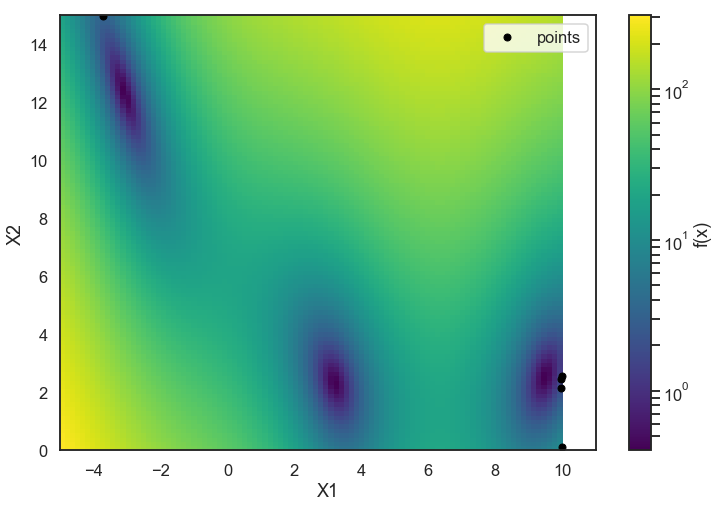

In [49]:
plot_branin_with_points(np.array(r))

In [50]:
opt.base_estimator_

LastLayerBayesianDeepNetRegressor(batch_size=50, lr_intercept=False,
                 n_units_1=50, n_units_2=50, n_units_3=50,
                 normalize_input=False, normalize_output=False,
                 normalize_output_lr=False, num_epochs=3000,
                 random_state=843828734)

In [51]:
model = opt.models[-1]

In [52]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

In [53]:
x_model = opt.space.transform(X_grid.tolist())

In [54]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [55]:
def plot_branin_pred(y_pred, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(y_pred, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=2, 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("m(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])
    
    
def plot_branin_var(sigma, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(sigma, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("sigma(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

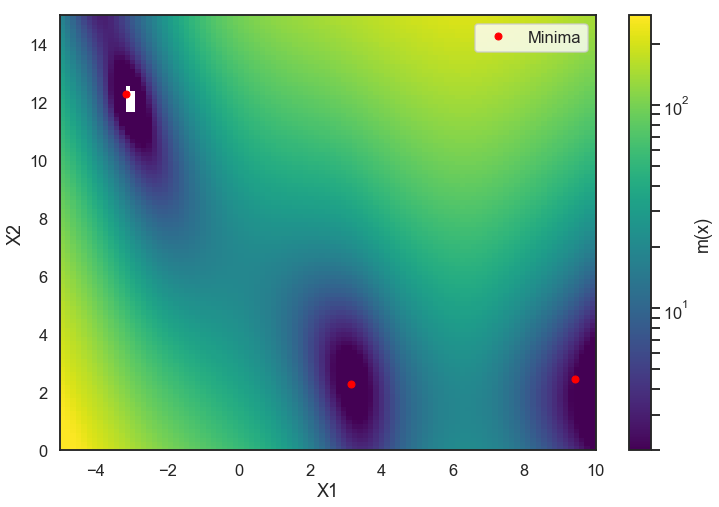

In [56]:
plot_branin_pred(y_pred, x1_values, x2_values)

In [ ]:
plot_branin_var(sigma, x1_values, x2_values)

In [ ]:
x1_values

In [ ]:
opt.Xspace.shape